# ==== Import Modules and Load Data ====

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

sns.set(
    { "figure.figsize": (17, 7) },
    style='ticks',
    palette=sns.color_palette("Set2"),
    color_codes=True,
    font_scale=5
)

plt.rcParams.update({
    "axes.labelsize": 12,  # Axes label font size
})

%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')

In [9]:
# Load the dataset
auto = pd.read_csv('adverts.csv')

# ==== General Evaluation ====

In [10]:
# View Data
auto

public_reference   mileage reg_code standard_colour standard_make  \
0        202006039777689       0.0      NaN            Grey         Volvo   
1        202007020778260  108230.0       61            Blue        Jaguar   
2        202007020778474    7800.0       17            Grey         SKODA   
3        202007080986776   45000.0       16           Brown      Vauxhall   
4        202007161321269   64000.0       64            Grey    Land Rover   
...                  ...       ...      ...             ...           ...   
402000   202010315652942    5179.0       69            Grey       Peugeot   
402001   202010315657341  110000.0       59             Red       Peugeot   
402002   202010315659271   52760.0       62           White        Nissan   
402003   202011015662436   10250.0       65             Red        Abarth   
402004   201512149444029   14000.0       14          Silver          Audi   

           standard_model vehicle_condition  year_of_registration  price  \
0                    XC90               NEW                   NaN  73970   
1                      XF              USED                2011.0   7000   
2                    Yeti              USED                2017.0  14000   
3                   Mokka              USED                2016.0   7995   
4       Range Rover Sport              USED                2015.0  26995   
...                   ...               ...                   ...    ...   
402000                208              USED                2019.0  10595   
402001                107              USED                2009.0   2000   
402002            Qashqai              USED                2012.0   7250   
402003                595              USED                2015.0  11490   
402004           A4 Avant              USED                2014.0  20520   

        body_type  crossover_car_and_van              fuel_type  
0             SUV                  False  Petrol Plug-in Hybrid  
1          Saloon                  False                 Diesel  
2             SUV                  False                 Petrol  
3       Hatchback                  False                 Diesel  
4             SUV                  False                 Diesel  
...           ...                    ...                    ...  
402000  Hatchback                  False                 Petrol  
402001  Hatchback                  False                 Petrol  
402002        SUV                  False                 Petrol  
402003  Hatchback                  False                 Petrol  
402004     Estate                  False                 Diesel  

[402005 rows x 12 columns]

In [11]:
for column in auto.columns:
    try:
        print(column, "min", auto[column].min(), "max", auto[column].max())
    except:
        next

public_reference min 201307177852187 max 202011025683478
mileage min 0.0 max 999999.0
standard_make min AC max Zenos
standard_model min 1 Series max up!
vehicle_condition min NEW max USED
year_of_registration min 999.0 max 2020.0
price min 120 max 9999999
crossover_car_and_van min False max True


In [12]:
# View feature data types 
auto.dtypes

public_reference           int64
mileage                  float64
reg_code                  object
standard_colour           object
standard_make             object
standard_model            object
vehicle_condition         object
year_of_registration     float64
price                      int64
body_type                 object
crossover_car_and_van       bool
fuel_type                 object
dtype: object

In [13]:
auto.loc[(auto["fuel_type"]=="Electric") & (auto["year_of_registration"]==2015)]

public_reference  mileage reg_code standard_colour standard_make  \
2038     202007080994432  21500.0       65            Blue       Renault   
2174     202009183920665  54000.0       65            Blue         Tesla   
5377     202010275508607  64000.0       65             Red         Tesla   
6063     202006300677623  58445.0       65           White       Renault   
6233     202010054620548  13826.0       15          Silver           BMW   
...                  ...      ...      ...             ...           ...   
391810   202009304411259  36943.0       65           Black        Nissan   
392647   202011015678073  21485.0       15           White        Nissan   
392882   202010205202654  33577.0       15             Red        Nissan   
395915   202010175106349  27569.0       65           Black         Tesla   
396993   202003078135510  72750.0       65             Red         Tesla   

       standard_model vehicle_condition  year_of_registration  price  \
2038              Zoe              USED                2015.0   7895   
2174          Model S              USED                2015.0  34990   
5377          Model S              USED                2015.0  43750   
6063              Zoe              USED                2015.0   6500   
6233               i3              USED                2015.0  14991   
...               ...               ...                   ...    ...   
391810           Leaf              USED                2015.0   9750   
392647           Leaf              USED                2015.0   9995   
392882           Leaf              USED                2015.0   9500   
395915        Model S              USED                2015.0  48990   
396993        Model S              USED                2015.0  39995   

        body_type  crossover_car_and_van fuel_type  
2038    Hatchback                  False  Electric  
2174       Saloon                  False  Electric  
5377       Saloon                  False  Electric  
6063    Hatchback                  False  Electric  
6233    Hatchback                  False  Electric  
...           ...                    ...       ...  
391810  Hatchback                  False  Electric  
392647  Hatchback                  False  Electric  
392882  Hatchback                  False  Electric  
395915     Saloon                  False  Electric  
396993     Saloon                  False  Electric  

[246 rows x 12 columns]

In [14]:
# Check how many unique values for each feature

for col in auto.columns:
    print(f"{col} has {len(auto[col].unique())} unique features.")

public_reference has 402005 unique features.
mileage has 80635 unique features.
reg_code has 73 unique features.
standard_colour has 23 unique features.
standard_make has 110 unique features.
standard_model has 1168 unique features.
vehicle_condition has 2 unique features.
year_of_registration has 85 unique features.
price has 30578 unique features.
body_type has 17 unique features.
crossover_car_and_van has 2 unique features.
fuel_type has 10 unique features.


In [15]:
# Check for null values

null_counts = pd.DataFrame({
    'column': auto.columns,
    'null_count': [auto[col].isnull().sum() for col in auto.columns]
})
null_counts.sort_values(by="null_count", ascending=False)

column  null_count
7    year_of_registration       33311
2                reg_code       31857
3         standard_colour        5378
9               body_type         837
11              fuel_type         601
1                 mileage         127
0        public_reference           0
4           standard_make           0
5          standard_model           0
6       vehicle_condition           0
8                   price           0
10  crossover_car_and_van           0

In [16]:
# Set the years of reg for new cars to 2020
auto.loc[(auto["vehicle_condition"]=="NEW") & (auto["year_of_registration"].isna()), "year_of_registration"] = 2020

In [17]:
auto.loc[auto["year_of_registration"].isna() & auto["reg_code"].notna()]

public_reference  mileage reg_code standard_colour standard_make  \
54       202007030806426  30000.0       18             Red      Vauxhall   
83       202008222801747  42847.0       61             Red         Honda   
865      202010084741550  43130.0       66           White    Land Rover   
968      202010305607535  63369.0       17            Blue         SKODA   
1256     202010225294466  18715.0       68           White         Volvo   
...                  ...      ...      ...             ...           ...   
400336   202010315635977  66287.0       63            Blue      Vauxhall   
400725   202008252905656     45.0       20          Silver    Land Rover   
401314   202010315635541  12522.0       67             Red         Dacia   
401323   201909222504136  46000.0       13            Grey    Volkswagen   
401357   202007111114611     10.0       20            Blue      Vauxhall   

            standard_model vehicle_condition  year_of_registration  price  \
54                Insignia              USED                   NaN  11990   
83                    Jazz              USED                   NaN   5695   
865      Range Rover Sport              USED                   NaN  35990   
968        Rapid Spaceback              USED                   NaN   7490   
1256                   V40              USED                   NaN  16950   
...                    ...               ...                   ...    ...   
400336           Astra GTC              USED                   NaN   8400   
400725  Range Rover Evoque              USED                   NaN  46945   
401314             Sandero              USED                   NaN   6300   
401323           Caravelle              USED                   NaN  22995   
401357               Corsa              USED                   NaN  16000   

        body_type  crossover_car_and_van fuel_type  
54      Hatchback                  False    Petrol  
83      Hatchback                  False    Petrol  
865           SUV                  False    Diesel  
968     Hatchback                  False    Diesel  
1256          NaN                  False    Petrol  
...           ...                    ...       ...  
400336      Coupe                  False    Petrol  
400725        SUV                  False    Diesel  
401314  Hatchback                  False    Petrol  
401323        MPV                  False    Diesel  
401357  Hatchback                  False    Petrol  

[1741 rows x 12 columns]

In [18]:
# Check for null values

null_counts = pd.DataFrame({
    'column': auto.columns,
    'null_count': [auto[col].isnull().sum() for col in auto.columns]
})
null_counts.sort_values(by="null_count", ascending=False)

column  null_count
2                reg_code       31857
3         standard_colour        5378
7    year_of_registration        2062
9               body_type         837
11              fuel_type         601
1                 mileage         127
0        public_reference           0
4           standard_make           0
5          standard_model           0
6       vehicle_condition           0
8                   price           0
10  crossover_car_and_van           0

In [19]:
# Check for empty strings

empty_strings = (auto == "").sum()
print("Number of empty strings in each column")
print(empty_strings)

Number of empty strings in each column
public_reference         0
mileage                  0
reg_code                 0
standard_colour          0
standard_make            0
standard_model           0
vehicle_condition        0
year_of_registration     0
price                    0
body_type                0
crossover_car_and_van    0
fuel_type                0
dtype: int64


In [20]:
# Check for 0 values

zero_vals = (auto == 0).sum()
print("Number of zero values in each column")
print(zero_vals)

Number of zero values in each column
public_reference              0
mileage                   16207
reg_code                      0
standard_colour               0
standard_make                 0
standard_model                0
vehicle_condition             0
year_of_registration          0
price                         0
body_type                     0
crossover_car_and_van    400210
fuel_type                     0
dtype: int64


In [21]:
# Check for numbers composed entirely of 9s

all_nines = auto.applymap(lambda x: str(x).isdigit() and set(str(x)) == {'9'})

count_all_nines = all_nines.sum()
print("Number of all 9 values in each column")
print(count_all_nines)

Number of all 9 values in each column
public_reference            0
mileage                     0
reg_code                    0
standard_colour             0
standard_make               0
standard_model              0
vehicle_condition           0
year_of_registration        0
price                    1056
body_type                   0
crossover_car_and_van       0
fuel_type                   0
dtype: int64



---
&nbsp;

&nbsp;

# ==== Price ====

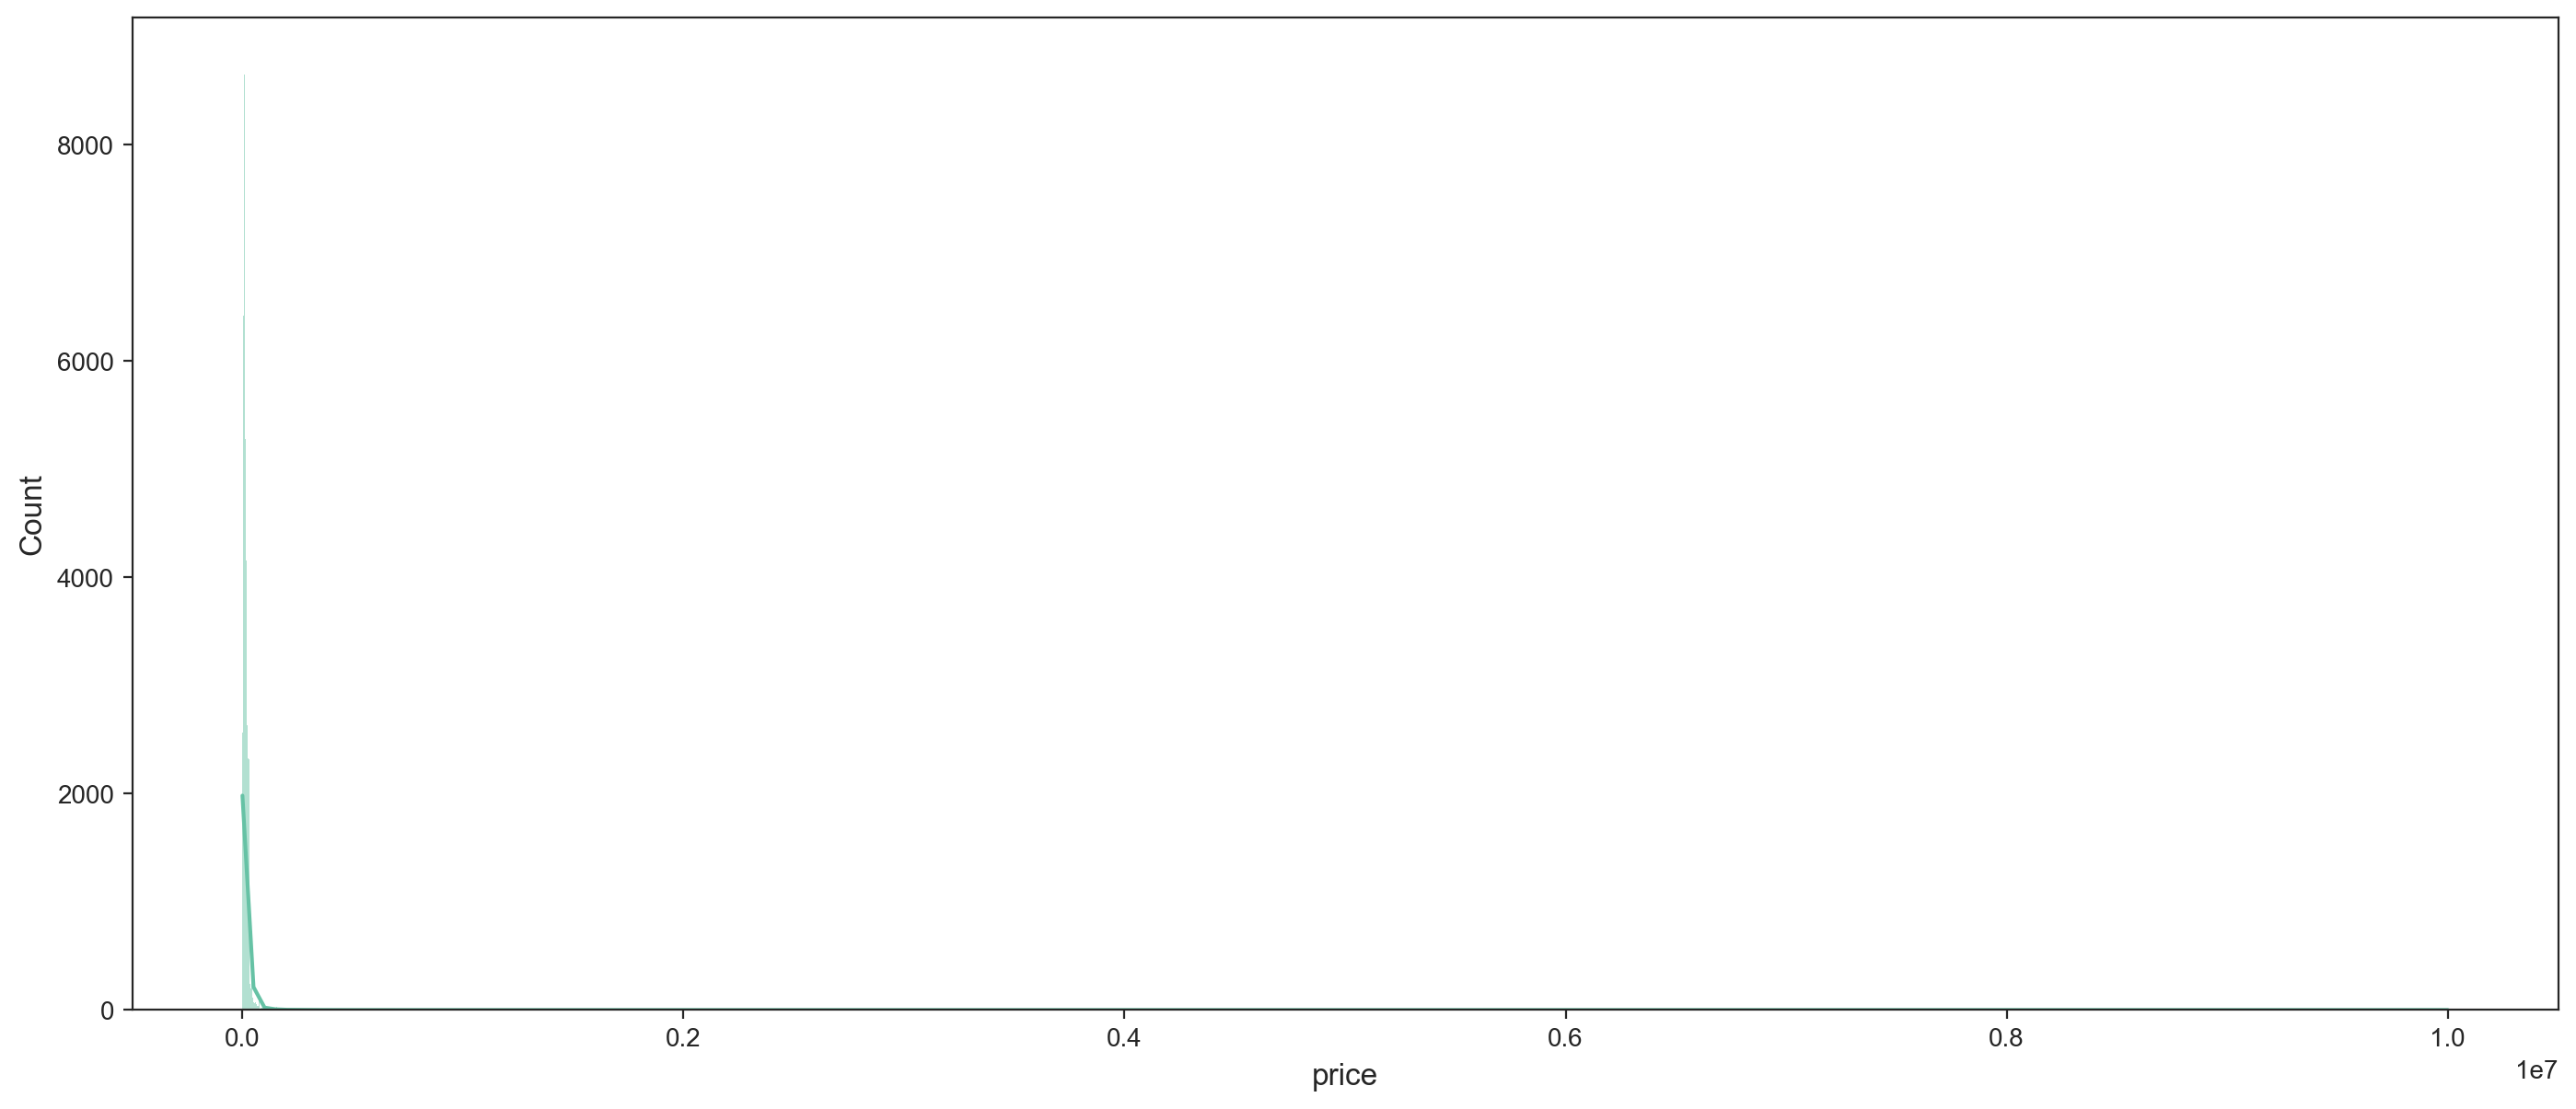

In [67]:
# Visualise spread of price
sns.histplot(auto, kde=True, x="price");

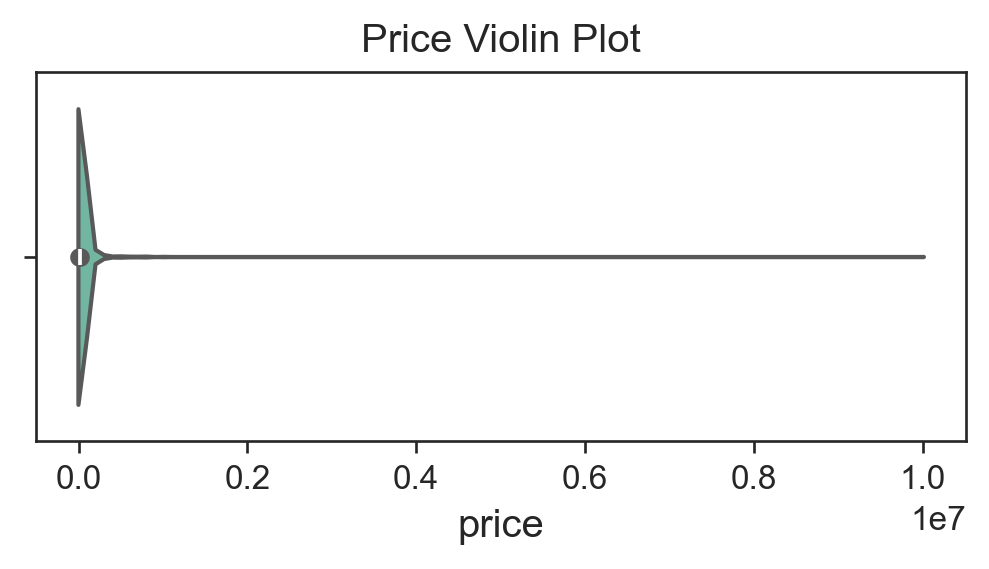

In [147]:
# Visualise spread of price
plt.figure(figsize=(5, 2), dpi=120)
plt.title("Price Violin Plot");
sns.violinplot(auto, x="price");
plt.savefig("/Users/hal/Documents/Essays/AutoML/price_violin_og.png", bbox_inches='tight', dpi=240)

Price is skewed by a small number of extremely large prices. These will need investigating to see if they are erroneous and this feature is likely a good candidate for box-cox or other transformation.

In [69]:
# Check extreme prices.
auto.loc[auto["price"] > 1e6].sort_values(by="price", ascending=False)

public_reference  mileage reg_code standard_colour standard_make  \
147188   202009103539048    100.0      NaN            Grey      Maserati   
252505   202008112331147  46300.0      NaN            Blue       Ferrari   
336536   202006180262926   4400.0      NaN           White       Porsche   
305436   201812223434109   3600.0      NaN            Grey   Lamborghini   
141833   202007050883898  87450.0      NaN             Red       Ferrari   
336202   202001226429470    950.0      NaN           Black       Ferrari   
198060   202008252907180    300.0       17             NaN       Ferrari   
51741    202002257718775   4400.0       14           Black       Bugatti   
64910    202006039766650    189.0      NaN           Black       McLaren   
223835   202007081011555   1000.0       67            Blue       Bugatti   
94033    202007020778467   1900.0       18           White        Pagani   
72681    202007010711087    475.0       15          Yellow       Ferrari   
378068   202006150151007   2247.0       64             Red       Ferrari   
145819   202007070959470   6170.0       63             Red       Ferrari   
323760   202007151264168   1382.0       15             Red       Ferrari   
294287   202010155036207   2200.0      NaN             Red       Ferrari   
313958   202002197496987   7750.0       54             NaN       Ferrari   
103974   202010074708314  10895.0       16            Blue       Bugatti   
21997    201911084154244   2180.0       10            Blue       Bugatti   
264371   201911084150187    600.0       20             NaN       Bugatti   
255484   202007251680060     45.0        L          Silver       Porsche   
177165   202007271729483     45.0        L          Silver       Porsche   
180820   202007281806845    353.0       13          Orange       McLaren   
335741   202010175114565   2800.0        J             Red       Ferrari   
201413   202001095954708    828.0       57           Black       Bugatti   
289514   202010225285486   1500.0       15          Yellow       Porsche   
186555   202003258741553  57000.0        B             NaN  Aston Martin   
175995   202009254208162   3660.0       63          Yellow       McLaren   
212615   202006180255172   4000.0       64            Blue       McLaren   
62571    202010215263340   2200.0      NaN           Black       Porsche   
354623   201903276321916   2911.0       15           White       Porsche   

       standard_model vehicle_condition  year_of_registration    price  \
147188           3500              USED                   NaN  9999999   
252505            275              USED                   NaN  9999999   
336536            959              USED                   NaN  9999999   
305436          Miura              USED                   NaN  9999999   
141833            250              USED                   NaN  9999999   
336202      LaFerrari              USED                   NaN  9999999   
198060      LaFerrari              USED                2017.0  3799995   
51741          Veyron              USED                2014.0  2850000   
64910              P1              USED                   NaN  2695000   
223835         Chiron              USED                2018.0  2500000   
94033          Huayra              USED                   NaN  2400000   
72681       LaFerrari              USED                2015.0  2299950   
378068      LaFerrari              USED                2014.0  2195000   
145819      LaFerrari              USED                2013.0  2150000   
323760      LaFerrari              USED                2015.0  2150000   
294287      LaFerrari              USED                2014.0  2049950   
313958           Enzo              USED                2004.0  1950000   
103974         Veyron              USED                2016.0  1699995   
21997          Veyron              USED                2010.0  1590000   
264371         Veyron              USED                2020.0  1400000   
255484            911

 Some prices are 9999999 which are erroneous and need replacing.
 
 Other unusual prices:

202007251680060	45.0	L	Silver	Porsche	911	USED	1993	£1,395,000	Coupe

202007271729483	45.0	L	Silver	Porsche	911	USED	1993	£1,395,000	Coupe	

202010225285486	1500.0	15	Yellow	Porsche	918	USED	2019	£1,200,000	Convertible	

202010215263340	2200.0	NaN	Black	Porsche	918	USED	2016	£1,099,950	Convertible	

201903276321916	2911.0	15	White	Porsche	918	USED	2015	£1,050,000	NaN	

In [70]:
# 9999999 prices are erroneous and should be removed
auto["price"].replace({9999999: np.nan}, inplace=True)

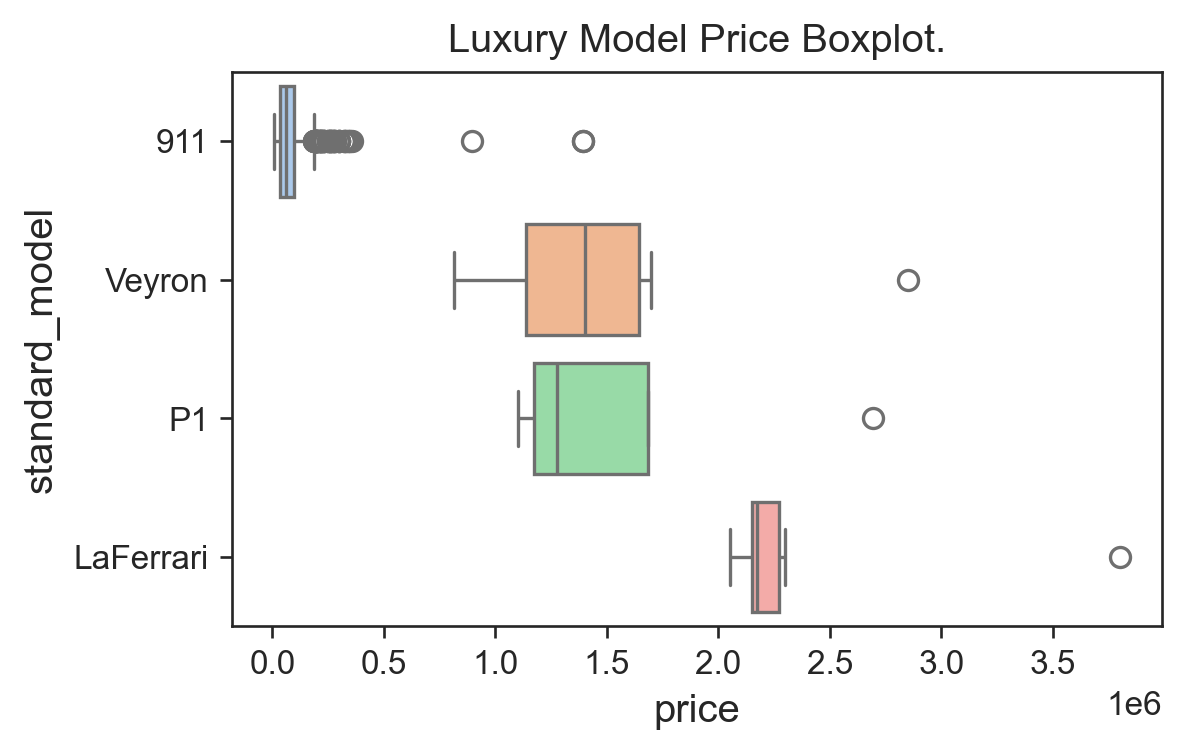

In [71]:
plt.figure(figsize=(5, 3), dpi=120)
combined_prices = auto.loc[auto["standard_model"].isin(["Veyron", "LaFerrari", "P1", "911"]), ["price", "standard_model"]]
plt.title("Luxury Model Price Boxplot.");
sns.boxplot(data=combined_prices, y="standard_model", x="price", palette="pastel");
plt.savefig("/Users/hal/Documents/Essays/AutoML/price_luxury_outliers.png", bbox_inches='tight', dpi=240)

These models show some outliers which greatly exceed other, similar cars. There is presumably some tool/function to automatically find these.

In [72]:
from sklearn.ensemble import IsolationForest

for model_name in ["Veyron", "LaFerrari", "P1"]:
    model_data = auto.loc[auto["standard_model"] == model_name, ["price"]]

    data_cropped = model_data.dropna(subset=["price"])

    # Prepare the price data
    prices = data_cropped["price"].values.reshape(-1, 1)  # Reshape for IsolationForest

    # Train the IsolationForest
    iso_forest = IsolationForest(contamination=0.05, random_state=42)  # Adjust contamination as needed
    iso_forest.fit(prices)

    # Predict outliers
    data_cropped["outlier"] = iso_forest.predict(prices)  # 1 = inlier, -1 = outlier

    # Print outliers
    outliers = data_cropped.loc[data_cropped["outlier"] == -1]
    print(f"Outliers for {model_name}:\n", outliers)

Outliers for Veyron:
            price  outlier
51741  2850000.0       -1
Outliers for LaFerrari:
             price  outlier
198060  3799995.0       -1
Outliers for P1:
            price  outlier
64910  2695000.0       -1


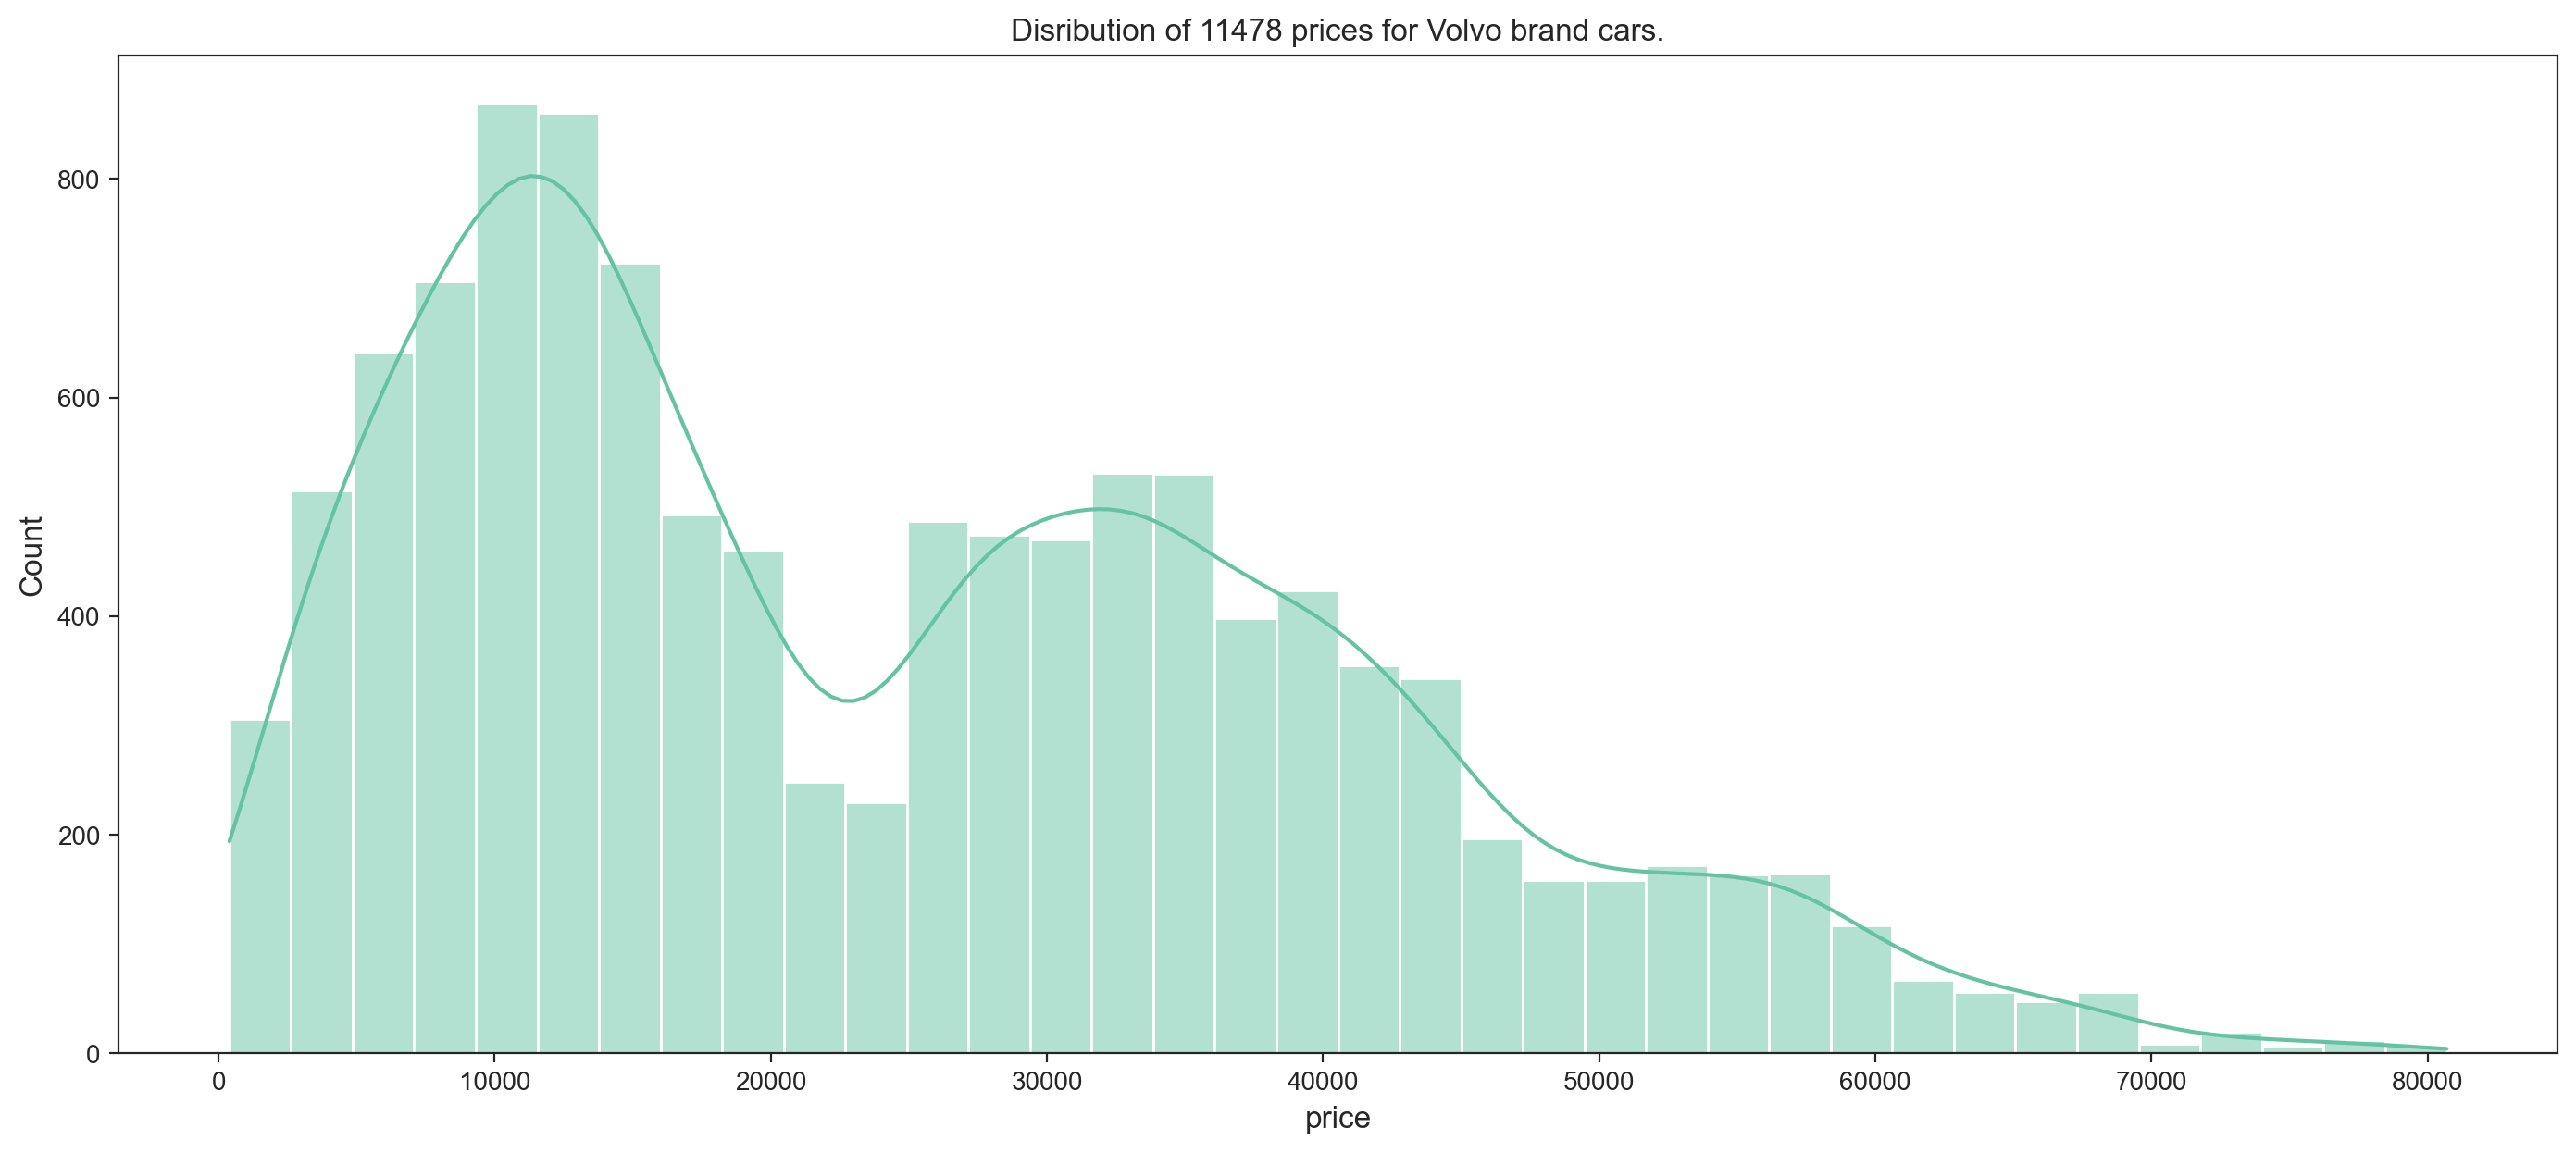

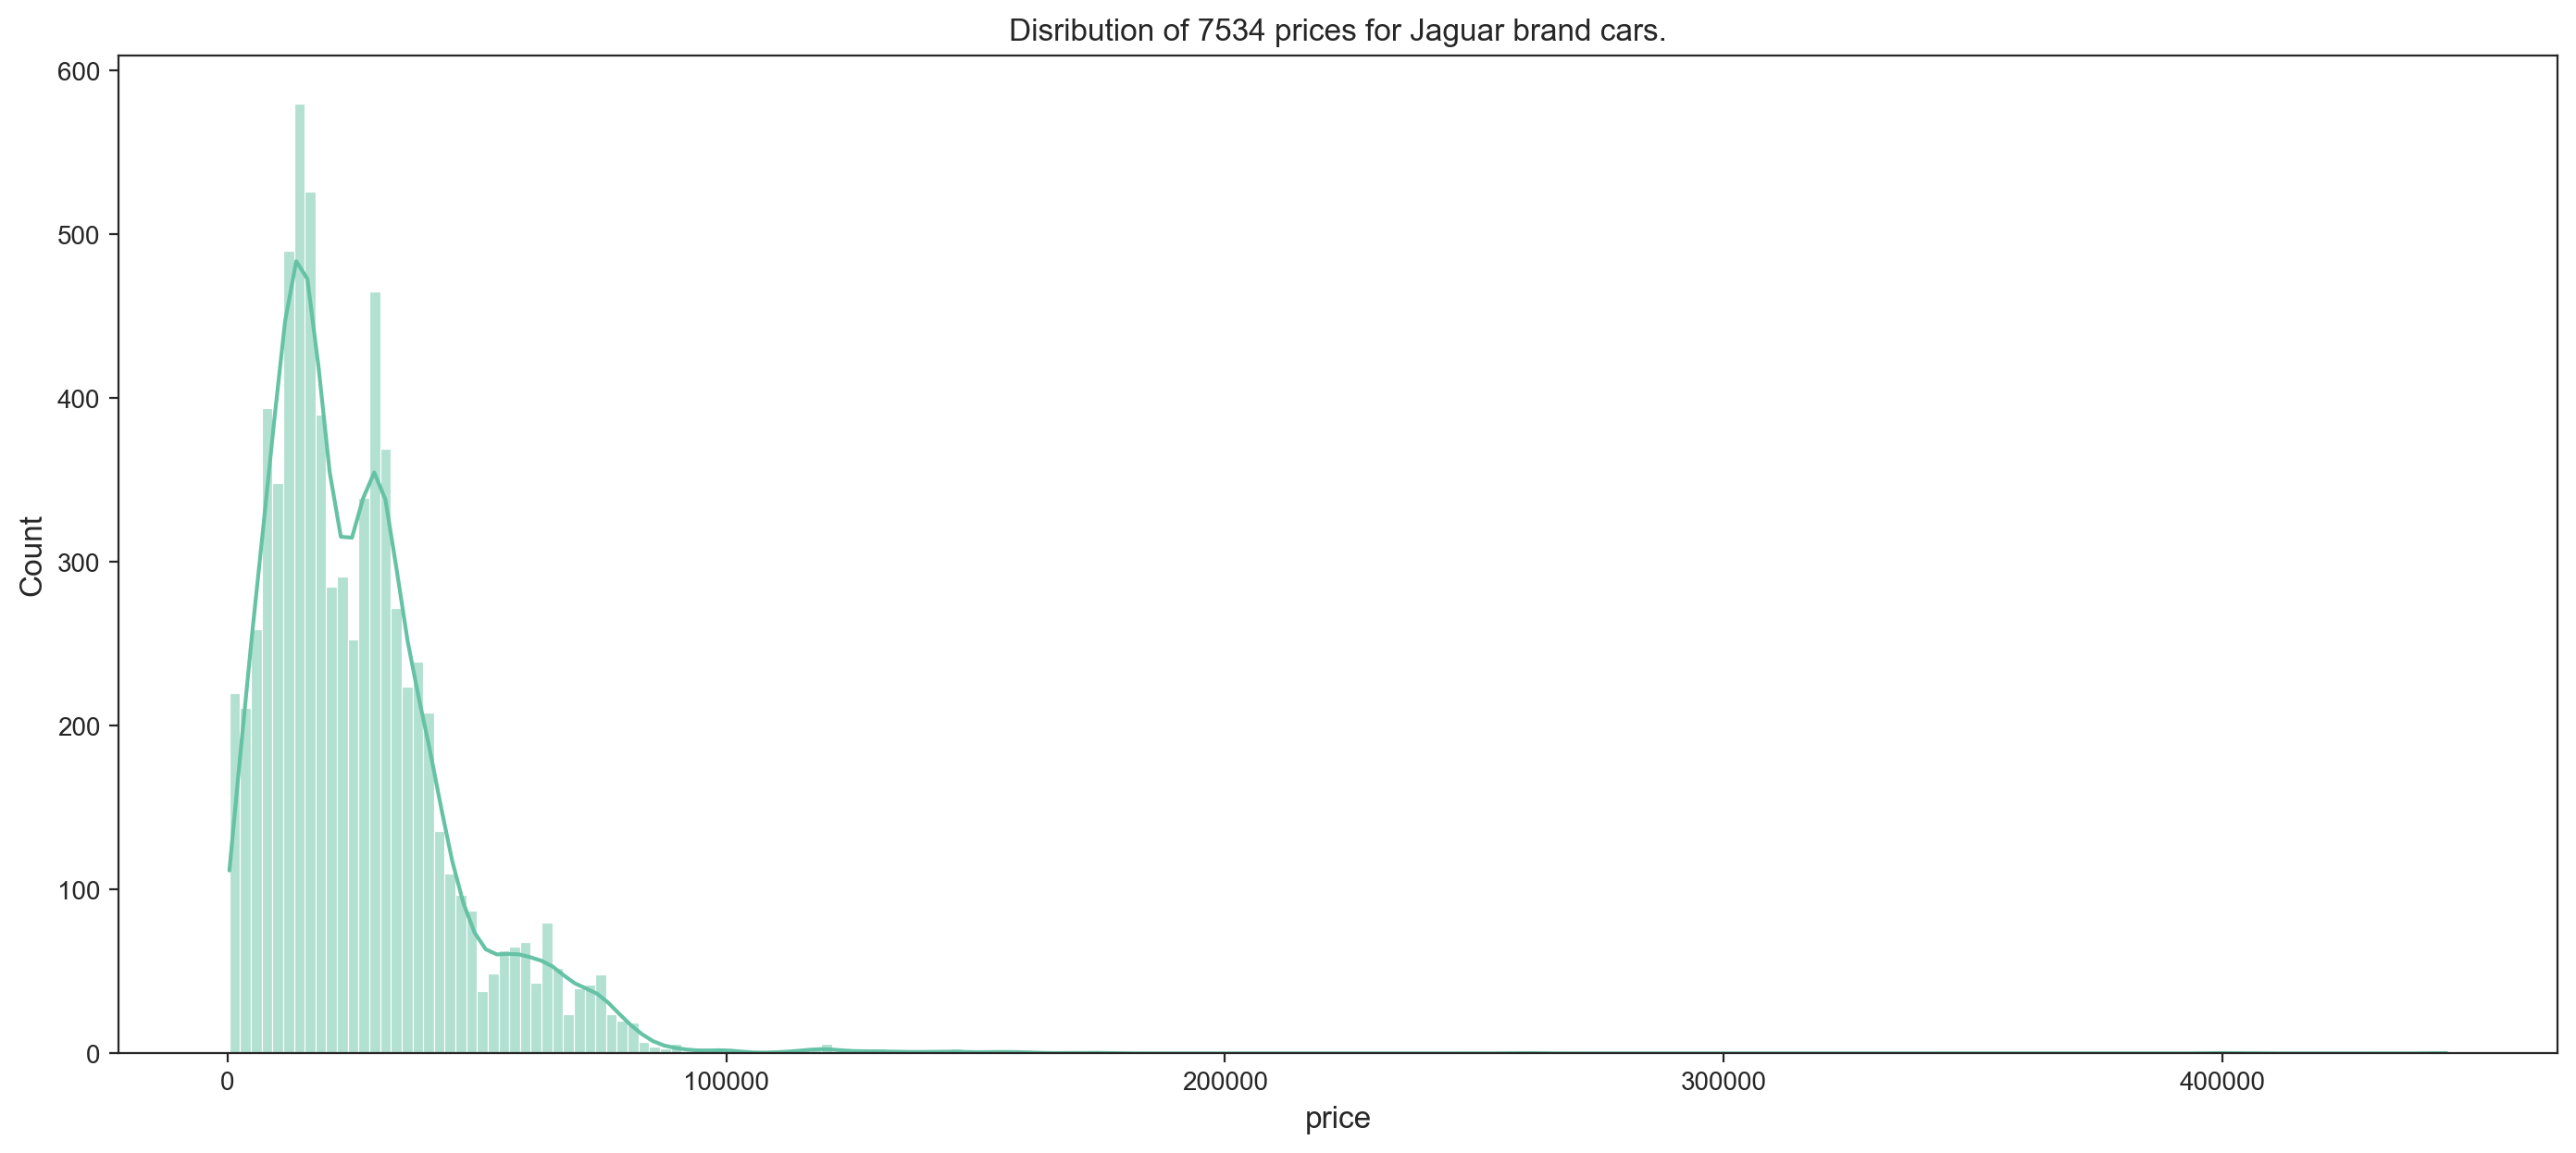

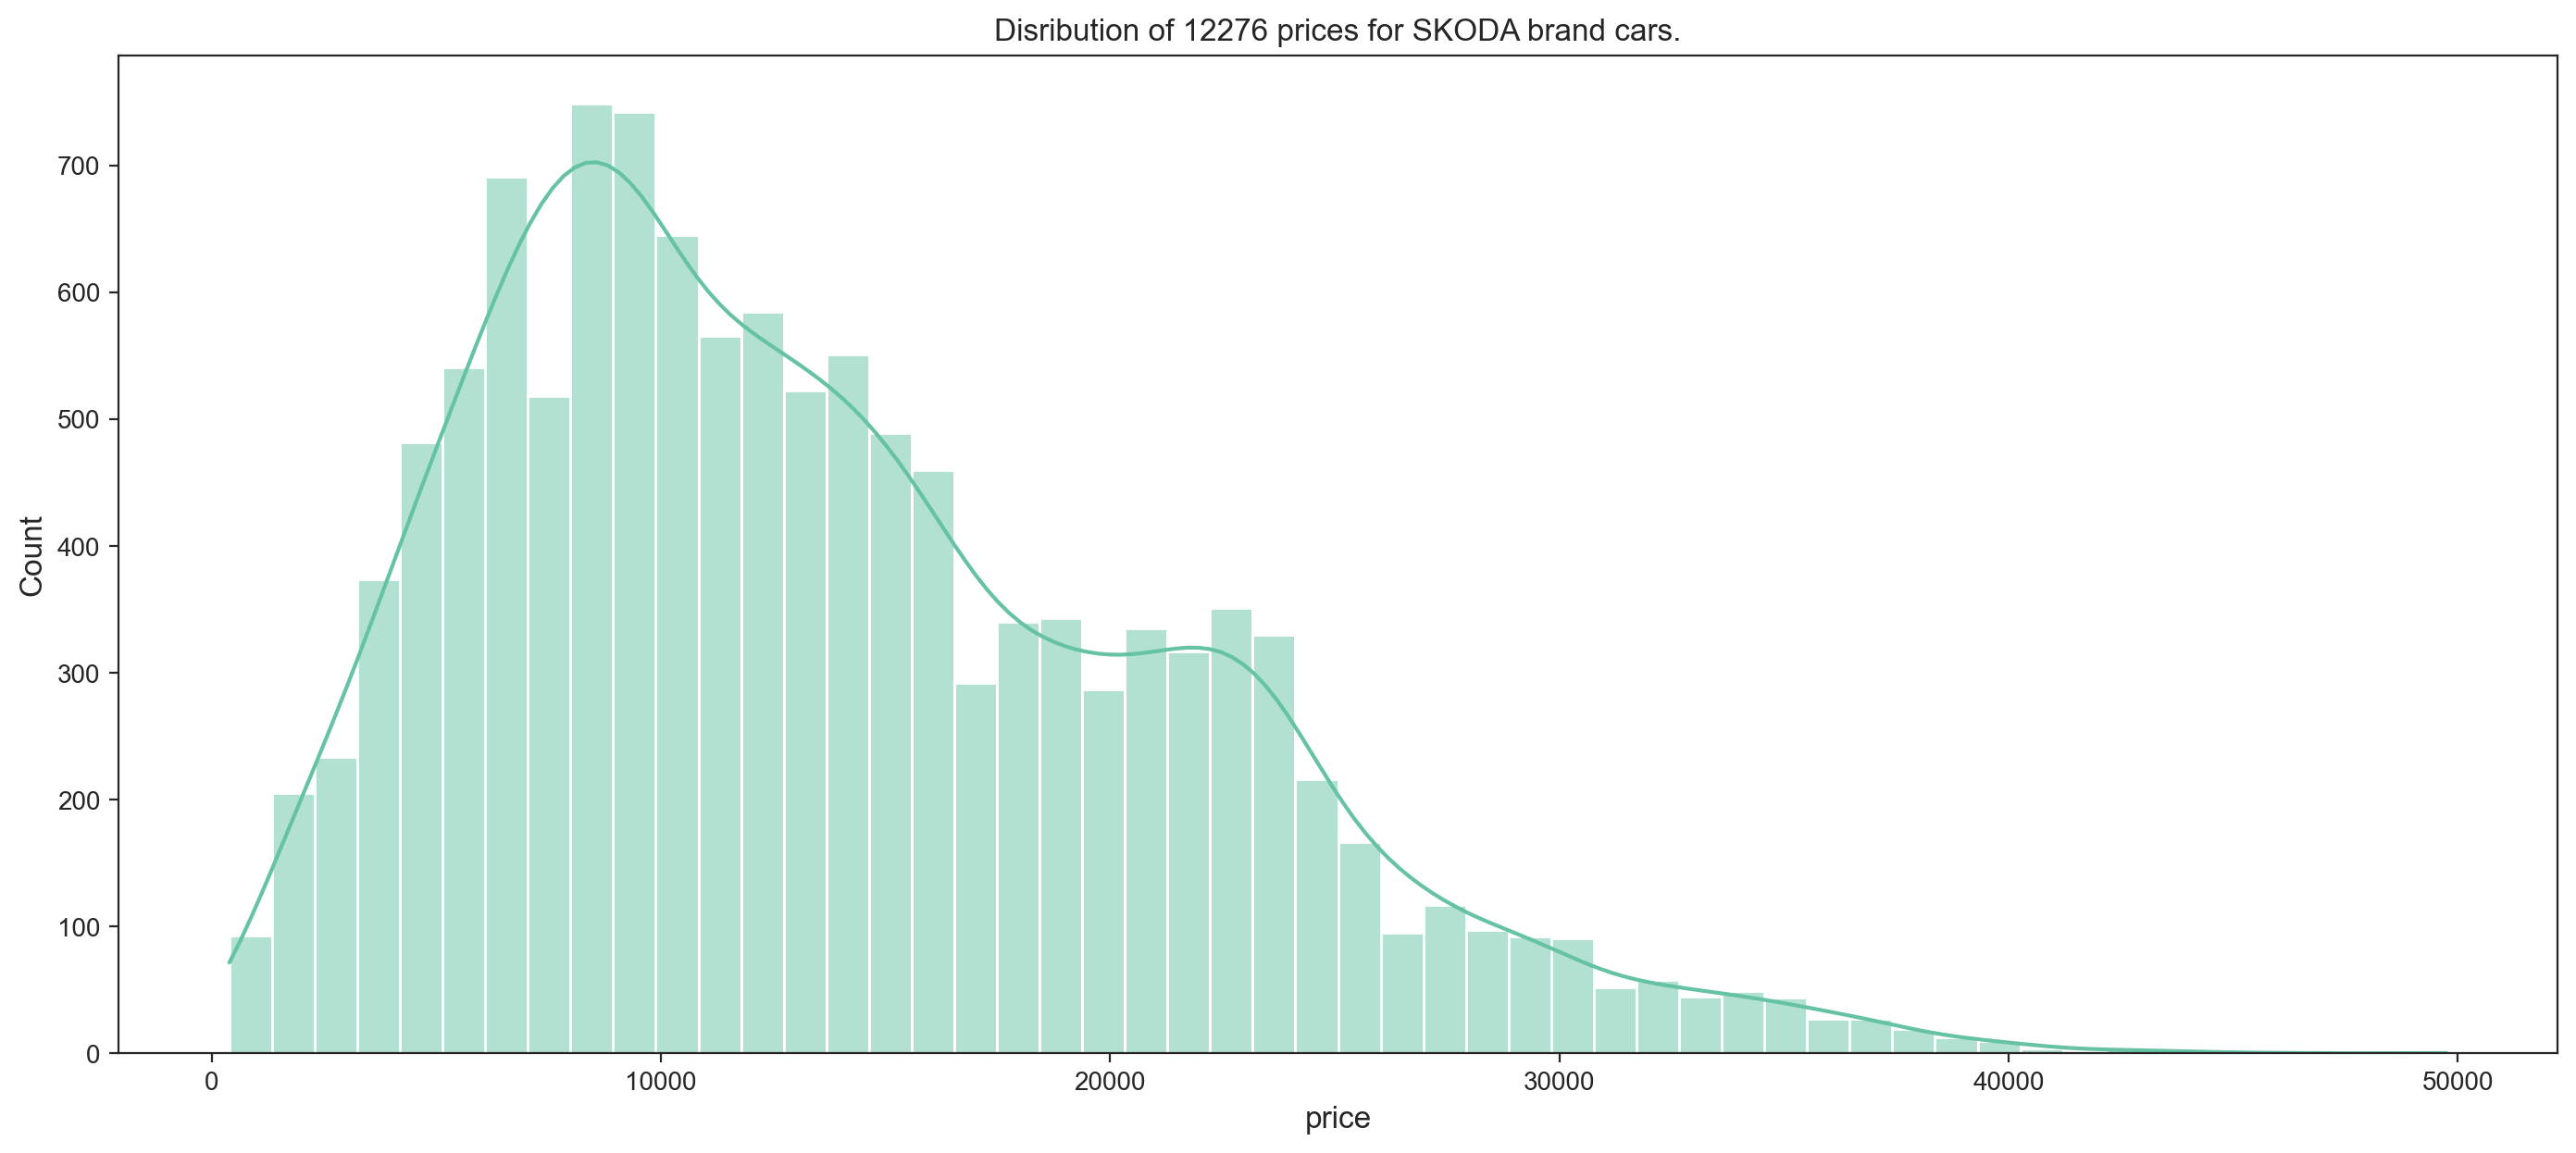

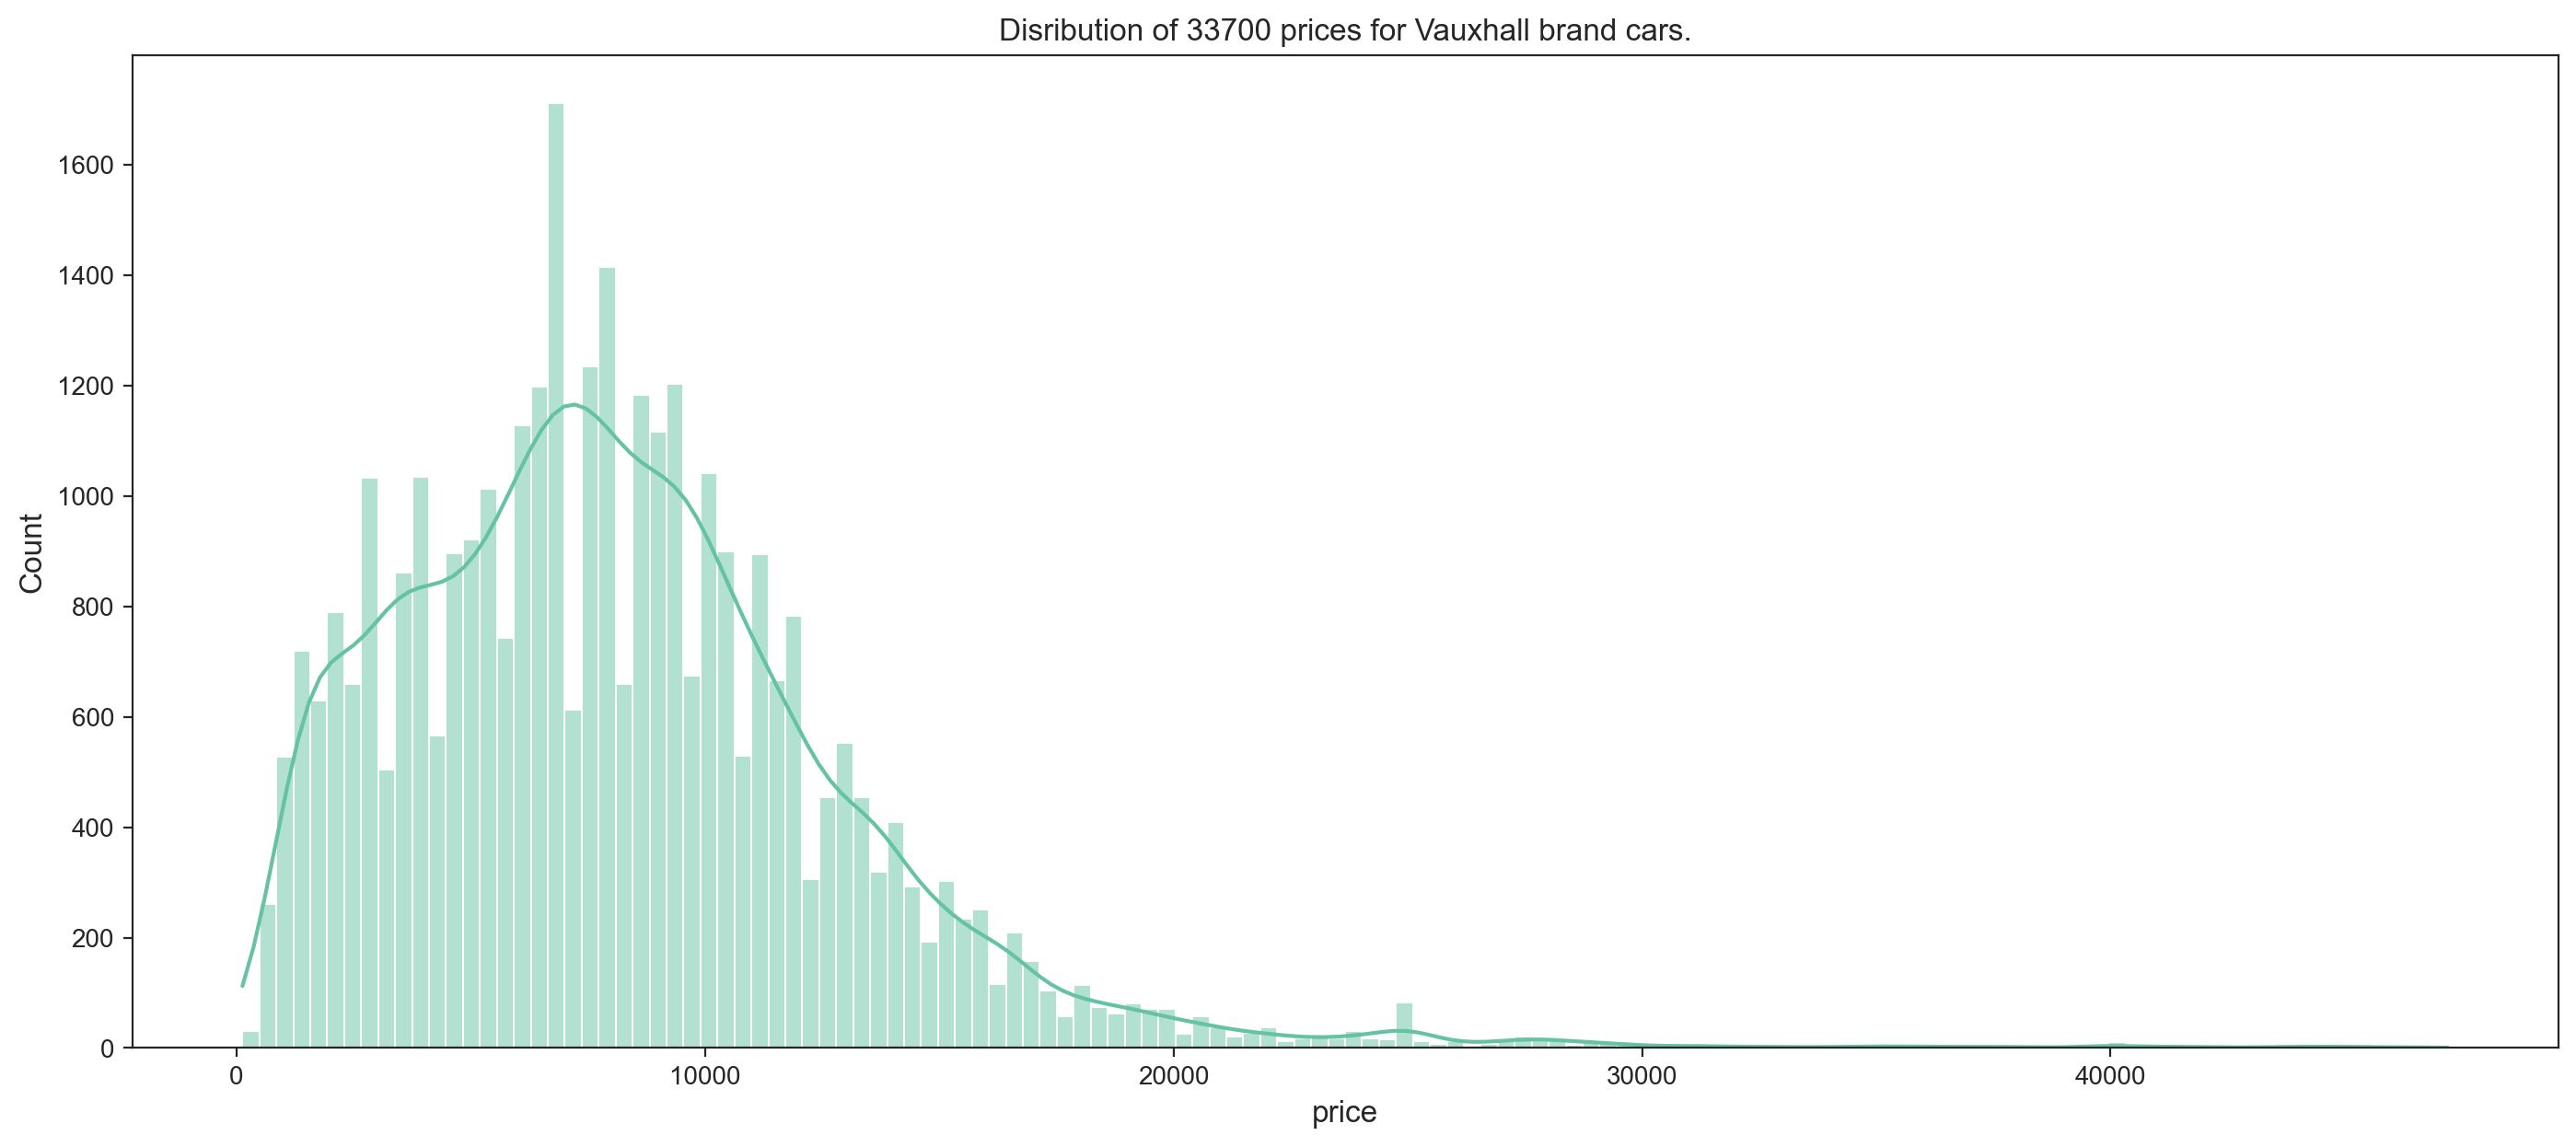

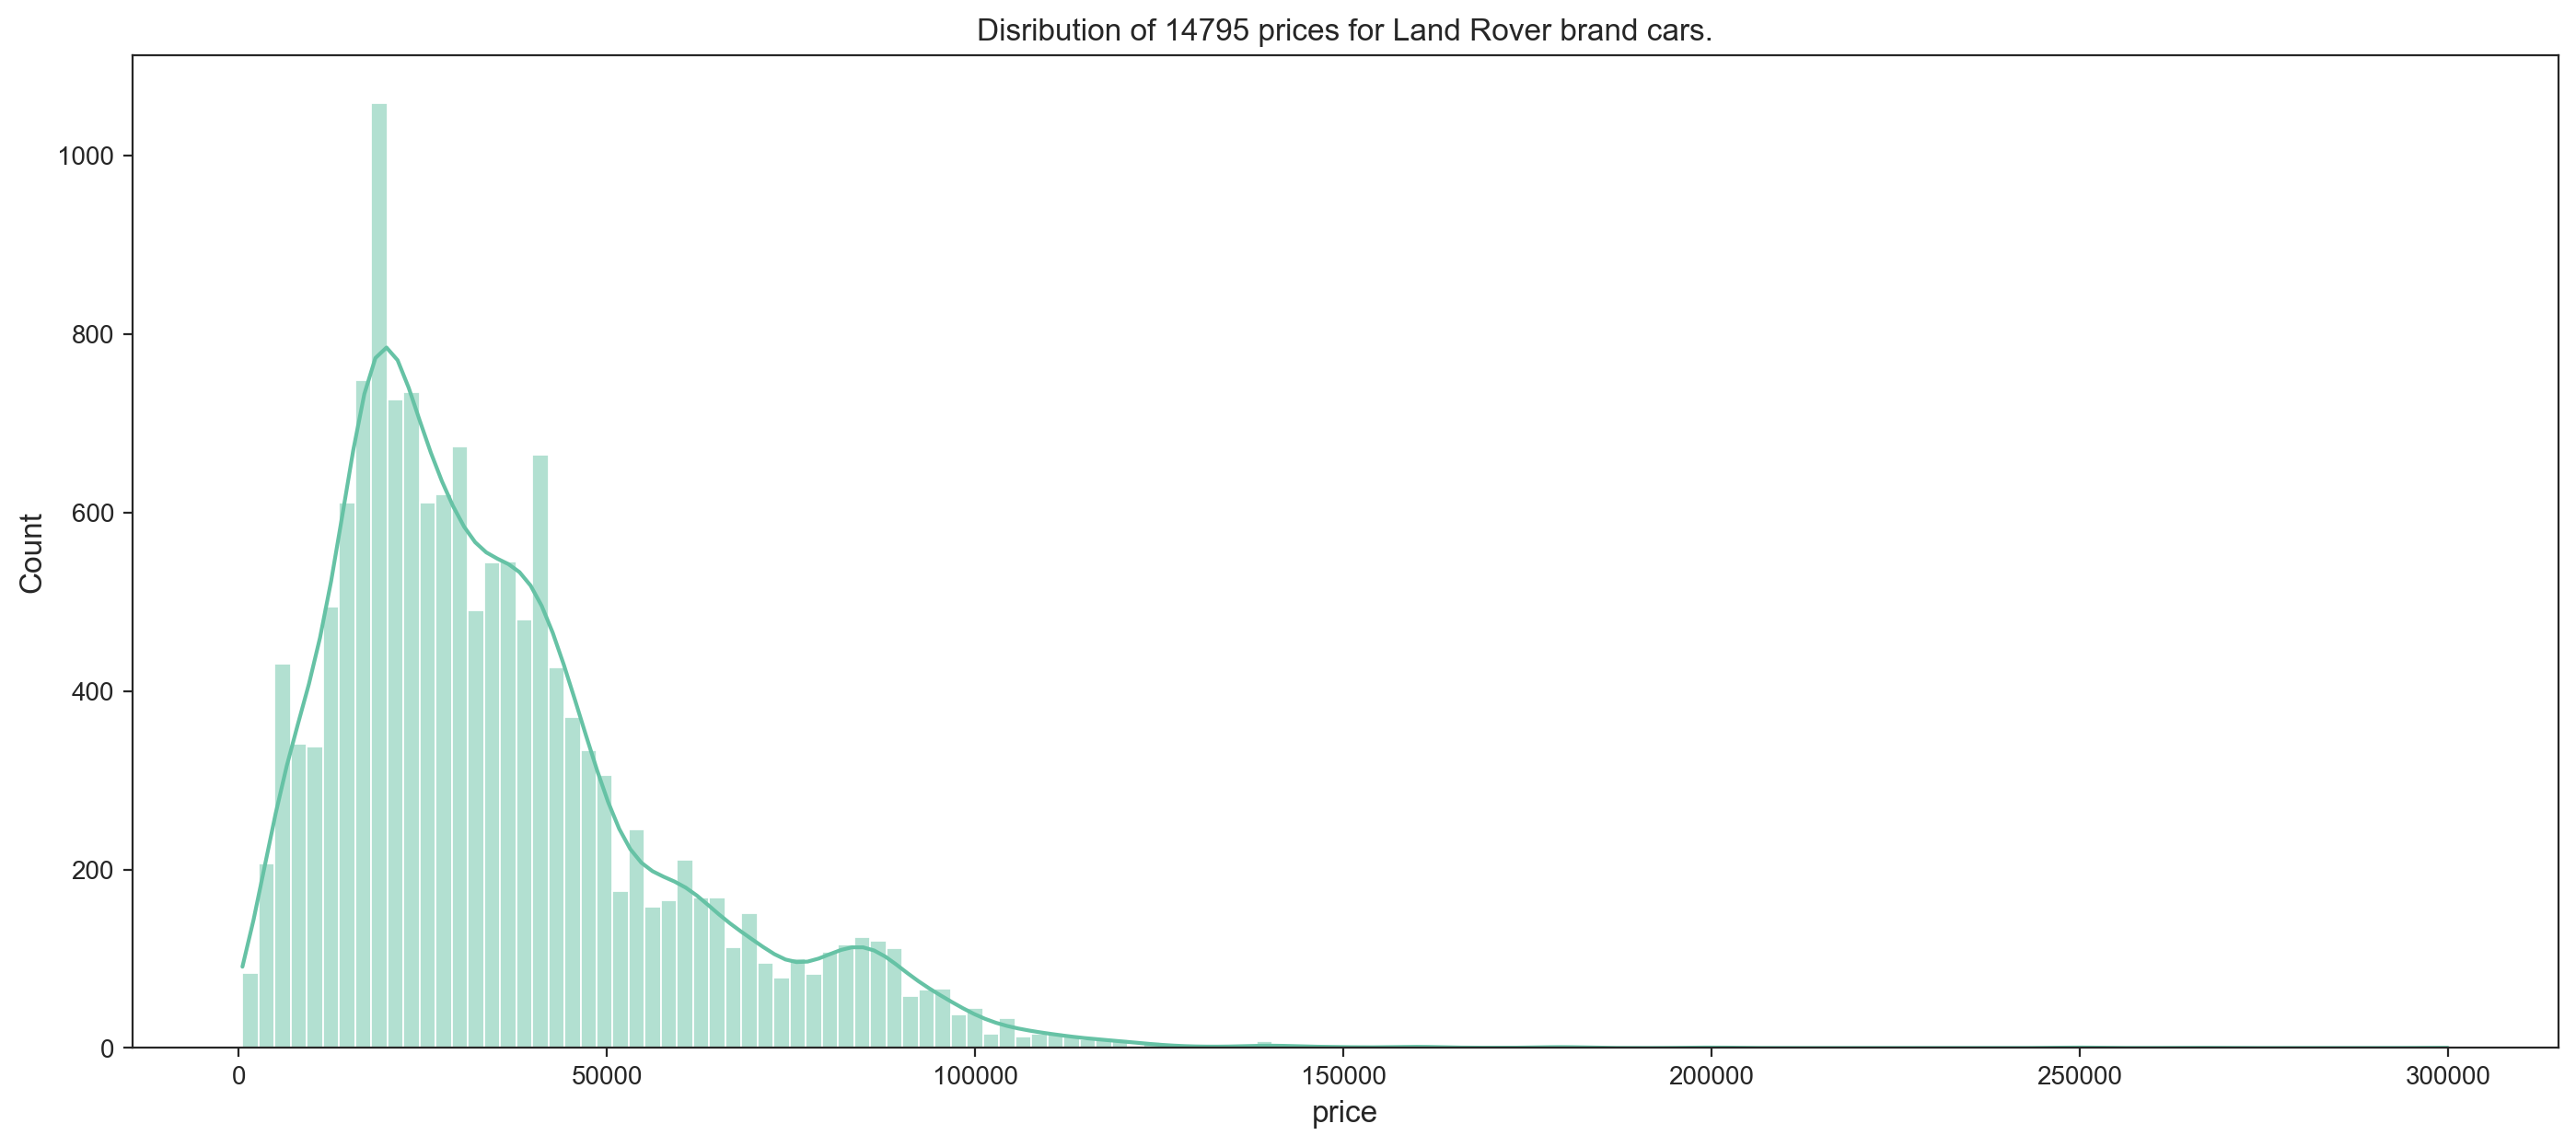

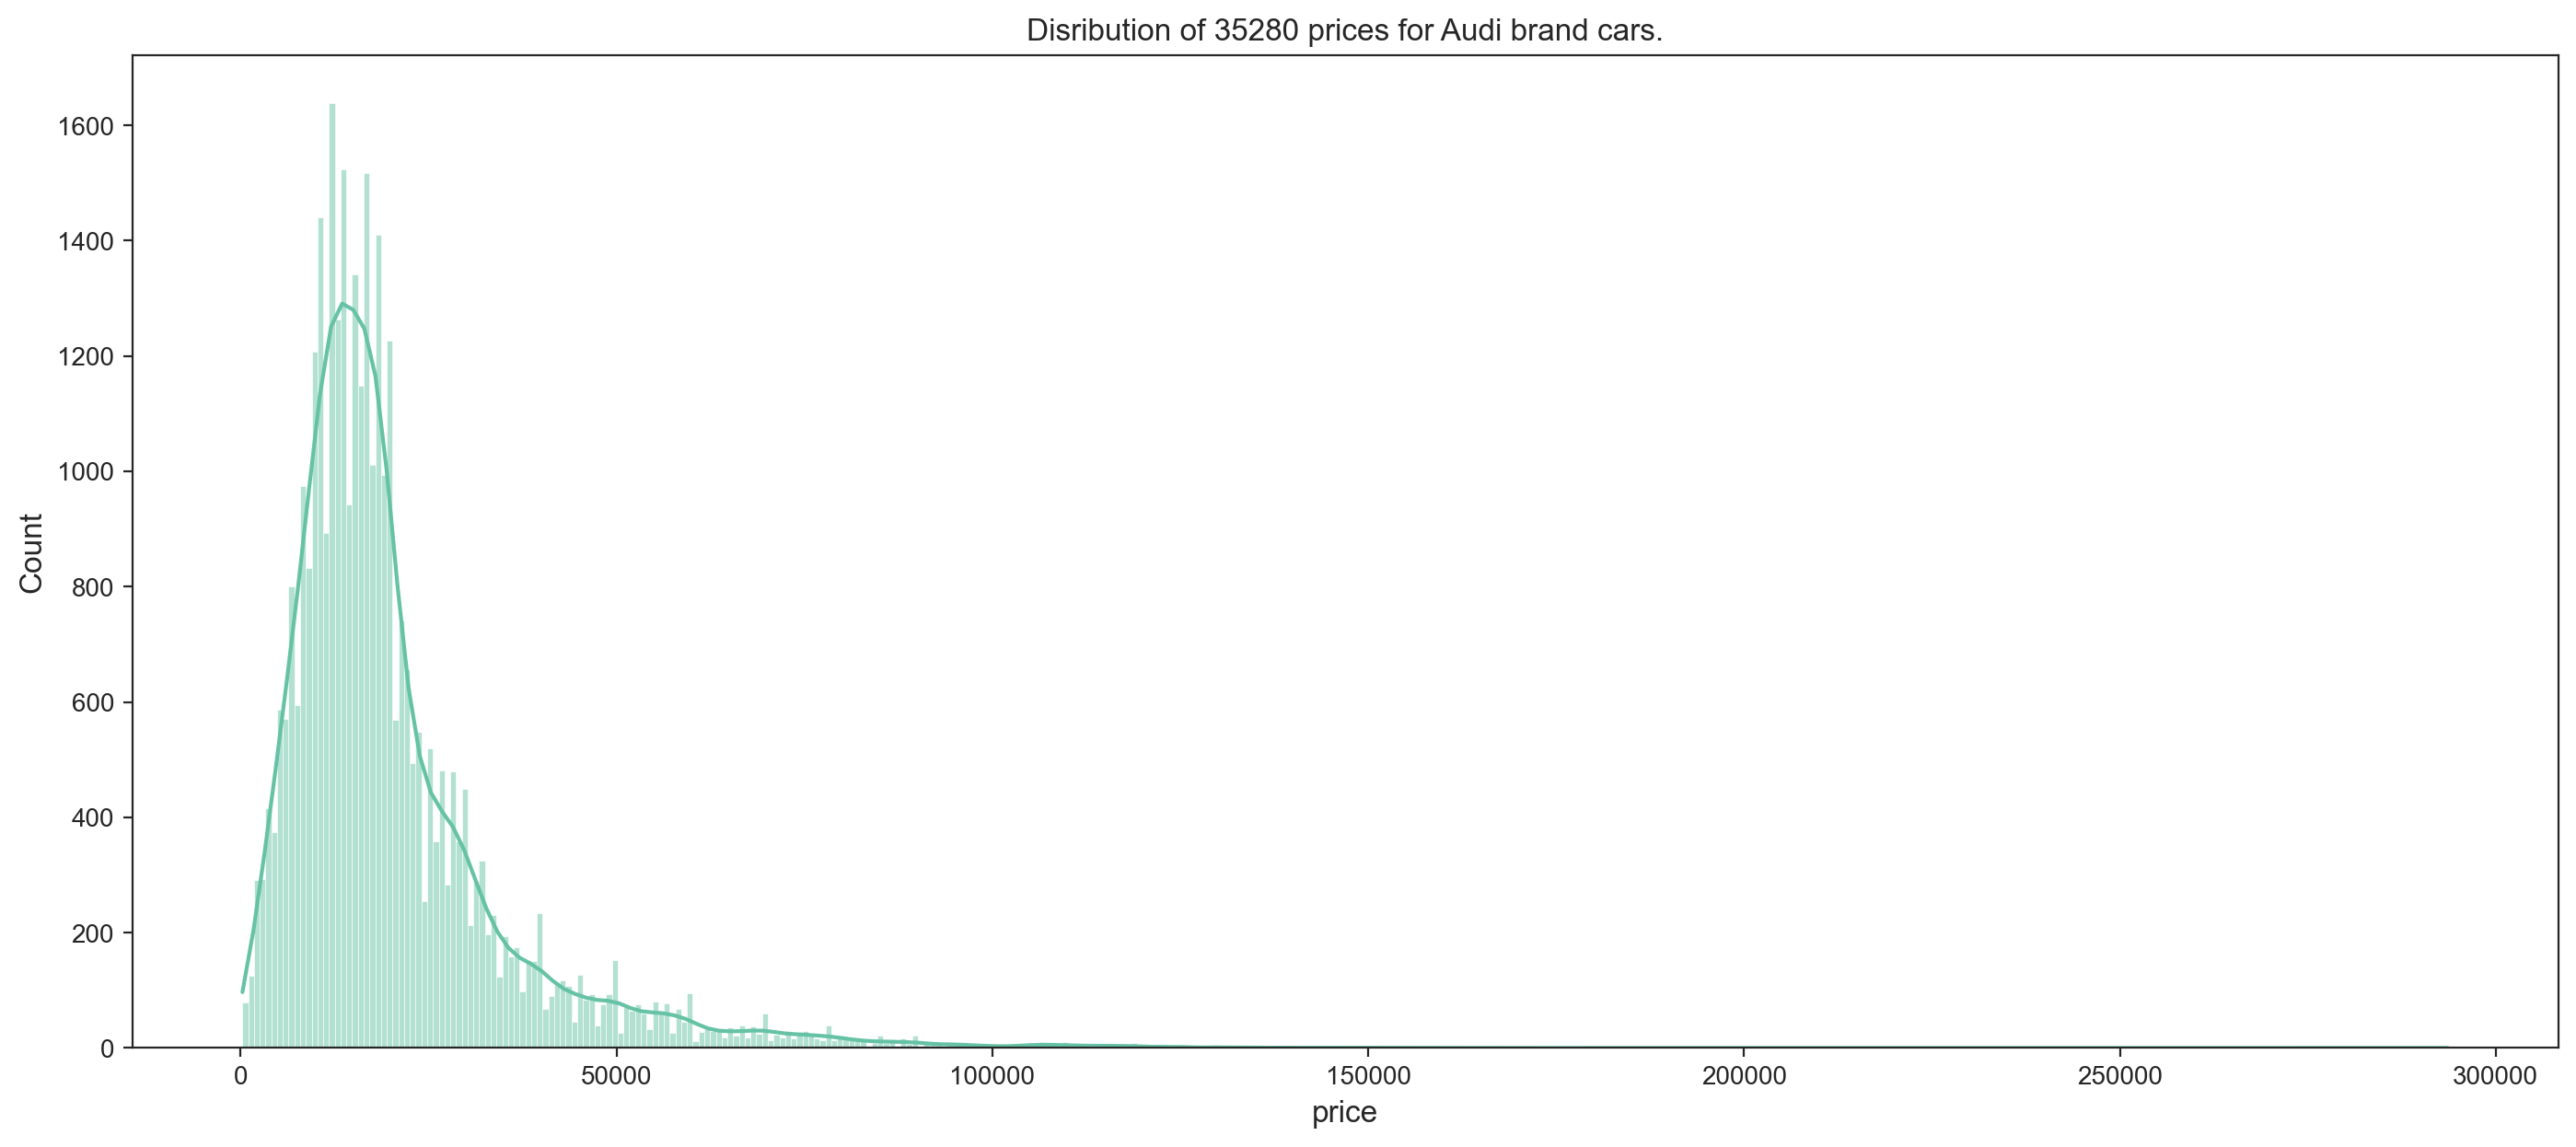

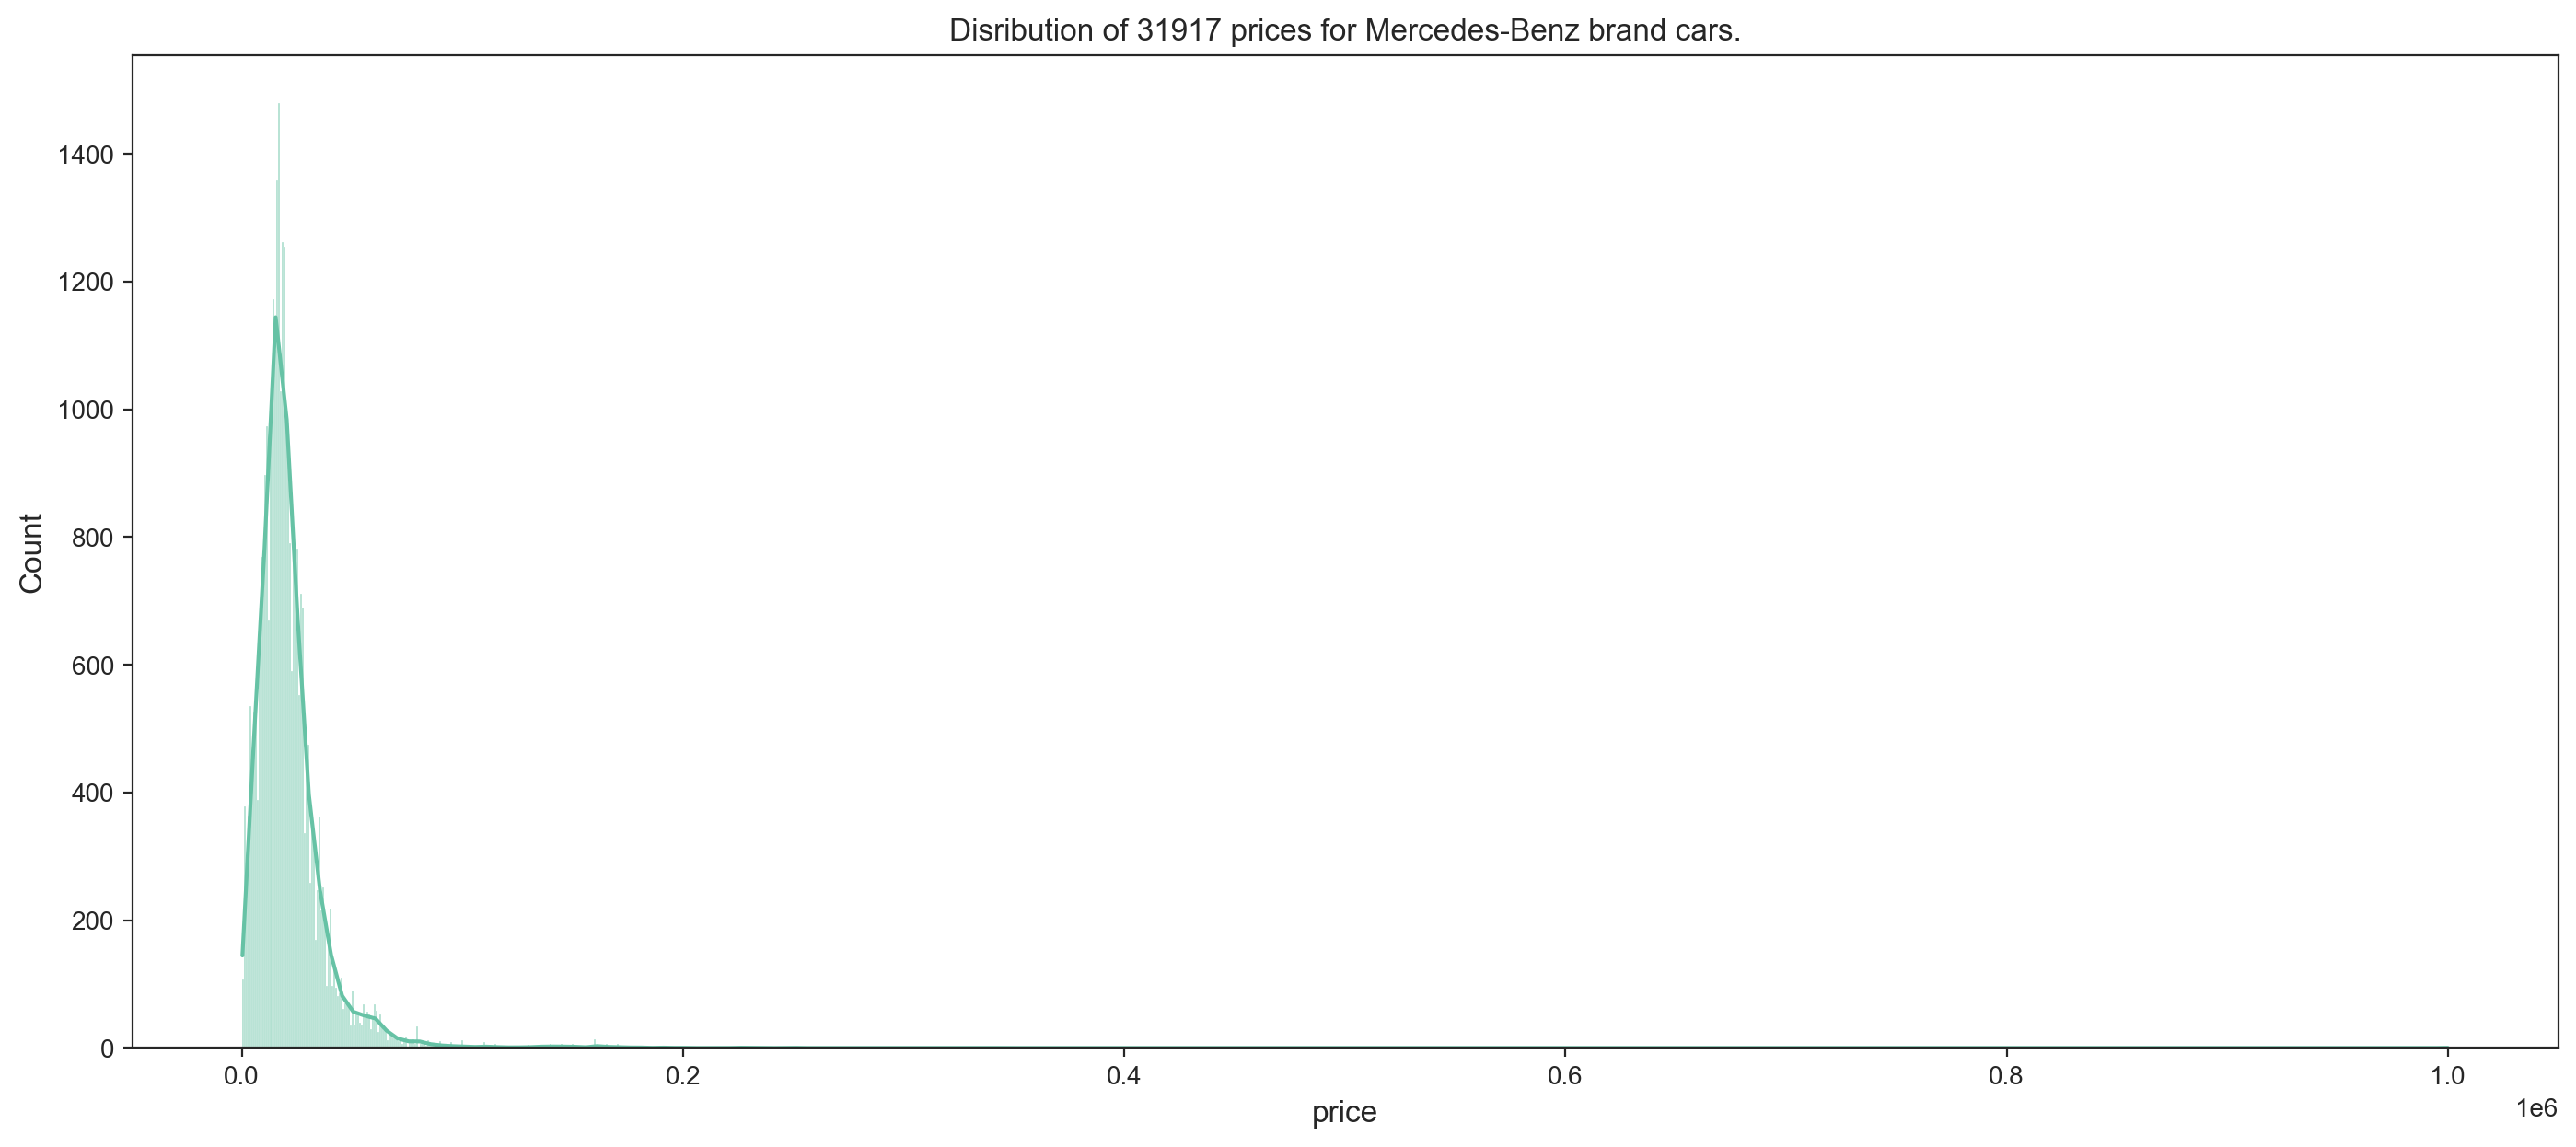

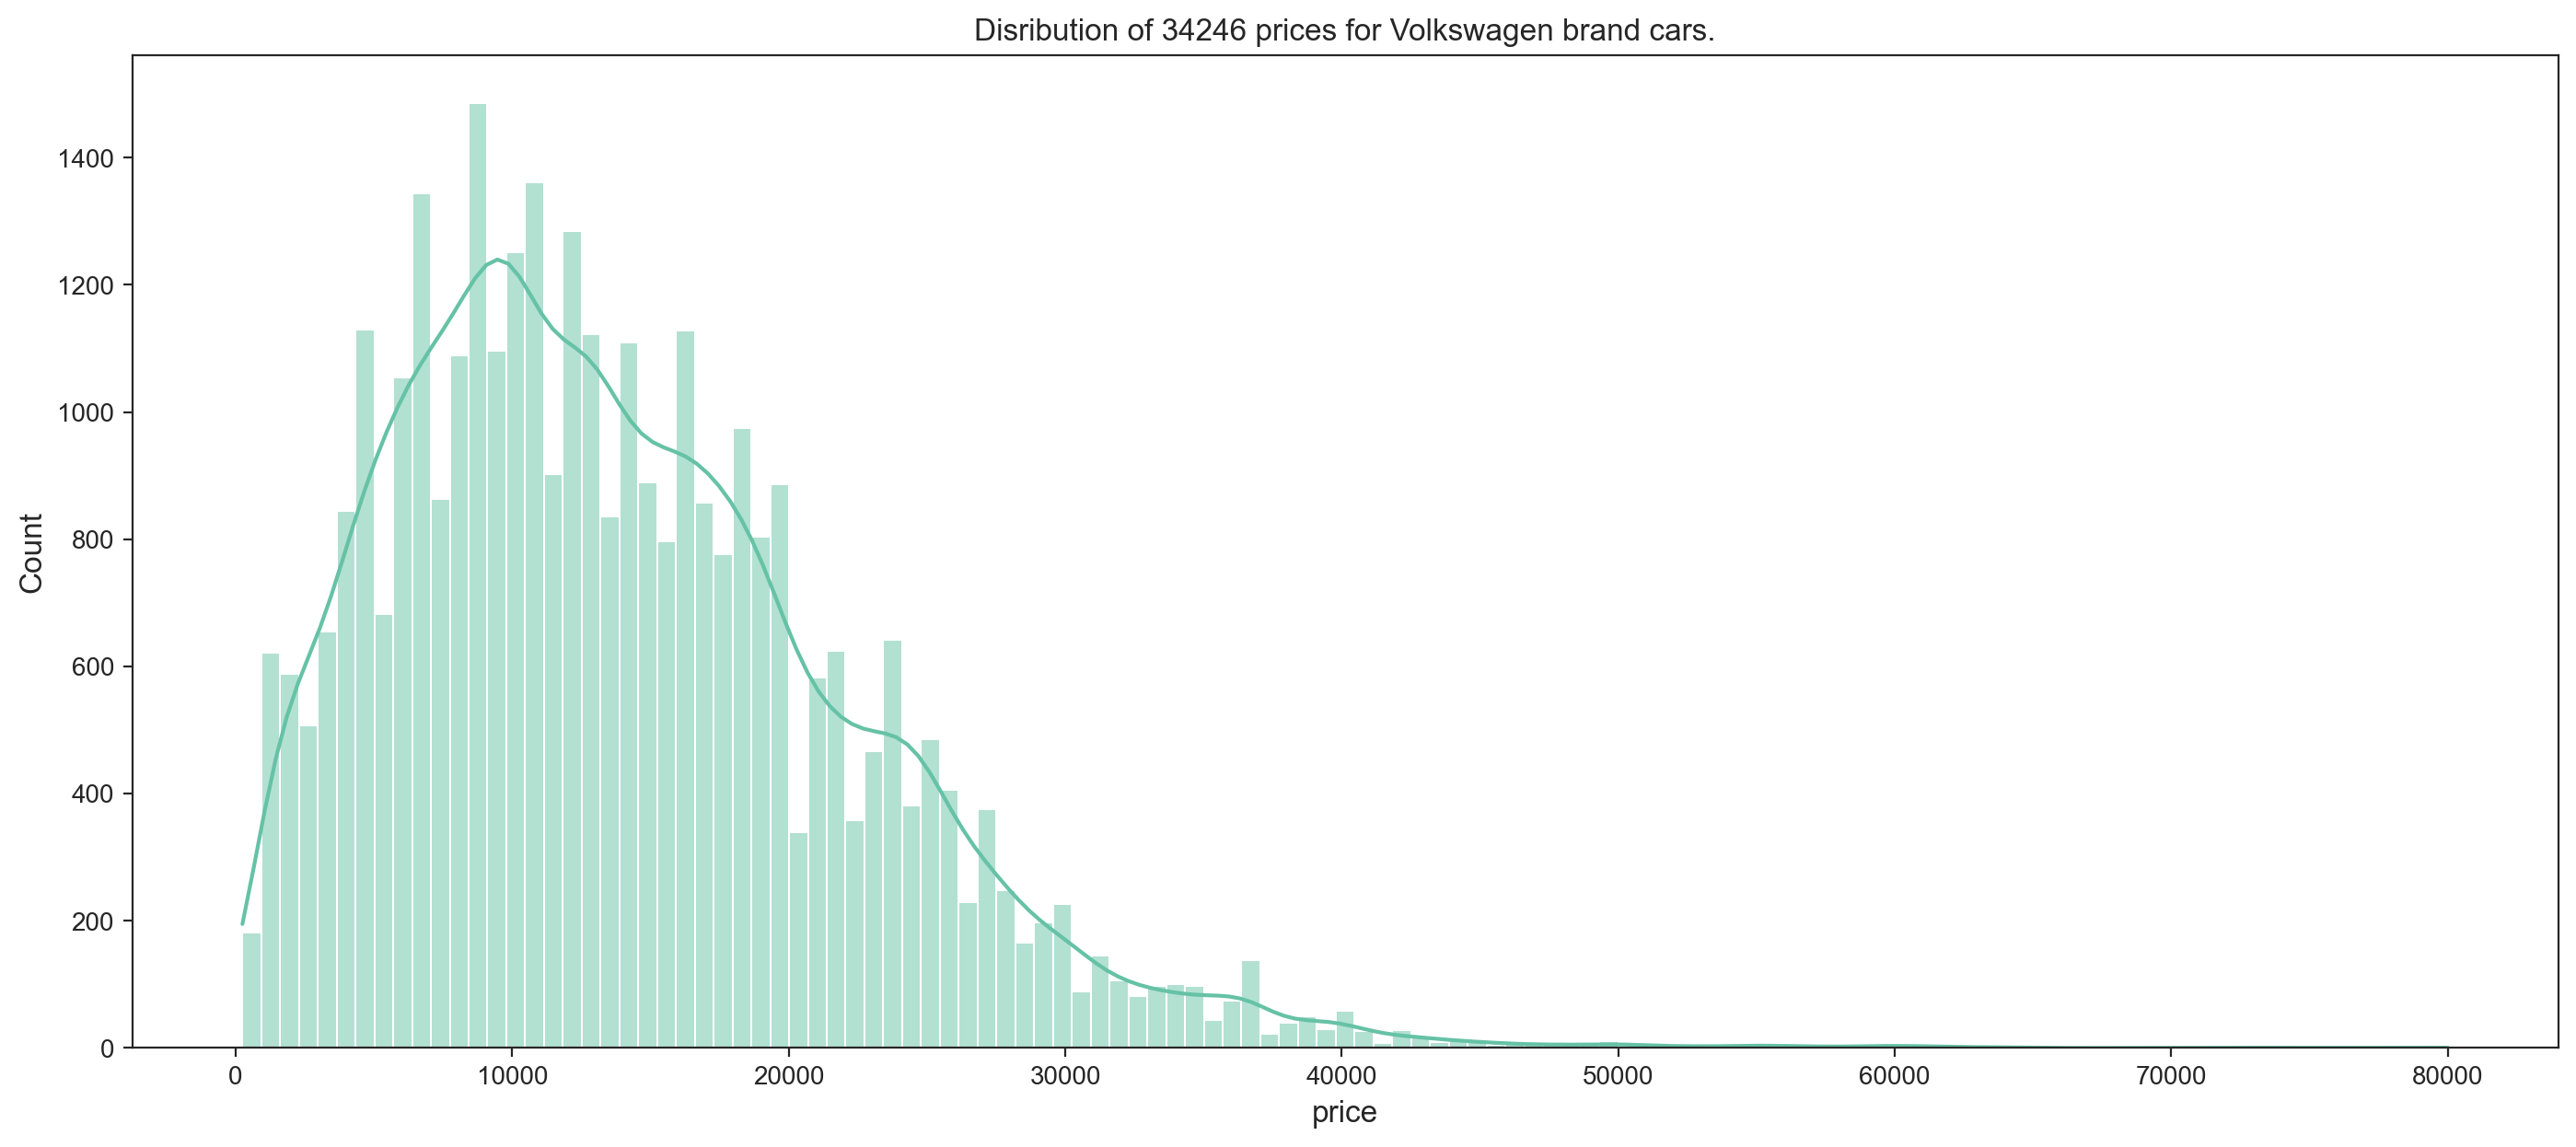

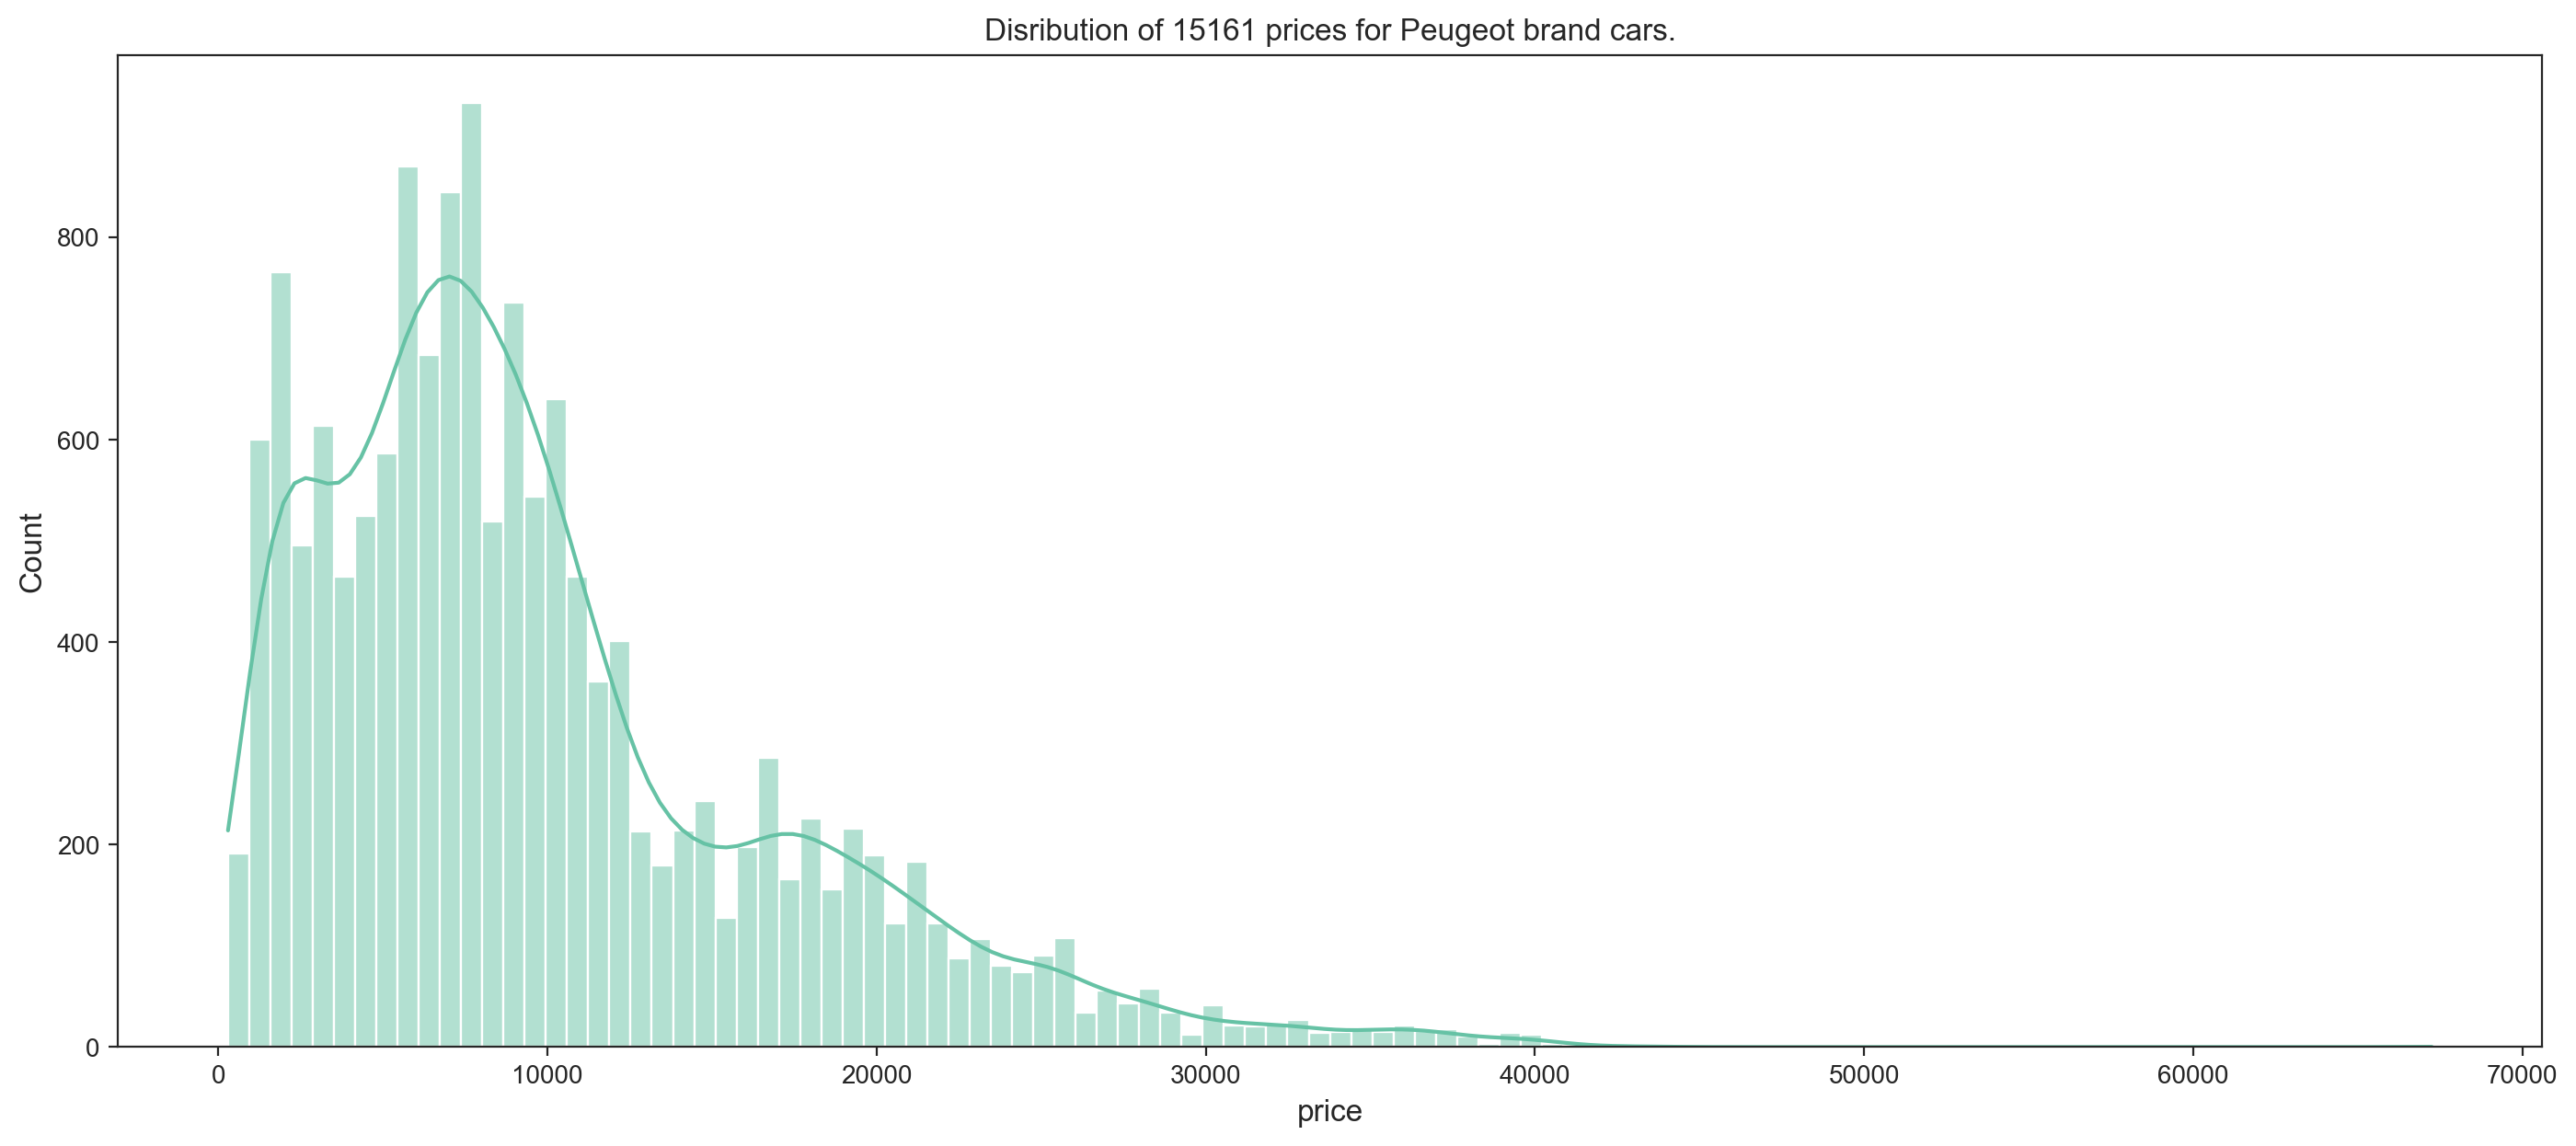

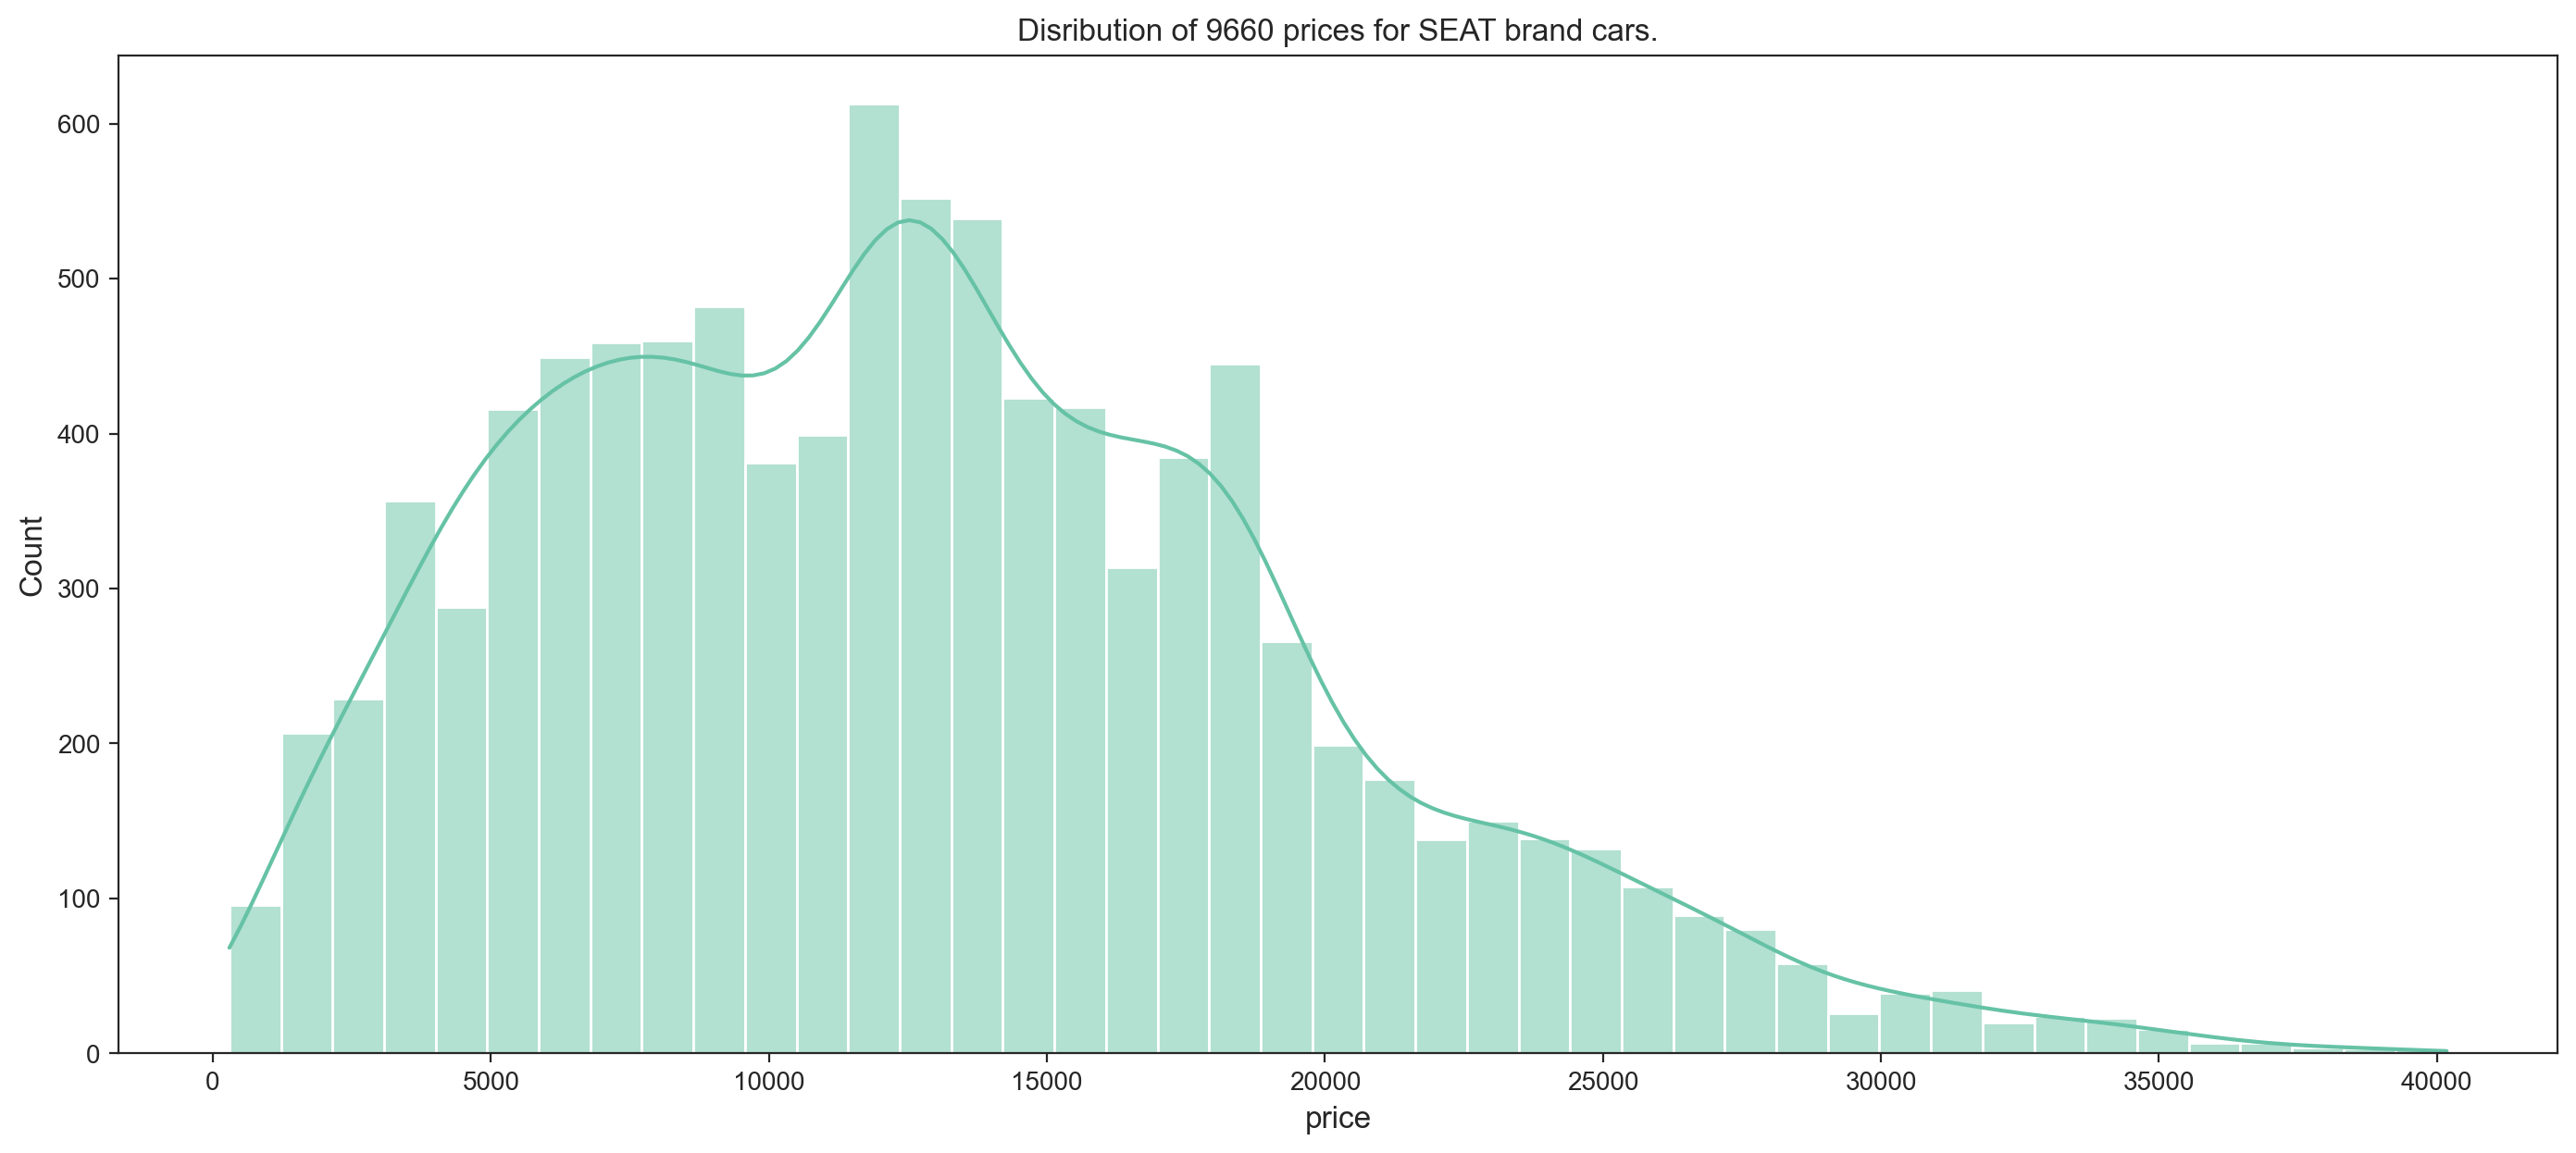

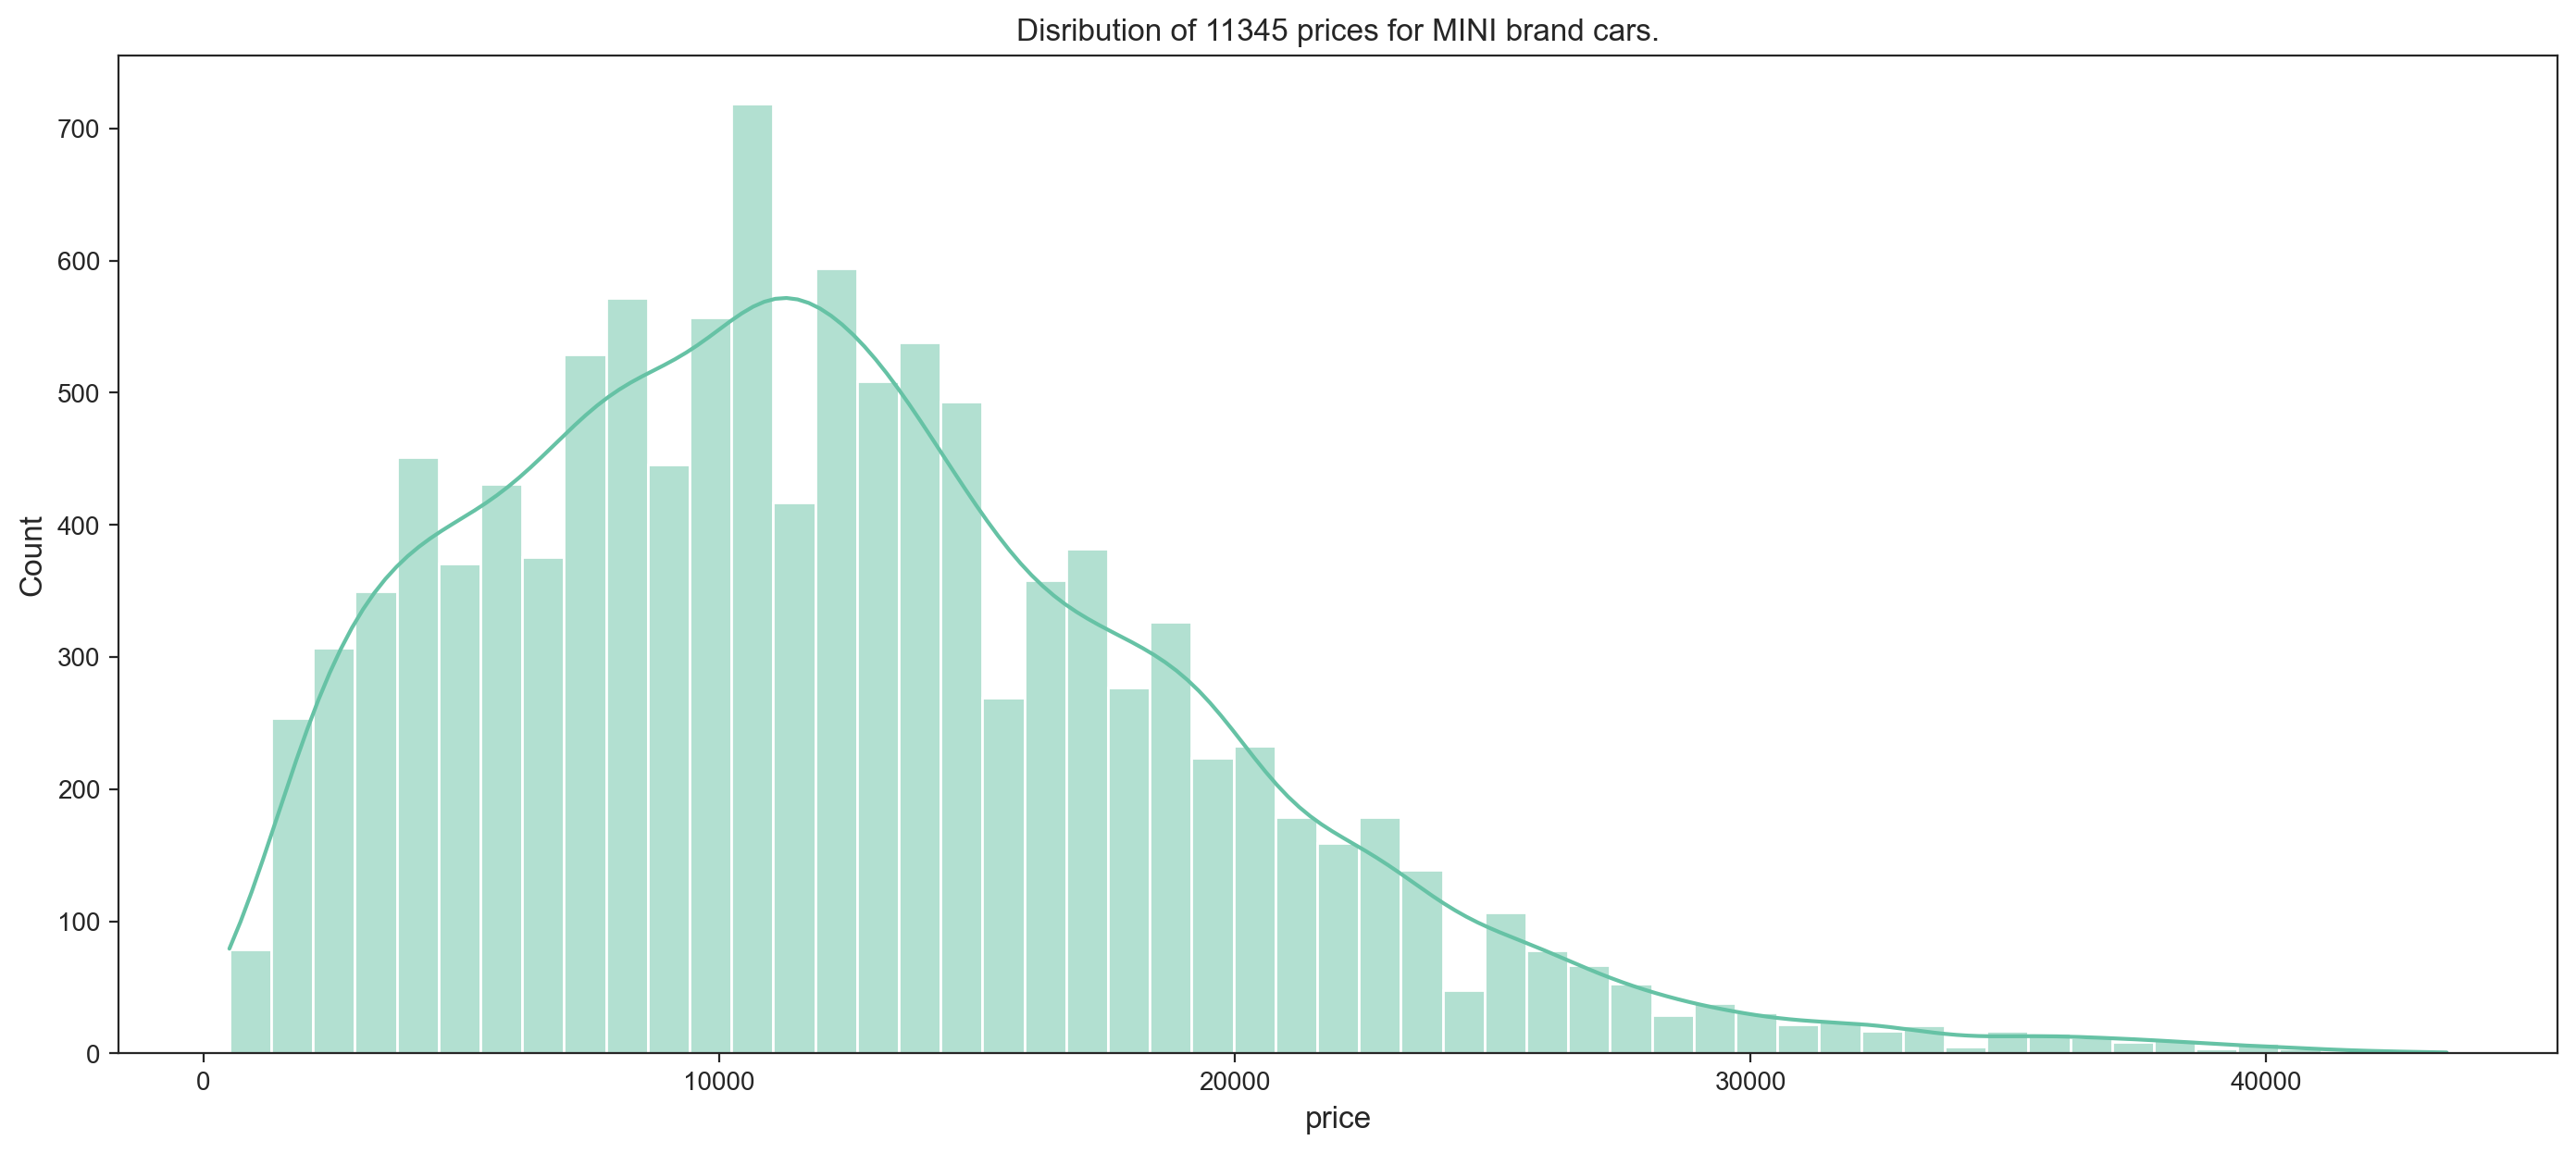

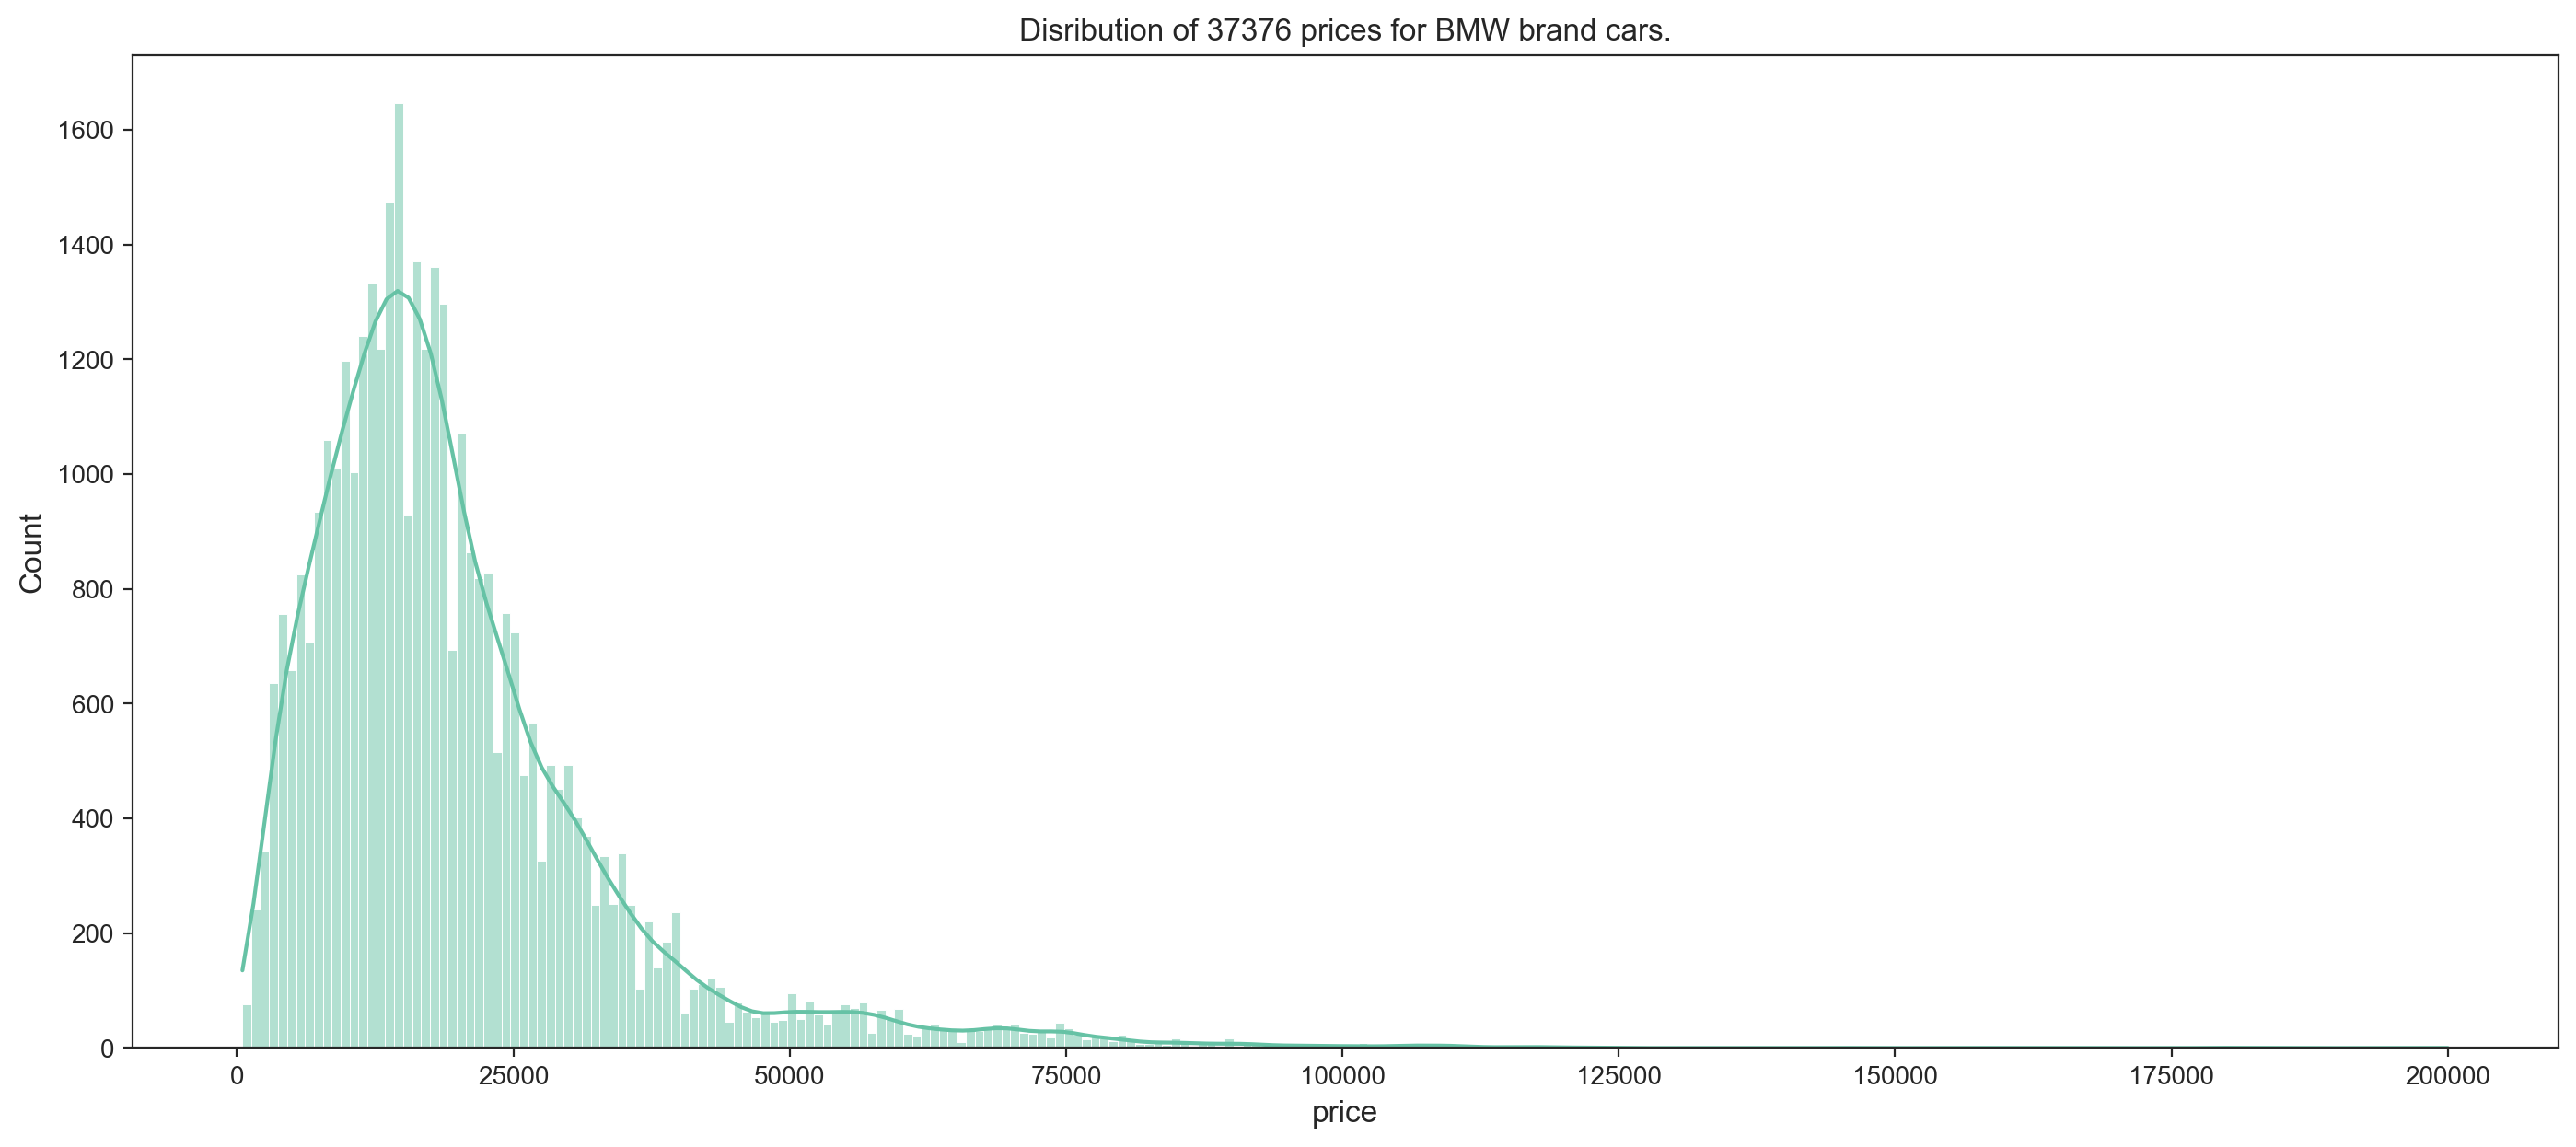

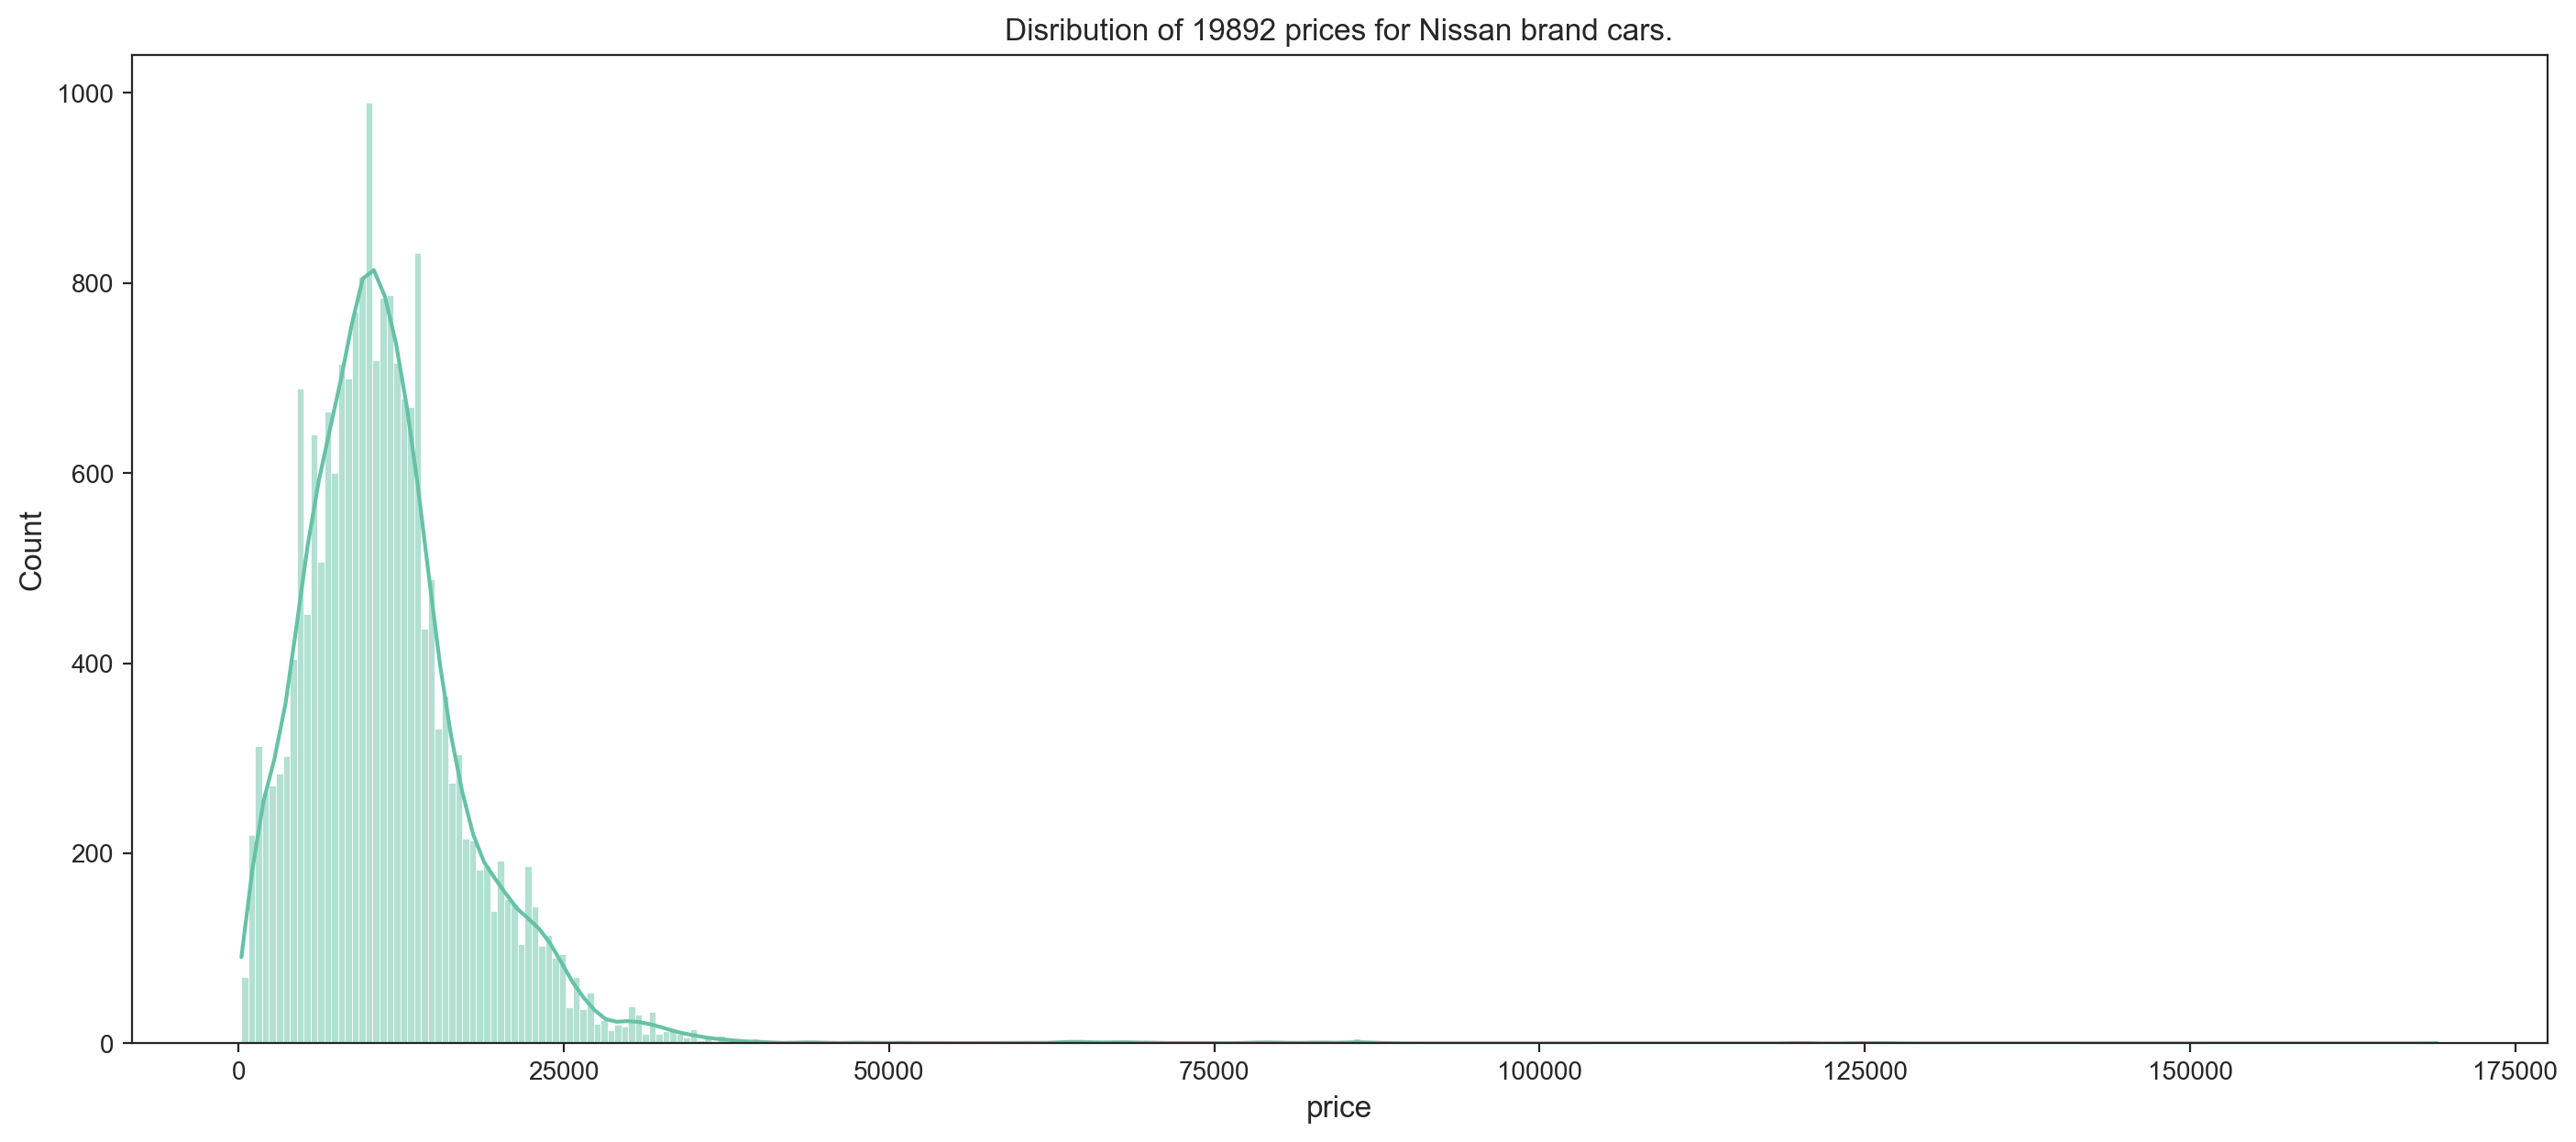

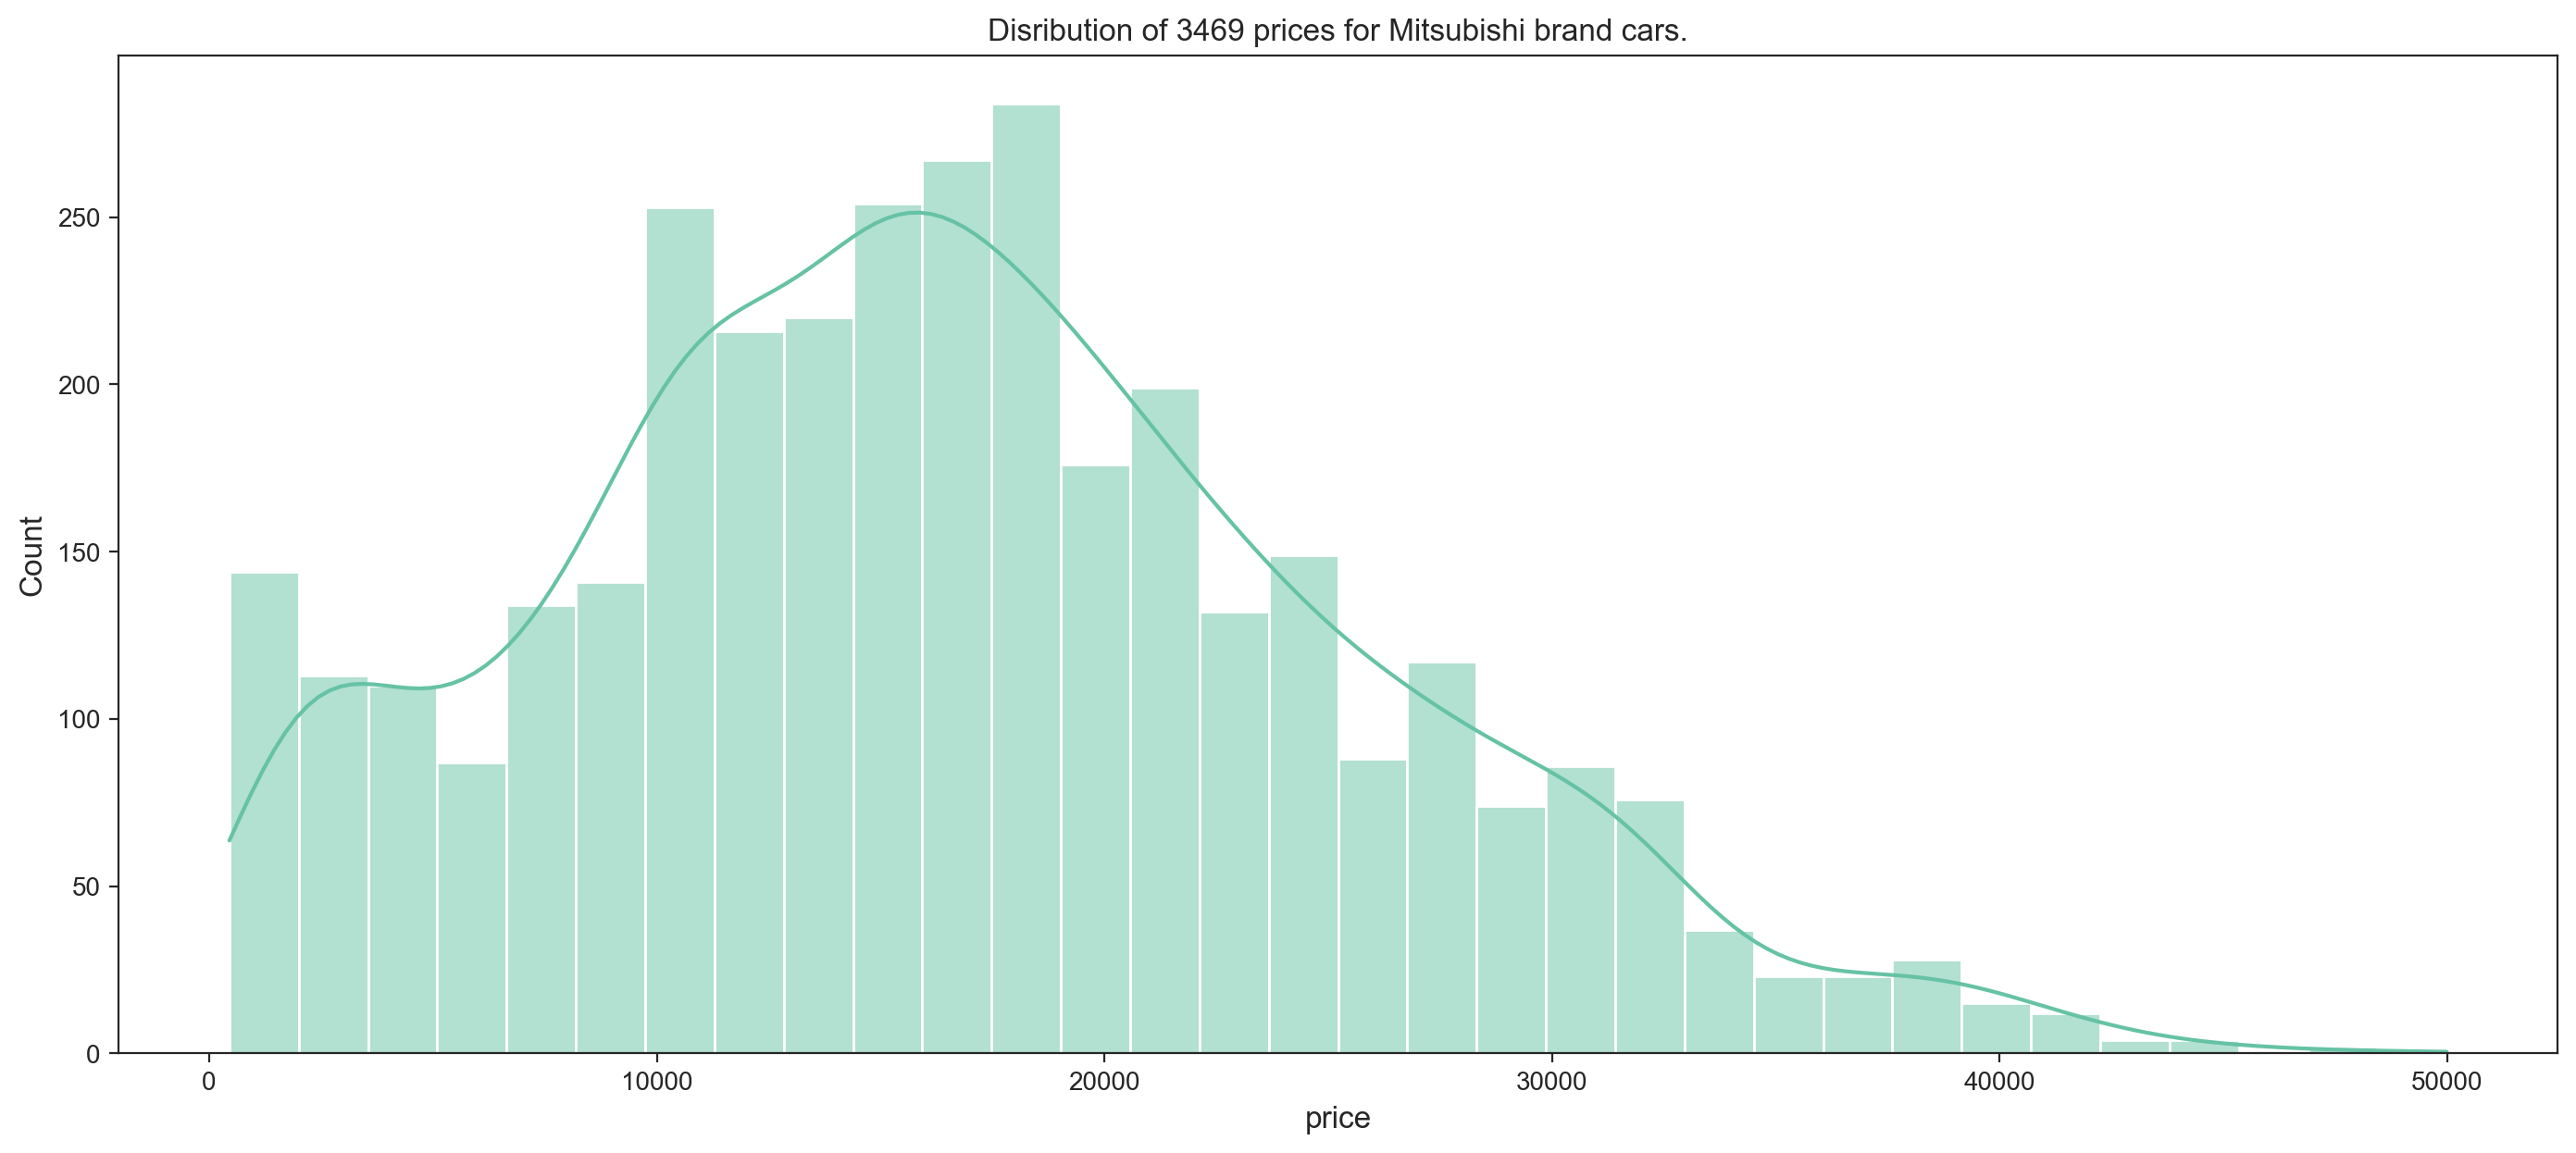

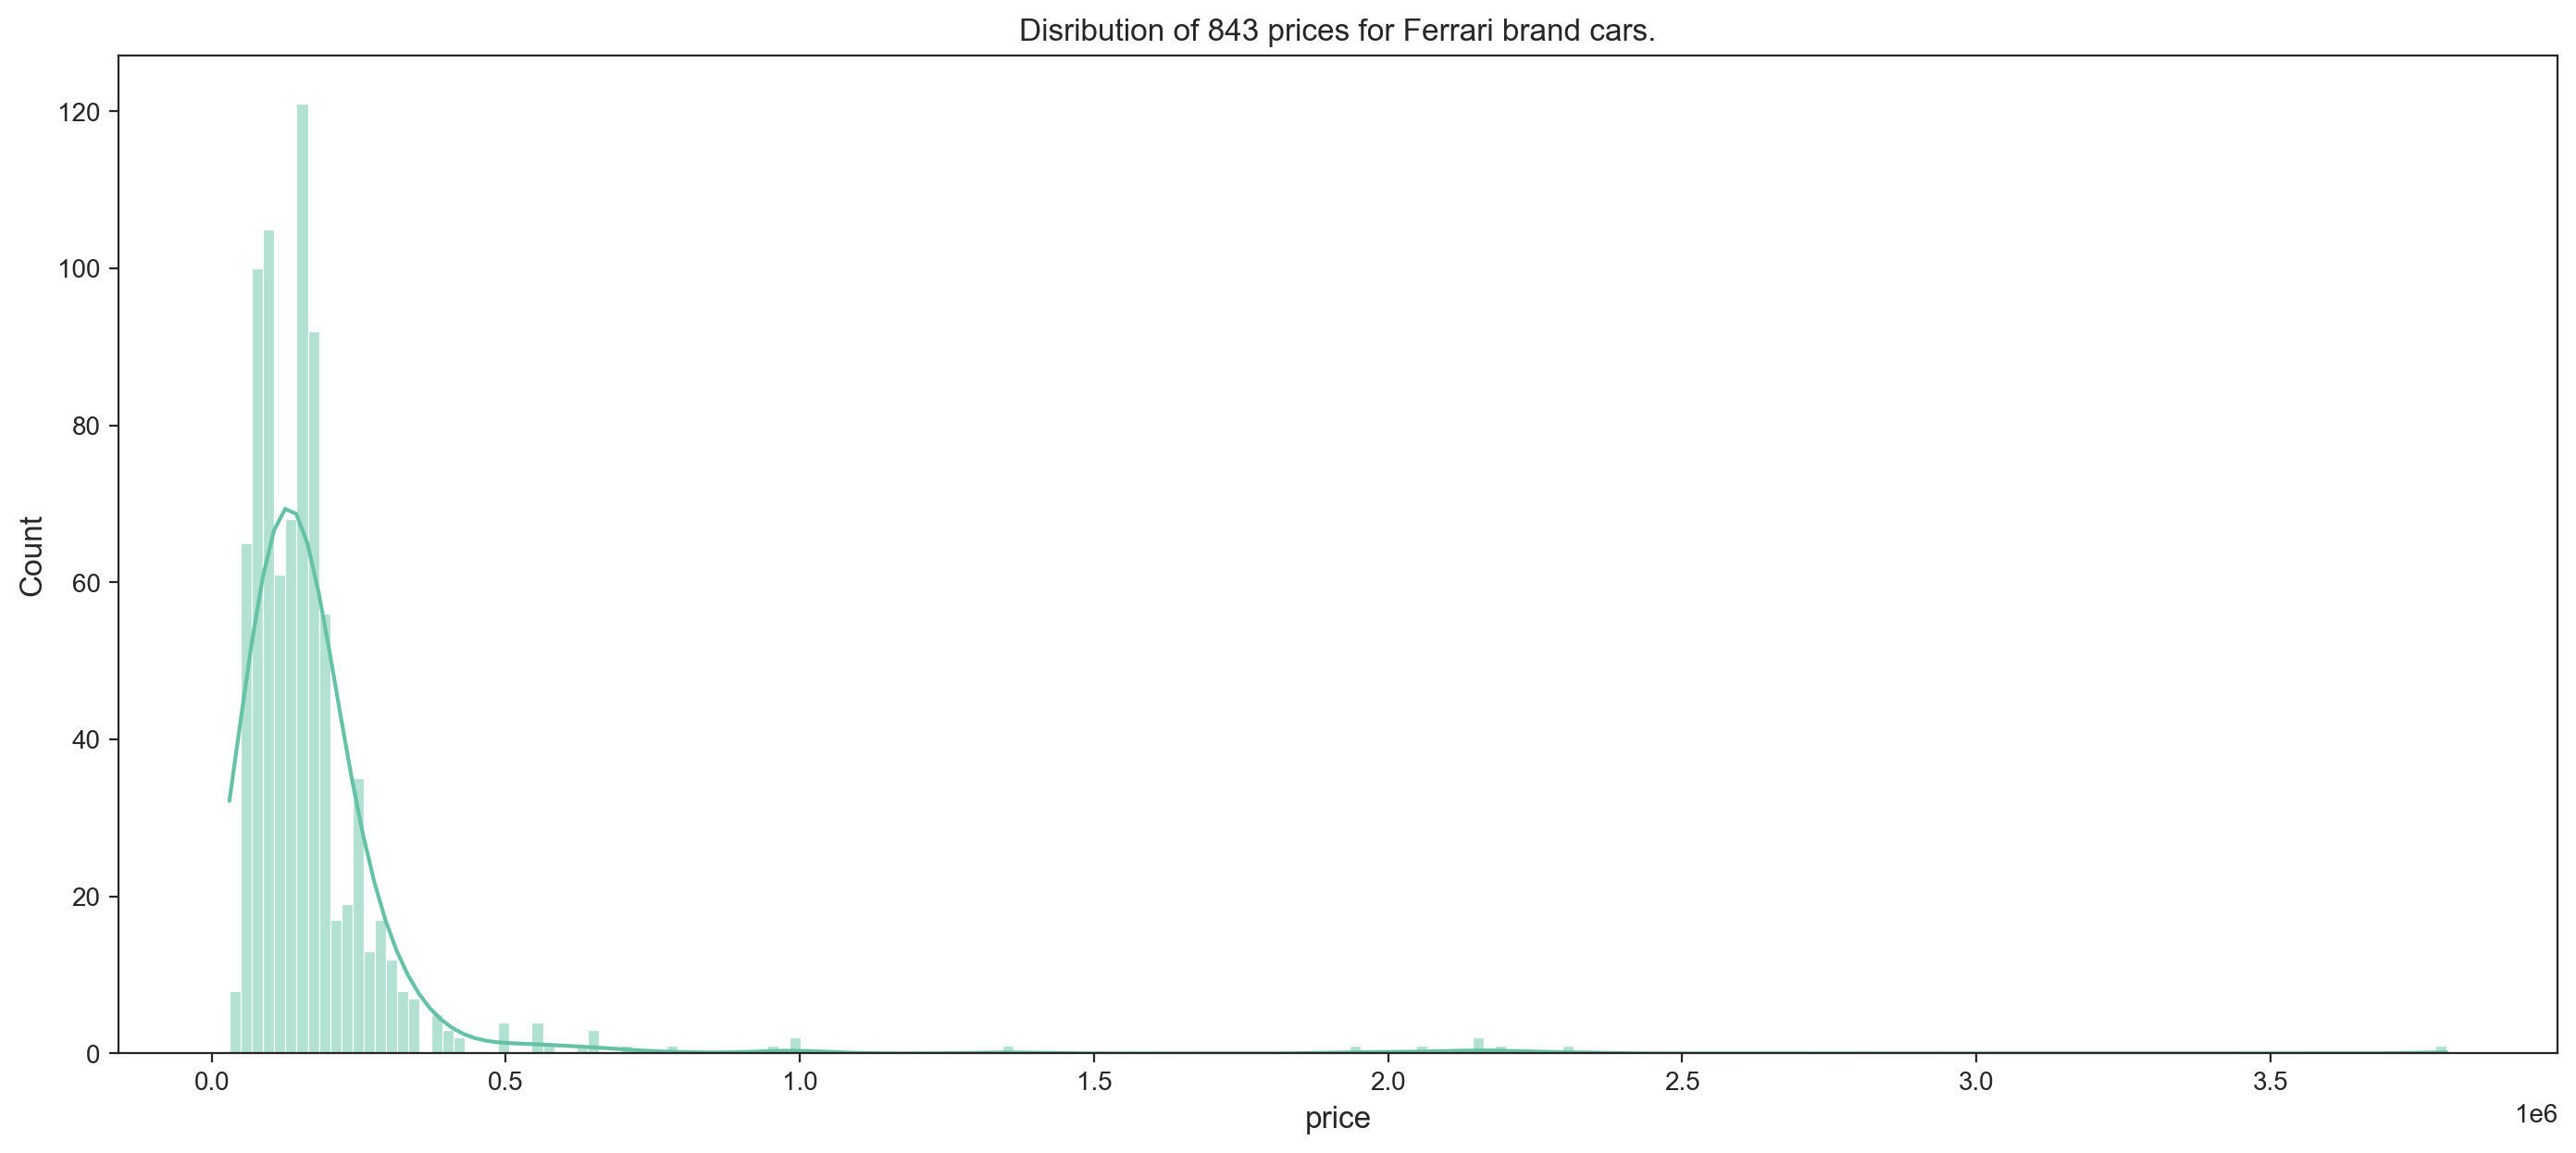

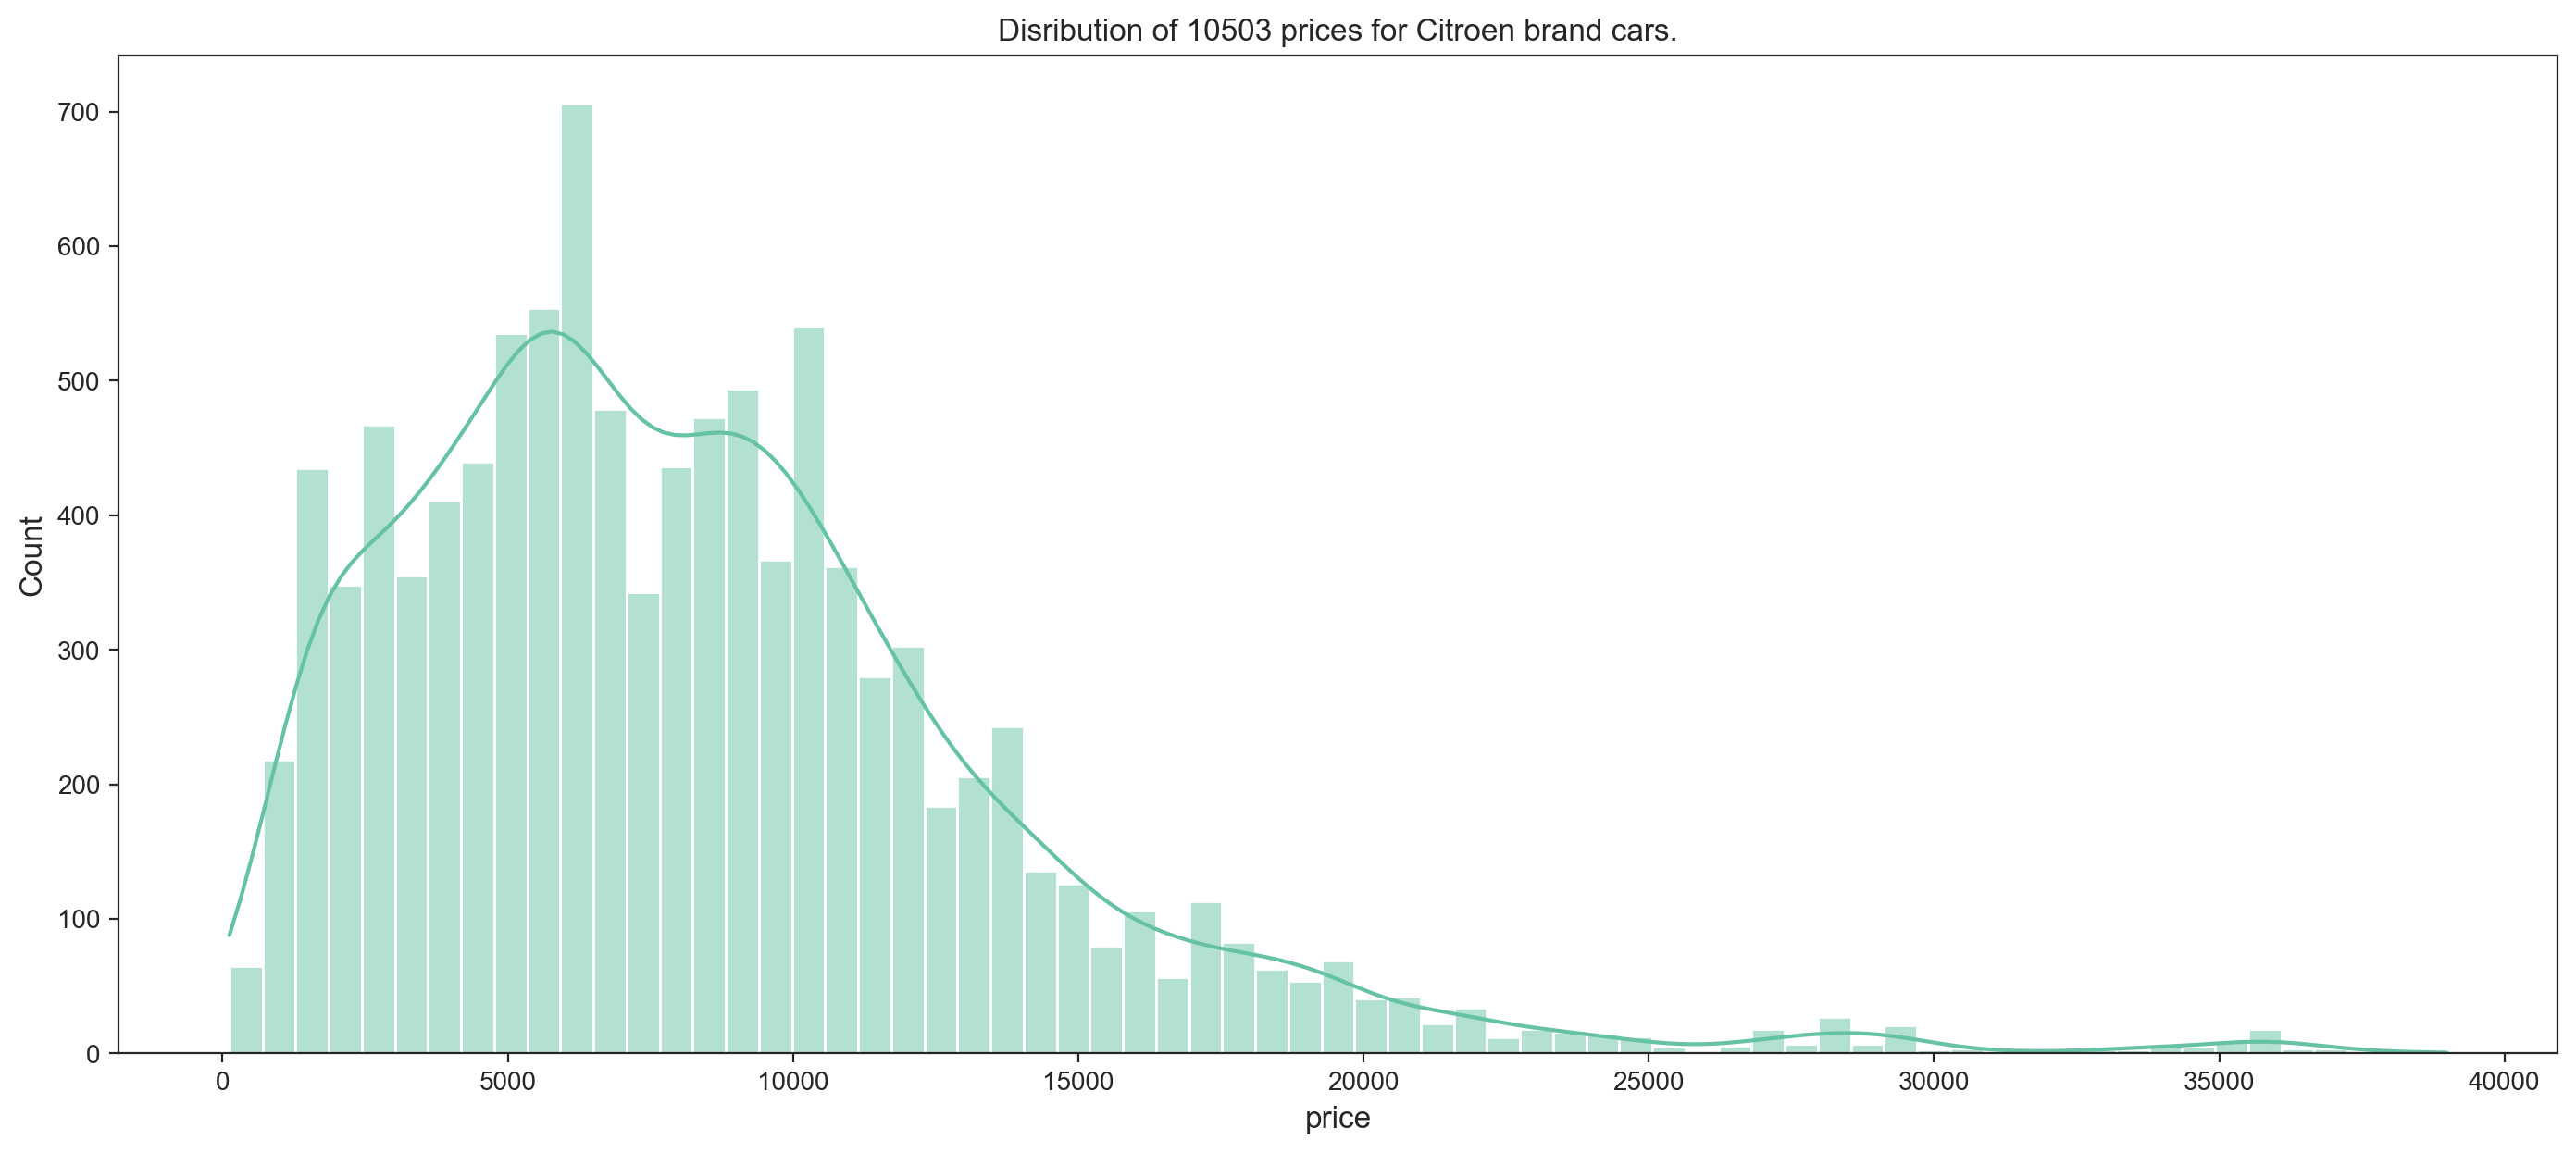

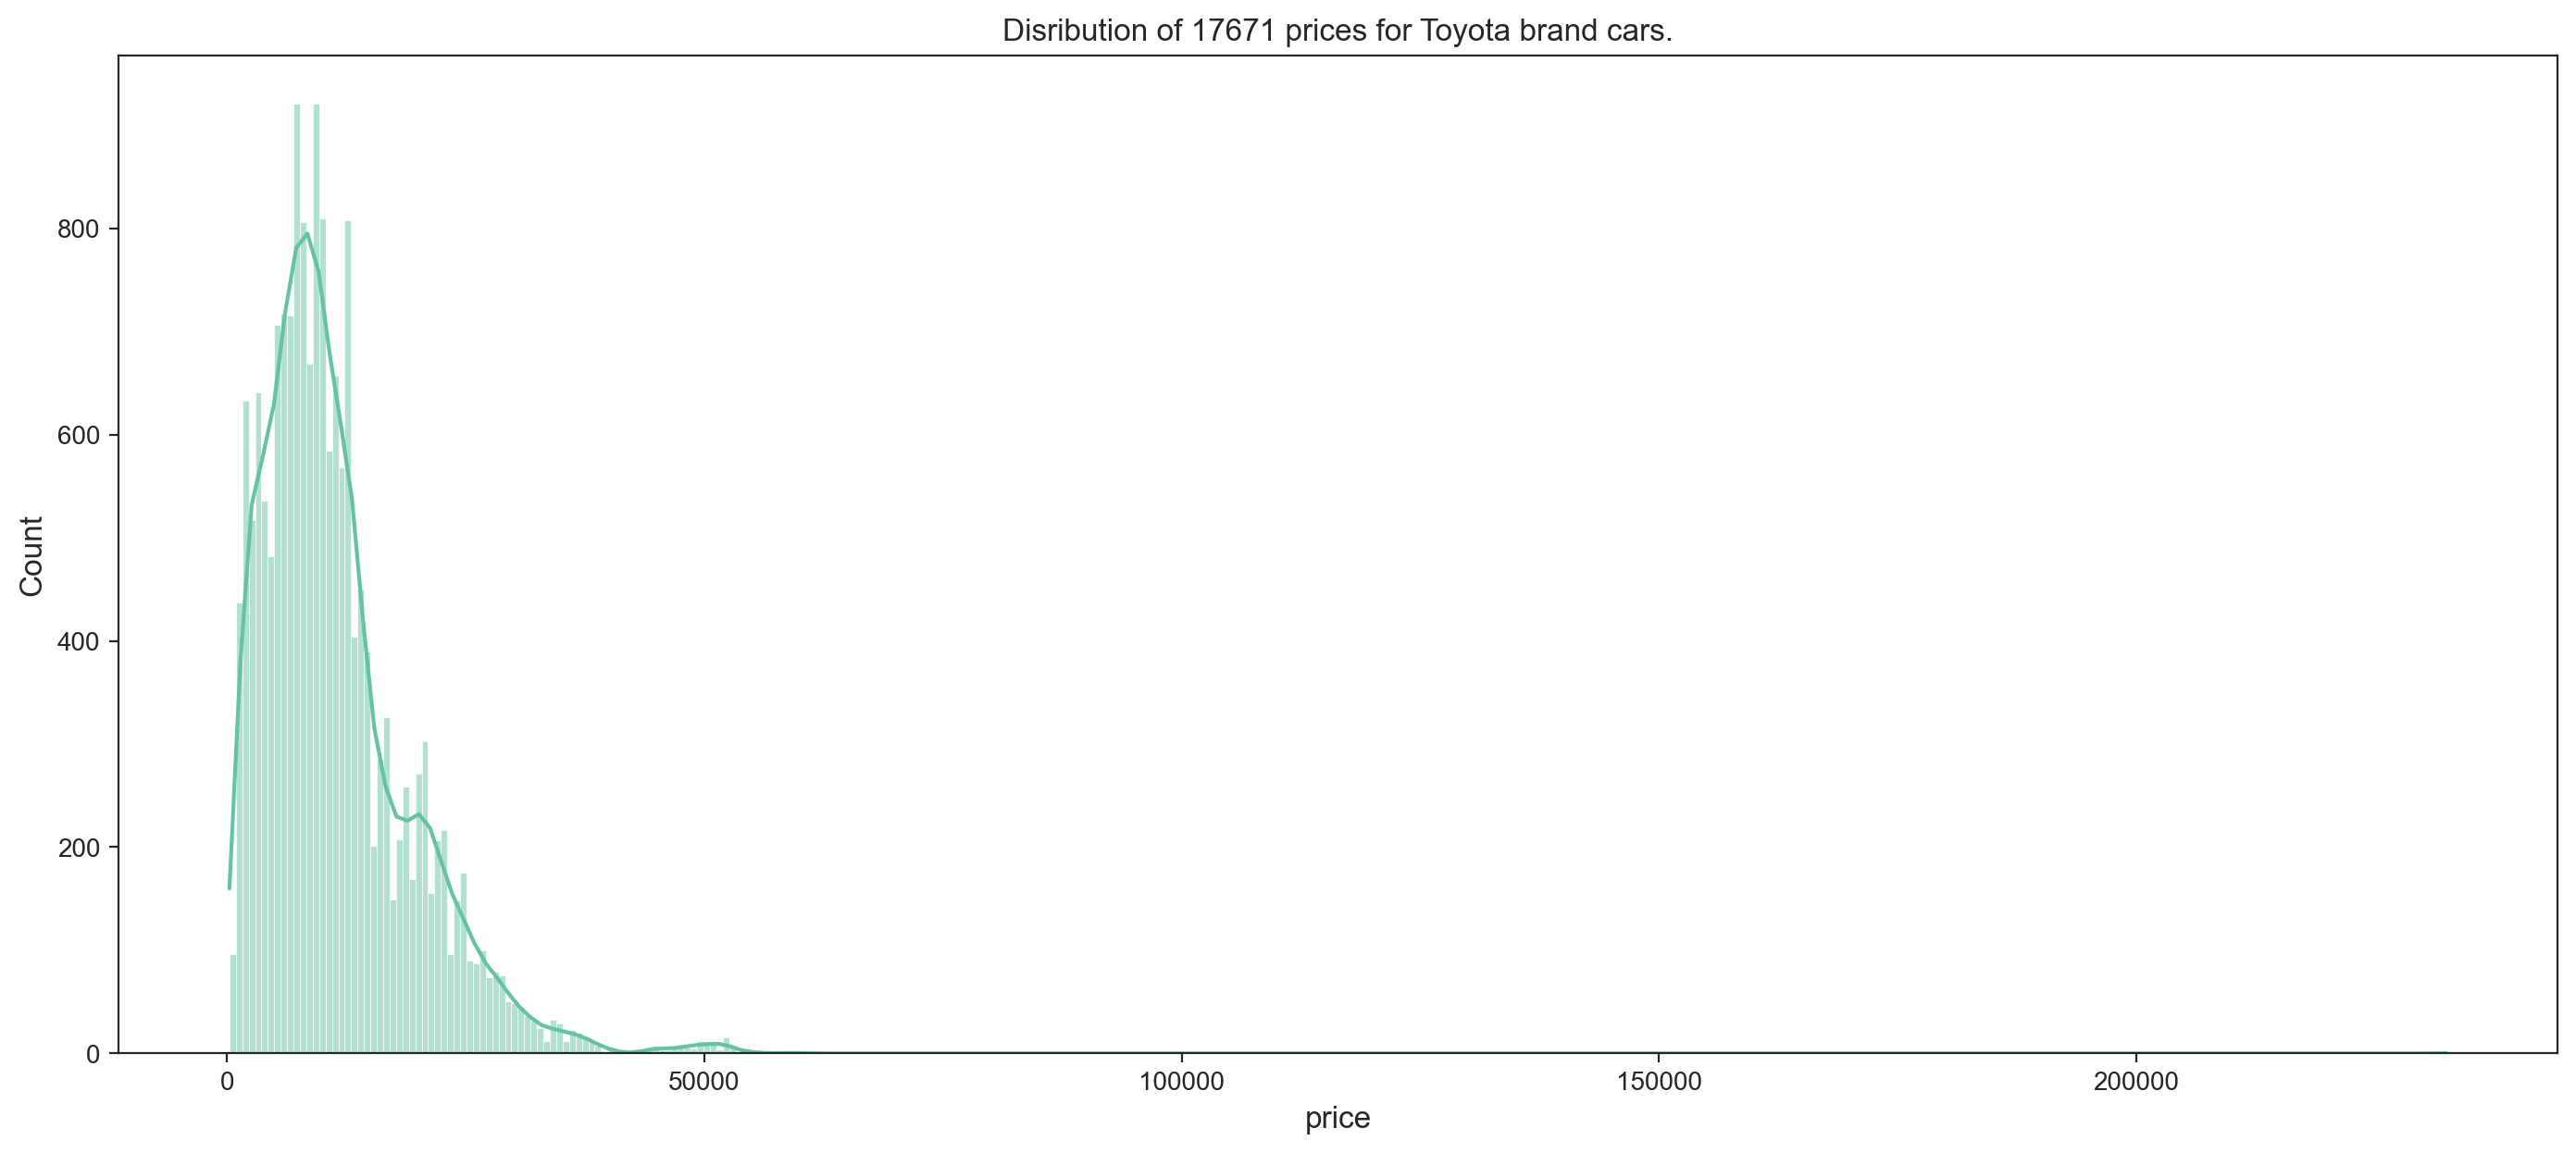

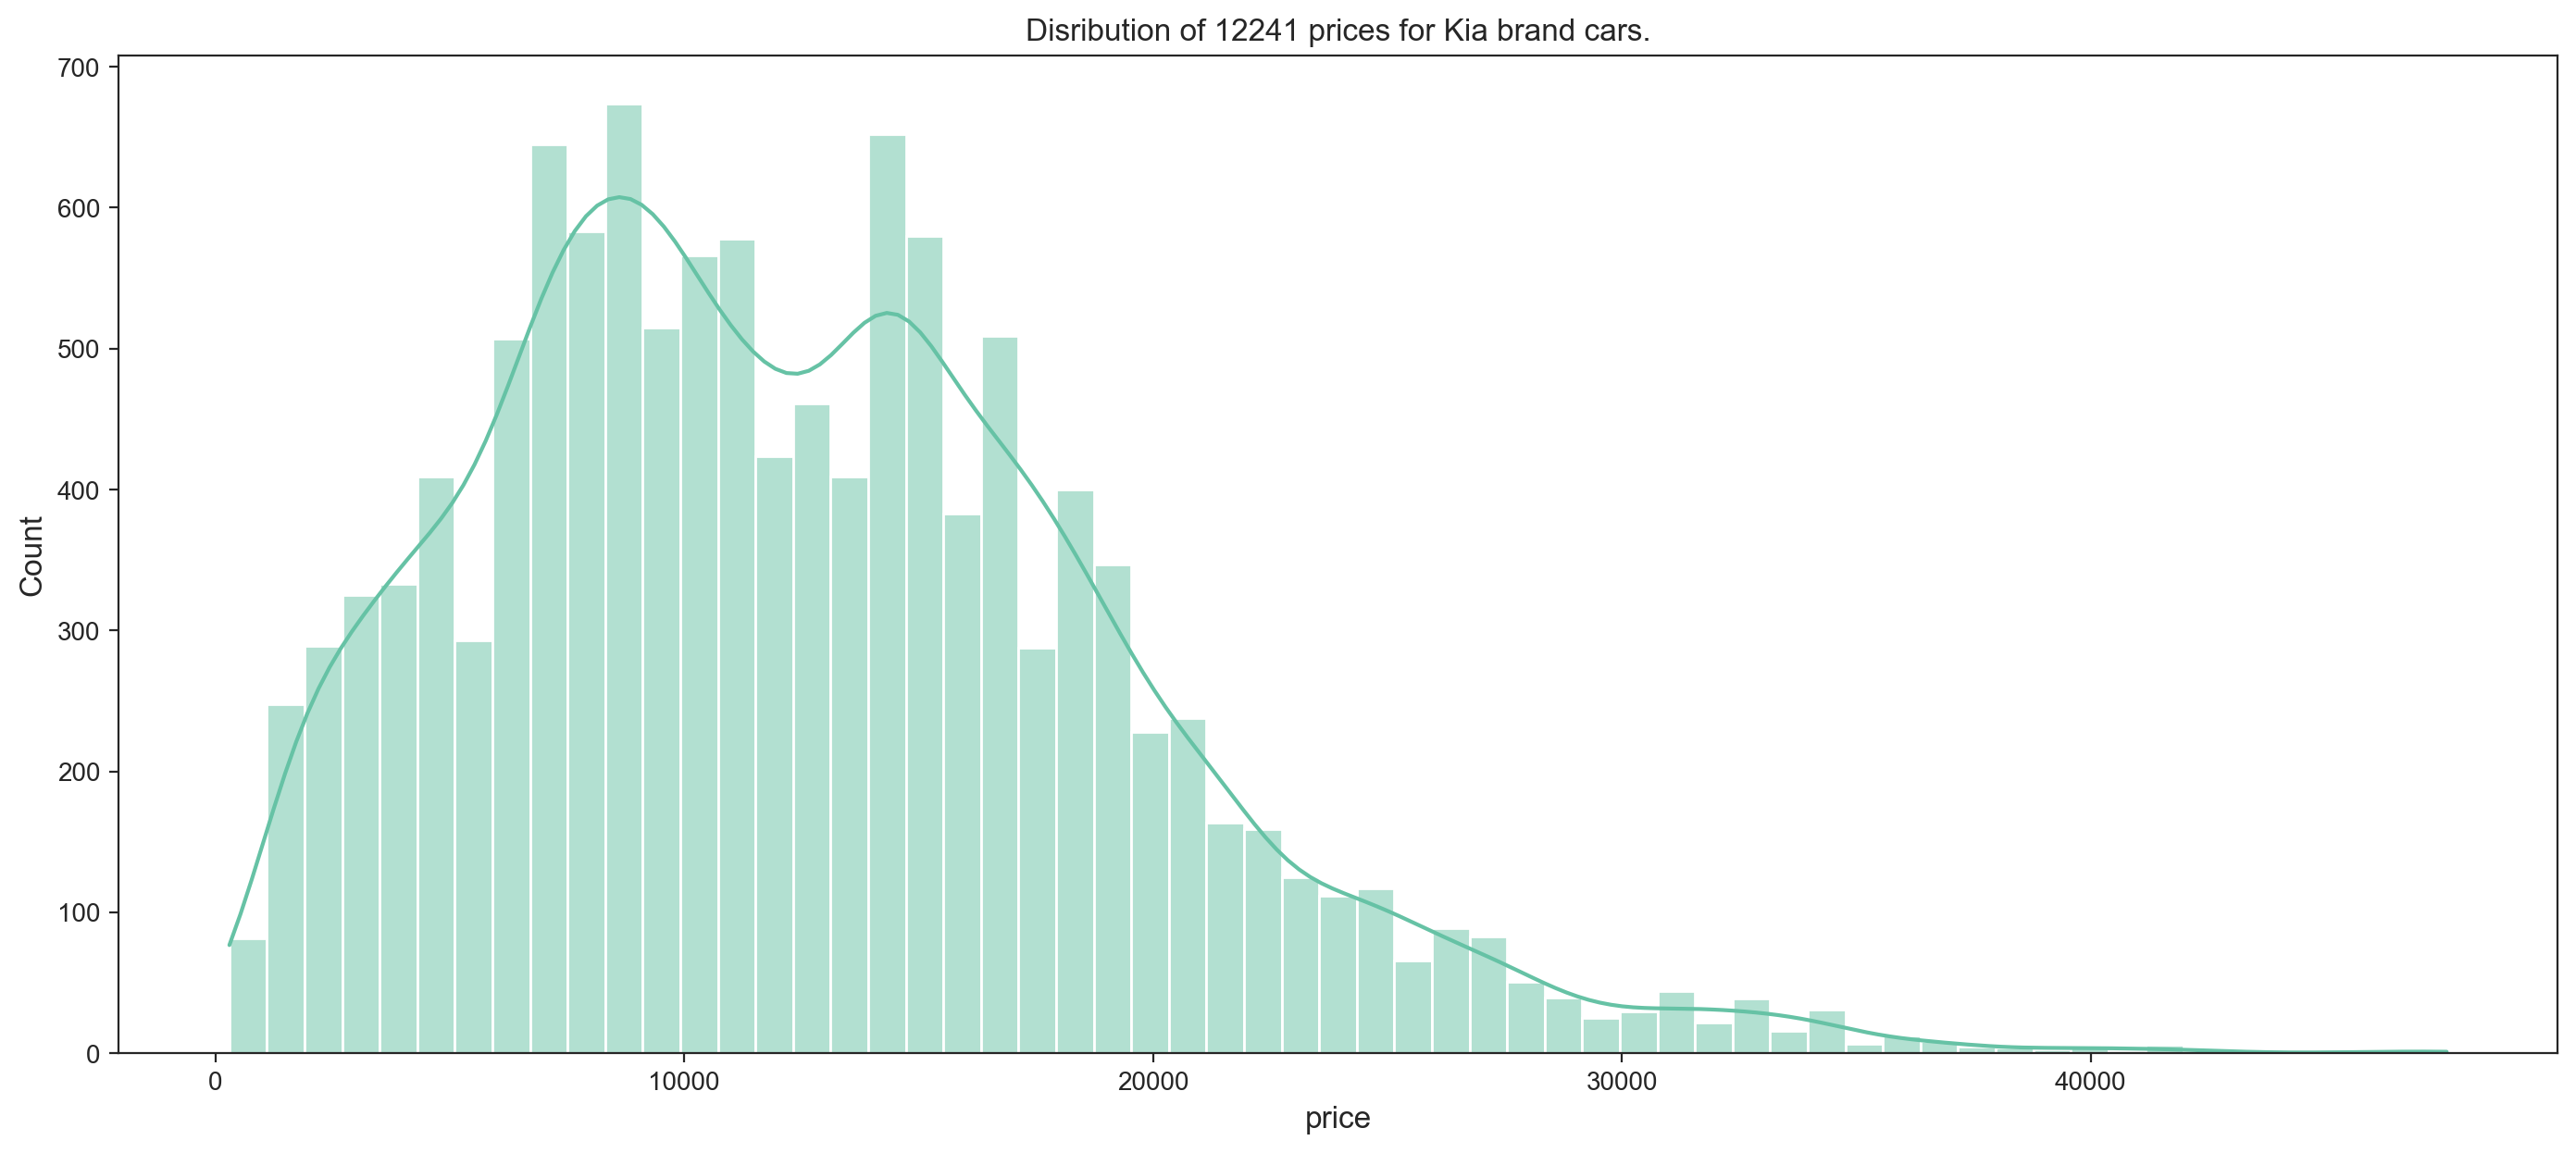

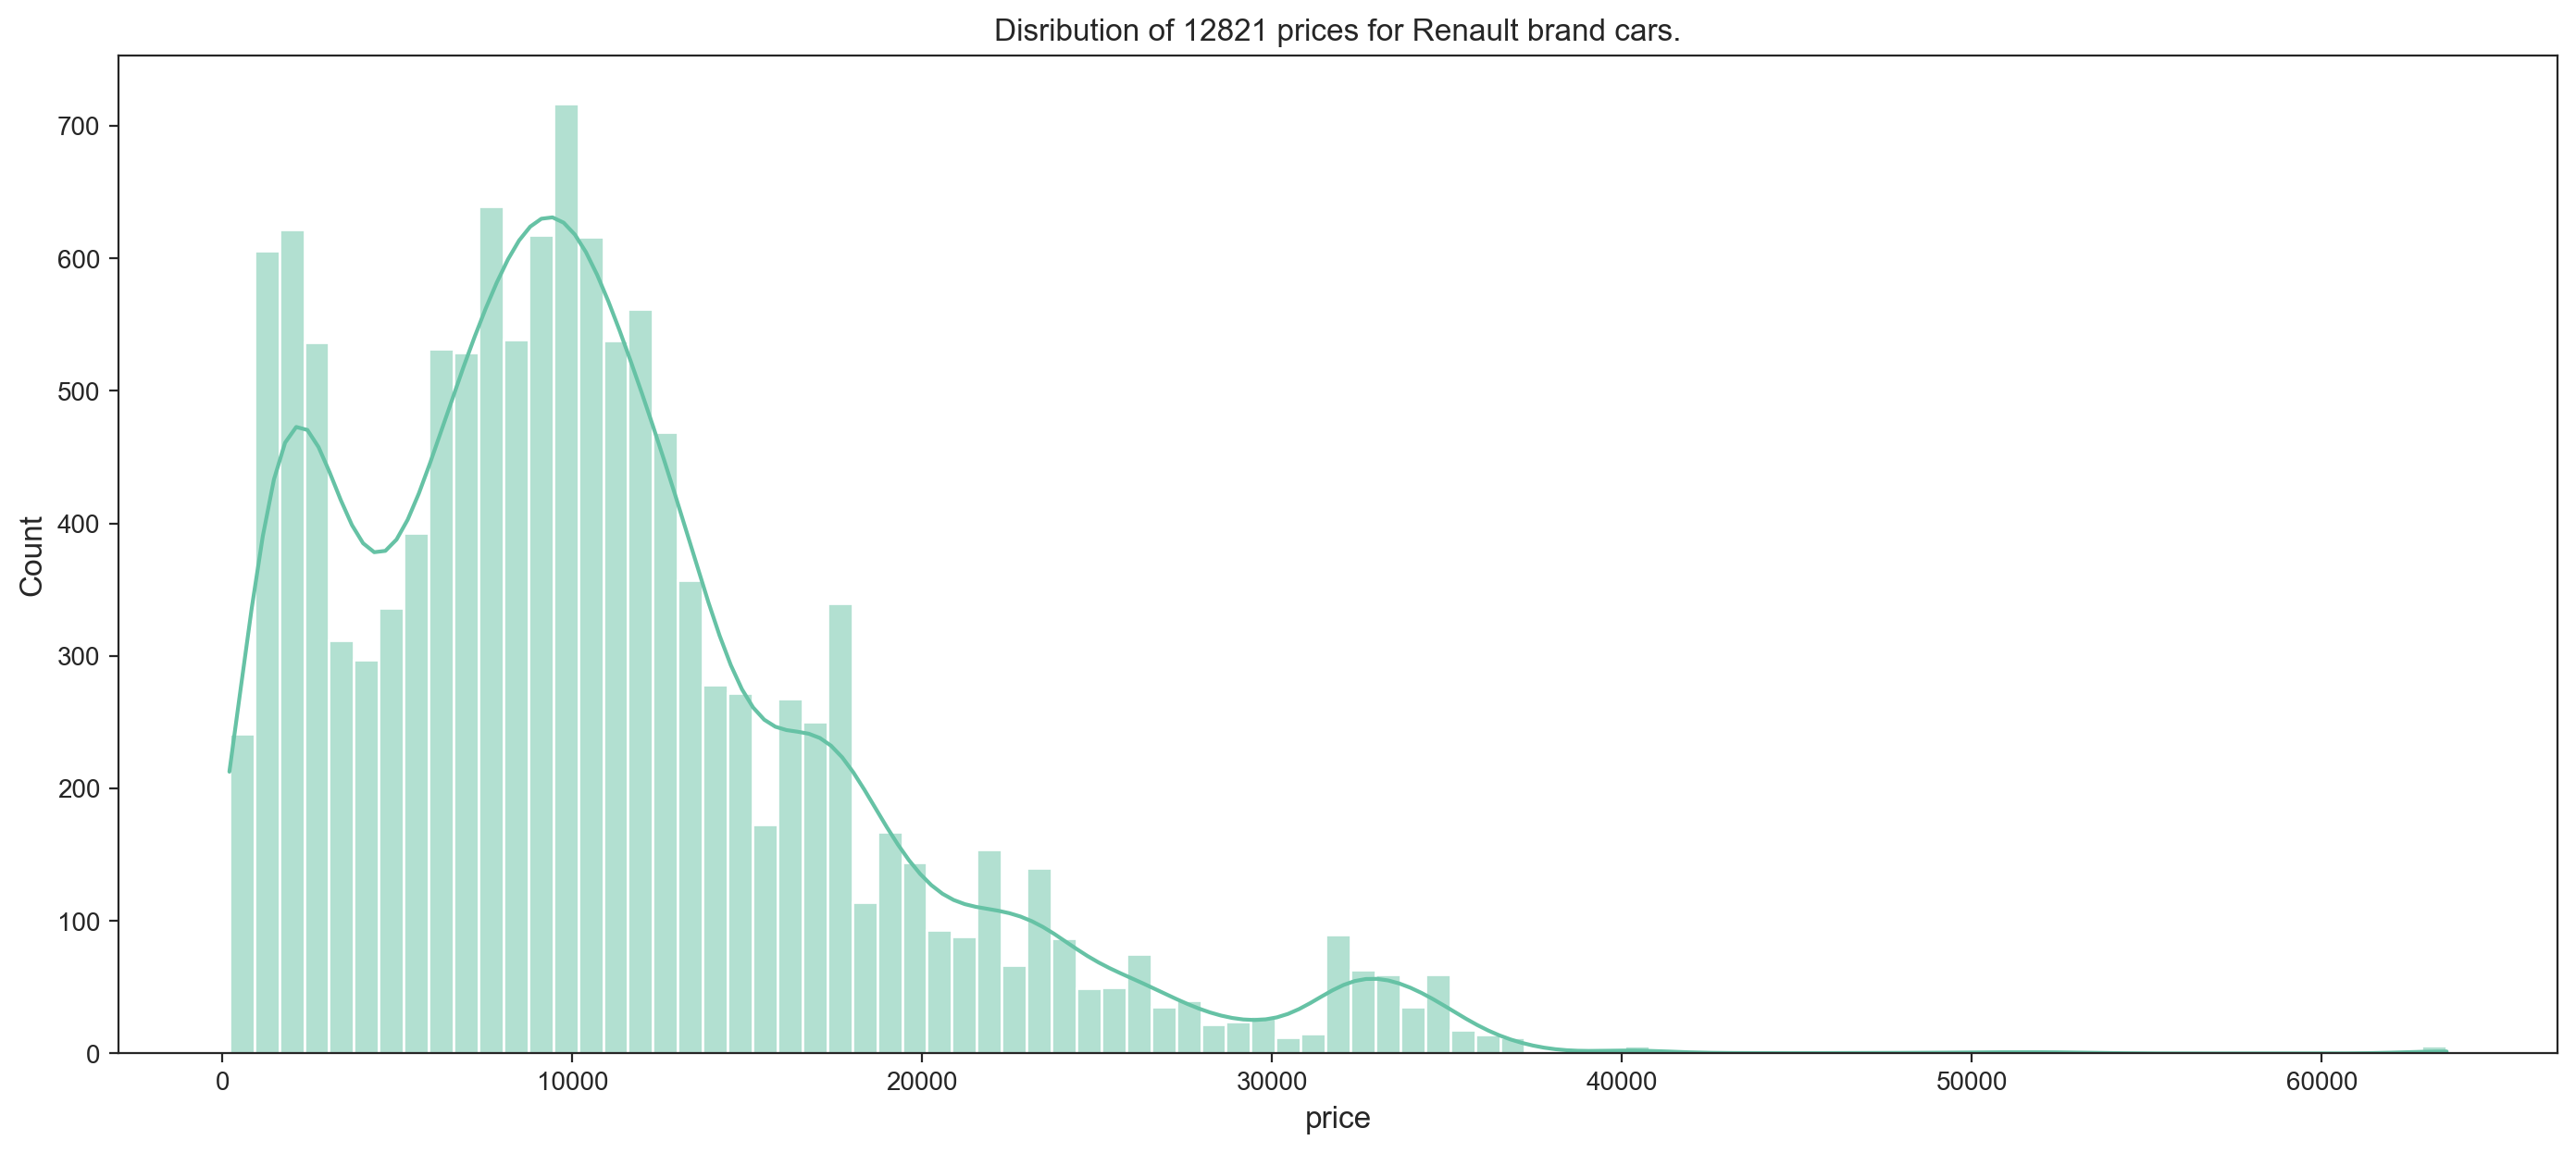

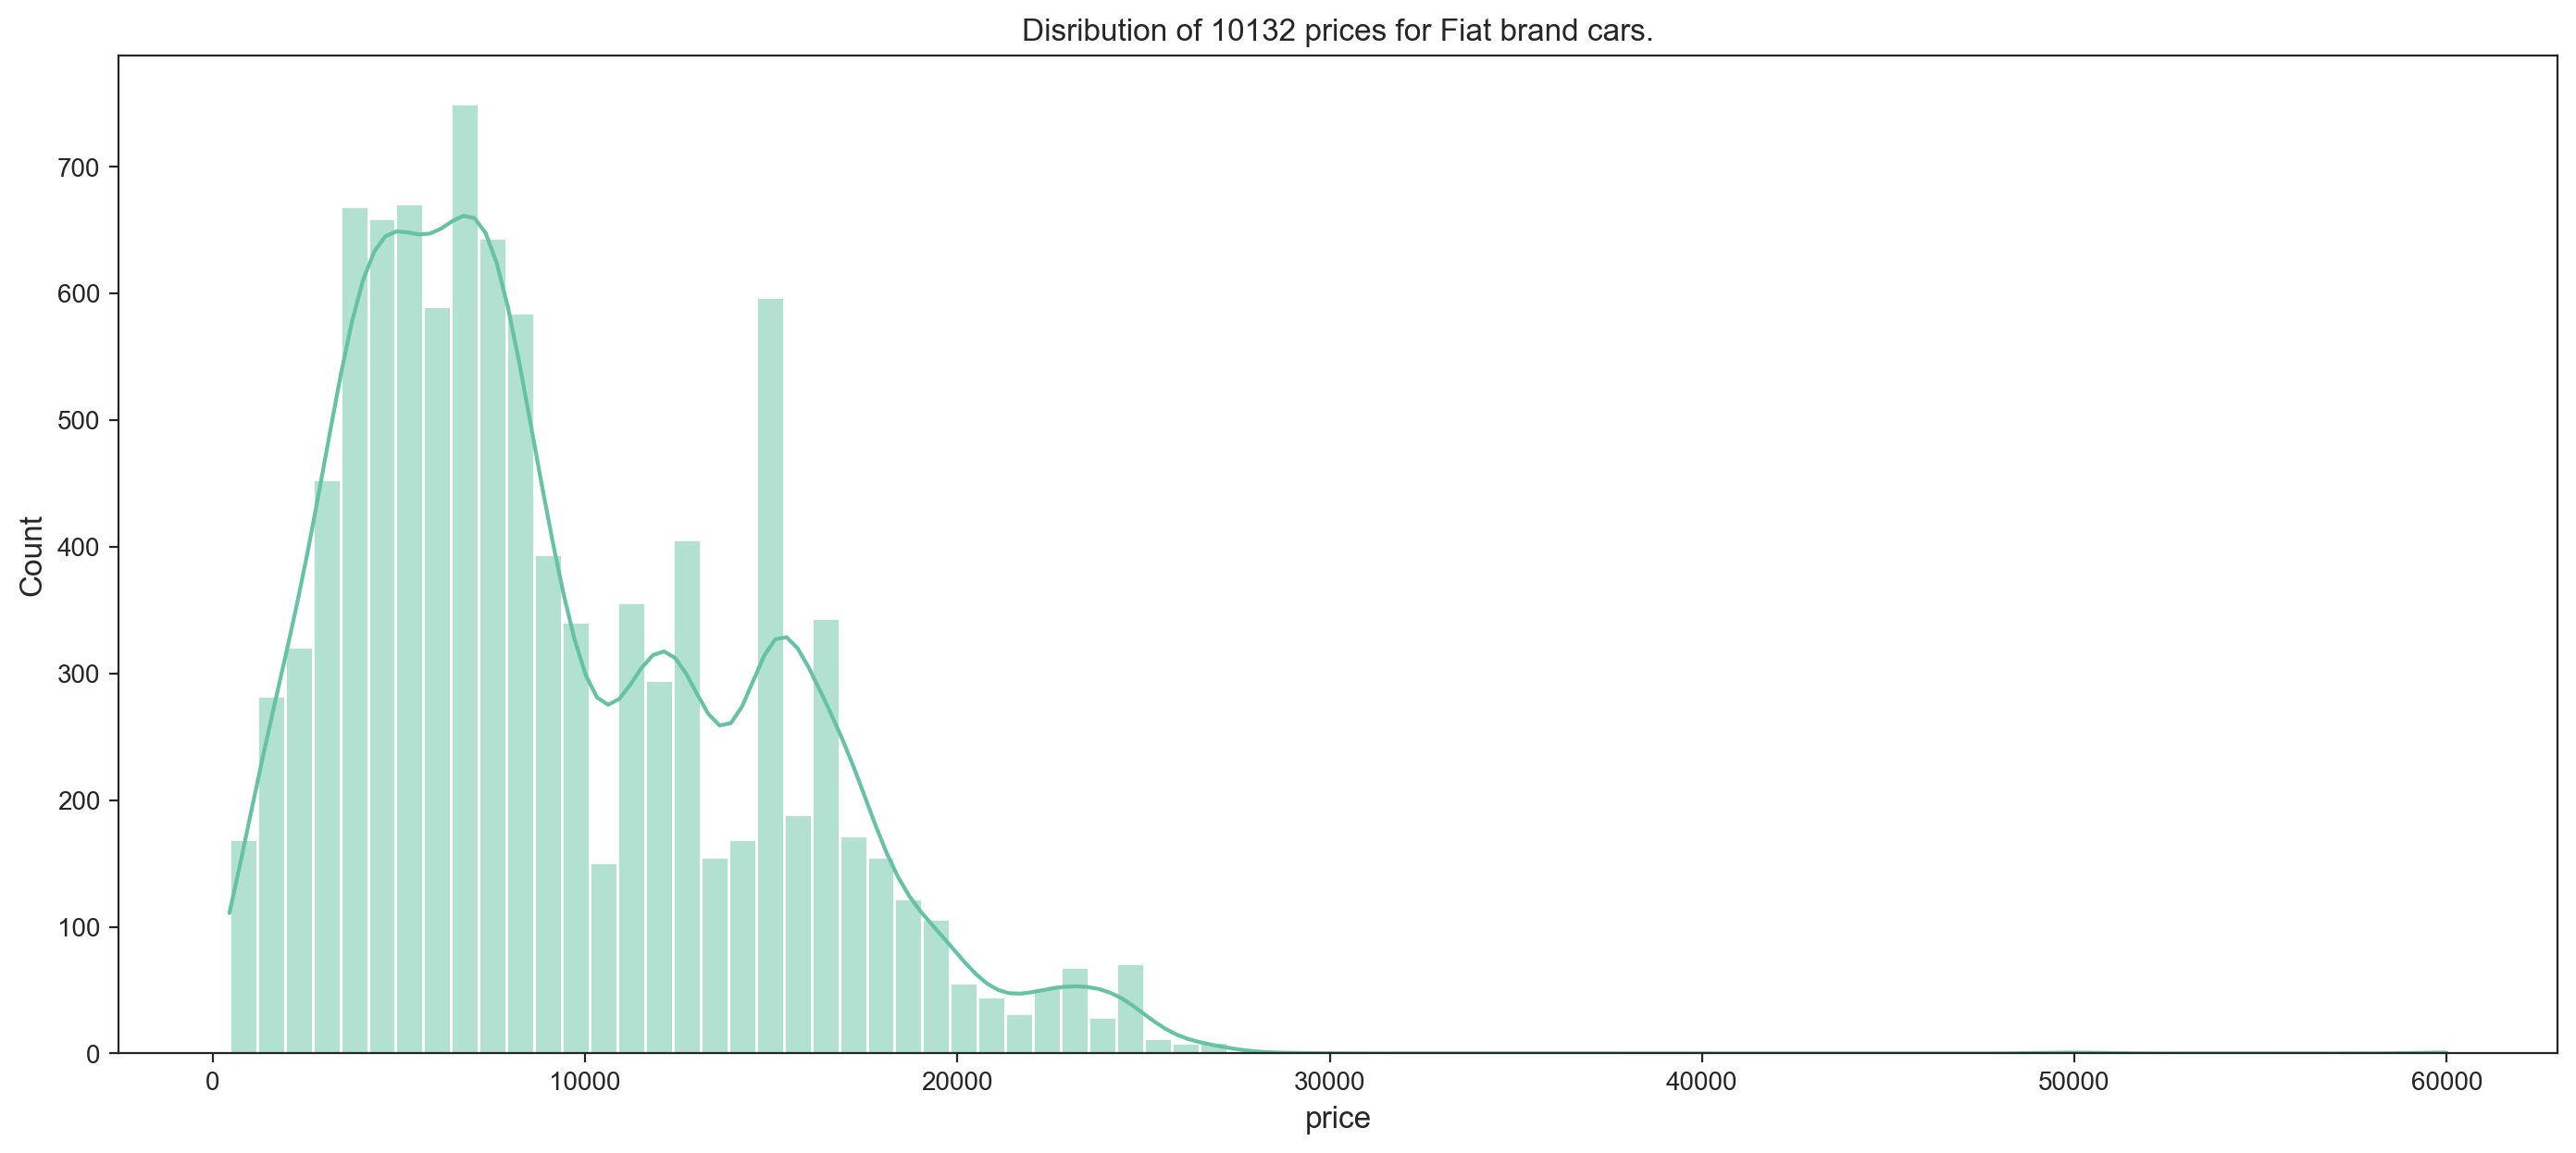

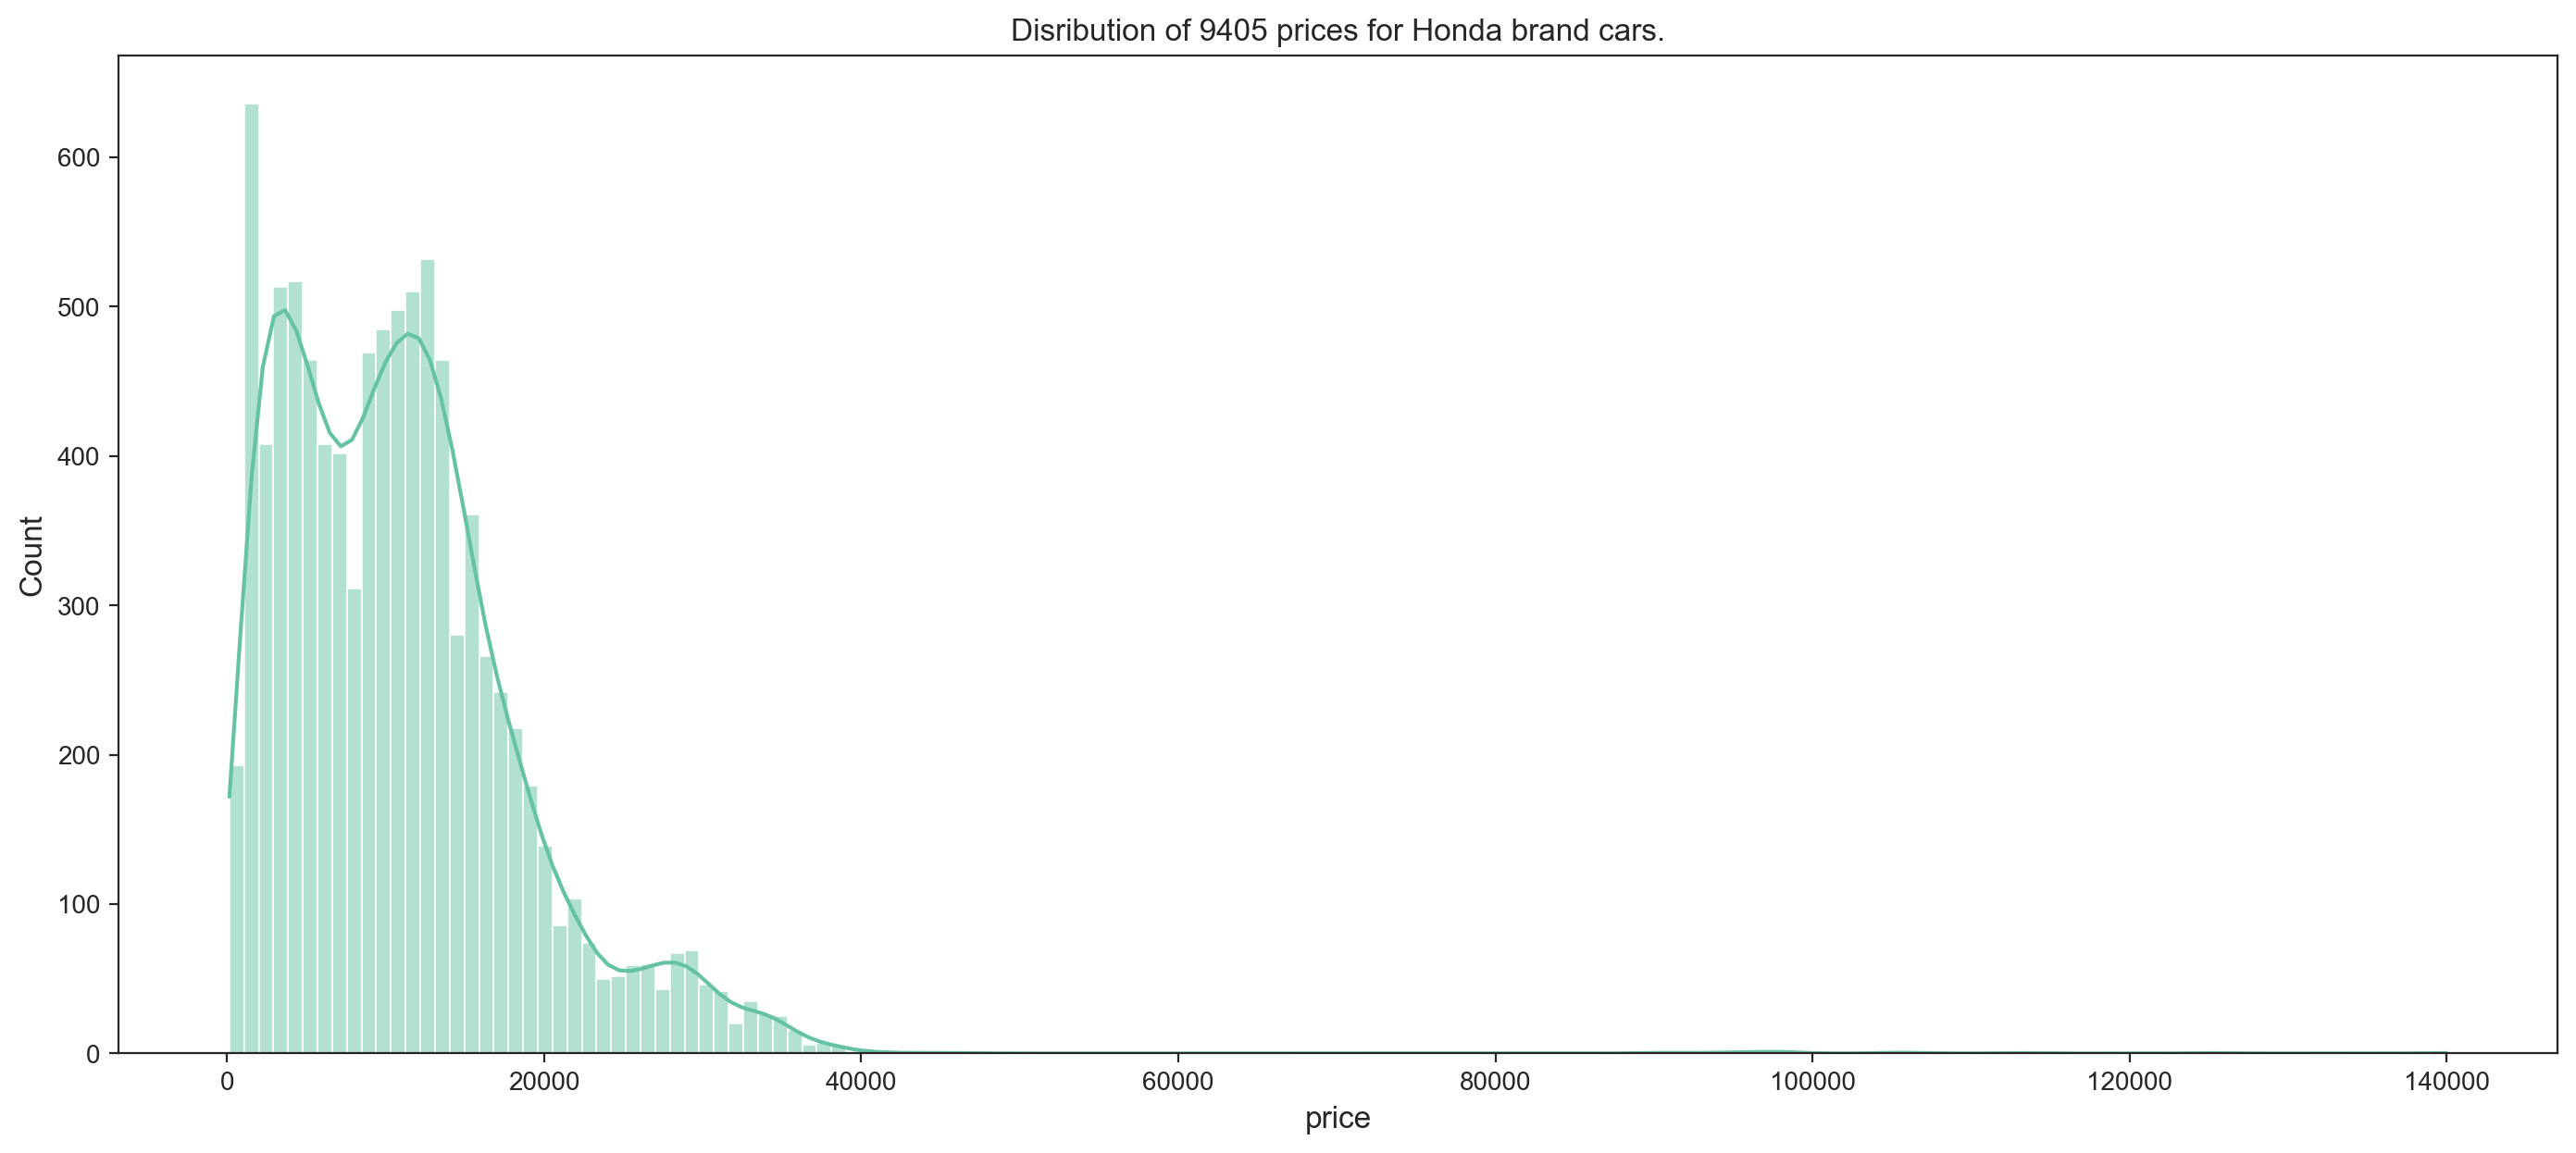

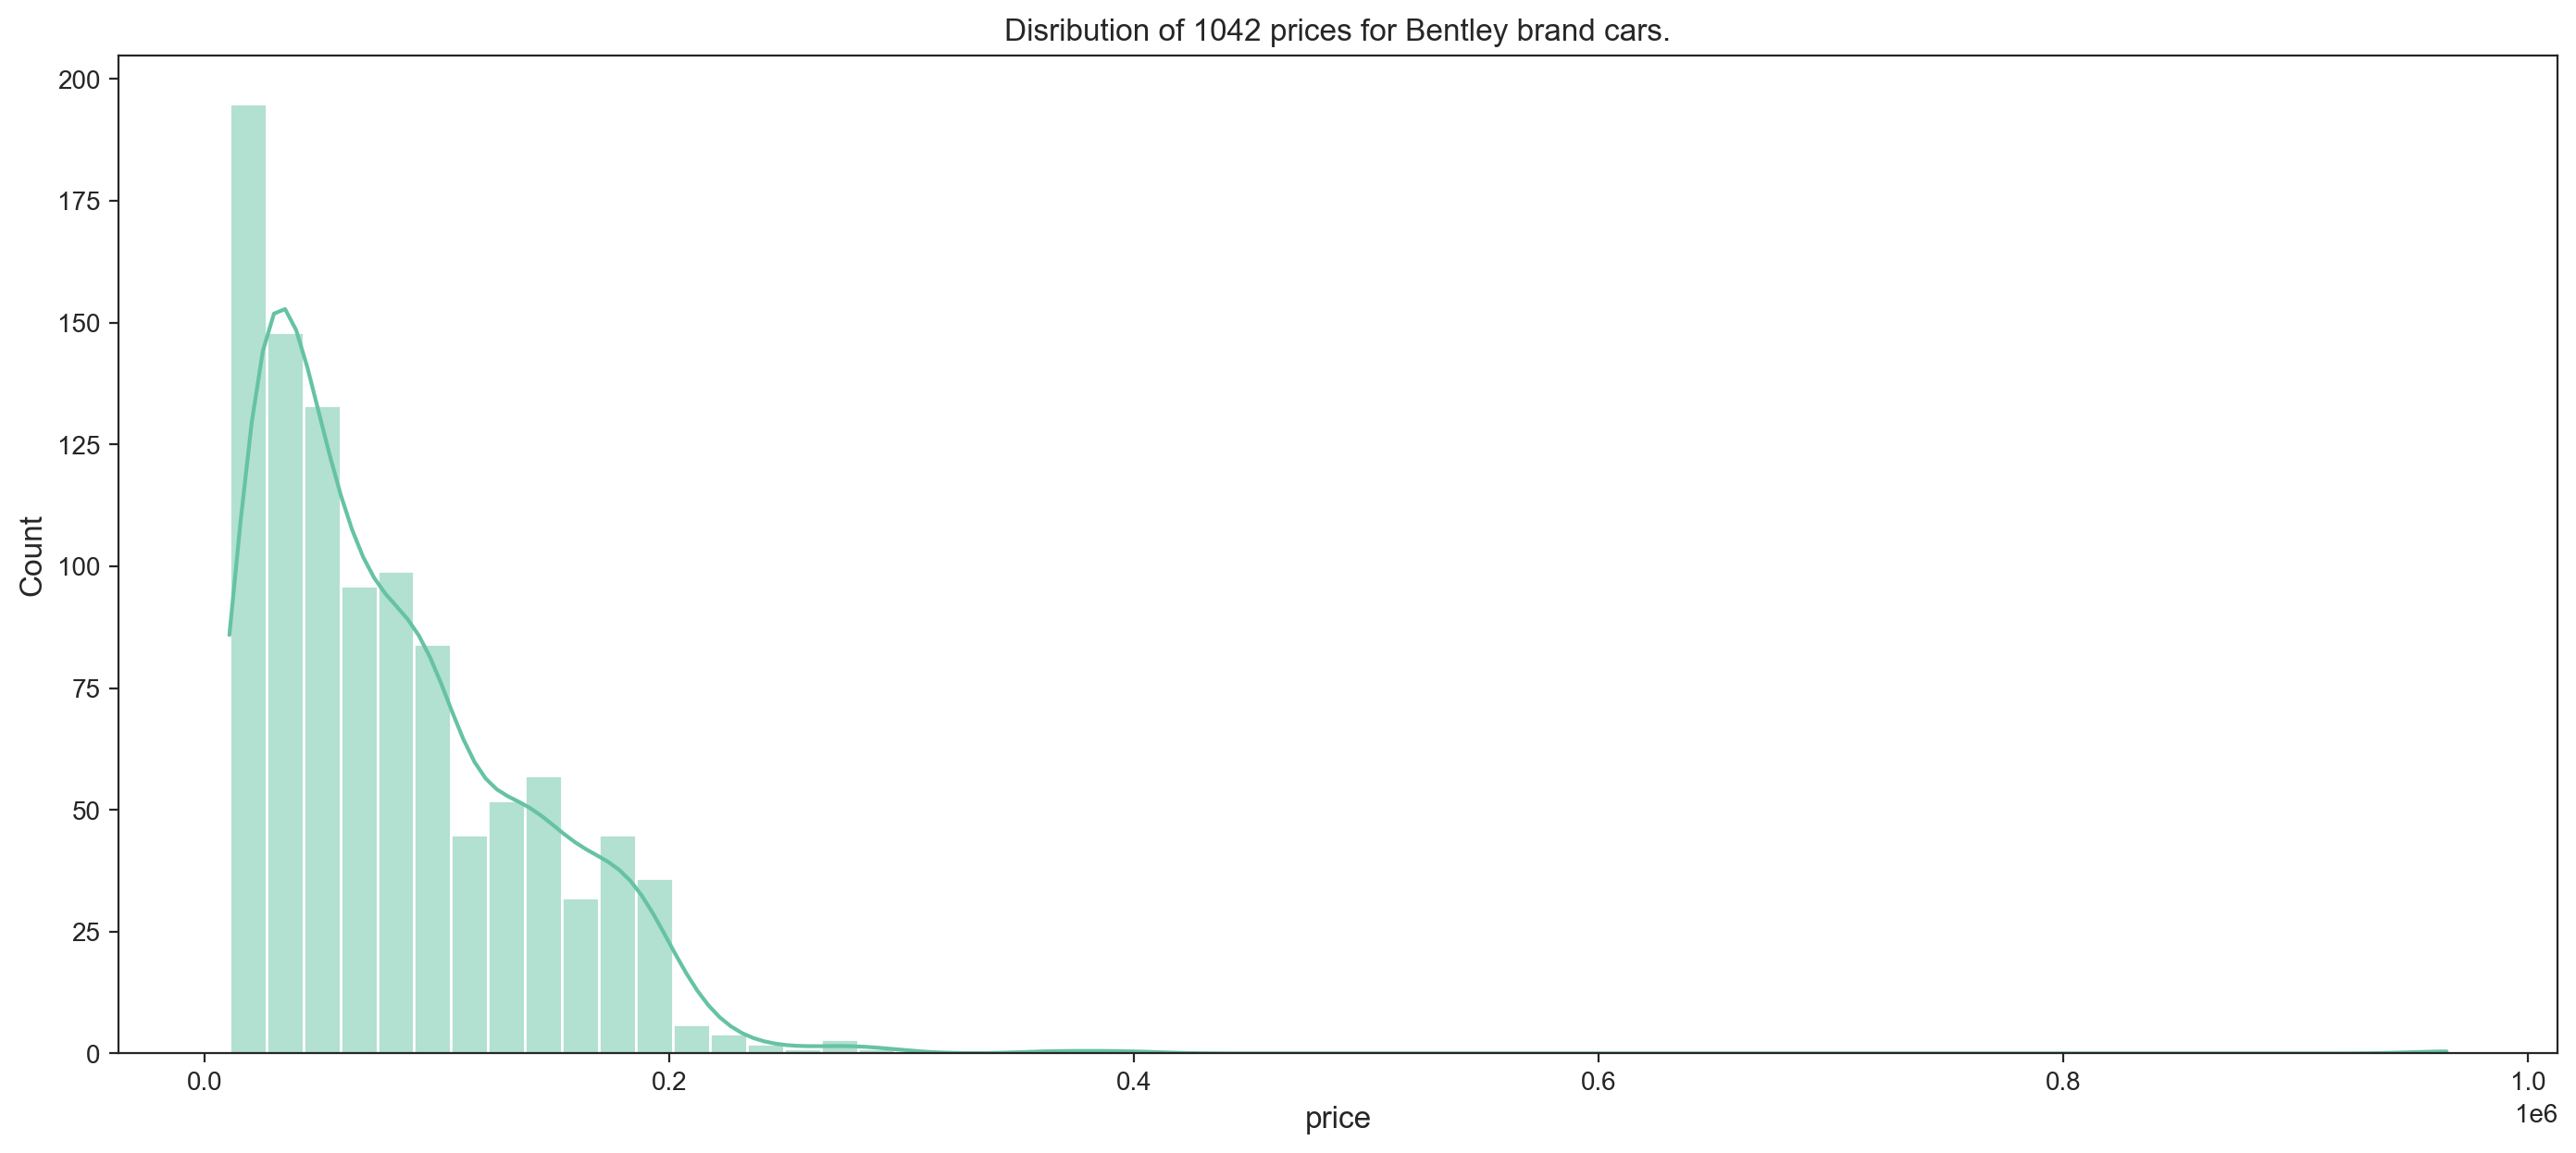

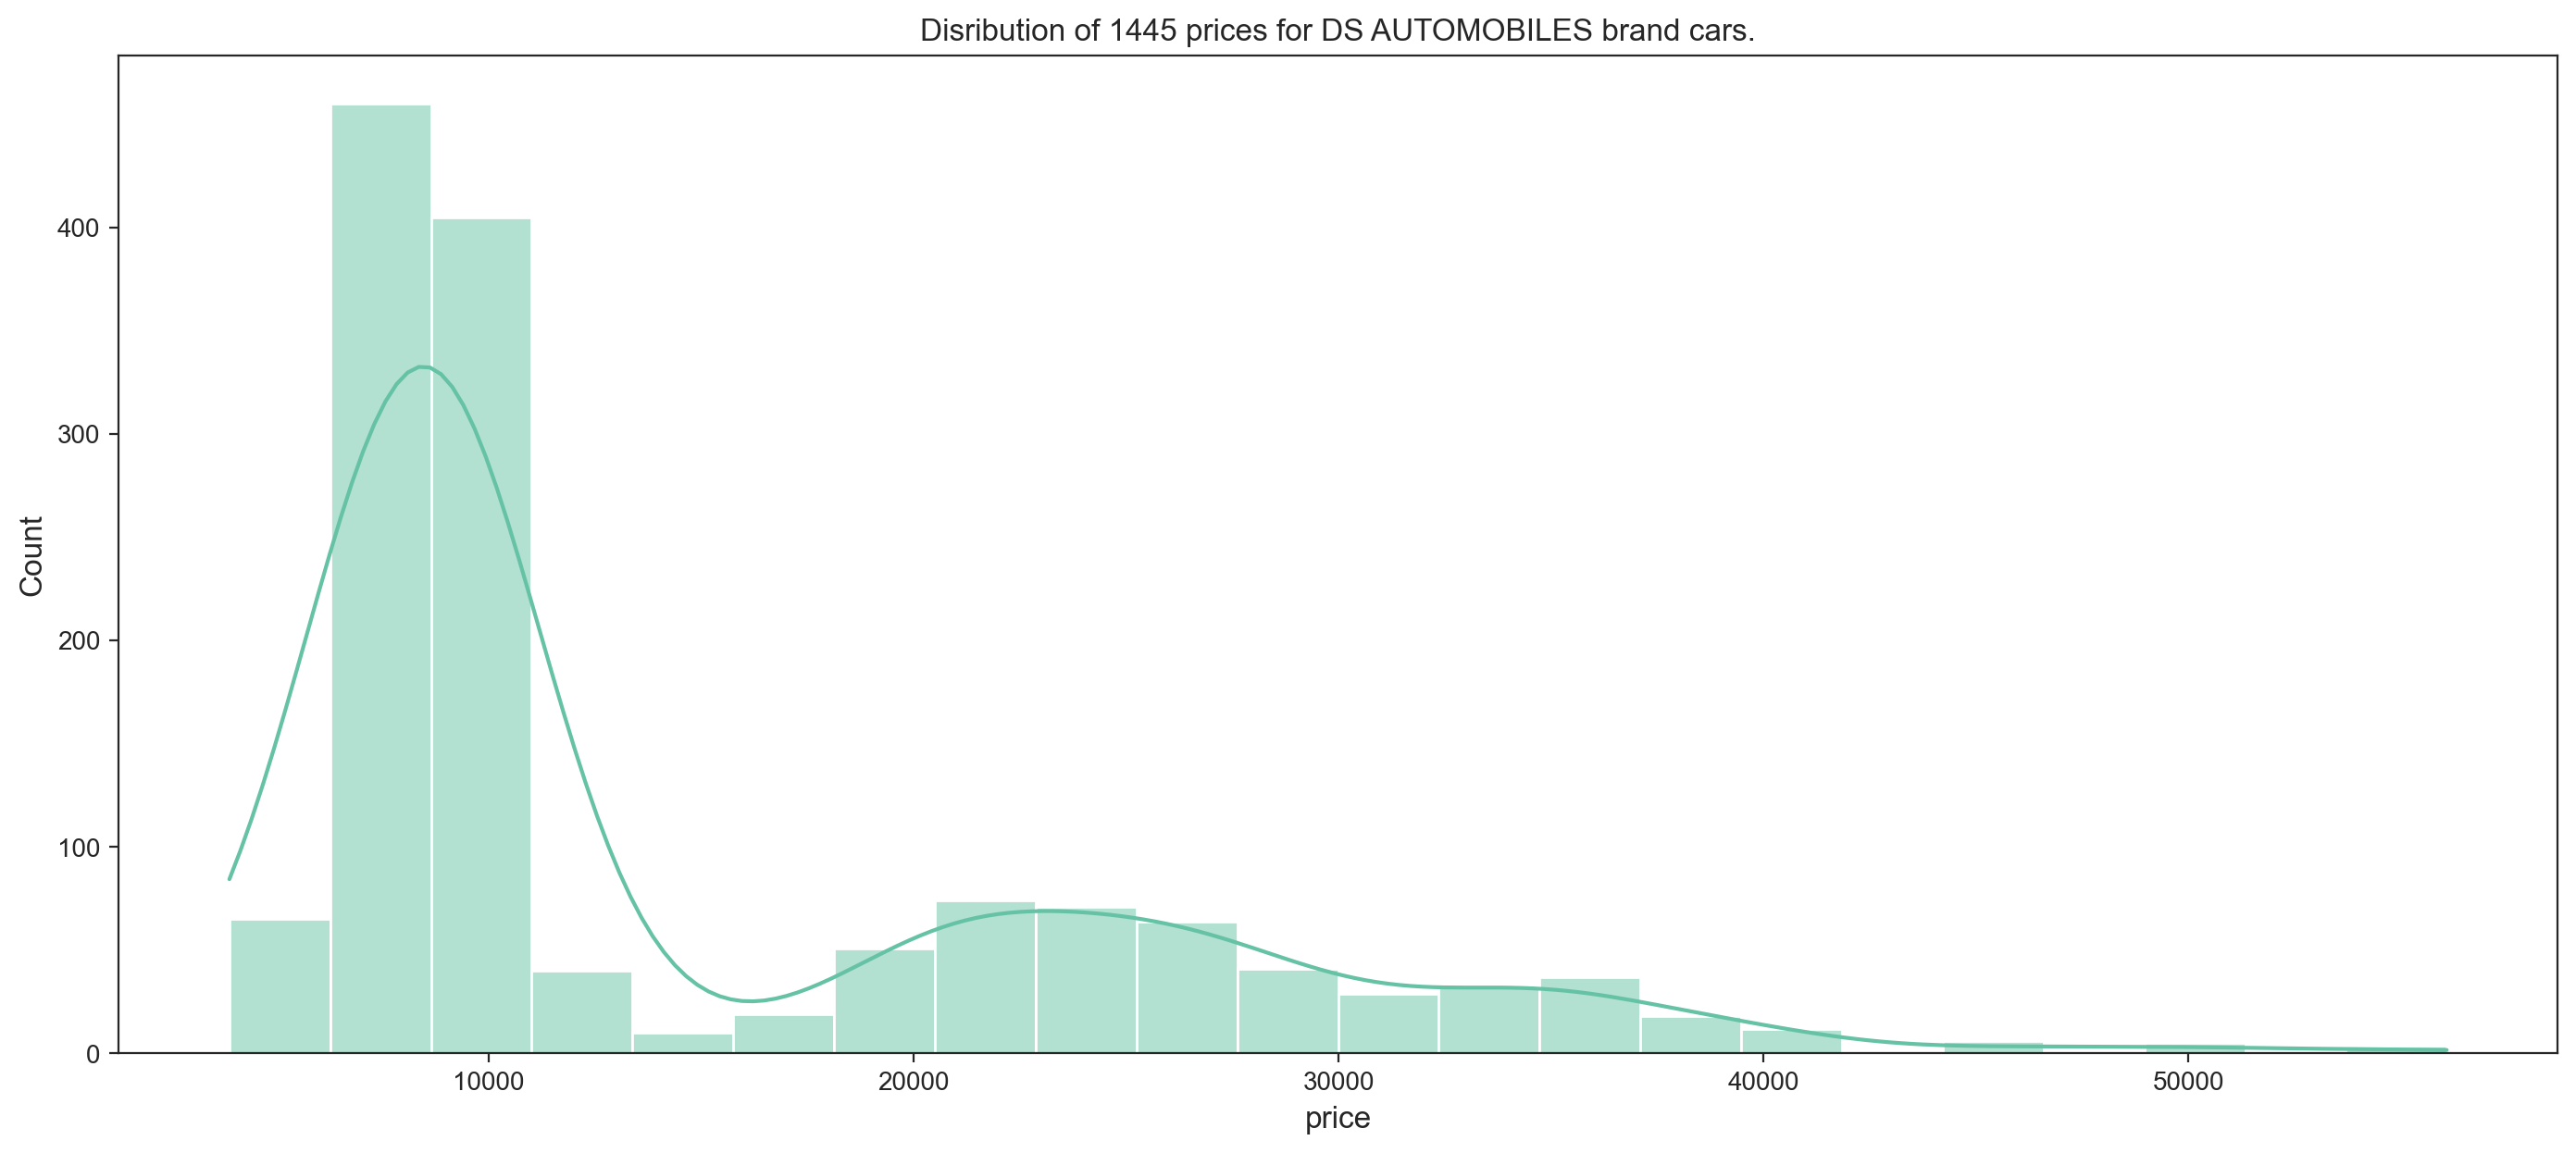

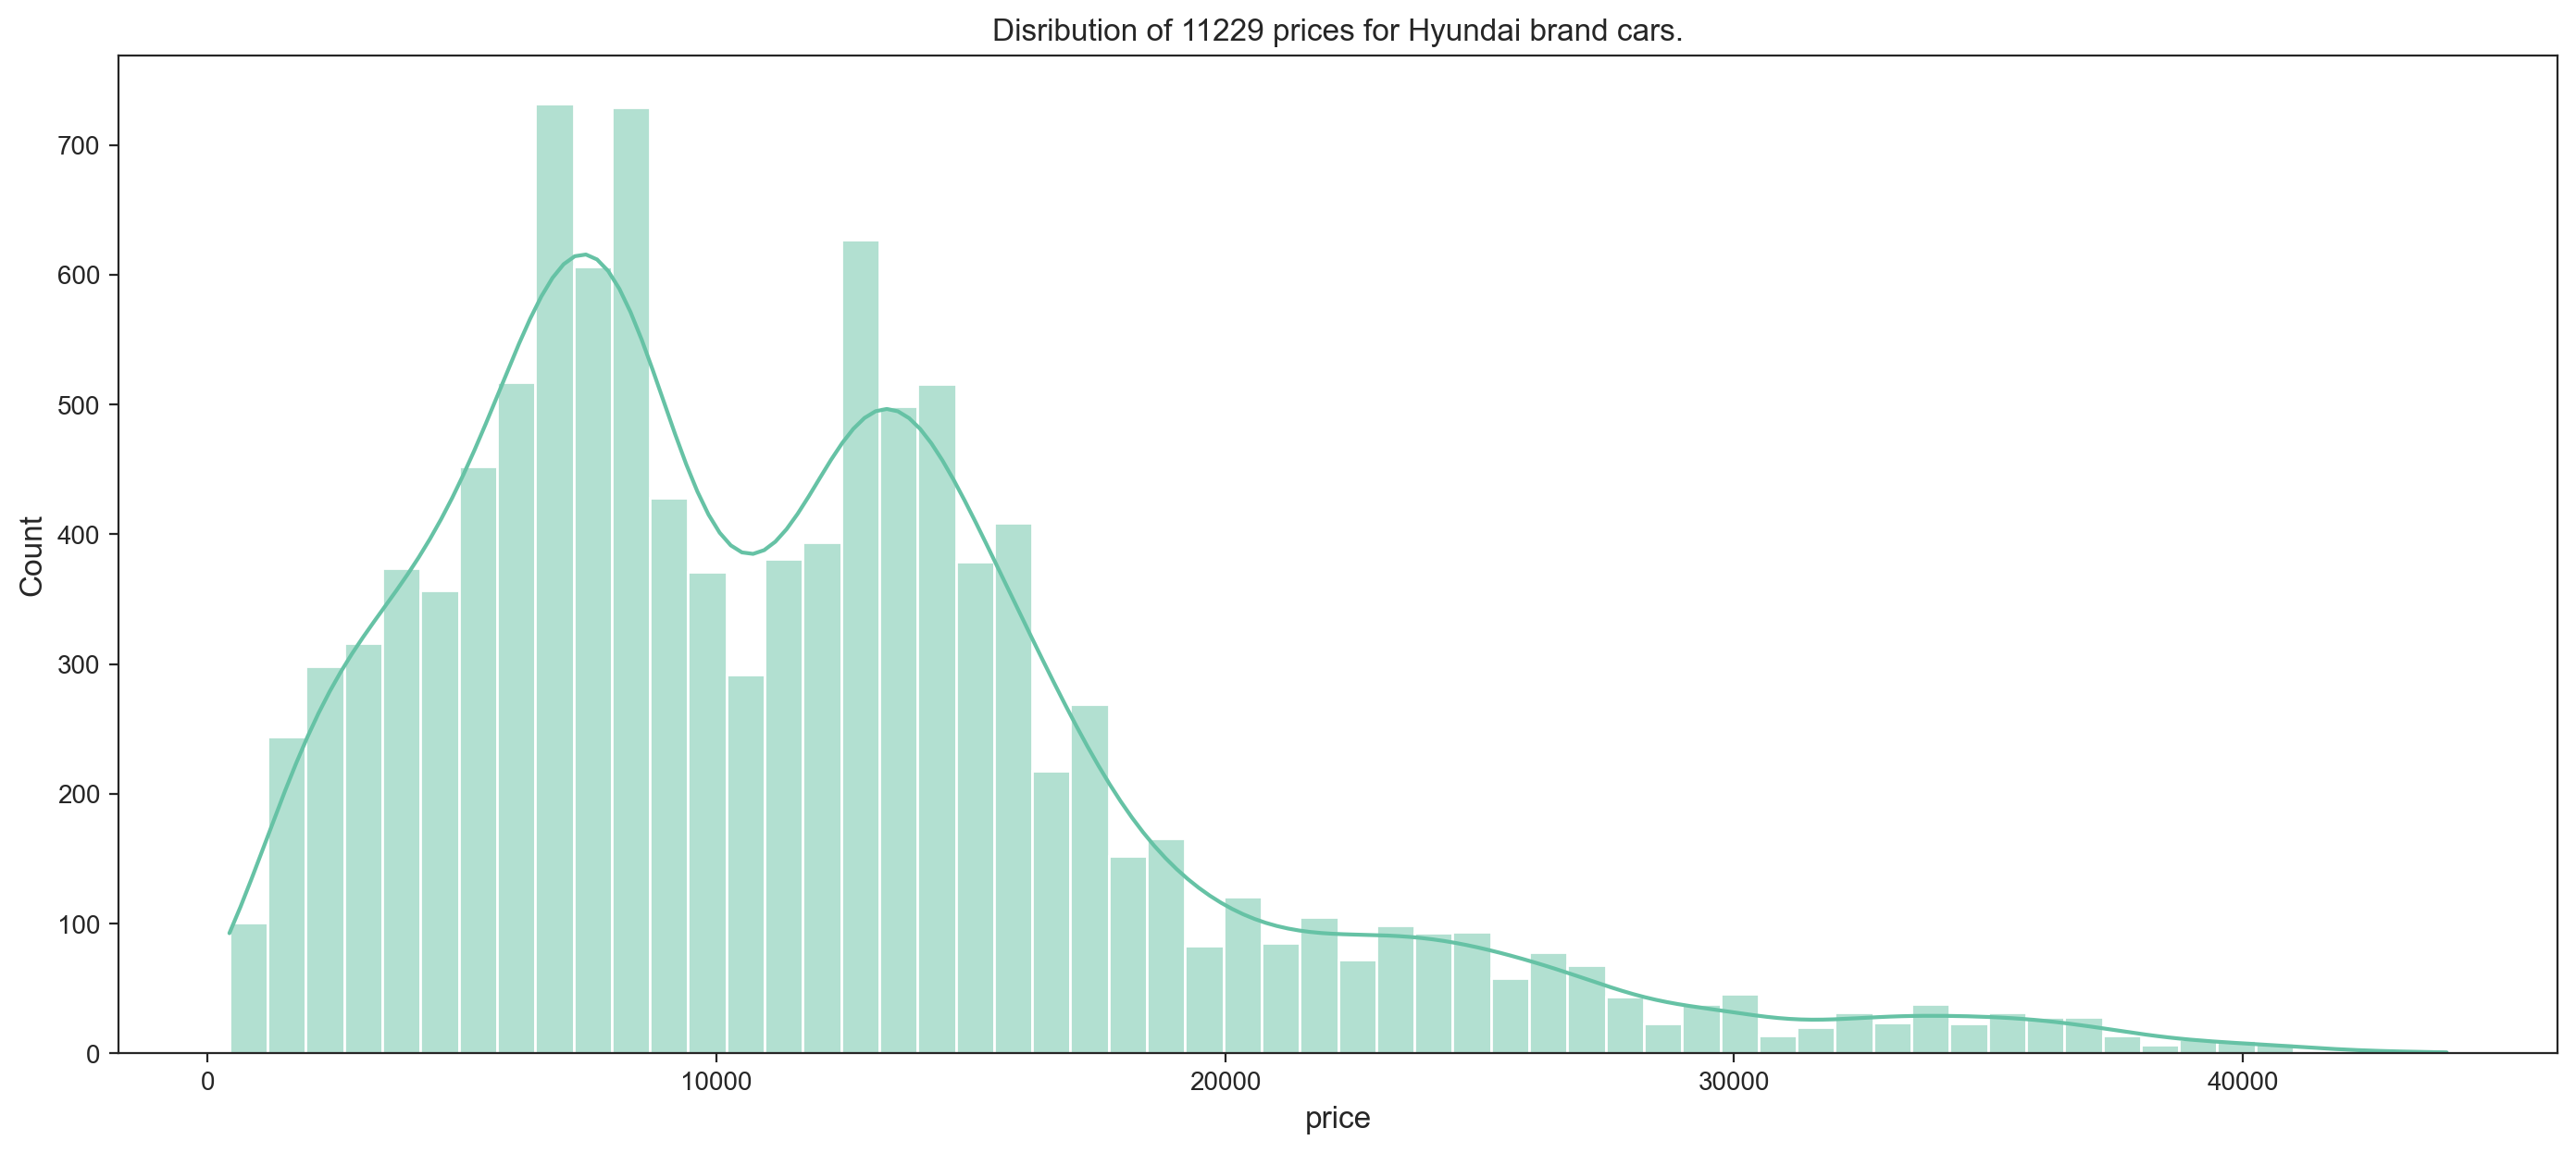

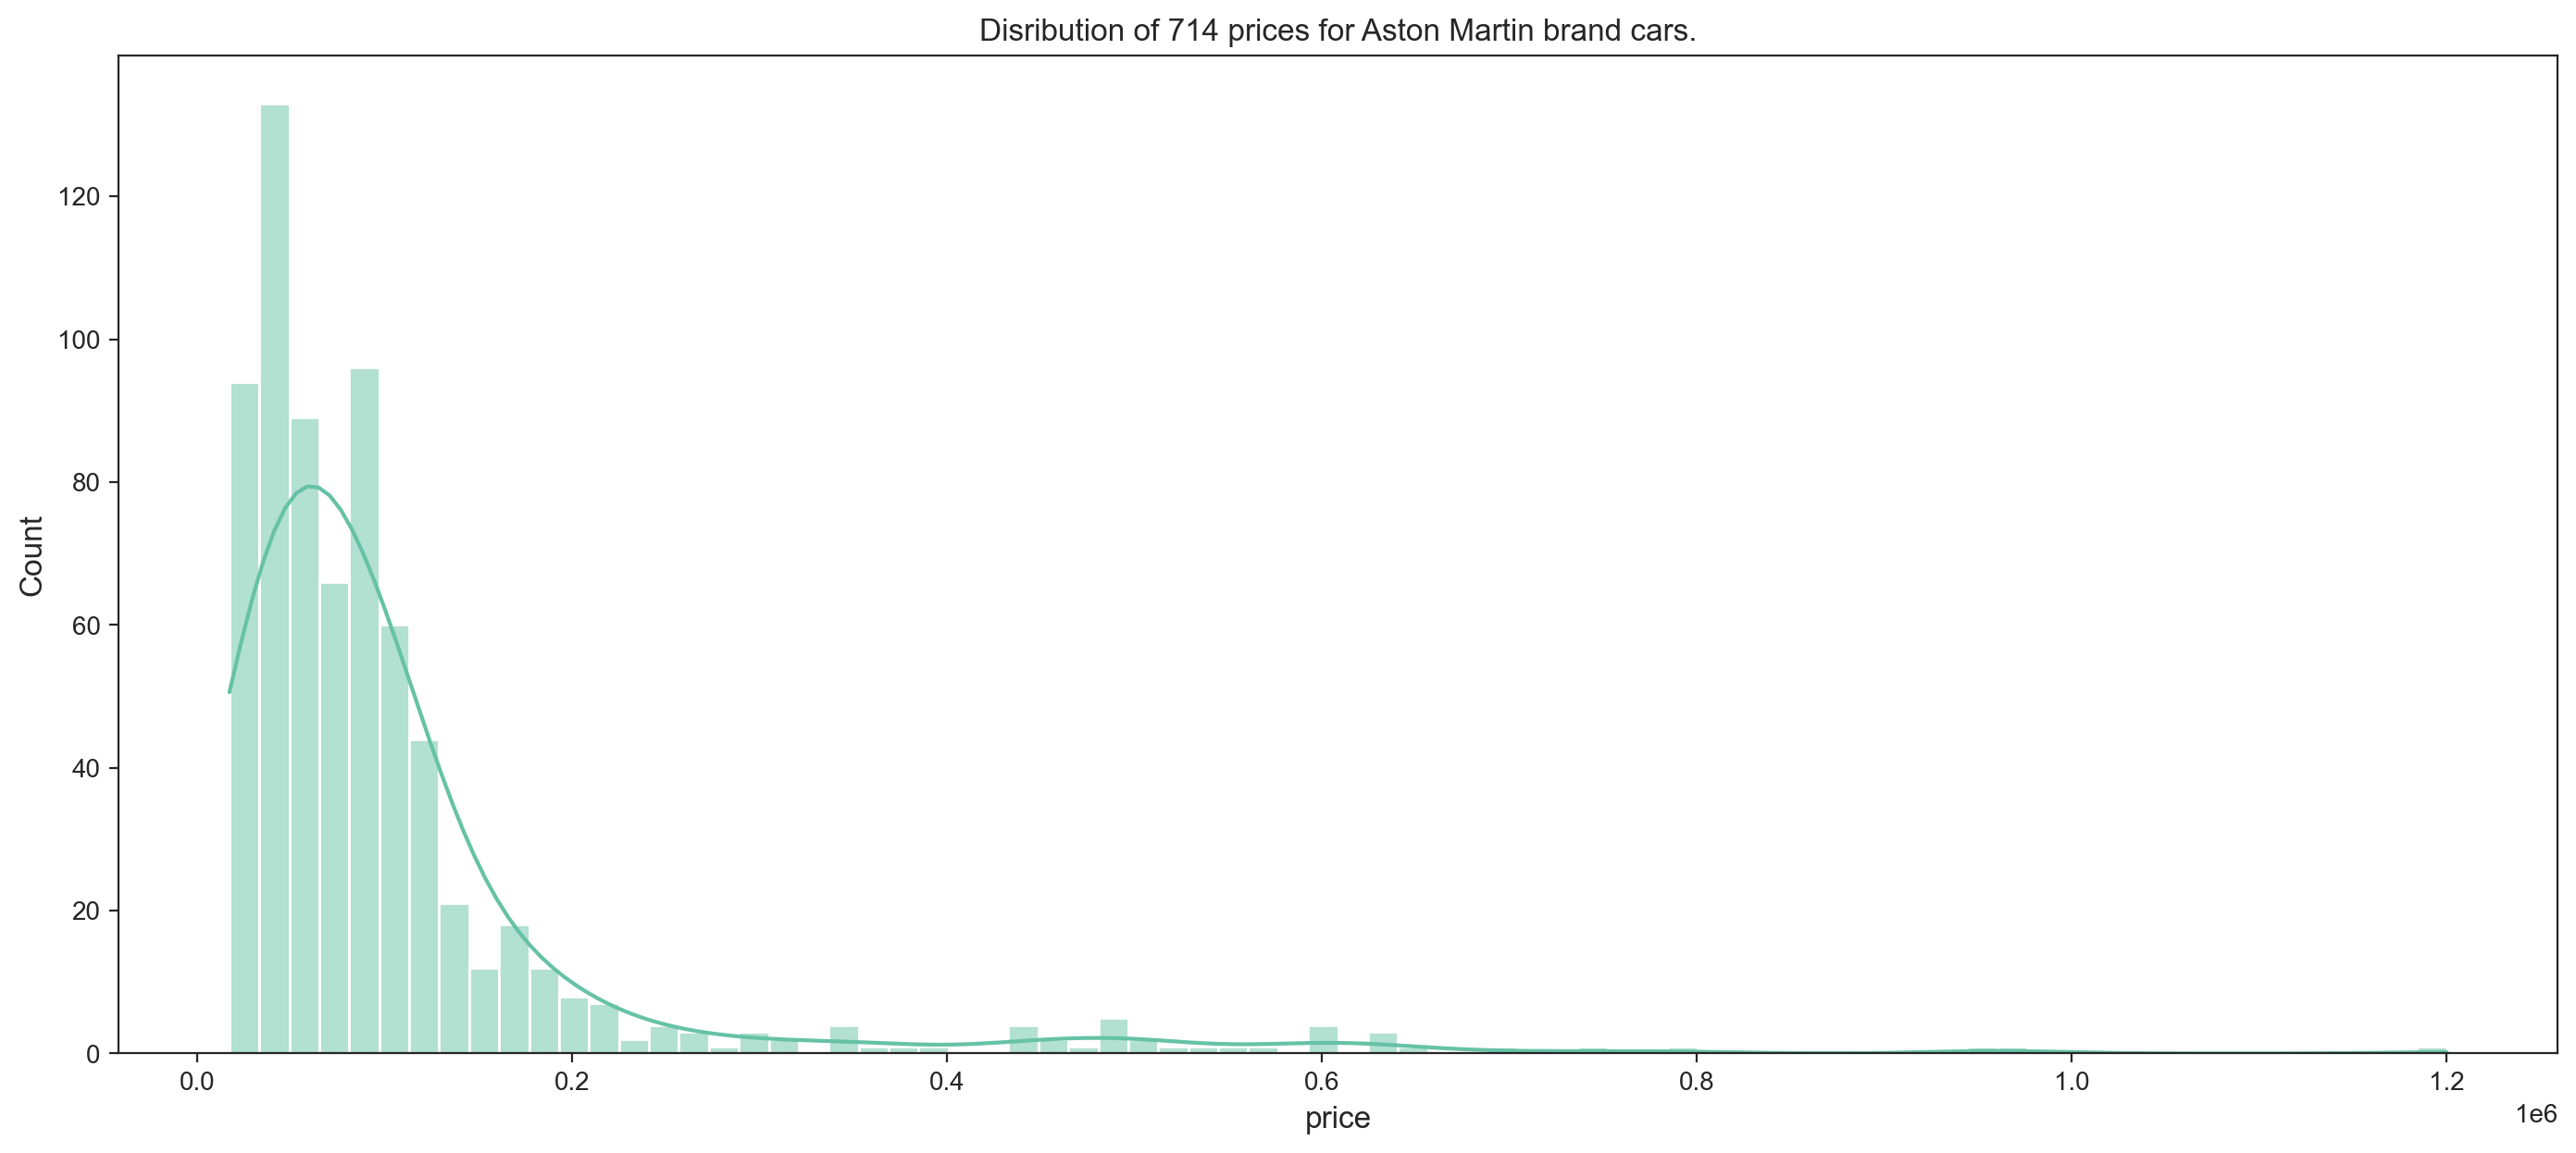

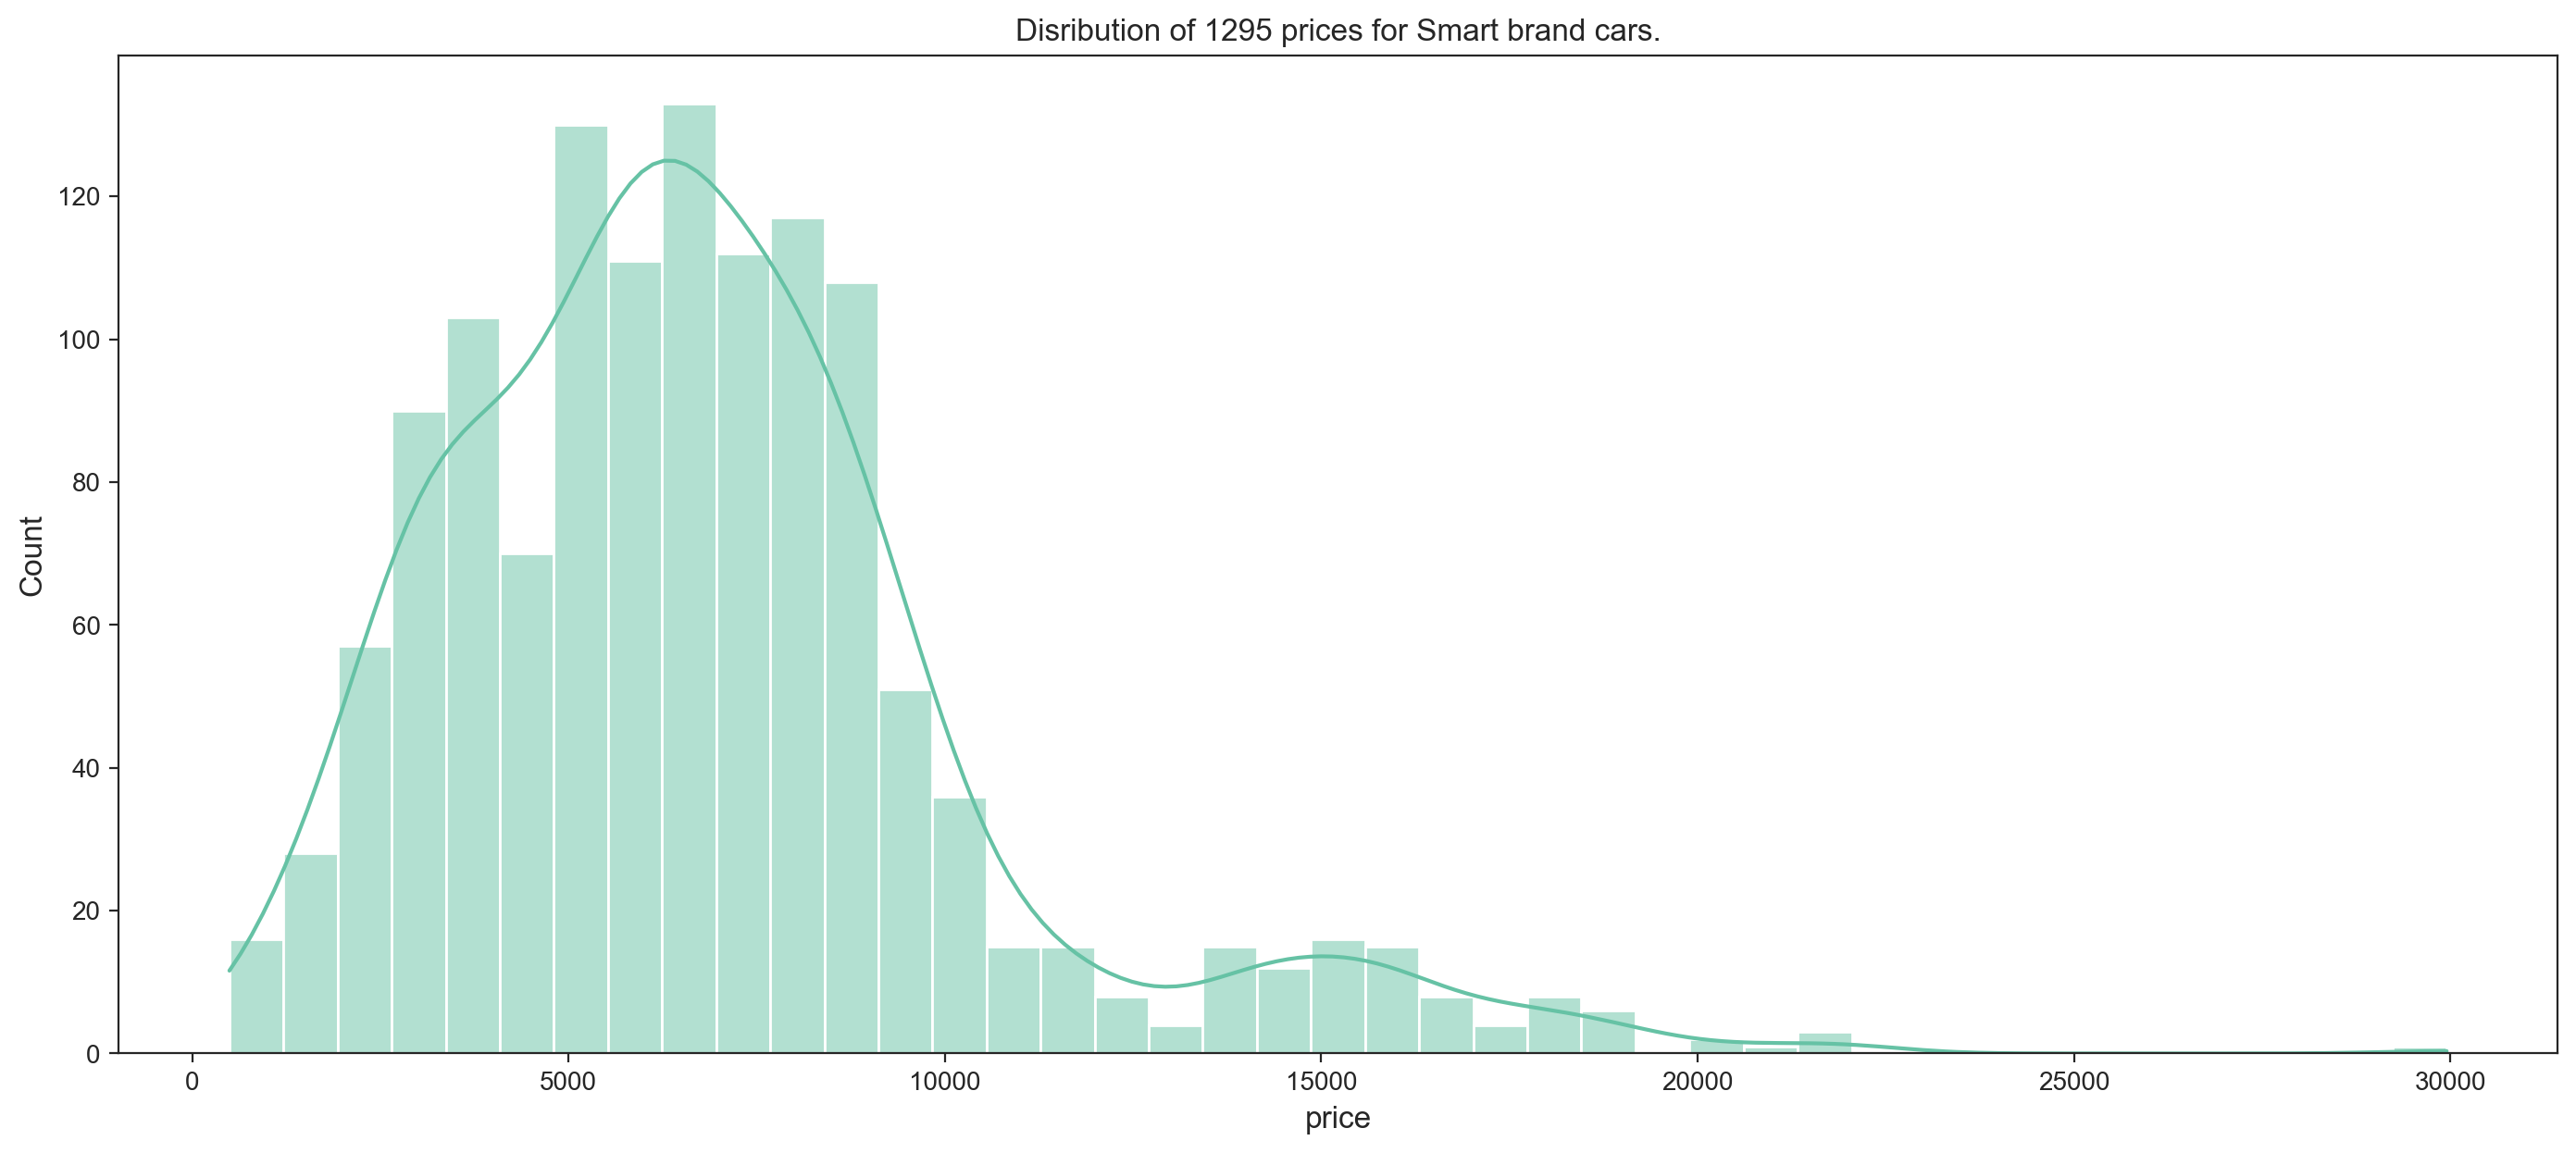

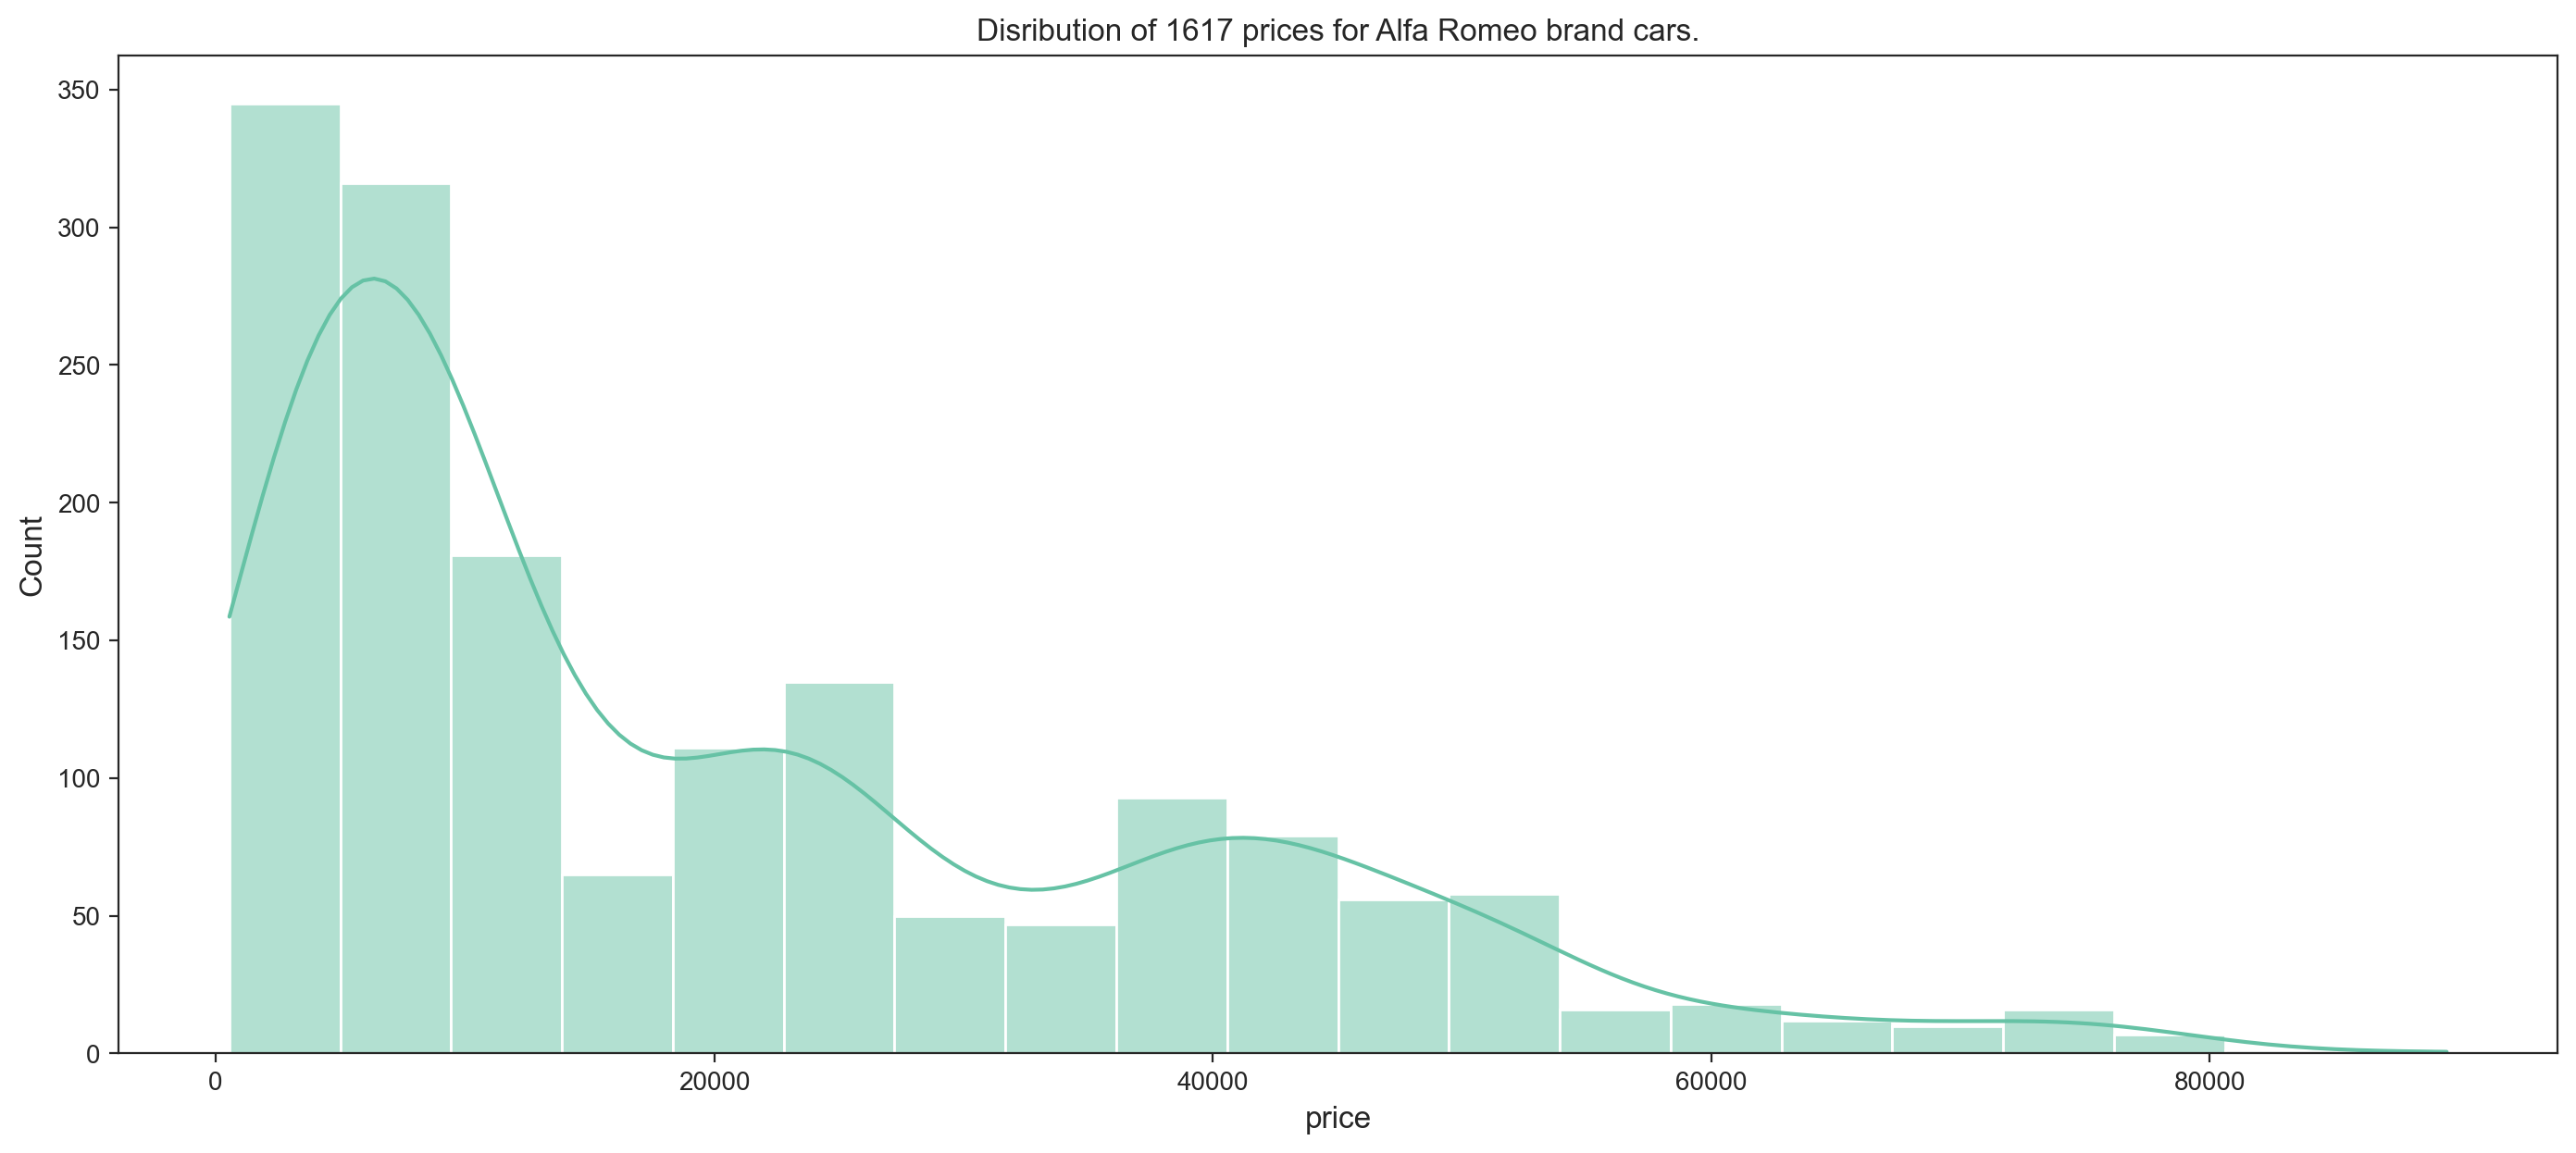

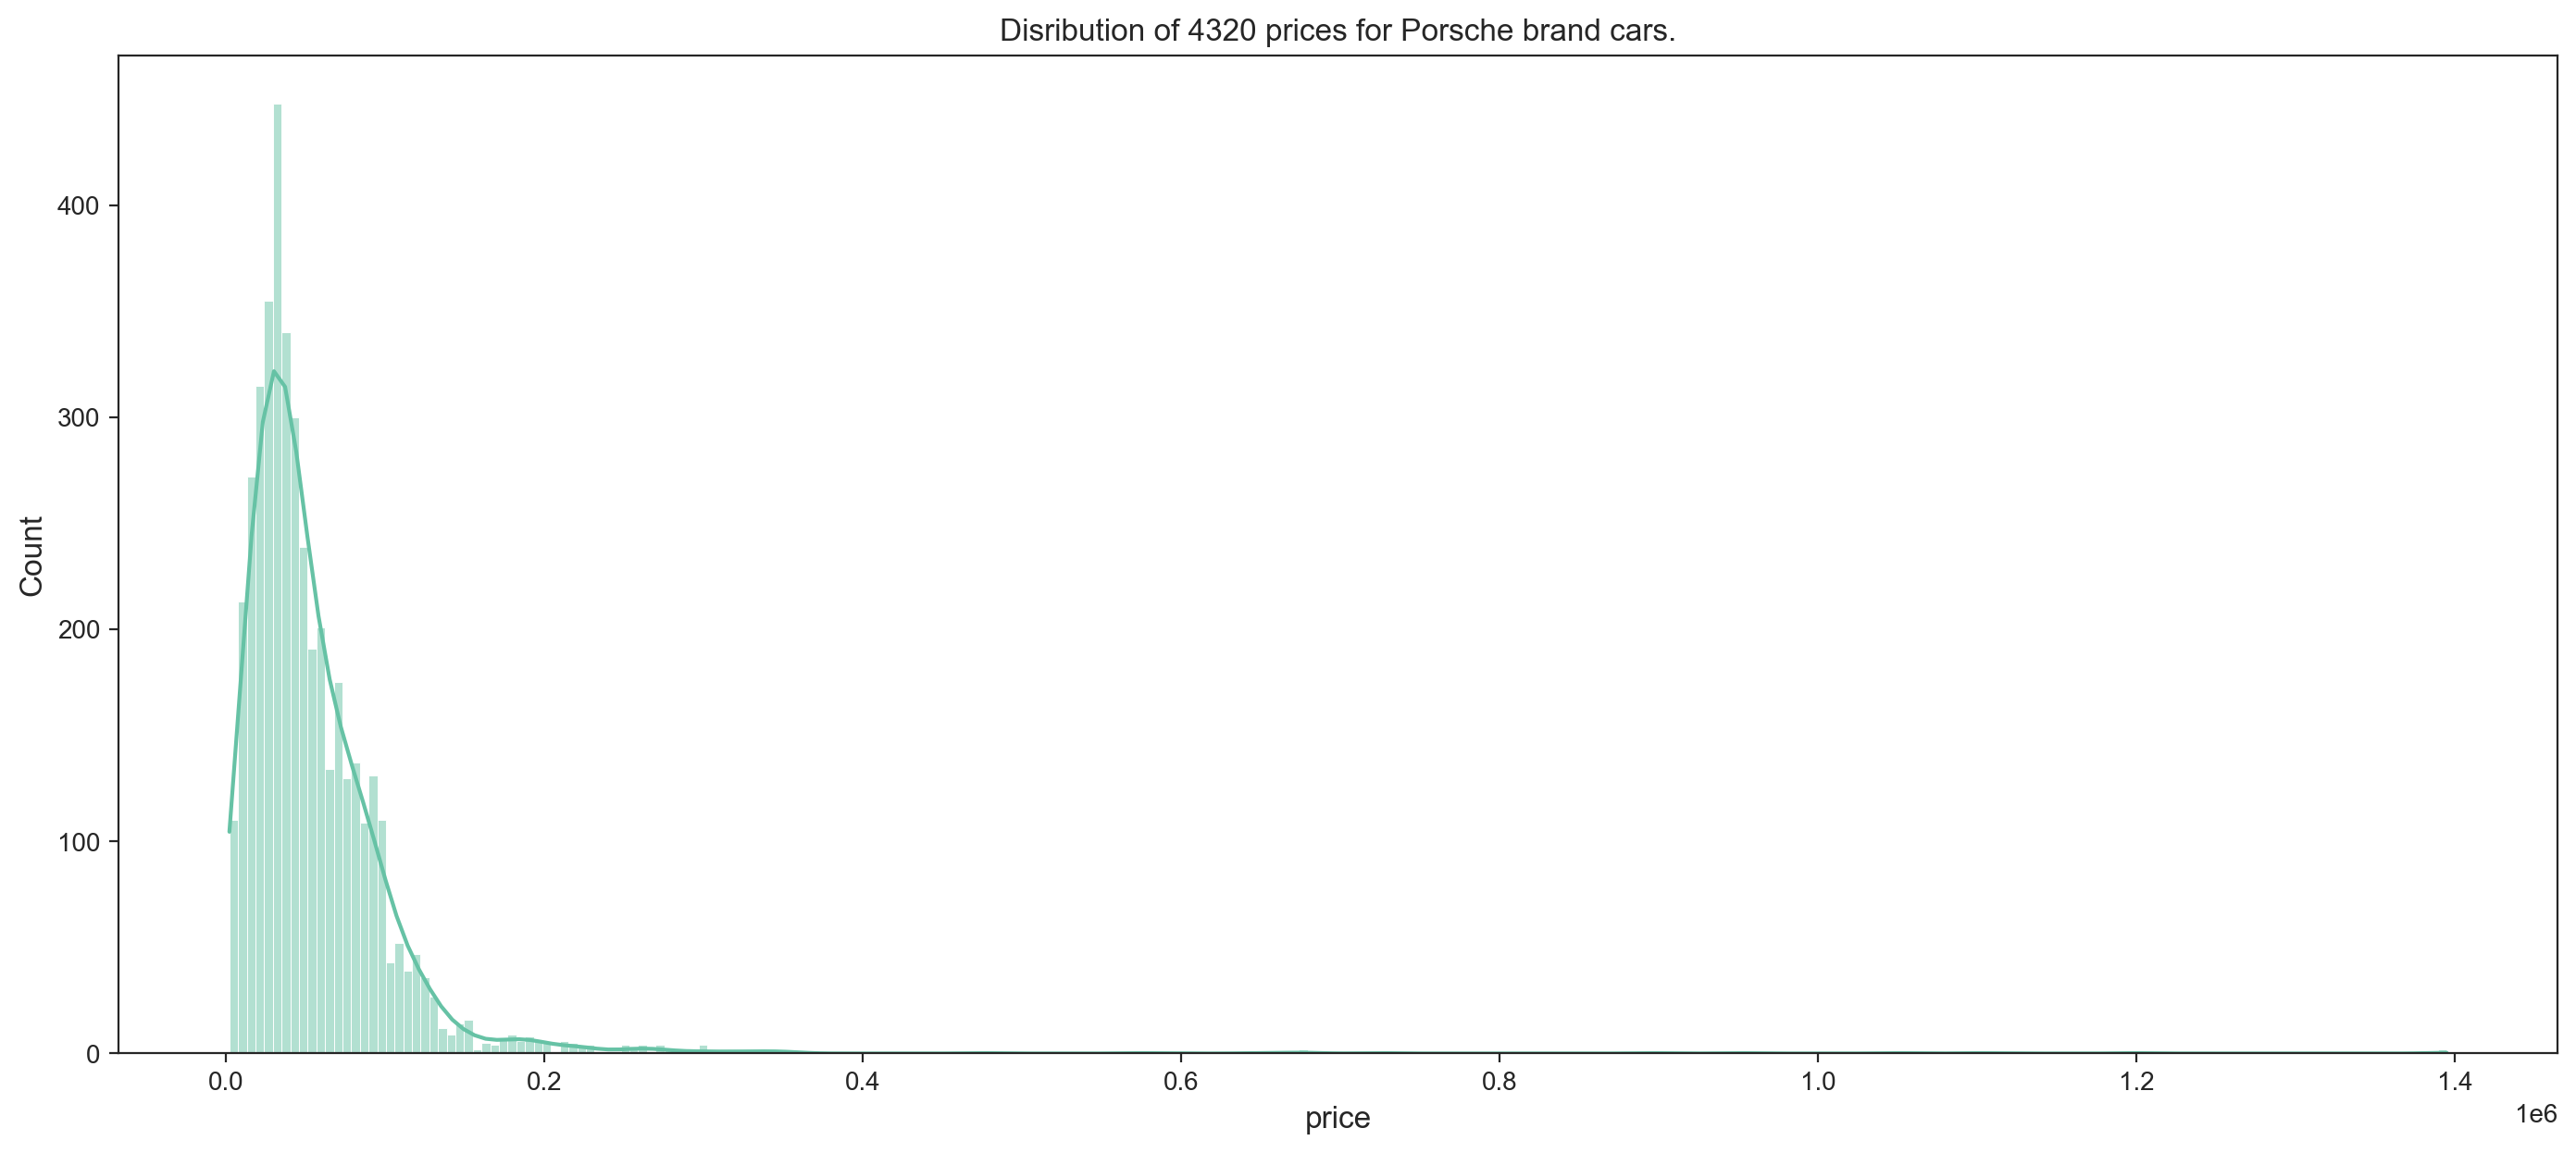

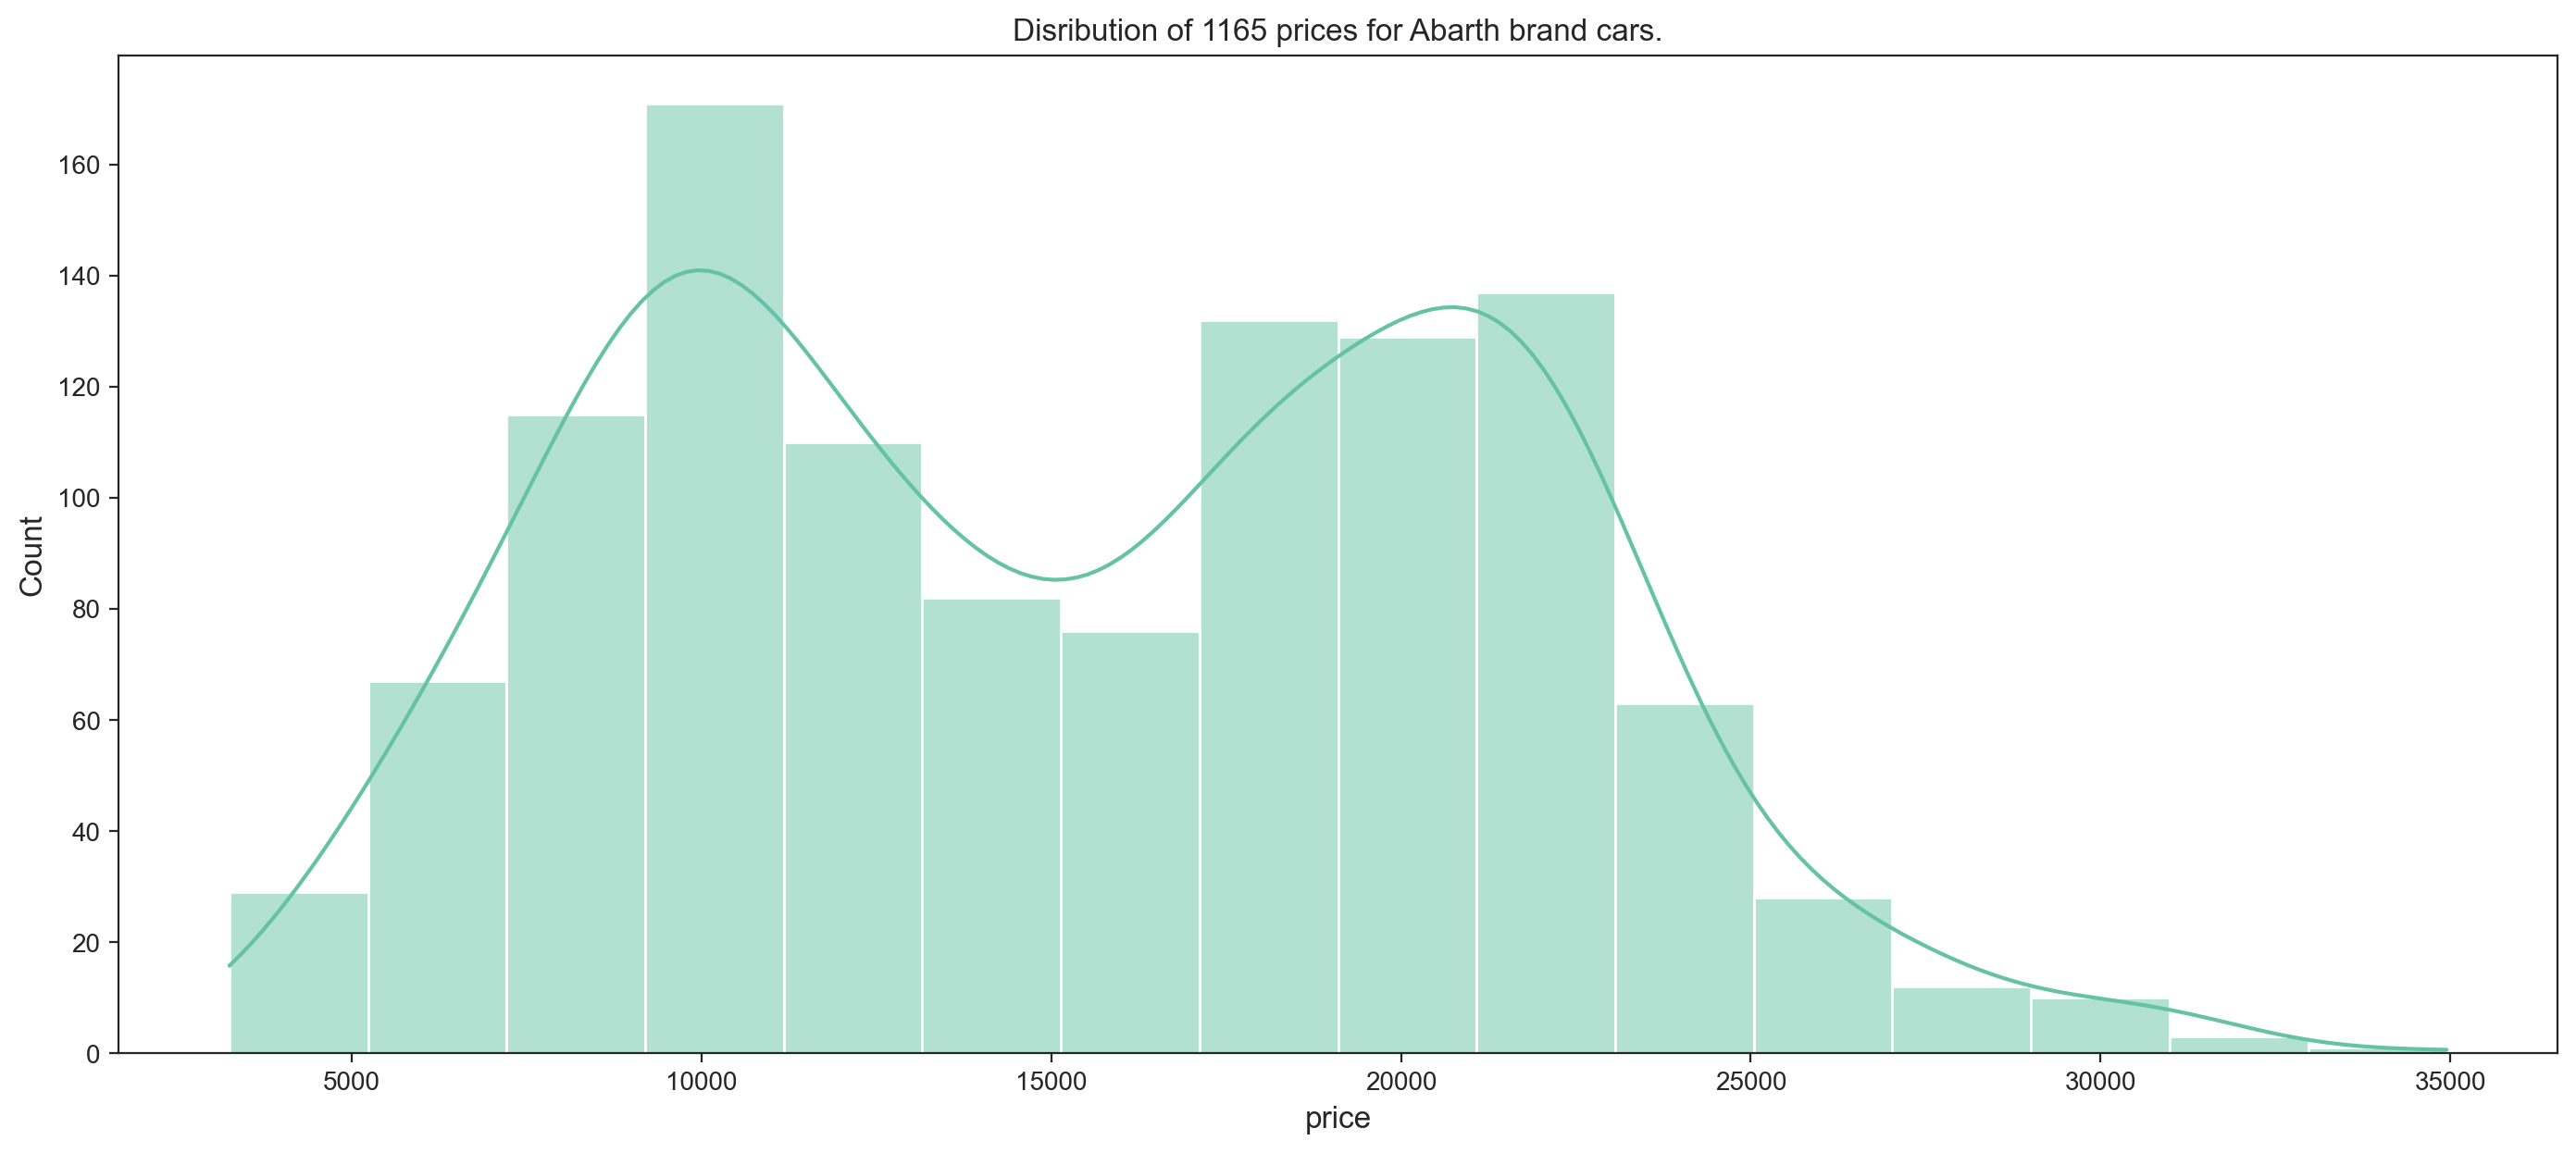

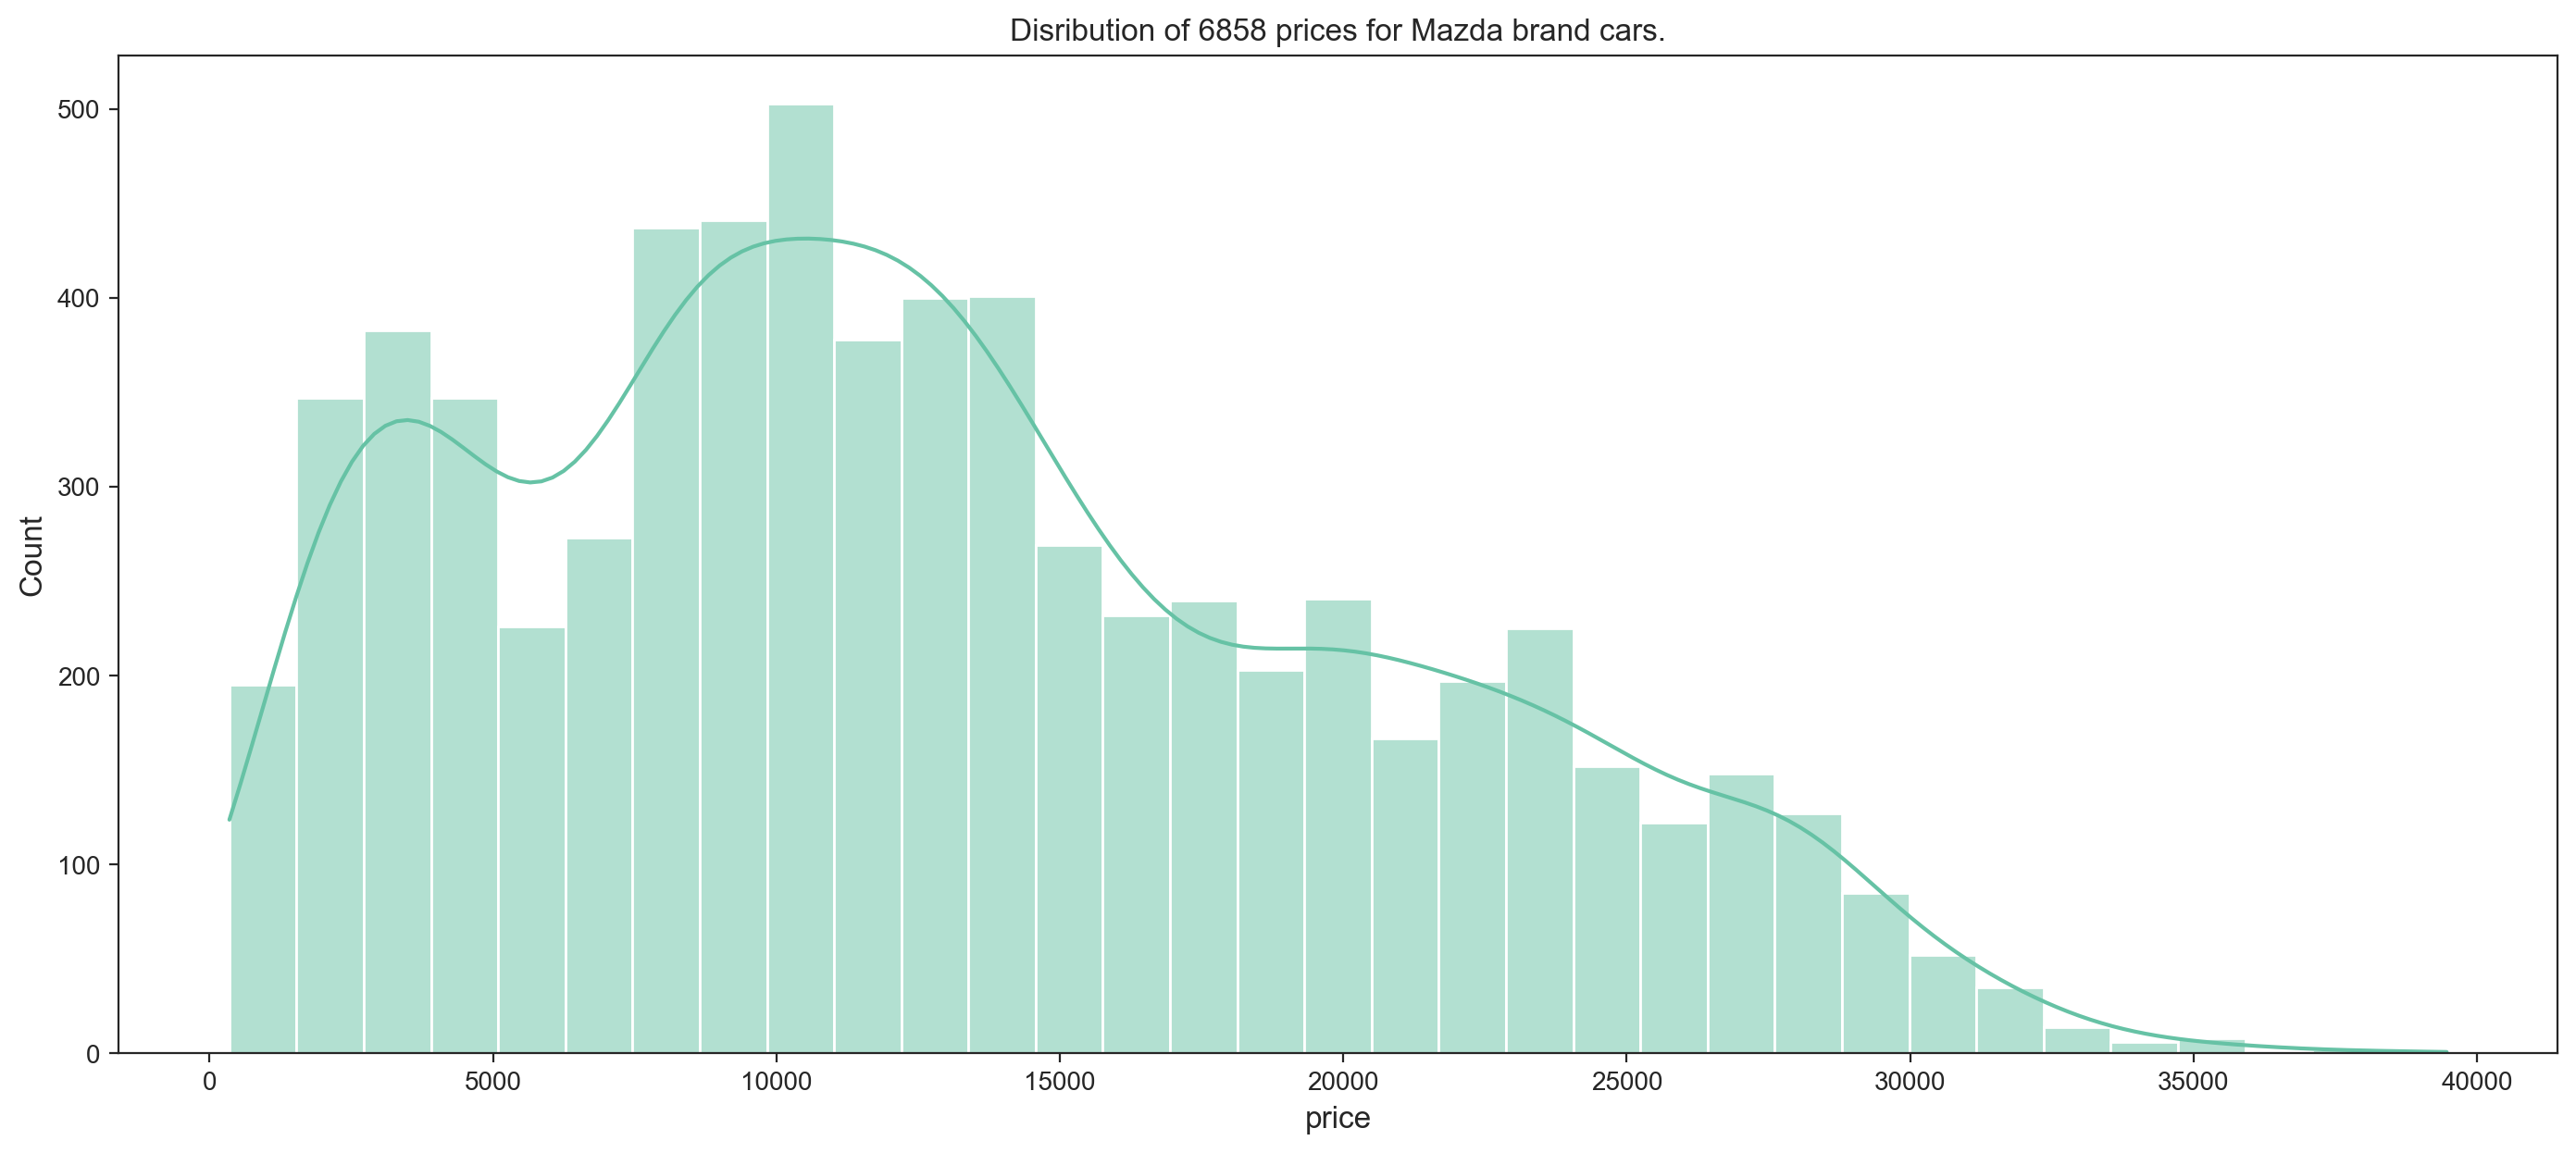

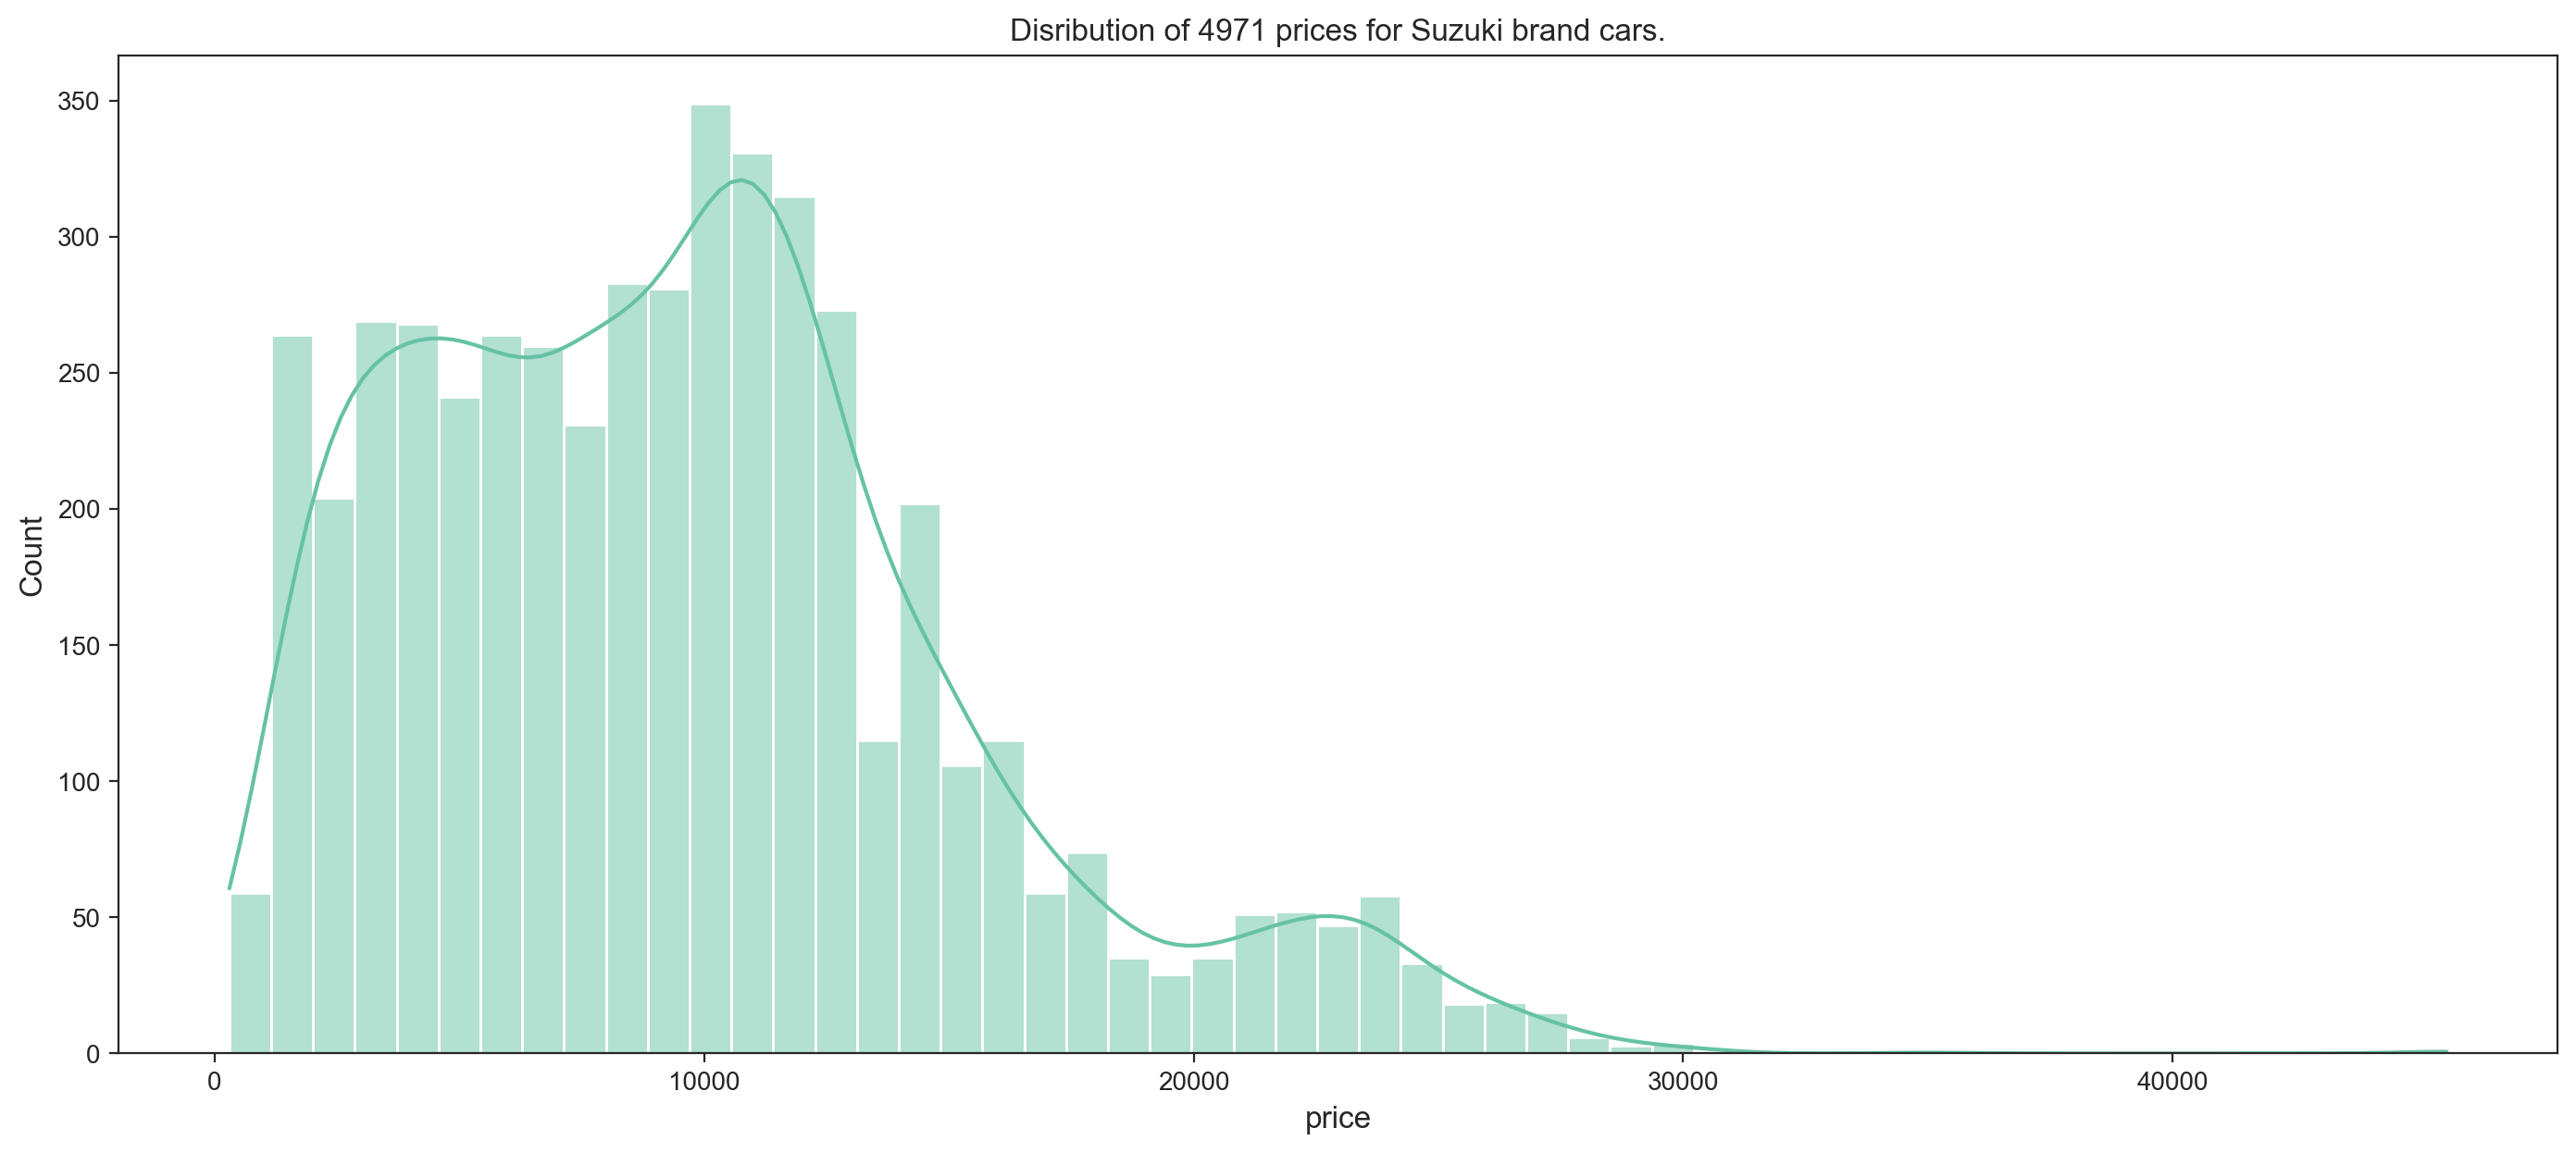

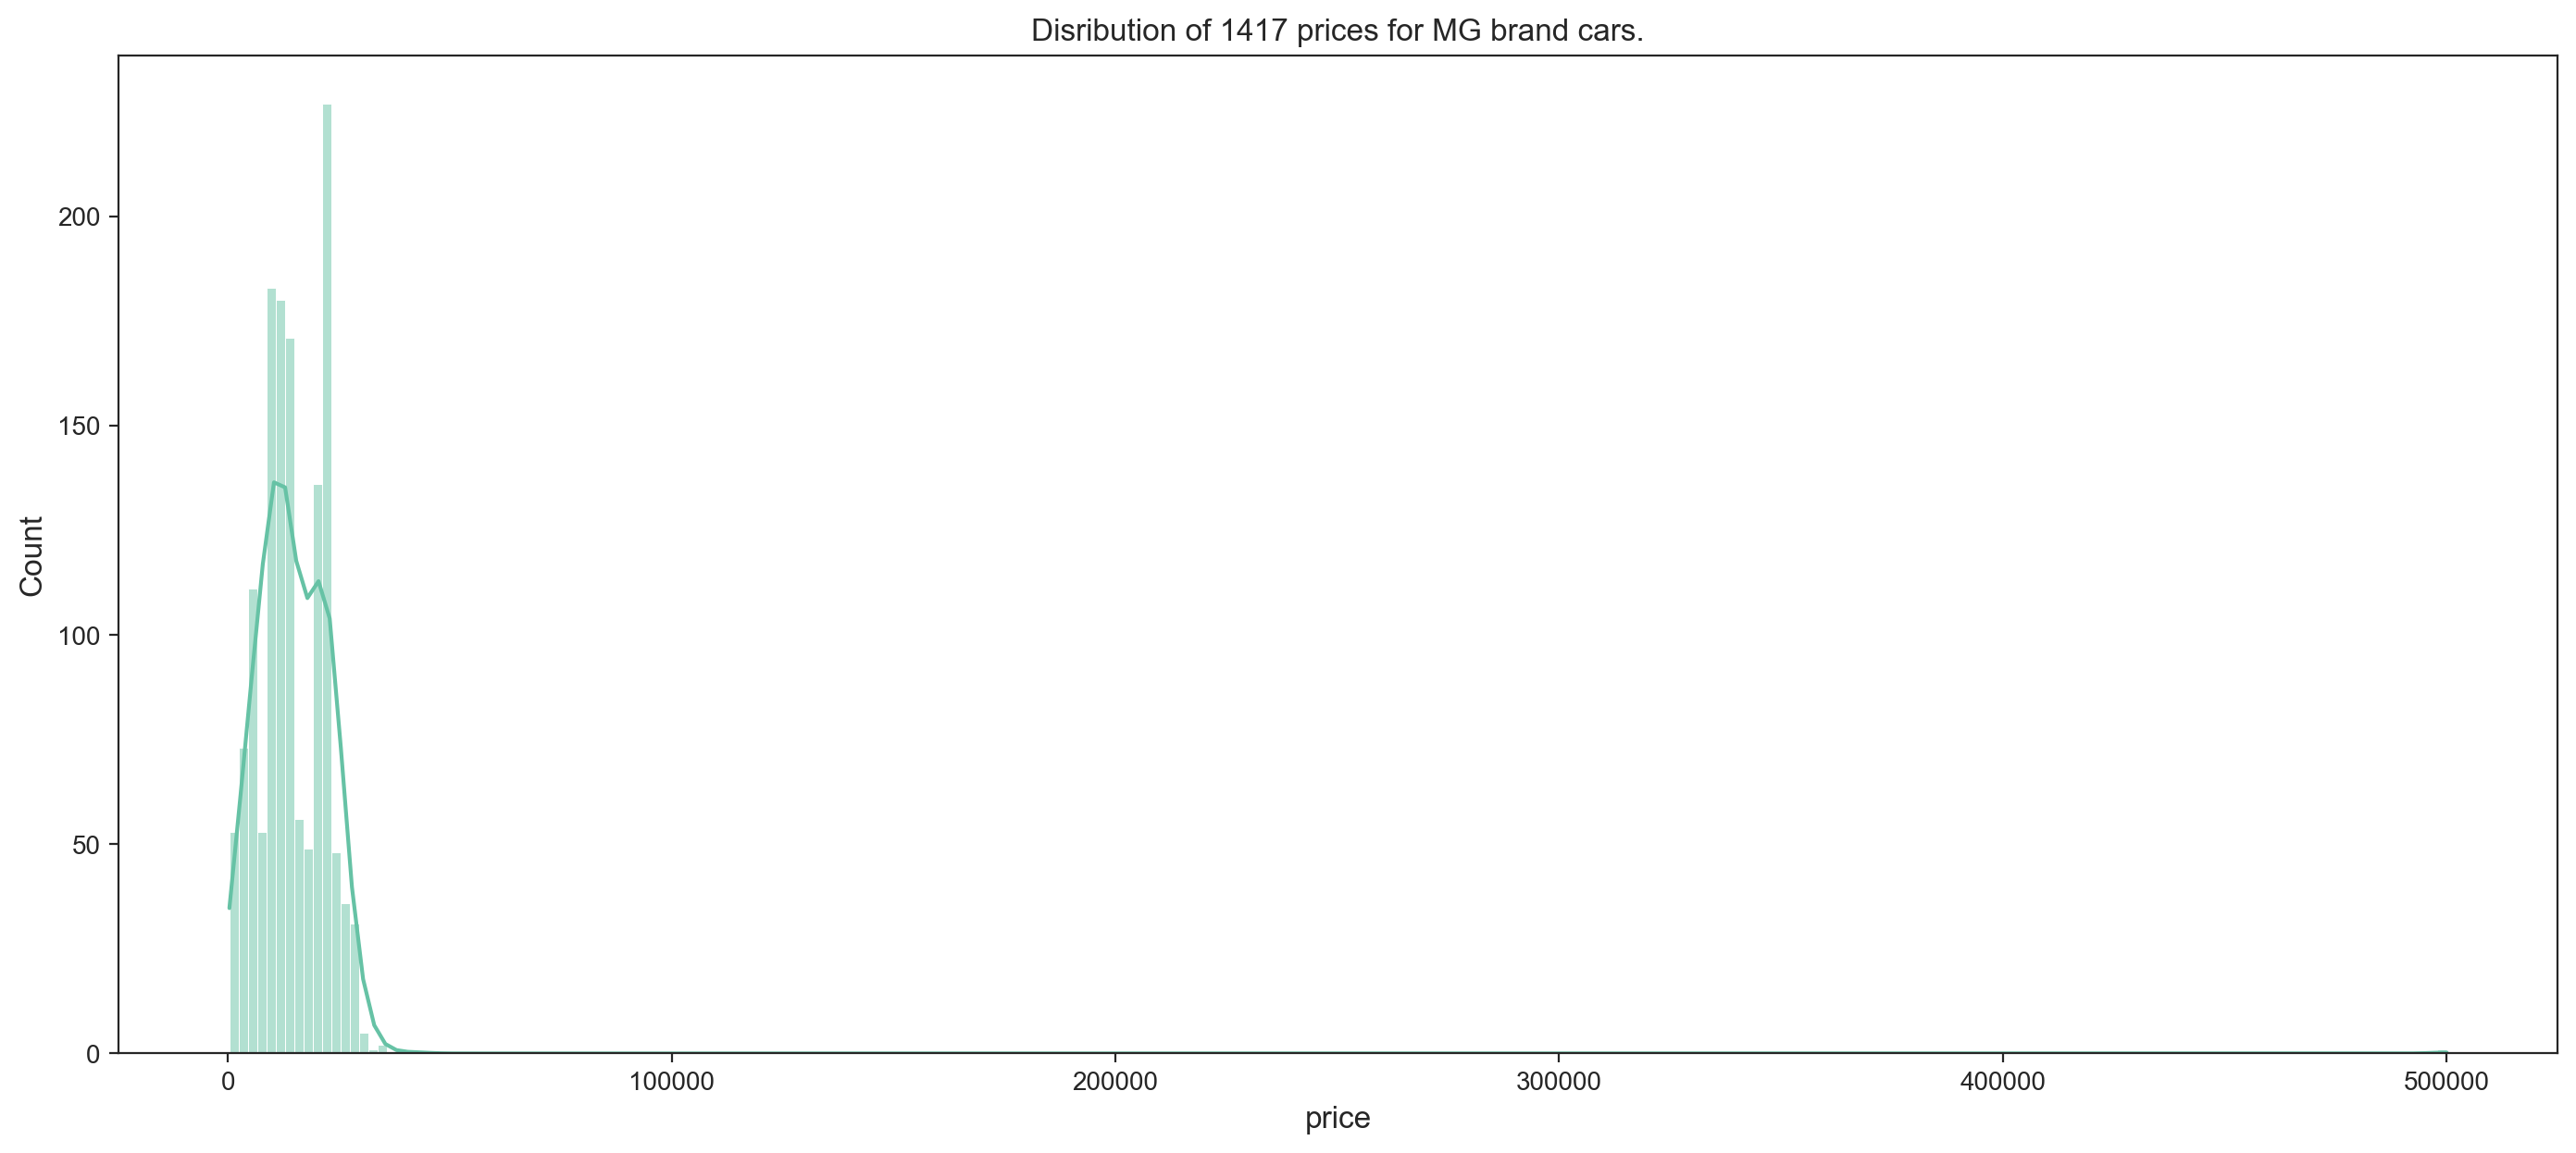

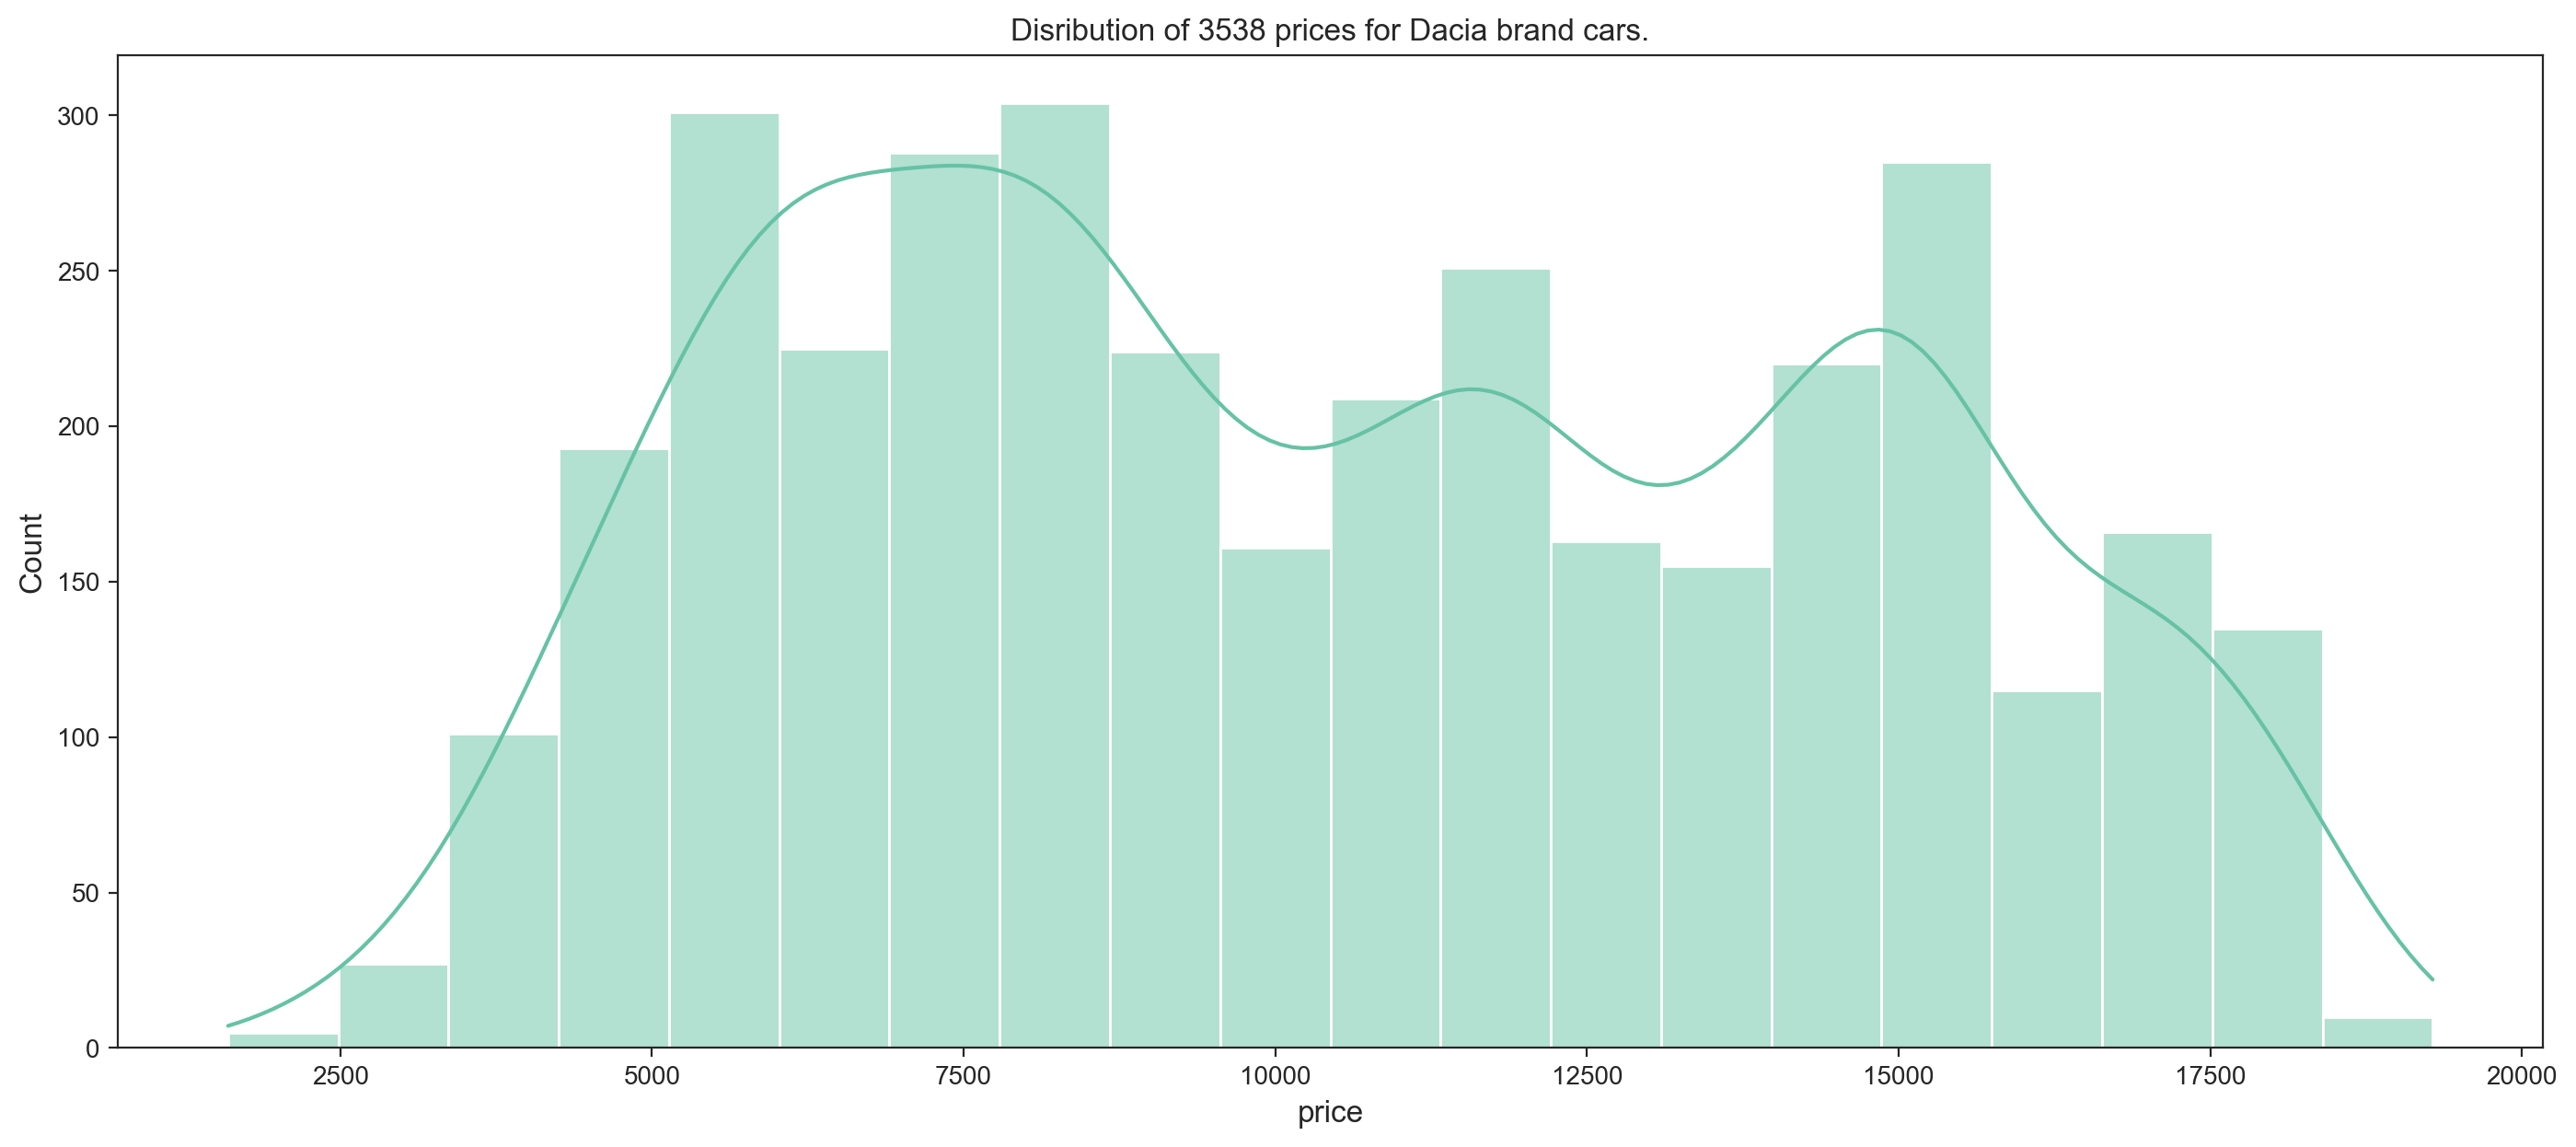

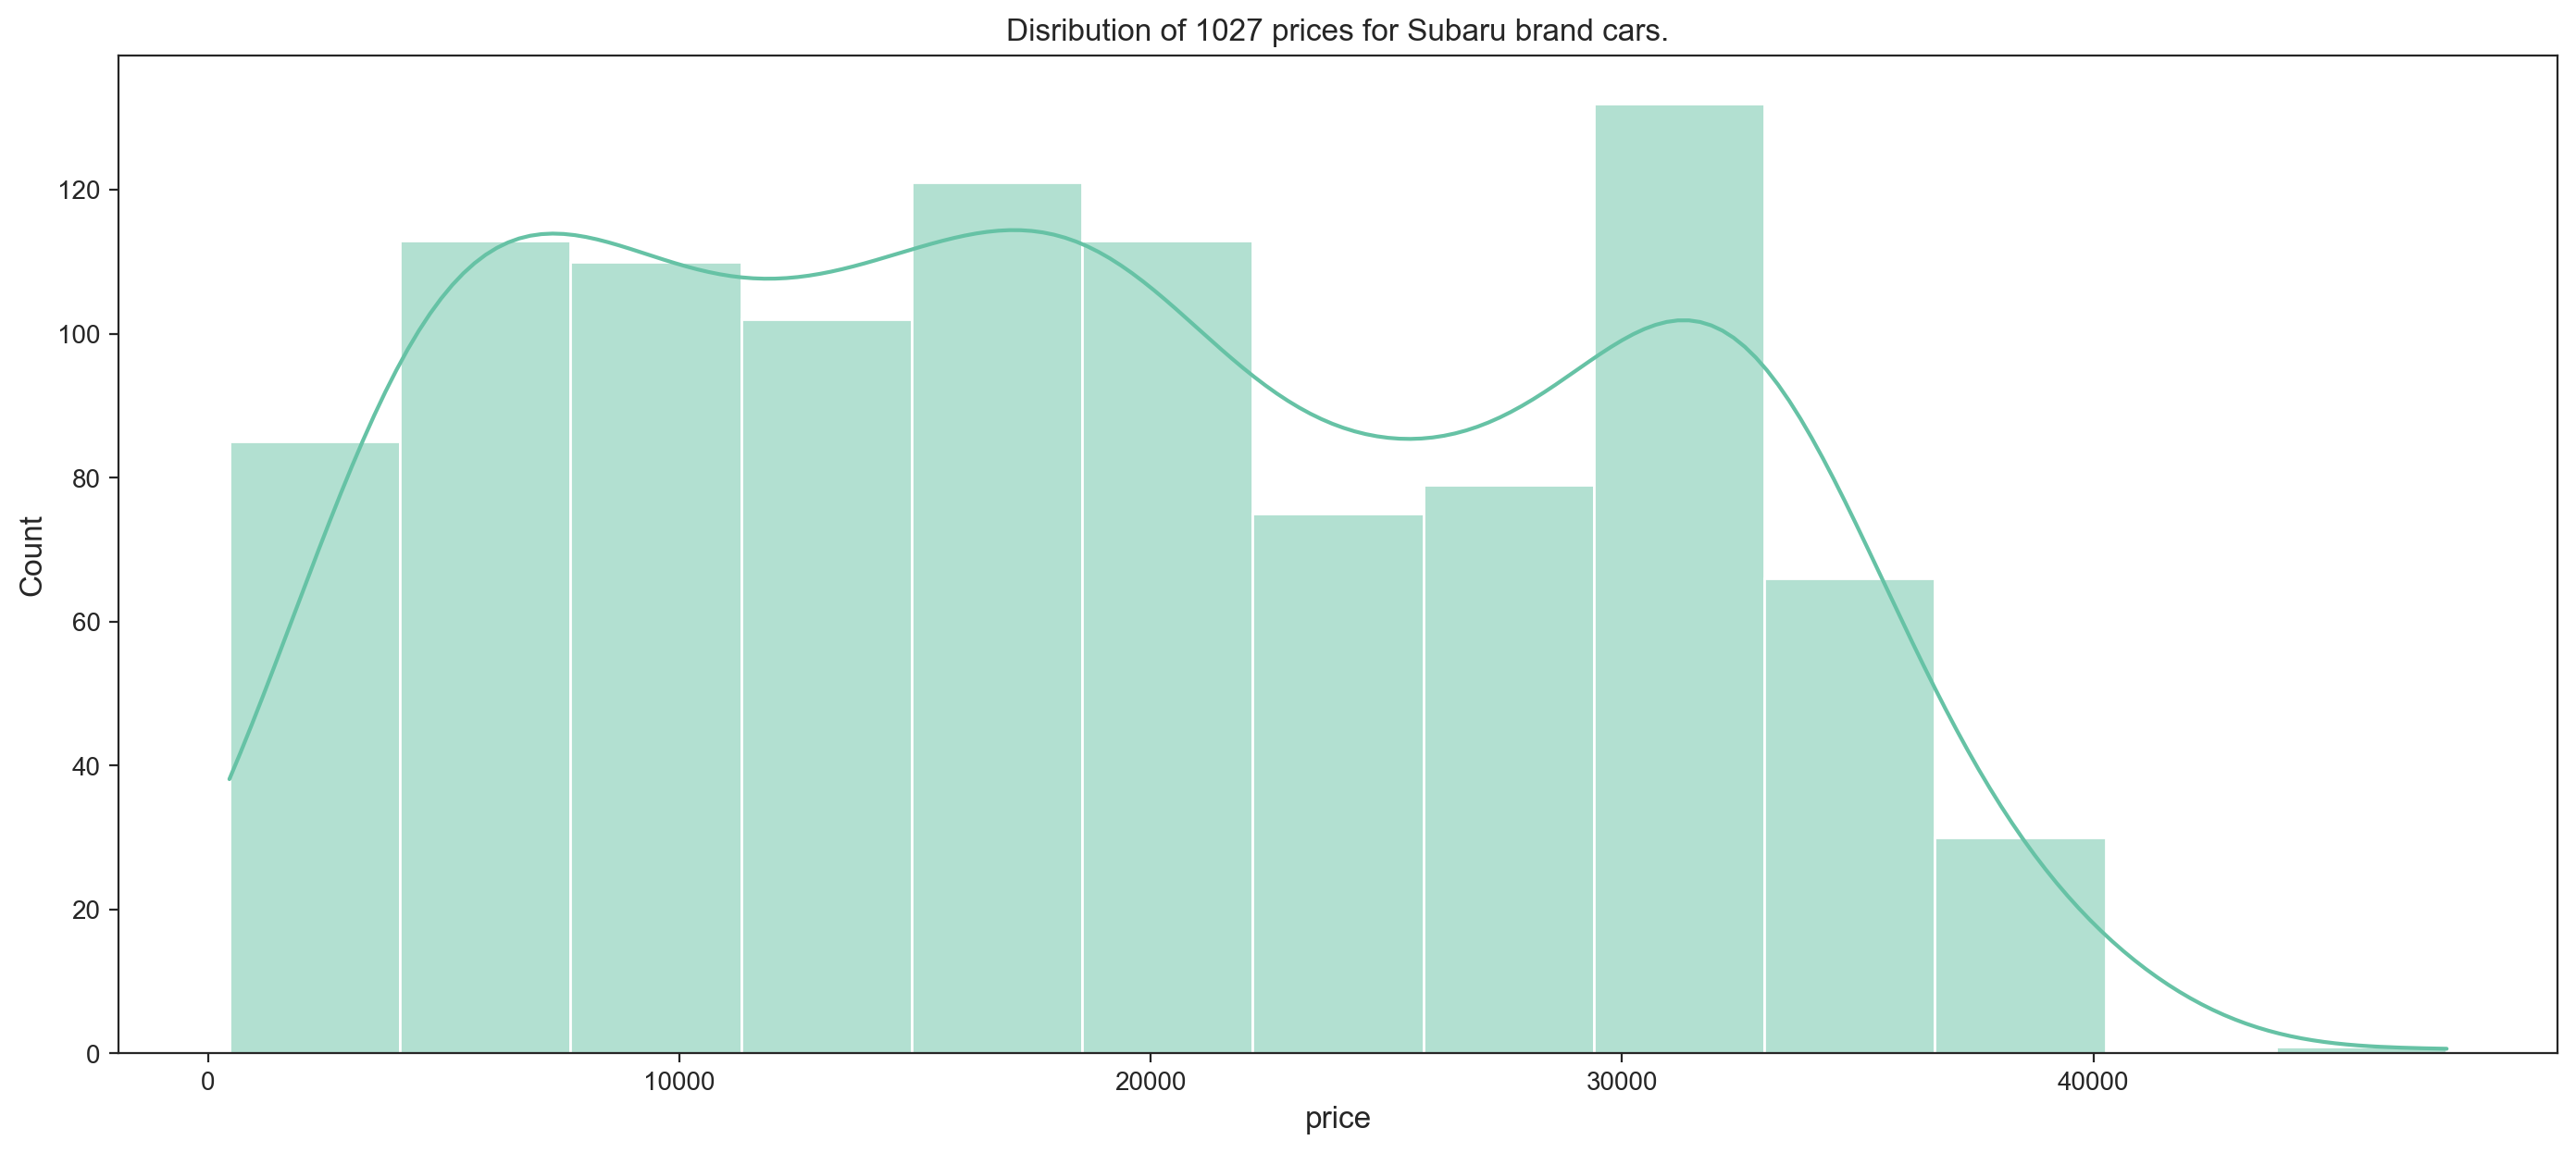

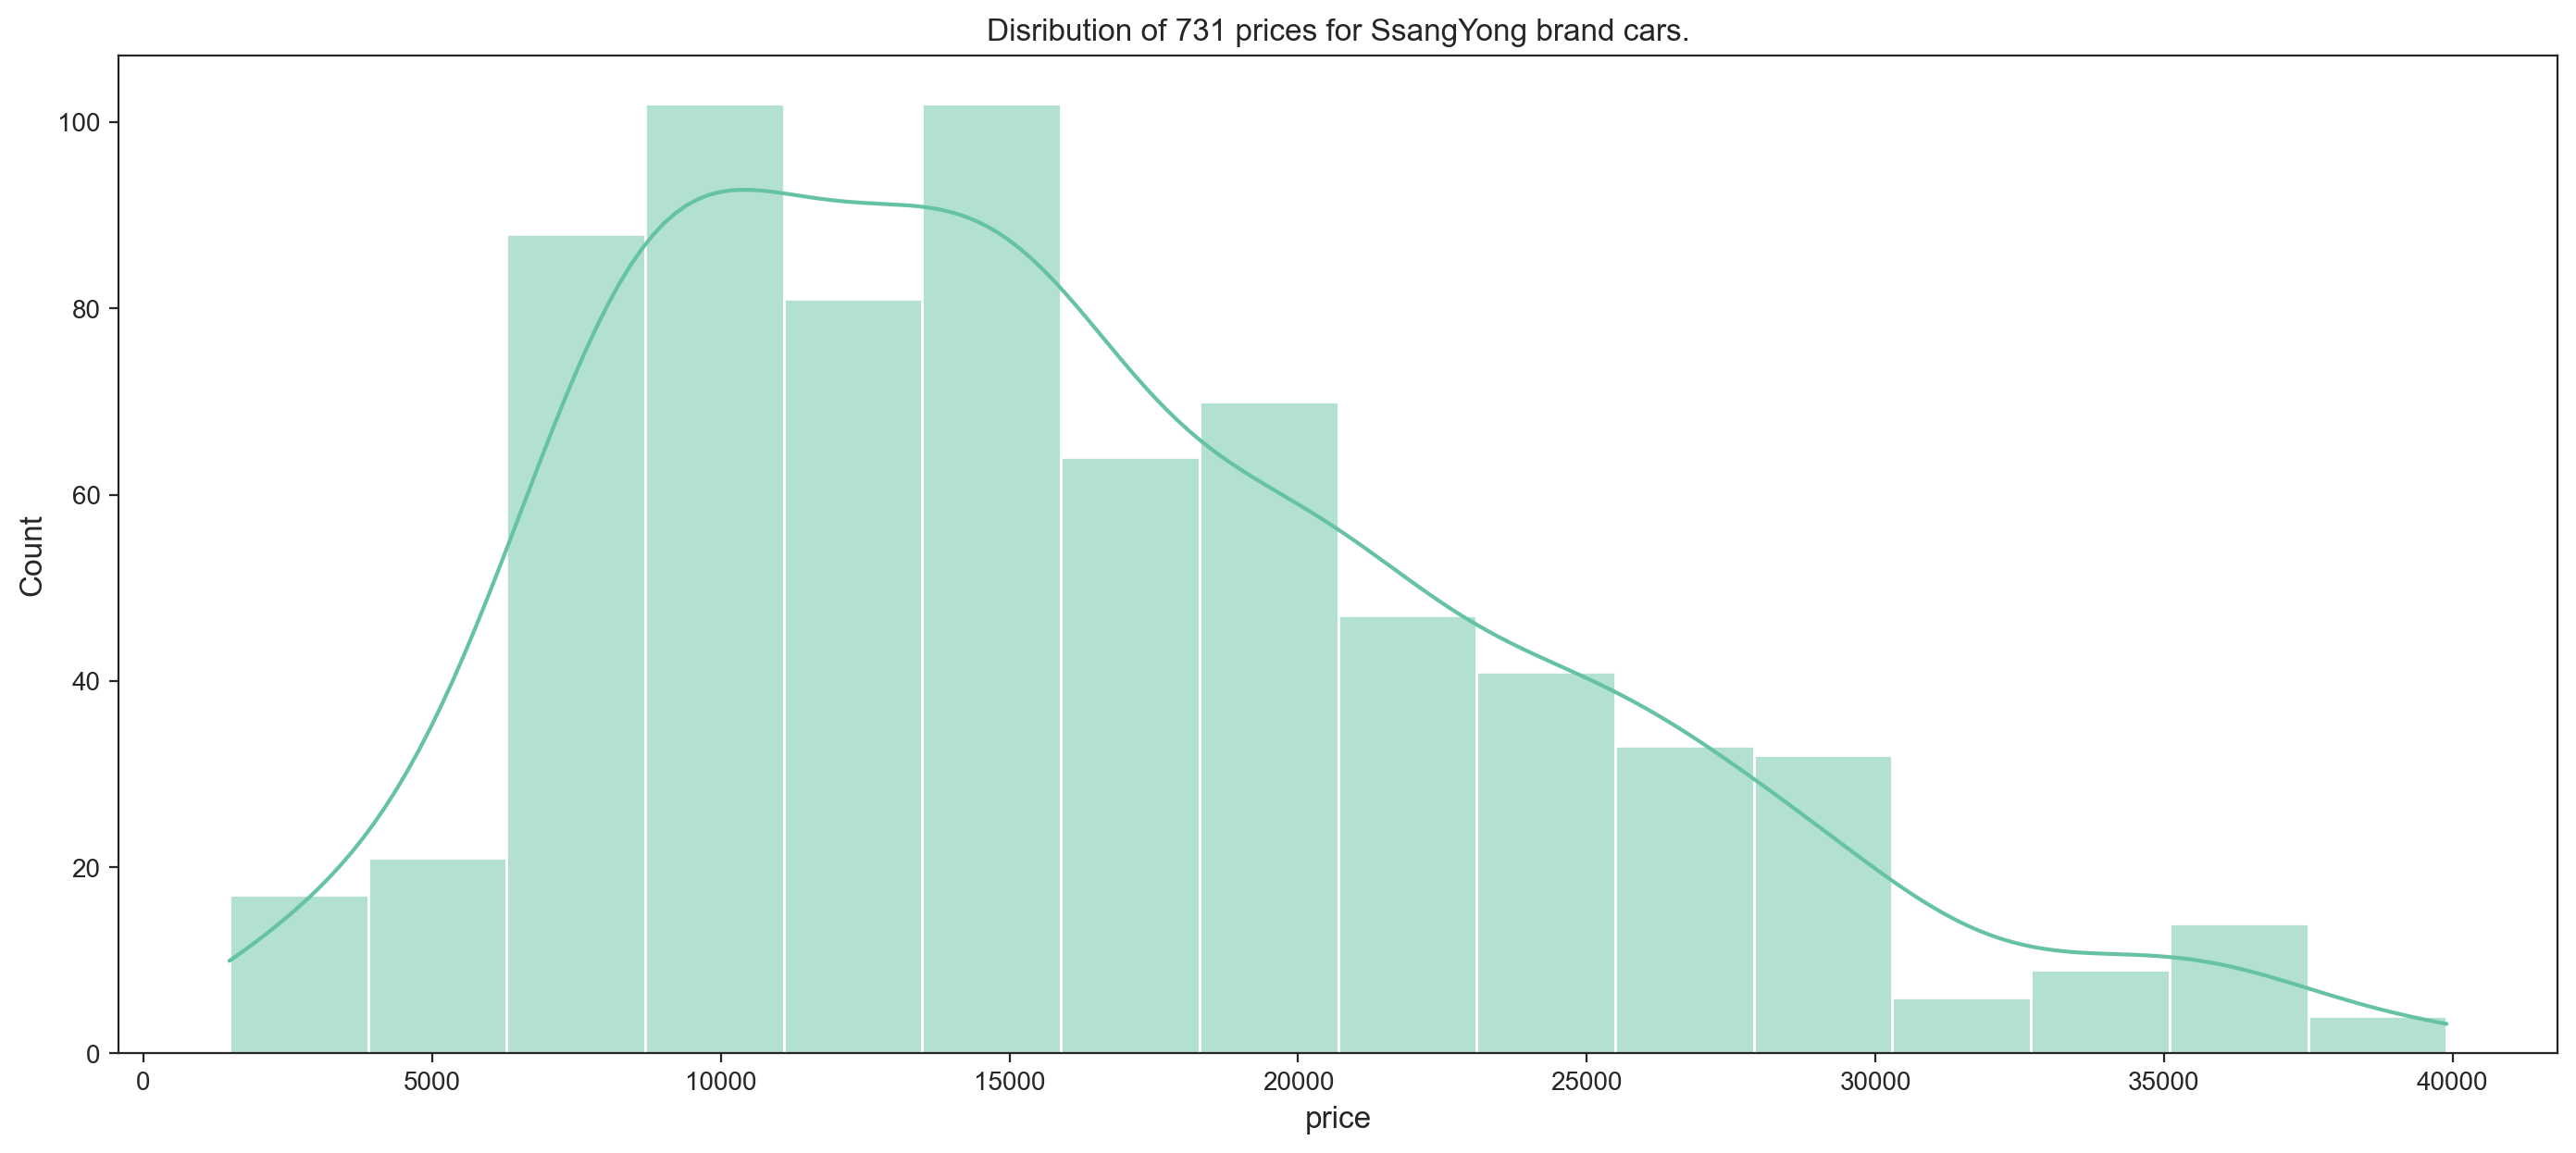

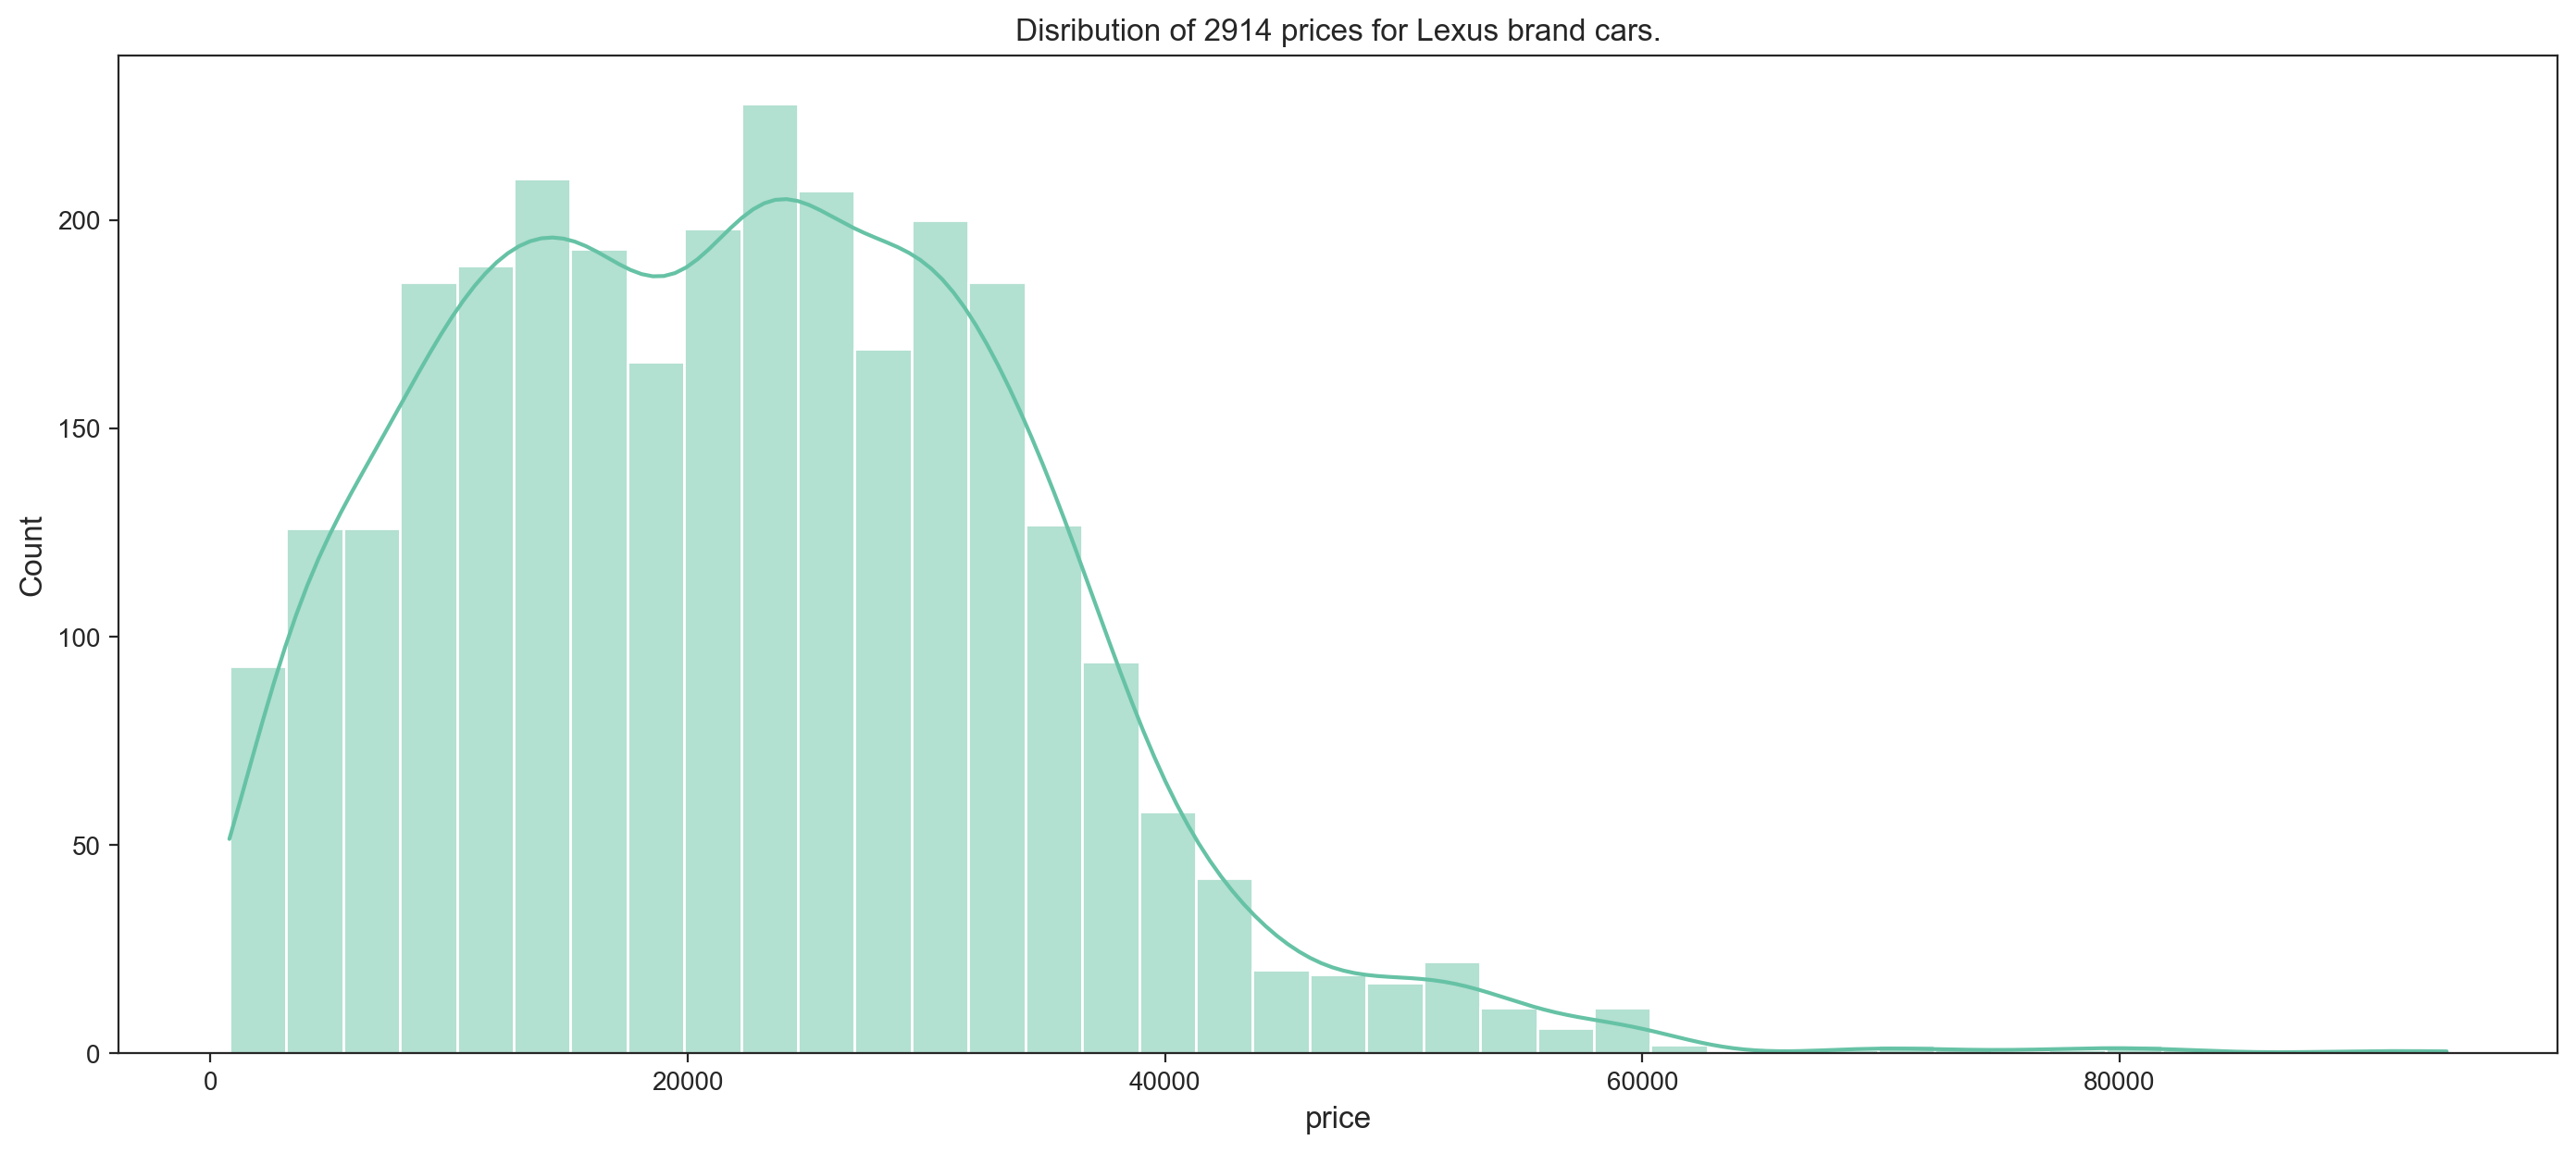

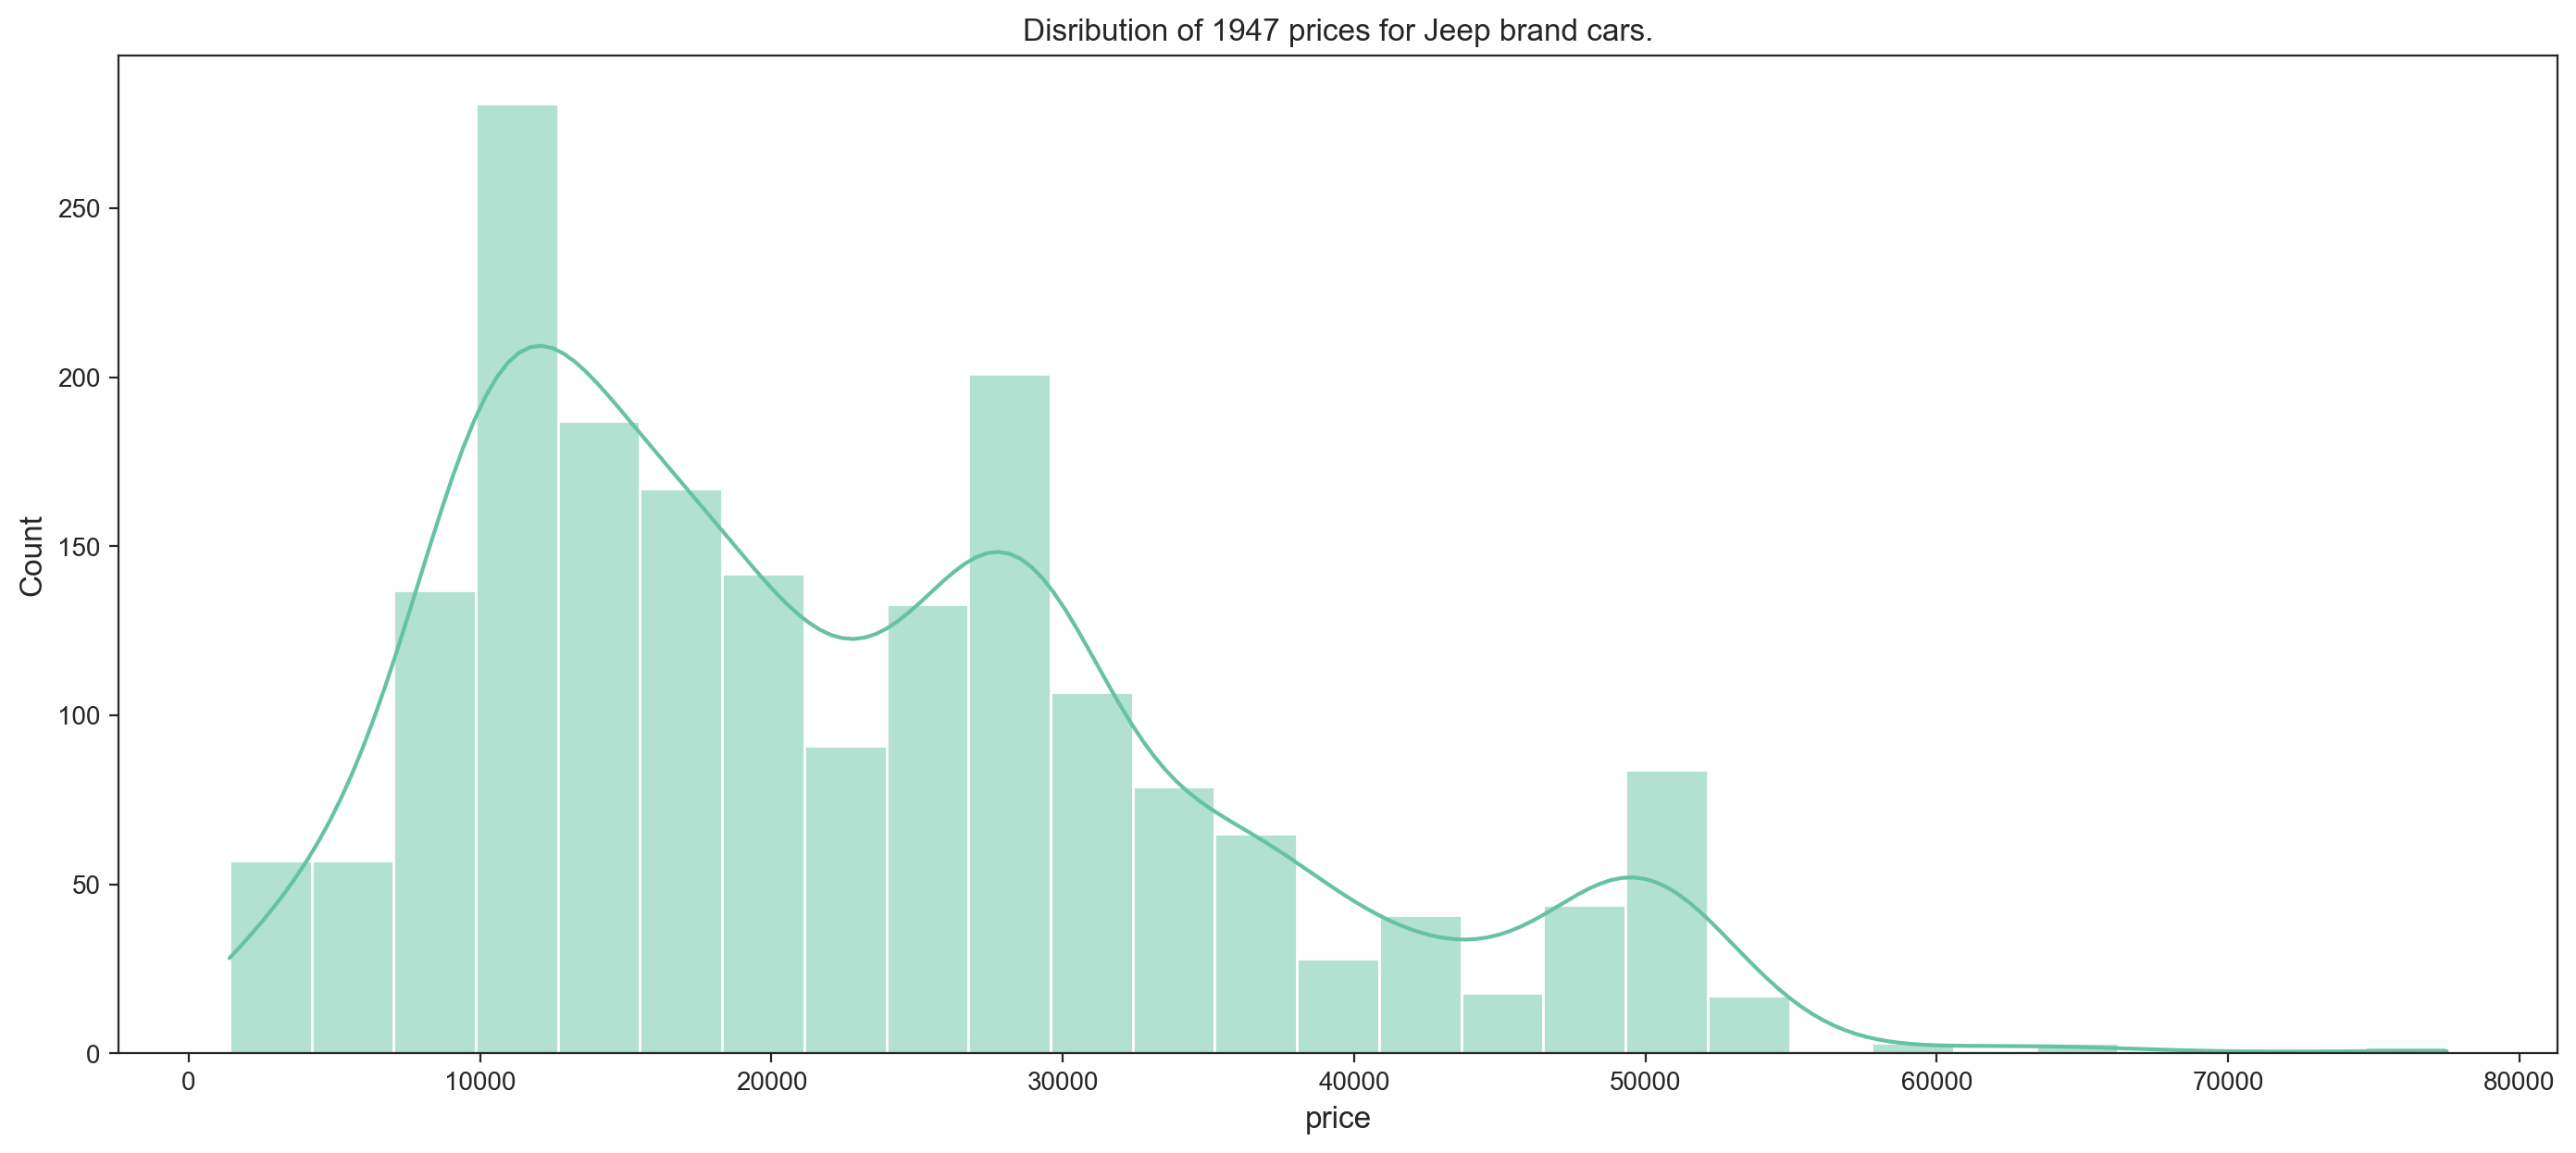

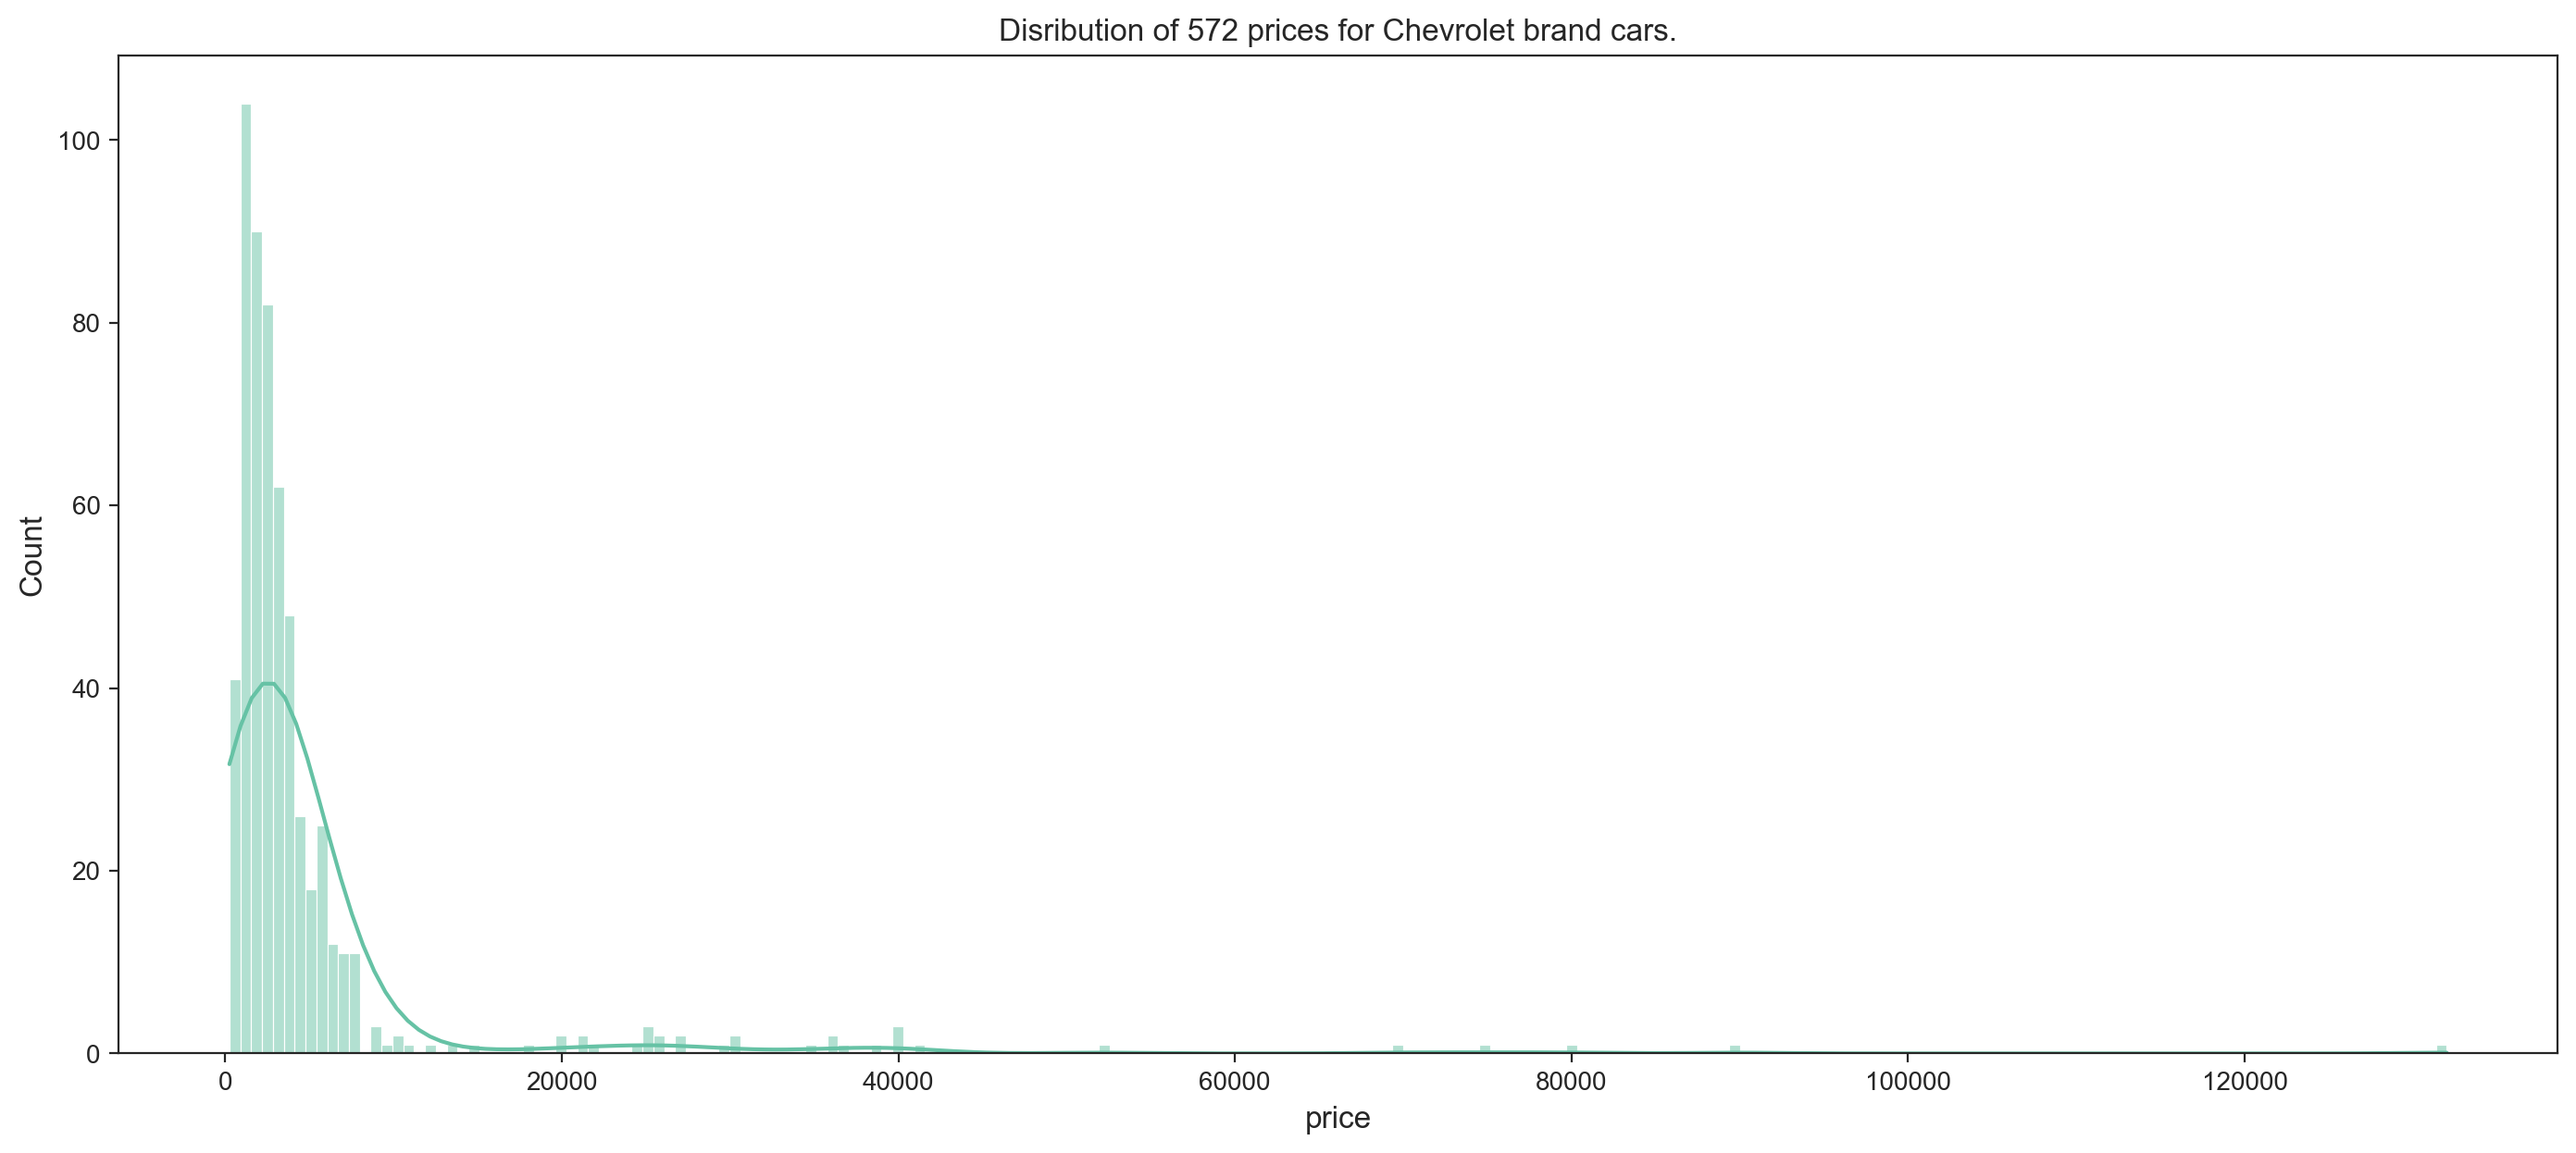

In [73]:
# Visualise spread of price for each brand
for make in auto["standard_make"].unique():
    count = len(auto.loc[auto["standard_make"]==make])
    if count > 500:
        sns.histplot(auto.loc[auto["standard_make"]==make], kde=True, x="price");
        plt.title(f"Disribution of {count} prices for {make} brand cars.")
        plt.show()

## Price - Summary

The prices have some extremely large values including 999999 values which need removing as well as a large positive skew which may benefit from transforming. Additionally, Porsche, Ferrari and Mercedes-Benz appear to have some significant outliers in terms of price

---
&nbsp;

&nbsp;

# ==== Public Reference ====

In [74]:
auto.sample(1)["public_reference"]

322265    202010175114950
Name: public_reference, dtype: int64

In [359]:
def format_entry(entry):
    year = str(entry["year_of_registration"].values[0])[:4]
    make = entry["standard_make"].values[0]
    model = entry["standard_model"].values[0]
    mileage = int(entry["mileage"].values[0])
    price = entry["price"].values[0]
    
    return f"{year} {make} {model} with {mileage:,} miles and price £{price:,}"

In [76]:
def format_ref(entry):
    entry = str(entry["public_reference"].values[0])
    year = entry[:4]
    month = entry[4:6]
    day = entry[6:8]
    rest = entry[8:]
    
    return year, month, day, rest

Pubic reference appears to include the year, month, day that the car was listed as well as some other numbers which are possibly a unique id.
This data can be extracted and added as new features.

---
&nbsp;

&nbsp;

# ==== Mileage ====

In [434]:
miles_per_year = auto.loc[(auto["year_of_registration"].notna()) & auto["mileage"].notna()]
miles_per_year["years_to_2020"] = 2021 - miles_per_year["year_of_registration"].astype(np.int64)
miles_per_year["miles_per_year"] = round(miles_per_year["mileage"] / miles_per_year["years_to_2020"]).astype(np.int64)

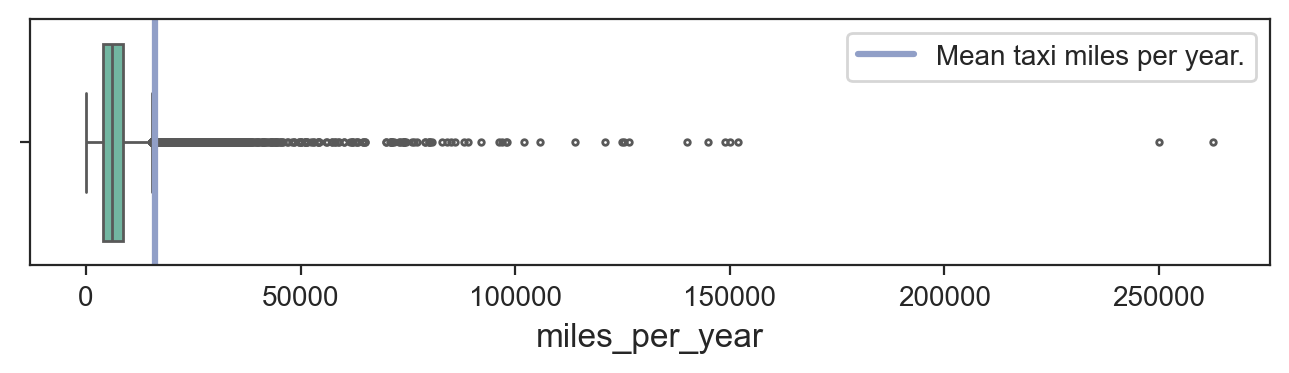

In [507]:
plt.figure(figsize=(8, 1.6))
sns.boxplot(miles_per_year["miles_per_year"], orient="h", fliersize=2)
sns.regplot(x=[16071,(16071+1e-3)], y=[-0.6,0.6], order=1, ci=None, truncate=True, line_kws={"color":"#919FC7", "label":"Mean taxi miles per year."})
plt.ylim(-0.5,0.5)
plt.legend()
plt.savefig("/Users/hal/Documents/Essays/AutoML/miles_per_year.png", bbox_inches='tight', dpi=240)

In [260]:
taxi_miles = auto.loc[(auto["standard_make"]=="London Taxis International") | (auto["standard_make"]=="Carbodies"), ["mileage", "year_of_registration"]]
taxi_miles["years_to_2020"] = 2020 - taxi_miles["year_of_registration"]
taxi_miles["miles_per_year"] = taxi_miles["mileage"] / taxi_miles["years_to_2020"]
taxi_miles["miles_per_year"].mean()

16070.60376189645

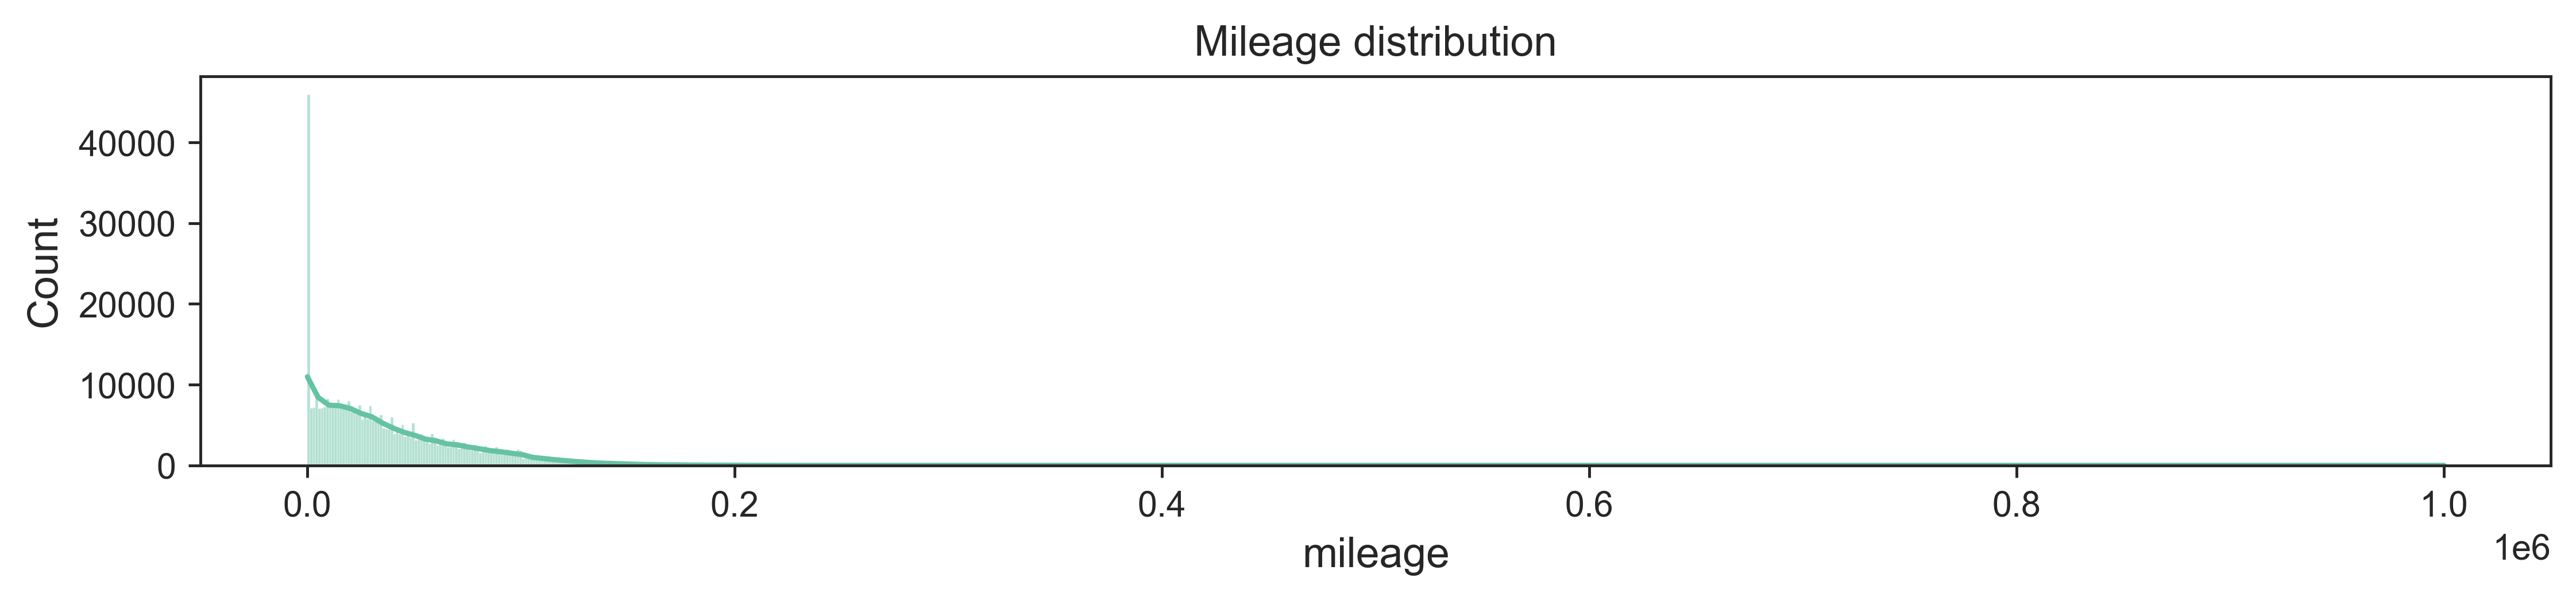

In [78]:
plt.figure(figsize=(12, 2), dpi=220)
sns.histplot(auto, x="mileage", kde=True);
plt.title("Mileage distribution");
plt.savefig("/Users/hal/Documents/Essays/AutoML/mileage_hist.png", bbox_inches='tight', dpi=240)

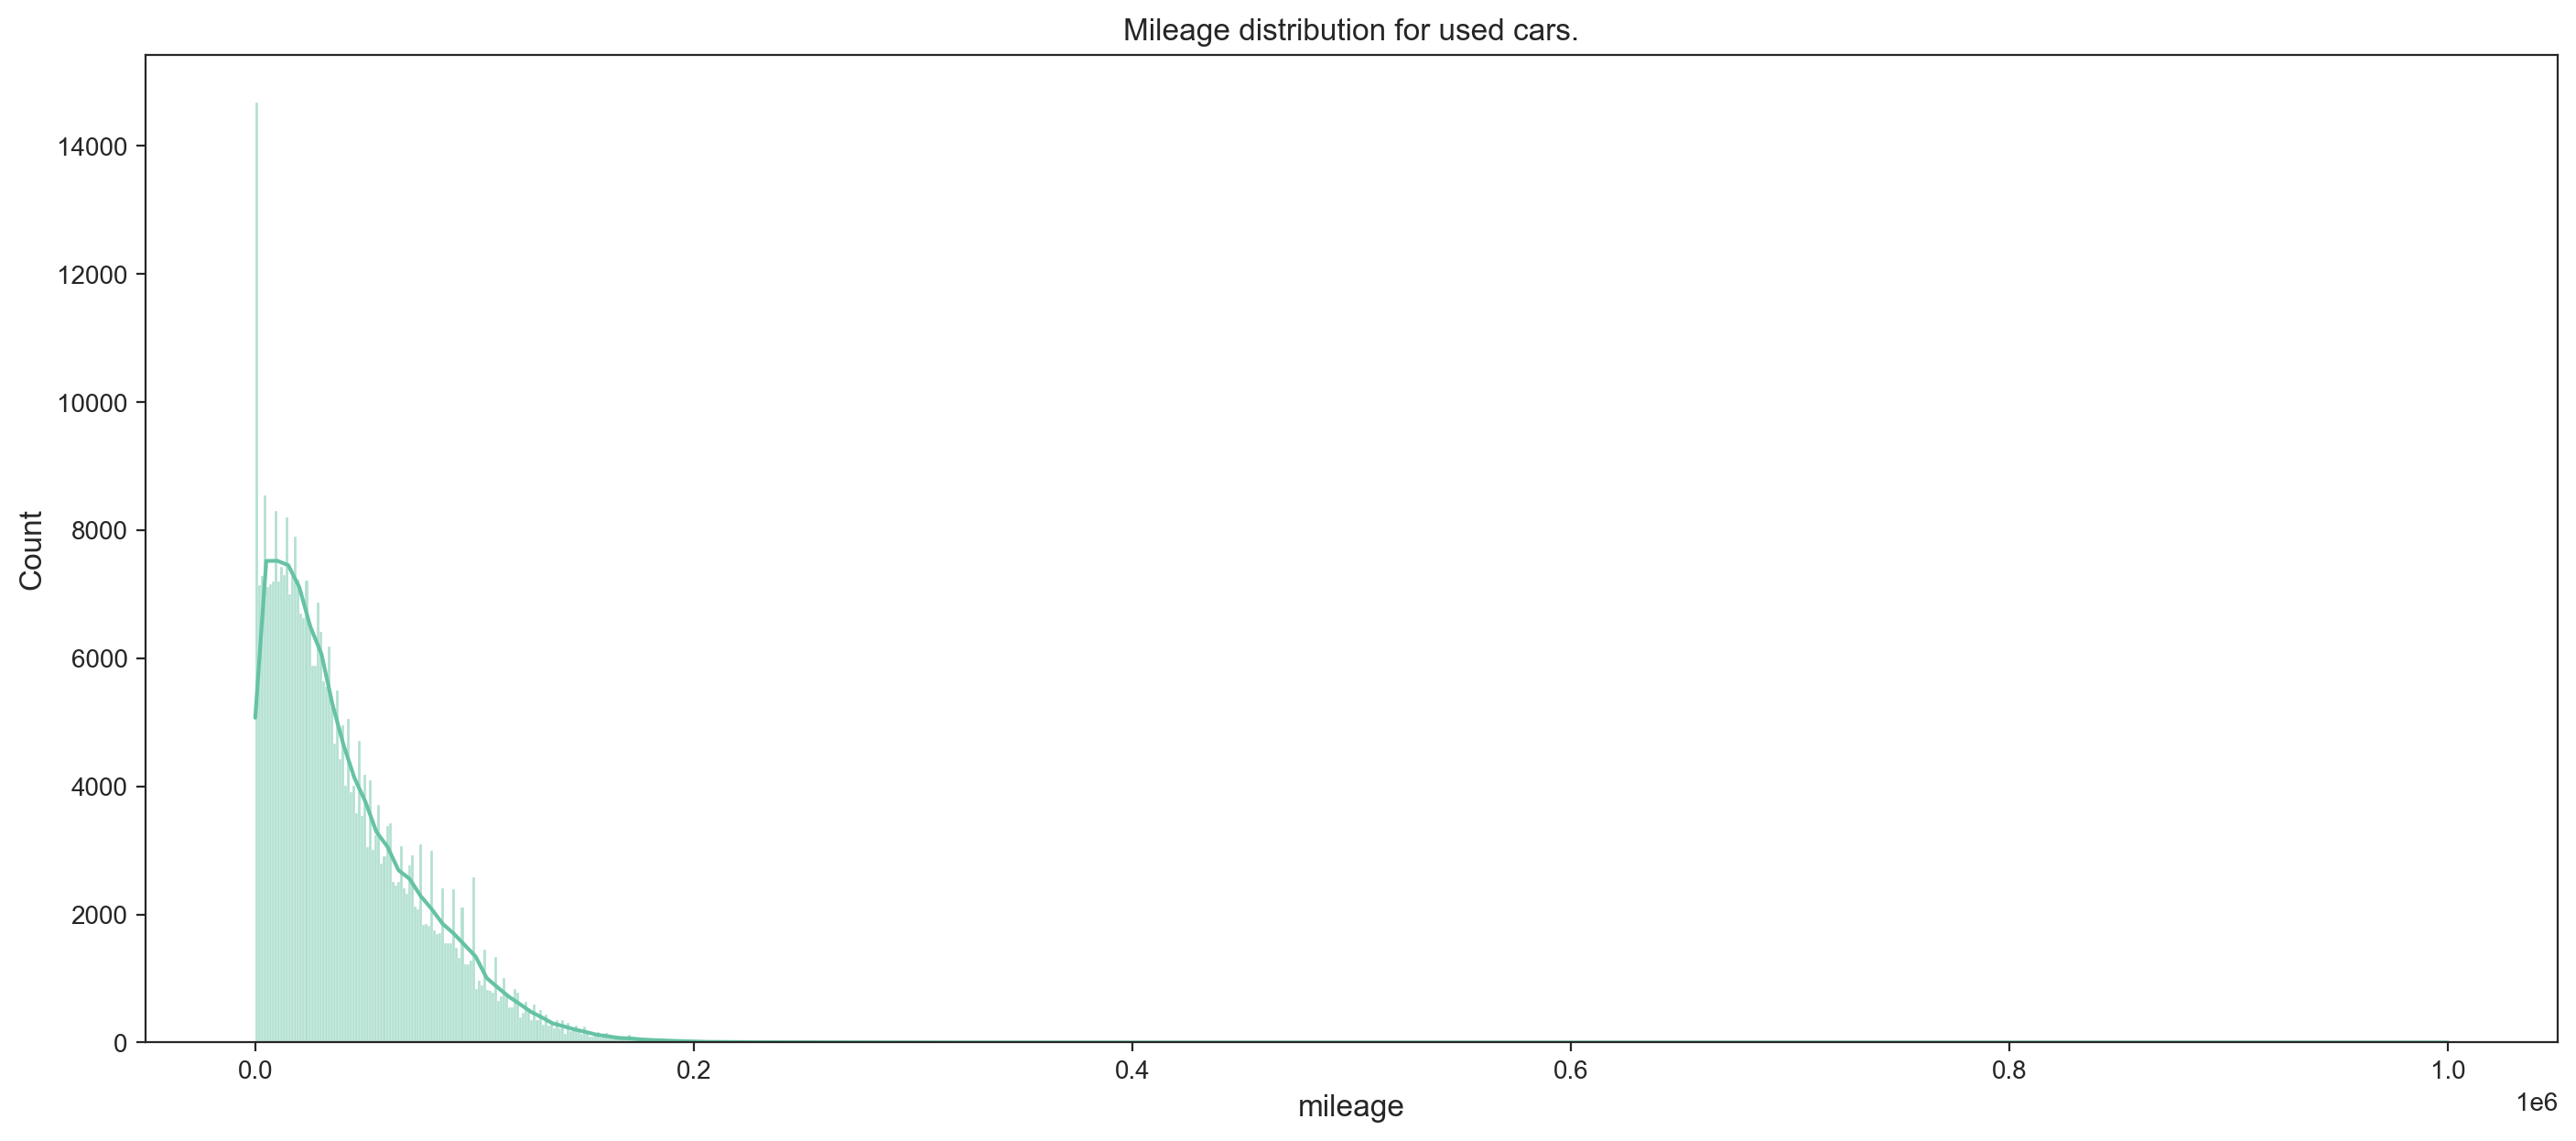

In [79]:
used = auto.loc[auto["vehicle_condition"] == "USED"]
sns.histplot(used, x="mileage", kde=True);
plt.title("Mileage distribution for used cars.");

Large spike around 0 miles which seems unusual given that this data is for used cars. Additionally, there are a few extremely large values which warrant investigating.

In [80]:
# Very large mileage entries
auto.loc[(auto["mileage"] > 3e5)].sort_values(by="mileage", ascending=False)

# Some make sense such as the taxis, however, there are some values which are much too high for the age and type of the car.

public_reference   mileage reg_code standard_colour  \
43974    202008122406434  999999.0       63           White   
63569    202010235350884  990000.0       07             Red   
85043    202010285542410  930000.0       56            Blue   
131508   202010064664710  788072.0       68            Blue   
240577   202009244163289  740000.0       11           White   
115277   202010215262290  740000.0       14            Blue   
333167   202010225297076  611121.0       13           White   
77727    202007301907676  413079.0       59           Beige   
178876   202009033271274  400321.0       16           White   
382567   202009294349326  388000.0       13           Green   
78353    202010315644587  368199.0       53           Green   
22528    202010195167838  360000.0       60           White   
8446     202009093537194  356744.0        W           Black   
252616   202010034557896  355000.0       10            Grey   
116544   202010054632955  351000.0       55             Red   
111845   202010285522885  350000.0       55             NaN   
296655   202010155038897  340000.0        R          Silver   
347153   202009304388320  339654.0       05           Black   
239751   202010305628219  339000.0       57          Silver   
343670   202009163794089  336793.0       15          Silver   
315297   202006099961862  336472.0       11          Silver   
276224   202009153778614  332849.0       11           White   
192165   202009304421979  329000.0       54           Black   
277719   202010215275066  324000.0       06          Silver   
400624   202010285545599  322000.0       05           Black   
54701    202010285550831  314135.0        R           White   
223144   202010305601646  311777.0       04           Black   
168051   202010104843855  310000.0       57           Black   
167970   202009224069738  310000.0       10             NaN   
359785   202009133689548  307426.0       11           Black   
270685   202010315659240  300050.0       59           Black   

                     standard_make standard_model vehicle_condition  \
43974                     Vauxhall          Astra              USED   
63569                     Vauxhall         Zafira              USED   
85043                          BMW       1 Series              USED   
131508                        MINI     Countryman              USED   
240577               Mercedes-Benz        E Class              USED   
115277                       Volvo           XC90              USED   
333167                        Fiat            500              USED   
77727                        SKODA        Octavia              USED   
178876                         BMW             X5              USED   
382567                       SKODA         Superb              USED   
78353                   Mitsubishi         Delica              USED   
22528                      Peugeot        Partner              USED   
8446    London Taxis International            TXI              USED   
252616               Mercedes-Benz           Vito              USED   
116544  London Taxis International           TXII              USED   
111845  London Taxis International           TXII              USED   
296655                       Volvo            V70              USED   
347153  London Taxis International           TXII              USED   
239751                       SKODA        Octavia              USED   
343670                         BMW       1 Series              USED   
315297                      Toyota         Estima              USED   
276224                        Audi             A3              USED   
192165                  Volkswagen         Sharan              USED   
277719                       SKODA        Octavia              USED   
400624  London Taxis International            TXI              USED   
54701                    Carbodies      Black Cab              USED   
223144                  Volkswagen         Passat              USED   
168

In [511]:
# These older, used cars have zero miles which is highly unlikely and should be corrected
auto.loc[(auto["mileage"] < 500) & (auto["vehicle_condition"] == "USED") & (auto["year_of_registration"] < 2018)]

public_reference  mileage reg_code standard_colour standard_make  \
734      202008283032125     42.0       16             NaN       Ferrari   
1656     202011015669636      0.0       13          Silver      Vauxhall   
2754     202008283030532      0.0       63           Black          Audi   
3399     201809040153397    461.0        H           Green  Aston Martin   
8677     201704033991344      0.0        D             Red       Porsche   
...                  ...      ...      ...             ...           ...   
391065   202008242865592     50.0       16           White    Land Rover   
392313   202006300684047    286.0       17             NaN       McLaren   
394684   202008112338593    101.0       16             NaN       Bentley   
399725   202008252916310     50.0       16            Grey    Land Rover   
400724   202008242879192      0.0        L          Silver       Porsche   

       standard_model vehicle_condition  year_of_registration   price  \
734        California              USED                2016.0  114900   
1656         Insignia              USED                2013.0    2975   
2754               A1              USED                2013.0    8000   
3399              DB6              USED                1970.0  950000   
8677              911              USED                1987.0   89995   
...               ...               ...                   ...     ...   
391065    Defender 90              USED                2016.0   75000   
392313          675LT              USED                2017.0  449990   
394684    Continental              USED                2016.0  135000   
399725   Defender 110              USED                2016.0   75000   
400724            911              USED                1973.0  175000   

          body_type  crossover_car_and_van fuel_type  
734     Convertible                  False    Petrol  
1656      Hatchback                  False    Diesel  
2754      Hatchback                  False    Diesel  
3399    Convertible                  False    Petrol  
8677    Convertible                  False    Petrol  
...             ...                    ...       ...  
391065          SUV                   True    Diesel  
392313  Convertible                  False    Petrol  
394684        Coupe                  False    Petrol  
399725          SUV                   True    Diesel  
400724          NaN                  False    Petrol  

[128 rows x 12 columns]

In [82]:
# Some crazy mileage values for these 2020 cars.
auto.loc[(auto["year_of_registration"] == 2020) & (auto["mileage"] > 1e5)]

public_reference   mileage reg_code standard_colour standard_make  \
85334    202010225290196  152000.0       20           Black    Land Rover   
104829   202010315659744  126602.0       70           White      Vauxhall   
123417   202007271766248  102000.0       20            Grey         Mazda   
148395   202010225304217  149000.0       70           Black    Land Rover   
157710   202008142464449  250000.0       20           Black          SEAT   
164023   202010265462768  150000.0       70          Silver    Volkswagen   
173867   202010315658234  145000.0       70             NaN    Land Rover   
254446   202010305602112  114000.0      NaN           White        Toyota   
285648   202002237639035  125250.0       20          Silver        Toyota   
346927   202010225313436  140000.0       70             NaN          Audi   

           standard_model vehicle_condition  year_of_registration    price  \
85334         Discovery 4              USED                2020.0  14995.0   
104829              Combo              USED                2020.0    995.0   
123417              Bongo              USED                2020.0   8495.0   
148395        Range Rover              USED                2020.0  28995.0   
157710              Arona              USED                2020.0  16995.0   
164023        Transporter              USED                2020.0   8995.0   
173867  Range Rover Sport              USED                2020.0   7850.0   
254446             Estima              USED                2020.0   5995.0   
285648             Estima              USED                2020.0   6995.0   
346927                 TT              USED                2020.0    995.0   

          body_type  crossover_car_and_van      fuel_type  
85334           MPV                  False         Petrol  
104829    Combi Van                   True         Diesel  
123417          MPV                  False         Petrol  
148395          SUV                  False         Diesel  
157710          SUV                  False         Diesel  
164023   Window Van                   True         Diesel  
173867          SUV                  False         Diesel  
254446          MPV                  False         Petrol  
285648          MPV                  False  Petrol Hybrid  
346927  Convertible                  False         Petrol

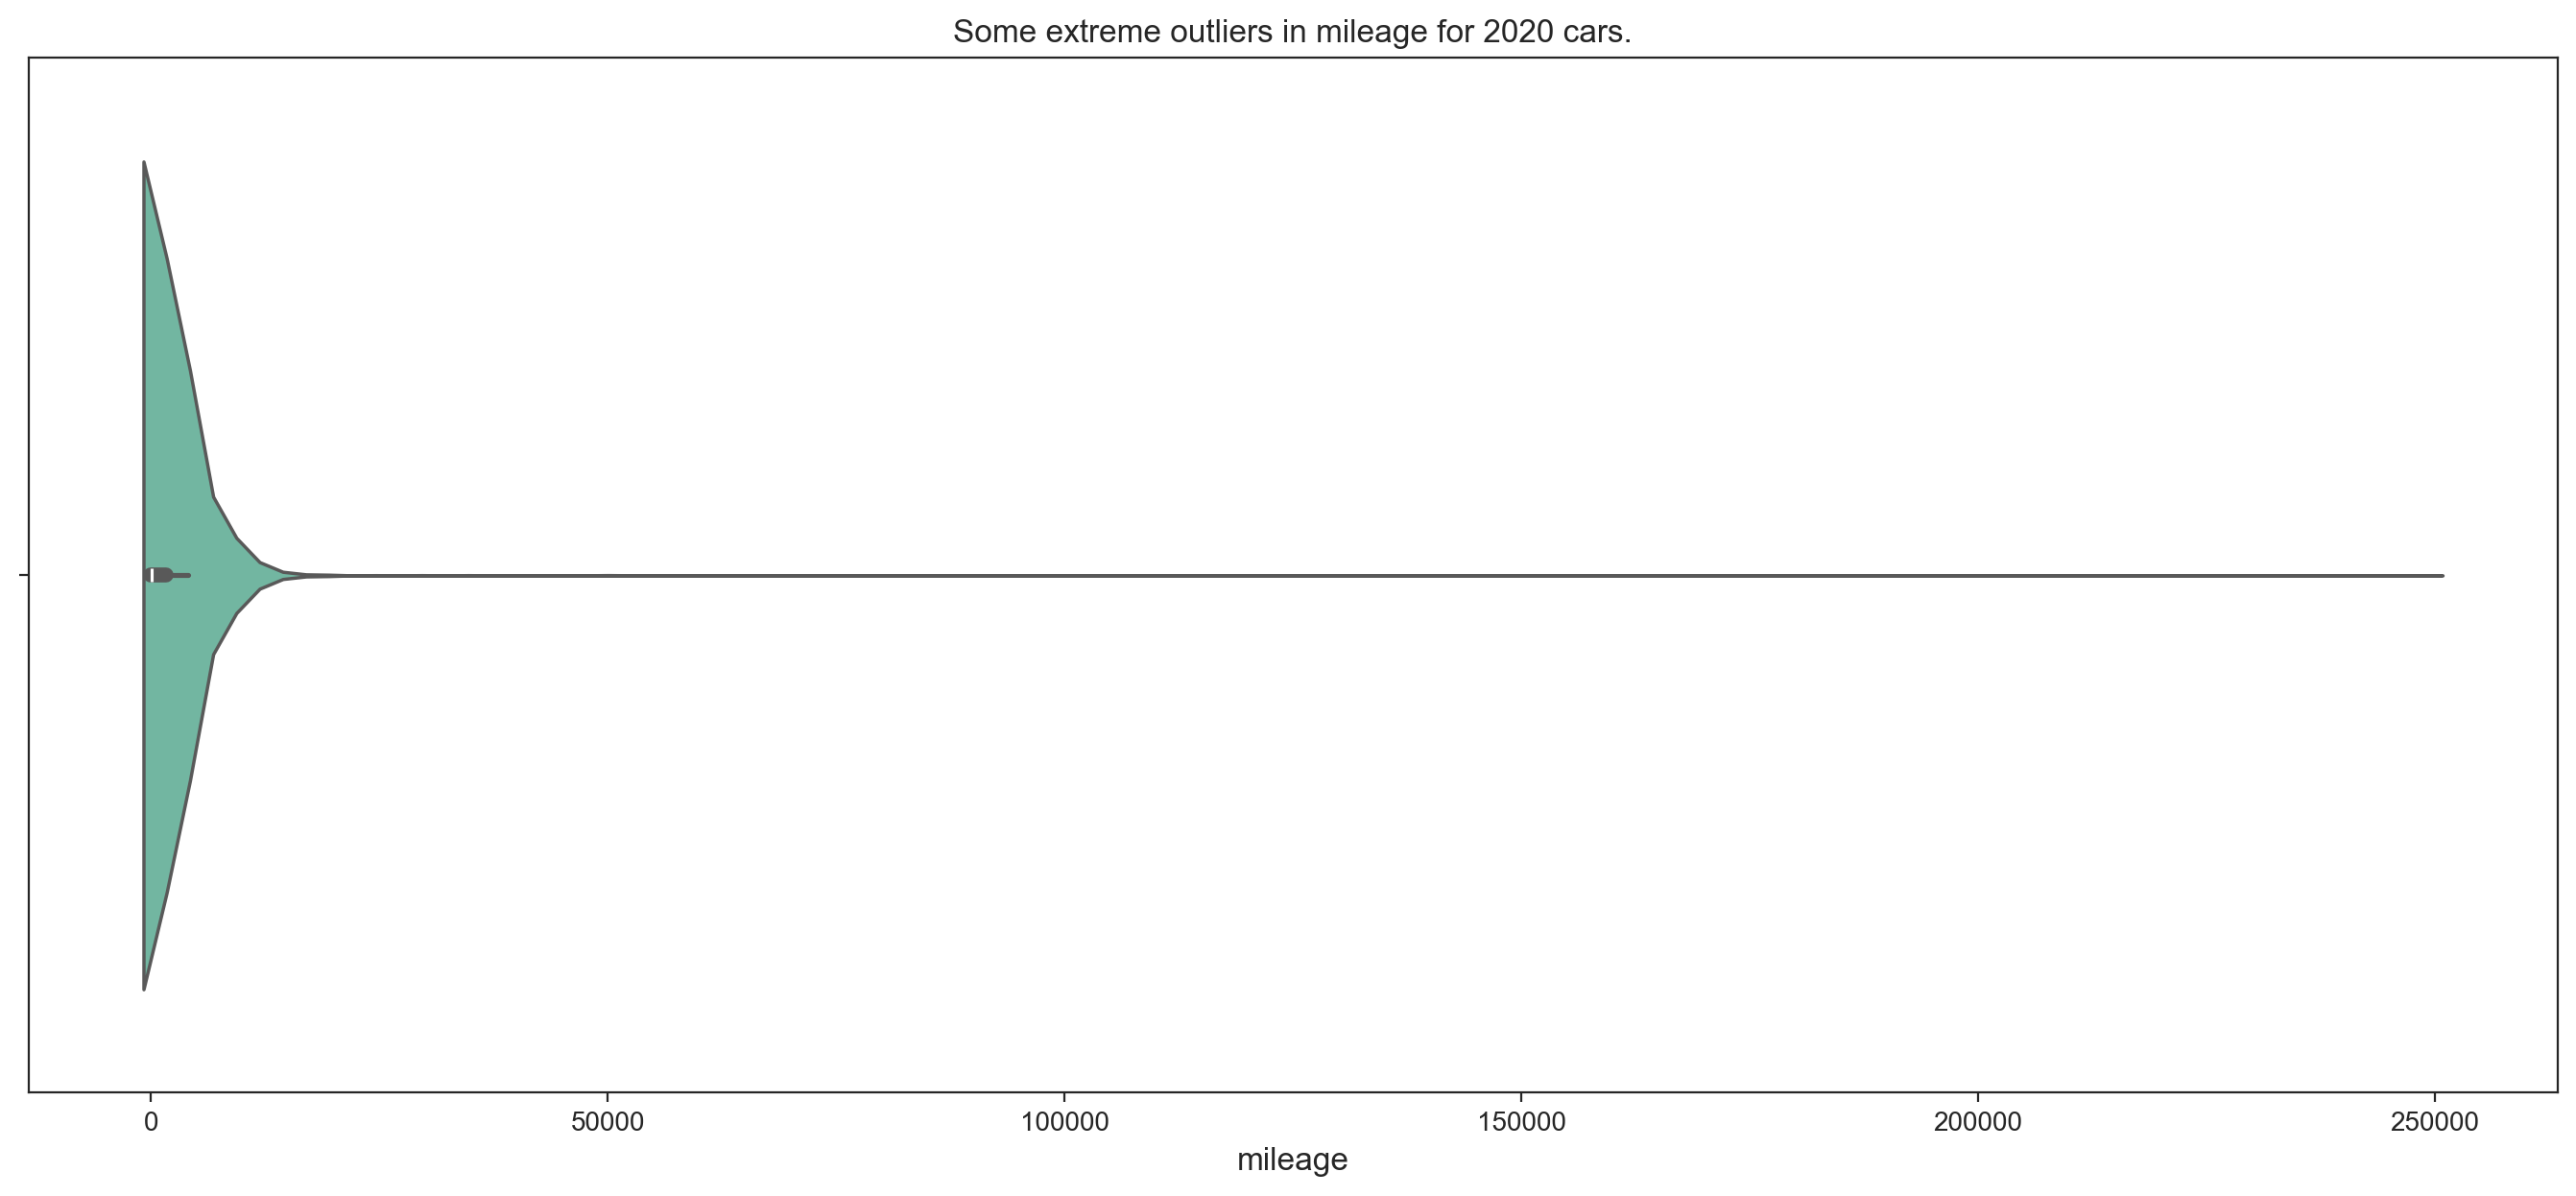

In [83]:
new_mileage = auto.loc[(auto["year_of_registration"] == 2020)]
sns.violinplot(new_mileage, x="mileage");
plt.title("Some extreme outliers in mileage for 2020 cars.");

These mileages are either off or the year of registration could be wrong. Looking at the reg codes they all (except one) have 2020 codes though so it is unlikely the year is wrong. Given that 250000.0 is both suspiciously round and virtually impossible to do in a single year, there must be an error here.

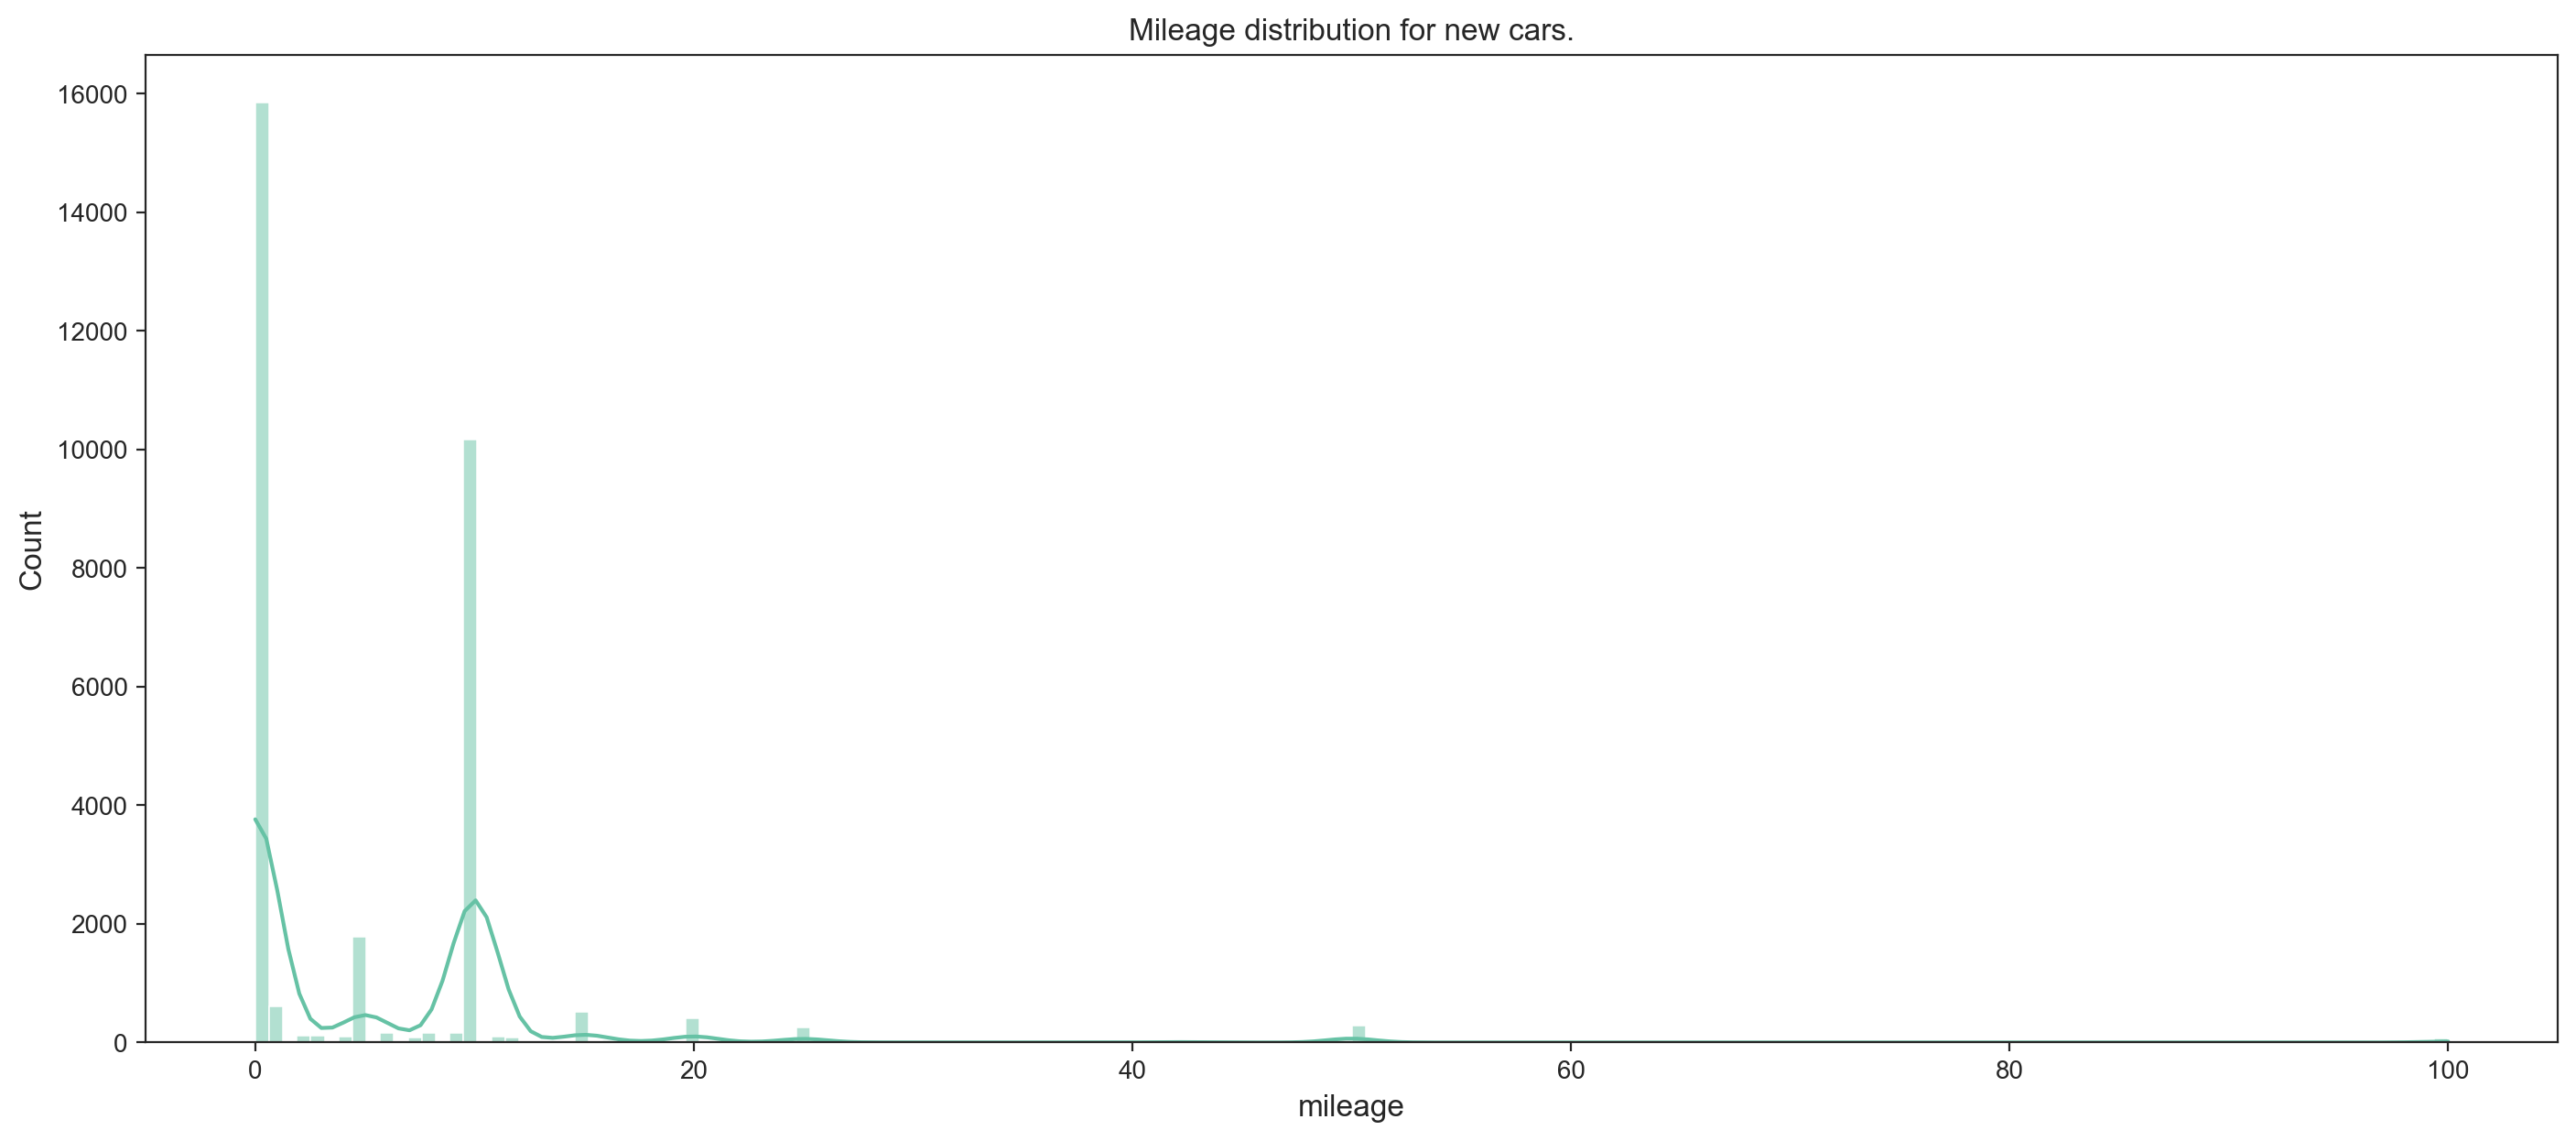

In [84]:
# New cars all have reasonable and low mileage.

new = auto.loc[auto["vehicle_condition"] == "NEW"]
sns.histplot(new, x="mileage", kde=True);
plt.title("Mileage distribution for new cars.");

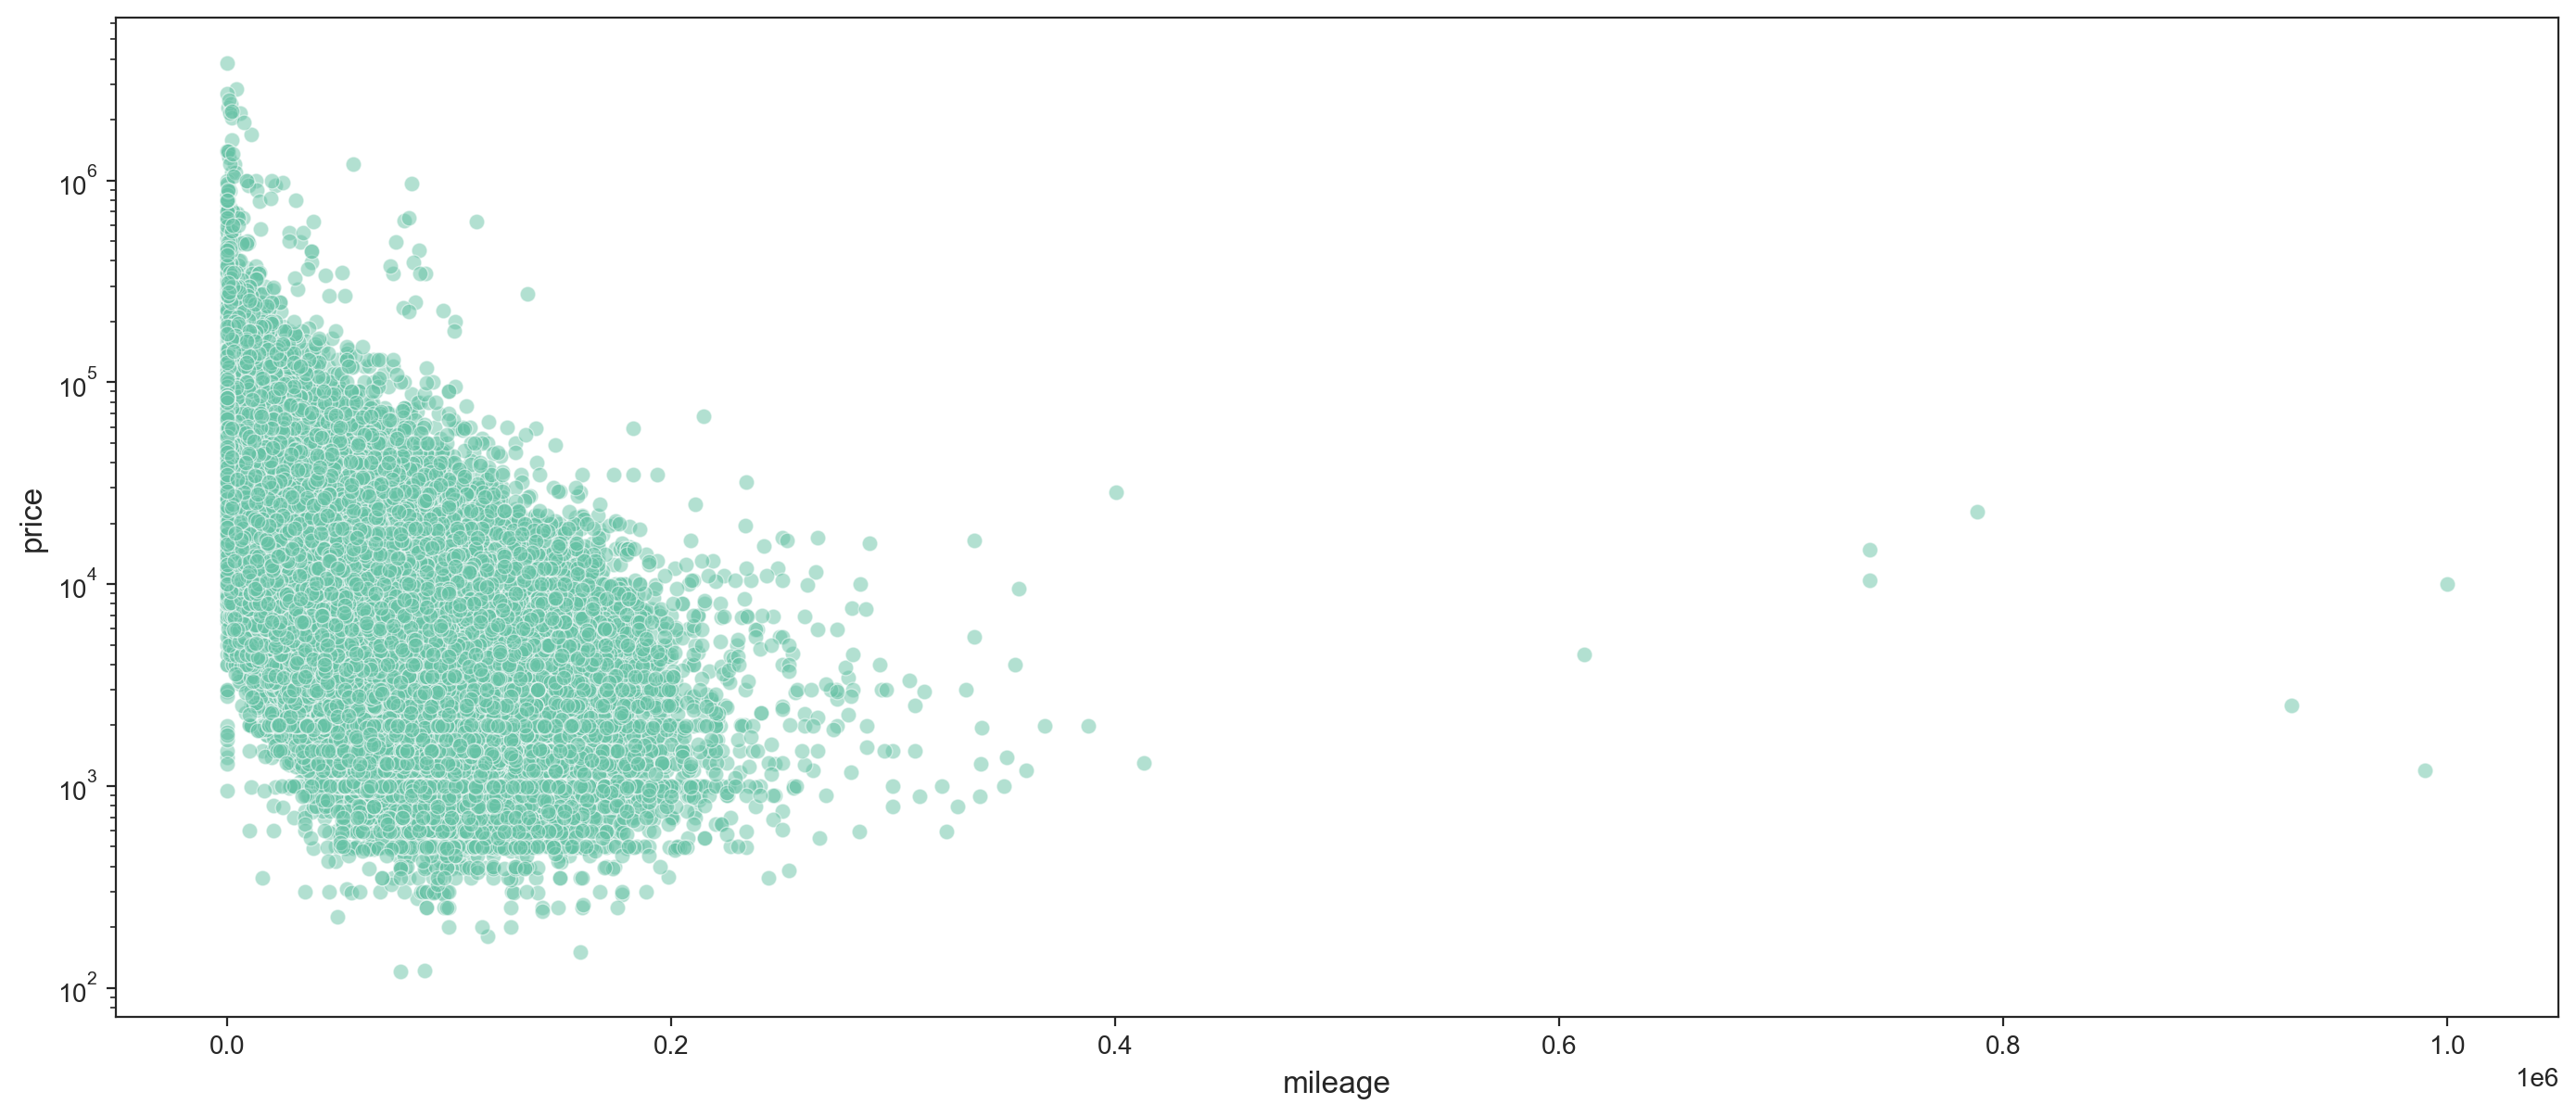

In [85]:
ax = sns.scatterplot(auto, x="mileage", y="price", alpha=0.5);
ax.set_yscale('log')

## Mileage Summary

New cars have mileage as expected. Extreme high and low values for used cars, particularly for recent (2020) cars. Need to be assessed for how realistic they are and then replaced.

---

&nbsp;
&nbsp;

# ==== Reg Code ====

Reg codes by year:

| Year of Release | 1st Half Plate Numbers | 2nd Half Plate Numbers |
| --------------- | ------------------------------------------------ | ---------------------------------------------------------- |
| 2024/25         | 24                                               | 74                                                         |
| 2023/24         | 23                                               | 73                                                         |
| 2022/23         | 22                                               | 72                                                         |
| 2021/22         | 21                                               | 71                                                         |
| 2020/21         | 20                                               | 70                                                         |
| 2019/20         | 19                                               | 69                                                         |
| 2018/19         | 18                                               | 68                                                         |
| 2017/18         | 17                                               | 67                                                         |
| 2016/17         | 16                                               | 66                                                         |
| 2015/16         | 15                                               | 65                                                         |
| 2014/15         | 14                                               | 64                                                         |
| 2013/14         | 13                                               | 63                                                         |
| 2012/13         | 12                                               | 62                                                         |
| 2011/12         | 11                                               | 61                                                         |
| 2010/11         | 10                                               | 60                                                         |
| 2009/10         | 09                                               | 59                                                         |
| 2008/09         | 08                                               | 58                                                         |
| 2007/08         | 07                                               | 57                                                         |
| 2006/07         | 06                                               | 56                                                         |
| 2005/06         | 05                                               | 55                                                         |
| 2004/05         | 04                                               | 54                                                         |
| 2003/04         | 03                                               | 53                                                         |
| 2002/03         | 02                                               | 52                                                         |
| 2001/02         | 01                                               | 51                                                         |
| 2001            | Y                                                | Y                                                          |
| 2000            | X                                                | X                                                          |
| 2000            | W                                                | W                                                          |
| 1999            | T                                                | T                                                          |
| 1999            | V                                                | V                                                          |
| 1998            | S                                                | S                                                          |
| 1997            | R                                                | R                                                          |
| 1996            | P                                                | P                                                          |
| 1995            | N                                                | N                                                          |
| 1994            | M                                                | M                                                          |
| 1993            | L                                                | L                                                          |
| 1992            | K                                                | K                                                          |
| 1991            | J                                                | J                                                          |
| 1990            | H                                                | H                                                          |
| 1989            | G                                                | G                                                          |
| 1988            | F                                                | F                                                          |
| 1987            | E                                                | E                                                          |
| 1986            | D                                                | D                                                          |
| 1985            | C                                                | C                                                          |
| 1984            | B                                                | B                                                          |
| 1983            | A                                                | A                                                          |
| 1982            | Y                                                | Y                                                          |
| 1981            | X                                                | X                                                          |
| 1980            | W                                                | W                                                          |
| 1979            | T                                                | T                                                          |
| 1978            | V                                                | V                                                          |
| 1977            | S                                                | S                                                          |
| 1976            | R                                                | R                                                          |
| 1975            | P                                                | P                                                          |
| 1974            | N                                                | N                                                          |
| 1973            | M                                                | M                                                          |
| 1972            | L                                                | L                                                          |
| 1971            | K                                                | K                                                          |
| 1970            | J                                                | J                                                          |
| 1969            | H                                                | H                                                          |
| 1968            | G                                                | G                                                          |
| 1967            | F                                                | F                                                          |
| 1967            | E                                                | E                                                          |
| 1966            | D                                                | D                                                          |
| 1965            | C                                                | C                                                          |
| 1964            | B                                                | B                                                          |
| 1963            | A                                                | A                                                          |


Before 1983, they used the letters as a suffix. this started in 1963 with the letter A, and ended in 1983 with Y.

Source: https://www.webuyanycar.com/free-car-check/what-year-is-my-car/

In [360]:
# Pre 1983 reg codes

old_reg = auto[(auto["year_of_registration"] < 1983) & (auto["year_of_registration"] > 1900)]

old_reg

public_reference  mileage reg_code standard_colour standard_make  \
3399     201809040153397    461.0        H           Green  Aston Martin   
5045     202010255427324  33500.0        G            Blue    Land Rover   
10044    202003098187902  73330.0        B            Gold        Jaguar   
10051    202006039749809  70489.0        P            Blue       Porsche   
10402    202008192687589  59000.0        V           White           BMW   
...                  ...      ...      ...             ...           ...   
399882   202010124915499   9000.0        K           White       Porsche   
400391   202008062165360  32000.0        M             NaN       Triumph   
400664   202006109989307   5800.0        A            Blue          Fiat   
400724   202008242879192      0.0        L          Silver       Porsche   
401128   202009203972304  36000.0        M           White   Rolls-Royce   

       standard_model vehicle_condition year_of_registration   price  \
3399              DB6              USED               1970.0  950000   
5045        Series II              USED               1969.0   15970   
10044         Mark II              USED                 1964   24990   
10051             911              USED               1976.0   39995   
10402        7 Series              USED               1980.0    6450   
...               ...               ...                  ...     ...   
399882            911              USED               1972.0  100000   
400391           Stag              USED               1974.0   12000   
400664            500              USED               1963.0    9500   
400724            911              USED               1973.0  175000   
401128  Silver Shadow              USED               1973.0    7495   

          body_type  crossover_car_and_van fuel_type reg_code_year  
3399    Convertible                  False    Petrol        1970.0  
5045         Estate                  False    Petrol        1969.0  
10044        Saloon                  False    Petrol          1964  
10051   Convertible                  False    Petrol        1976.0  
10402        Saloon                  False    Petrol        1980.0  
...             ...                    ...       ...           ...  
399882        Coupe                  False    Petrol        1972.0  
400391  Convertible                  False    Petrol        1974.0  
400664       Saloon                  False    Petrol        1963.0  
400724          NaN                  False    Petrol        1973.0  
401128       Saloon                  False    Petrol        1973.0  

[384 rows x 13 columns]

The data shows that letter codes are included for pre-1983 cars. This adds ambiguity to these codes as they repeat A-Y from 63 to 83 and then again from 83 to 2001.  

In [361]:
def is_alpha(val):
    try: return not val.isnumeric()
    except: return False

# There are 50 entries where this ambiguity prevents the year of registration from being inferred easily
len(auto[(auto['reg_code'].apply(is_alpha)) & (auto["year_of_registration"].isna())])
missing = auto[(auto['reg_code'].apply(is_alpha)) & (auto["year_of_registration"].isna())]
missing

public_reference  mileage reg_code standard_colour standard_make  \
80899    202010014455127   2000.0       CA           Green      Caterham   
166035   202010195172029   4050.0   723xuu       Turquoise     Chevrolet   

       standard_model vehicle_condition year_of_registration  price  \
80899           Seven              USED                  NaN  21995   
166035       Corvette              USED                  NaN  89990   

          body_type  crossover_car_and_van fuel_type reg_code_year  
80899   Convertible                  False    Petrol           NaN  
166035          NaN                  False    Petrol           NaN

In [362]:
# Update missing years of reg based on the reg code
def reg_to_year(reg_code):
    try:
        reg_code = int(reg_code)
        if reg_code > 71 or (50 > reg_code > 20): return np.nan
        return 2000 + reg_code%50
    
    except ValueError:
        if not isinstance(reg_code, str): return np.nan
        
        letters = "ABCDEFGHJKLMNPRSTXY"
        if reg_code == "V": return (1979, 1999)
        if reg_code == "W": return (1980, 2000)
        if reg_code not in letters: return np.nan
        return (1983 + letters.find(reg_code), 1963 + letters.find(reg_code))
       

auto["reg_code_year"] = auto["reg_code"].map(reg_to_year)
missing = auto[(auto['reg_code'].apply(is_alpha)) & (auto["year_of_registration"].isna())]

In [363]:
# For each ambiguous year visualise the distribution of years for vehicles of the same make
missing = missing.loc[missing["reg_code_year"].notna()]
full_missing = auto.loc[missing.index]

for i in range(len(full_missing)):
    missing_model = full_missing.iloc[i]["standard_model"]
    missing_make = full_missing.iloc[i]["standard_make"]
    years = full_missing.iloc[i]["reg_code_year"]
    used = auto.loc[(auto["standard_model"] == missing_model) & (auto["year_of_registration"].notna())]
    
    plt.figure(figsize=(17, 4), dpi=240)
    ax = sns.histplot(list(used["year_of_registration"]), kde=True)

    for year in years:
        plt.plot([year, year], [0, ax.dataLim.y1], label="Possible year from reg code")

    plt.title(f"Year of reg distribution for {missing_make} {missing_model} cars.");

    mean_year = np.array(used["year_of_registration"]).mean()
    closest_year = years[0] if abs(mean_year - years[0]) < abs(mean_year - years[1]) else years[1]
    print("Mean year", mean_year)
    print("Closest year:", closest_year)
    plt.legend()
    plt.show()

    auto.iat[full_missing.index[i], 12] = closest_year

In [365]:
# Replace reg_code_year values with year_of_registration values where year_of_registration is not null
auto['reg_code_year'] = auto['year_of_registration'].combine_first(auto['reg_code_year'])
# Replace year_of_registration values with reg_code_year values where year_of_registration is null
auto['year_of_registration'] = auto['year_of_registration'].combine_first(auto['reg_code_year'])

auto.loc[auto["year_of_registration"].isna()]

public_reference  mileage reg_code standard_colour standard_make  \
1510     202010054642656  13406.0      NaN           White    Land Rover   
2631     202010235350805   1000.0      NaN            Blue      Maserati   
4766     202003238706011      NaN      NaN            Grey        Subaru   
6998     202010225284269    160.0      NaN            Grey       McLaren   
7517     202009234093511  11413.0      NaN             NaN          MINI   
...                  ...      ...      ...             ...           ...   
392499   202010064681927  83555.0      NaN           Black    Land Rover   
392730   202009093528195  38796.0      NaN            Grey         Rover   
396985   202001256559400  29000.0      NaN           Black   Lamborghini   
399728   202008262969804  12812.0      NaN          Silver   Rolls-Royce   
400536   202010094805399  40523.0      NaN             Red       Peugeot   

            standard_model vehicle_condition year_of_registration   price  \
1510    Range Rover Evoque              USED                  NaN   26000   
2631               Levante              USED                  NaN   63995   
4766               Outback              USED                  NaN   35995   
6998                 Senna              USED                  NaN  699950   
7517           Convertible              USED                  NaN   14400   
...                    ...               ...                  ...     ...   
392499   Range Rover Sport              USED                  NaN   30995   
392730                 110              USED                  NaN    3150   
396985            Gallardo              USED                  NaN   77990   
399728              Wraith              USED                  NaN  159950   
400536                 108              USED                  NaN    5999   

          body_type  crossover_car_and_van fuel_type reg_code_year  
1510          Coupe                  False    Diesel           NaN  
2631            SUV                  False    Petrol           NaN  
4766         Estate                  False    Petrol           NaN  
6998          Coupe                  False    Petrol           NaN  
7517    Convertible                  False    Diesel           NaN  
...             ...                    ...       ...           ...  
392499          SUV                  False    Diesel           NaN  
392730       Saloon                  False    Petrol           NaN  
396985        Coupe                  False    Petrol           NaN  
399728        Coupe                  False    Petrol           NaN  
400536    Hatchback                  False    Petrol           NaN  

[330 rows x 13 columns]

In [366]:
notnan = auto.loc[auto["year_of_registration"].notna()]
notnan = notnan.loc[notnan["reg_code_year"].notna()]
notnan["reg_code_year"] = notnan["reg_code_year"].map(lambda f: int(f))
notnan["year_of_registration"] = notnan["year_of_registration"].map(lambda f: int(f))
mismatch = notnan.loc[abs(notnan["year_of_registration"] - notnan["reg_code_year"]) > 1]

Most of the reg codes can be mapped simply to years, however, there are cases where they disagree or the mapping is more complex. Below I identify these mismatches for known years of reg for further examination.

In [367]:
mismatch = auto.loc[mismatch.index]
mismatch.loc[mismatch["year_of_registration"] > 2000]

Empty DataFrame
Columns: [public_reference, mileage, reg_code, standard_colour, standard_make, standard_model, vehicle_condition, year_of_registration, price, body_type, crossover_car_and_van, fuel_type, reg_code_year]
Index: []

Modern cars should not have letter reg codes. This means either the year is incorrect or the registration plate does not match the usual format. This could be due to a custom or foreign reg. As such, the year of reg will be trusted and the reg_code ignored. 

In [368]:
unusual_reg = auto[(auto['reg_code'].apply(is_alpha)) & (auto["year_of_registration"] > 2001)]

unusual_reg

public_reference   mileage reg_code standard_colour  standard_make  \
2441     202009043309414  158000.0        V            Blue           Audi   
16268    202010034572199   45000.0        H            Grey     Land Rover   
24287    201909142224514   55000.0        S           Green        Daimler   
64548    202010235367626   96000.0        E            Grey     Volkswagen   
70814    202009294330268   20000.0        Y          Yellow  Mercedes-Benz   
114407   202008011962624  124000.0        M          Purple     Volkswagen   
118355   201801283171568   90000.0        m             Red     Mitsubishi   
133006   202005209439981   66000.0        M           Black        Porsche   
134313   201908281578365   36000.0        M          Yellow         Jaguar   
155766   202006140117828   86527.0        Y          Silver          Mazda   
160002   202007241640821   10966.0        P          Silver     Volkswagen   
186806   202010215261751   72000.0        P          Silver  Mercedes-Benz   
198896   202010134967280   51000.0        G           Black         Nissan   
202354   201703012815134   97000.0        L          Silver         Toyota   
229236   202007131193936   48000.0        Y          Silver           Audi   
246182   202009043329329       NaN        N             Red          Mazda   
247449   202004178975193  114220.0        H           Green          Mazda   
261801   202008182626792   32000.0        L             Red      Chevrolet   
281160   202005319681503  195668.0        P           White          Buick   
282868   202010315650479   26155.0        R           White           Audi   
293934   202010064663120   14000.0        L           Green         Lancia   
308318   202009143720330   76000.0        K          Silver          Honda   
324033   202010265450840  131000.0        N           White          Mazda   
330129   202010235356674  116000.0        P             Red            BMW   
366376   202010215267034   65000.0        A          Silver       Mitsuoka   
382625   202010124920837   76000.0        H            Blue         Nissan   
383189   202009153754914   69000.0        Y          Silver          Honda   
383211   202009193954704   68000.0        W             NaN     Mitsubishi   
401251   202010185148463   41500.0        M            Grey         Nissan   

           standard_model vehicle_condition year_of_registration   price  \
2441                   A3              USED               2017.0    1995   
16268   Range Rover Sport              USED               2017.0   37750   
24287         Super Eight              USED               2019.0   10995   
64548             Karmann              USED               2006.0   35000   
70814             G Class              USED               2014.0  149950   
114407               Golf              USED               2008.0     645   
118355                GTO              USED               2005.0    5989   
133006                911              USED               2016.0   99950   
134313             E-Type              USED               2019.0   59950   
155766               MX-5              USED               2003.0    1550   
160002               Golf              USED               2018.0    9995   
186806                SLK              USED               2009.0    1495   
198896            Elgrand              USED               2018.0   10500   
202354       Land Cruiser              USED               2006.0   16950   
229236                 TT              USED               2020.0    5500   
246182               MX-5              USED               2008.0    3795   
247449               MX-5              USED               2003.0    3750   
261801           Corvette              USED               2008.0    9500   
281160            Riviera              USED               2019.0    7500   
282868                 R8              USED               2008.0   39965   
293934              Delta              USED               2016.0   9995

In [410]:
# Sample some reg codes to investigate
sample = auto.sample()
print(format_entry(sample))
print(sample["reg_code"].values[0])

2014 Chevrolet Orlando with 38,000 miles and price £6,990
14


Some reg codes which correspond to the second half of one year have the year of registration one year later. This seems fine and the year of registration will be taken as valid in this case.

Letter registration codes introduce ambiguity as there is no delineation made between 1963-1983 letter codes (A-Y at the end of the reg) and 1983-2000 codes which reuse the same letters but at the start of the reg.

## Reg Code Summary

The reg codes are useful to impute the year of registration, beyond this they are redundant to the year and this column should be dropped before fitting. Some reg codes are ambiguous and need to be estimated based on the average year of registration of other cars of the same make. Additional information such as the mileage could also be useful to improve the imputing so something like a KNN imputer give slightly better results. A few reg codes do not fit with a known pattern, having values which put the year in the future (based on when the data was gathered) or having letters (or strings) which do not map to known year codes and as such are of no value and should be ignored.

---
&nbsp;

&nbsp;

# ==== Year of Registration ====

In [317]:
years = auto["year_of_registration"].unique()
years.sort()
years

array([ 999., 1006., 1007., 1008., 1009., 1010., 1015., 1016., 1017.,
       1018., 1063., 1515., 1909., 1933., 1934., 1950., 1952., 1954.,
       1955., 1956., 1957., 1958., 1959., 1960., 1961., 1962., 1963.,
       1964., 1965., 1966., 1967., 1968., 1969., 1970., 1971., 1972.,
       1973., 1974., 1975., 1976., 1977., 1978., 1979., 1980., 1981.,
       1982., 1983., 1984., 1985., 1986., 1987., 1988., 1989., 1990.,
       1991., 1992., 1993., 1994., 1995., 1996., 1997., 1998., 1999.,
       2000., 2001., 2002., 2003., 2004., 2005., 2006., 2007., 2008.,
       2009., 2010., 2011., 2012., 2013., 2014., 2015., 2016., 2017.,
       2018., 2019., 2020.,   nan])

In [318]:
# Some very small years, lets have a look

auto.loc[auto["year_of_registration"] < 1950].sort_values(by="year_of_registration", ascending=False)

public_reference   mileage reg_code standard_colour  standard_make  \
156562   202009264242828   48000.0       FW           Black         Morris   
28925    202006140121316   26000.0      NaN           Black         Austin   
150850   202006220401450   12345.0      NaN           Black         Austin   
148003   202010104836987   31172.0       09           Black        Hyundai   
69516    202010155035879   96659.0       65           Black           Audi   
84501    202009163810376   37771.0       63           Black          Smart   
201616   202010134937656    8600.0       68          Silver            BMW   
274622   202010024511934    6353.0       17            Blue            BMW   
120858   202010064654489   27200.0       66           Black           MINI   
387633   202010195174849   39624.0       65             Red           MINI   
190556   202010205206488   58470.0       10           Black           Fiat   
114737   202008102305925   30000.0       59             Red         Toyota   
199830   202009013167637   23000.0       59          Silver           MINI   
199987   202010225311657  104000.0       08          Silver            BMW   
59010    202006270588110   14000.0       07            Blue         Toyota   
201773   202008042076716   19000.0       57          Silver  Mercedes-Benz   
339167   202006270588115   38000.0       57           White           MINI   
374798   202008042076722   58000.0       55          Silver         Toyota   
201626   202010155037484   69346.0       64             Red          Mazda   
213059   202009304380359   54569.0       08          Silver            BMW   
334679   202010094789497  107934.0       13            Blue           Audi   

       standard_model vehicle_condition  year_of_registration  price  \
156562             10              USED                1934.0   5995   
28925           Seven              USED                1933.0   9995   
150850         Twelve              USED                1933.0  11990   
148003            i10              USED                1909.0   3950   
69516        A4 Avant              USED                1515.0  10385   
84501          fortwo              USED                1063.0   4785   
201616             M2              USED                1018.0  41990   
274622       2 Series              USED                1017.0  18990   
120858        Clubman              USED                1016.0  18990   
387633        Clubman              USED                1015.0  15290   
190556      Punto Evo              USED                1010.0   3785   
114737           AYGO              USED                1009.0   4695   
199830          Hatch              USED                1009.0   5995   
199987       1 Series              USED                1008.0   4395   
59010           Prius              USED                1007.0   7000   
201773        C Class              USED                1007.0   7295   
339167          Hatch              USED                1007.0   4795   
374798           RAV4              USED                1006.0   5994   
201626         Mazda3              USED                 999.0   8795   
213059             Z4              USED                 999.0   7999   
334679             A3              USED                 999.0   8895   

          body_type  crossover_car_and_van      fuel_type  
156562       Saloon                  False         Petrol  
28925        Saloon                  False         Petrol  
150850       Saloon                  False         Petrol  
148003    Hatchback                  False         Petrol  
69516        Estate                  False         Diesel  
84501         Coupe                  False         Petrol  
201616        Coupe                  False         Petrol  
274622  Convertible                  False         Petrol  
120858       Estate                  False         Diesel  
387633       Estate                  False         Petrol  
190556    Hatchback                  False    

Austin and Morris make sense to have years in the 1930 however, the others predate the invention of the car and 
look to be off by 1000 except the Audi A4 Avant with year 1515 and the Hyundai i10 with year 1909. Fortunately, all of them have reasonable reg_codes which can be used to impute the year. I will replace these invalid values with nan so that the reg_code function can replace them correctly.

In [319]:
# 
auto["year_of_registration"] = auto["year_of_registration"].mask(auto["year_of_registration"] < 1910)

years = auto["year_of_registration"].unique()
years.sort()
years

array([1933., 1934., 1950., 1952., 1954., 1955., 1956., 1957., 1958.,
       1959., 1960., 1961., 1962., 1963., 1964., 1965., 1966., 1967.,
       1968., 1969., 1970., 1971., 1972., 1973., 1974., 1975., 1976.,
       1977., 1978., 1979., 1980., 1981., 1982., 1983., 1984., 1985.,
       1986., 1987., 1988., 1989., 1990., 1991., 1992., 1993., 1994.,
       1995., 1996., 1997., 1998., 1999., 2000., 2001., 2002., 2003.,
       2004., 2005., 2006., 2007., 2008., 2009., 2010., 2011., 2012.,
       2013., 2014., 2015., 2016., 2017., 2018., 2019., 2020.,   nan])

<Axes: xlabel='year_of_registration'>

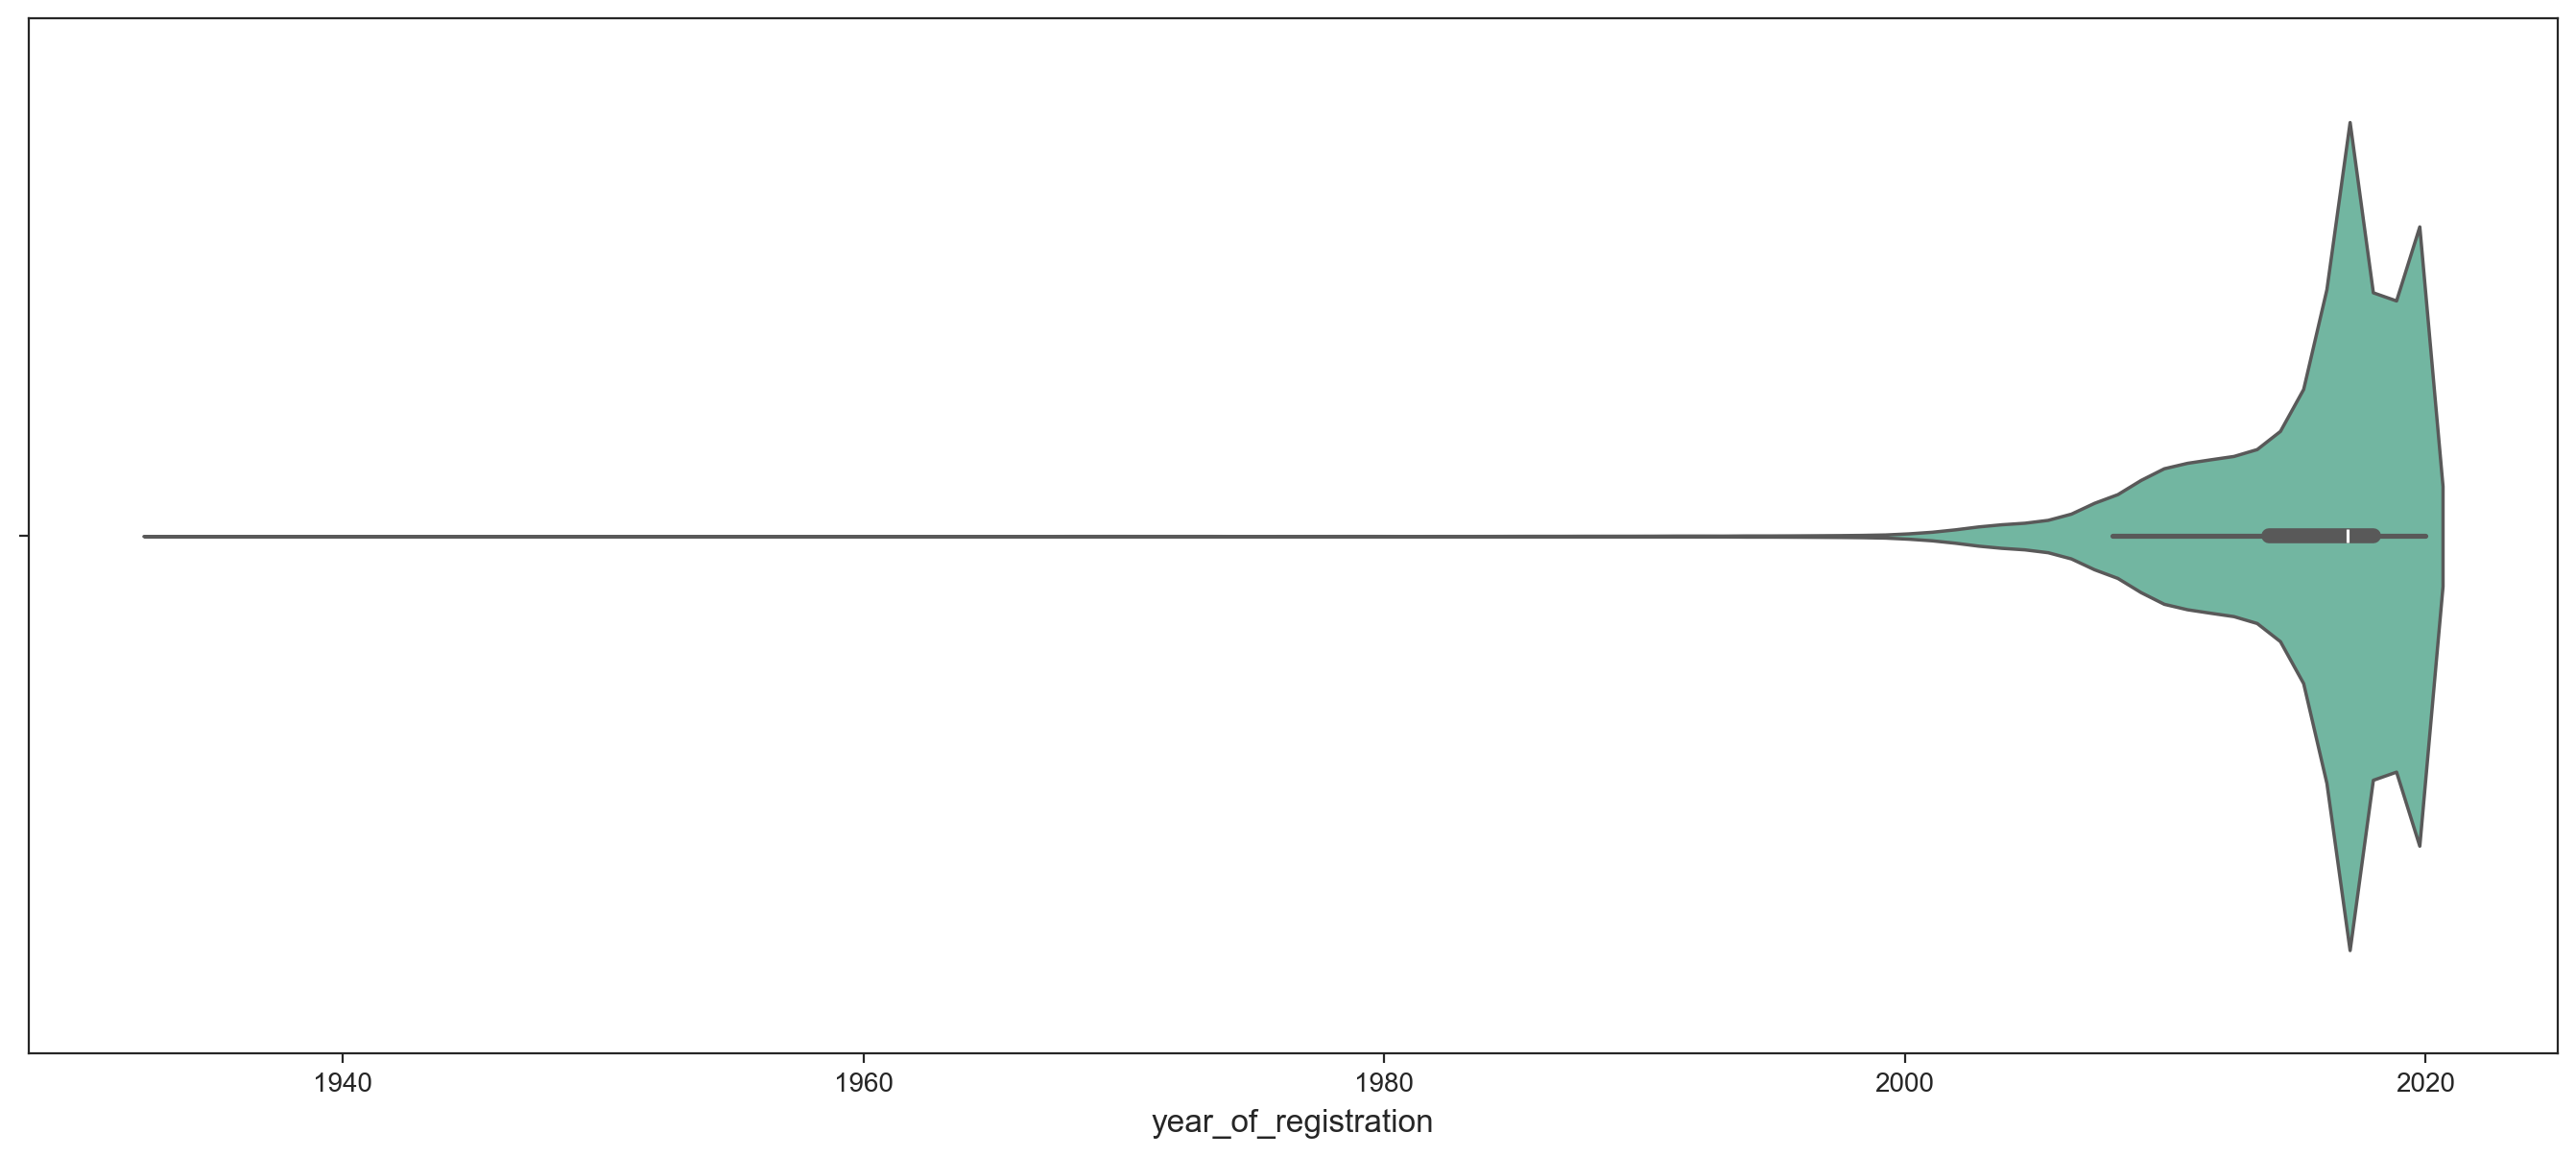

In [320]:
sns.violinplot(auto, x="year_of_registration")

## Null Values

In [321]:
print(f"There are {len(auto["year_of_registration"].isna())} null values for year of reg.")
print(f"There are {len(auto.loc[(auto["year_of_registration"].isna()) & (auto["reg_code"].isna())])} null values for year of reg with no corresponding reg code.")

There are 402005 null values for year of reg.
There are 321 null values for year of reg with no corresponding reg code.


A large number of the missing years have reg codes which can be used ot fill in the gaps however, there are still 31570 nulls.

In [322]:
# All missing year entries
auto.loc[(auto["year_of_registration"].isna()) & (auto["reg_code"].isna())]

public_reference  mileage reg_code standard_colour standard_make  \
1510     202010054642656  13406.0      NaN           White    Land Rover   
2631     202010235350805   1000.0      NaN            Blue      Maserati   
4766     202003238706011      NaN      NaN            Grey        Subaru   
6998     202010225284269    160.0      NaN            Grey       McLaren   
7517     202009234093511  11413.0      NaN             NaN          MINI   
...                  ...      ...      ...             ...           ...   
392499   202010064681927  83555.0      NaN           Black    Land Rover   
392730   202009093528195  38796.0      NaN            Grey         Rover   
396985   202001256559400  29000.0      NaN           Black   Lamborghini   
399728   202008262969804  12812.0      NaN          Silver   Rolls-Royce   
400536   202010094805399  40523.0      NaN             Red       Peugeot   

            standard_model vehicle_condition  year_of_registration   price  \
1510    Range Rover Evoque              USED                   NaN   26000   
2631               Levante              USED                   NaN   63995   
4766               Outback              USED                   NaN   35995   
6998                 Senna              USED                   NaN  699950   
7517           Convertible              USED                   NaN   14400   
...                    ...               ...                   ...     ...   
392499   Range Rover Sport              USED                   NaN   30995   
392730                 110              USED                   NaN    3150   
396985            Gallardo              USED                   NaN   77990   
399728              Wraith              USED                   NaN  159950   
400536                 108              USED                   NaN    5999   

          body_type  crossover_car_and_van fuel_type  
1510          Coupe                  False    Diesel  
2631            SUV                  False    Petrol  
4766         Estate                  False    Petrol  
6998          Coupe                  False    Petrol  
7517    Convertible                  False    Diesel  
...             ...                    ...       ...  
392499          SUV                  False    Diesel  
392730       Saloon                  False    Petrol  
396985        Coupe                  False    Petrol  
399728        Coupe                  False    Petrol  
400536    Hatchback                  False    Petrol  

[321 rows x 12 columns]

Many of these cars with missing years are new. New cars have likely not been registered yet but as they are new we can fill in the current year (as of when the data was collected, 2020) for the year_of_registration.

In [323]:
# Not new missing year entries
auto.loc[(auto["year_of_registration"].isna()) & (auto["reg_code"].isna()) & (auto["vehicle_condition"] != "NEW")].sort_values(by="price")

public_reference   mileage reg_code standard_colour standard_make  \
185690   202009244151758  134000.0      NaN            Blue      Vauxhall   
23752    202010024491962  110000.0      NaN           Beige           BMW   
246942   202009284314499  163000.0      NaN          Silver    Land Rover   
71508    202010064666671  171000.0      NaN            Blue      Chrysler   
324667   202010134929324   73897.0      NaN            Grey         Honda   
...                  ...       ...      ...             ...           ...   
252505   202008112331147   46300.0      NaN            Blue       Ferrari   
336202   202001226429470     950.0      NaN           Black       Ferrari   
305436   201812223434109    3600.0      NaN            Grey   Lamborghini   
141833   202007050883898   87450.0      NaN             Red       Ferrari   
336536   202006180262926    4400.0      NaN           White       Porsche   

       standard_model vehicle_condition  year_of_registration    price  \
185690          Corsa              USED                   NaN     1250   
23752              X5              USED                   NaN     2250   
246942     Freelander              USED                   NaN     2486   
71508         Sebring              USED                   NaN     2495   
324667          Civic              USED                   NaN     2689   
...               ...               ...                   ...      ...   
252505            275              USED                   NaN  9999999   
336202      LaFerrari              USED                   NaN  9999999   
305436          Miura              USED                   NaN  9999999   
141833            250              USED                   NaN  9999999   
336536            959              USED                   NaN  9999999   

          body_type  crossover_car_and_van fuel_type  
185690          NaN                  False    Diesel  
23752           SUV                  False       NaN  
246942          SUV                  False    Diesel  
71508   Convertible                  False    Petrol  
324667    Hatchback                  False    Petrol  
...             ...                    ...       ...  
252505        Coupe                  False    Petrol  
336202        Coupe                  False    Petrol  
305436        Coupe                  False    Petrol  
141833        Coupe                  False    Petrol  
336536        Coupe                  False    Petrol  

[321 rows x 12 columns]

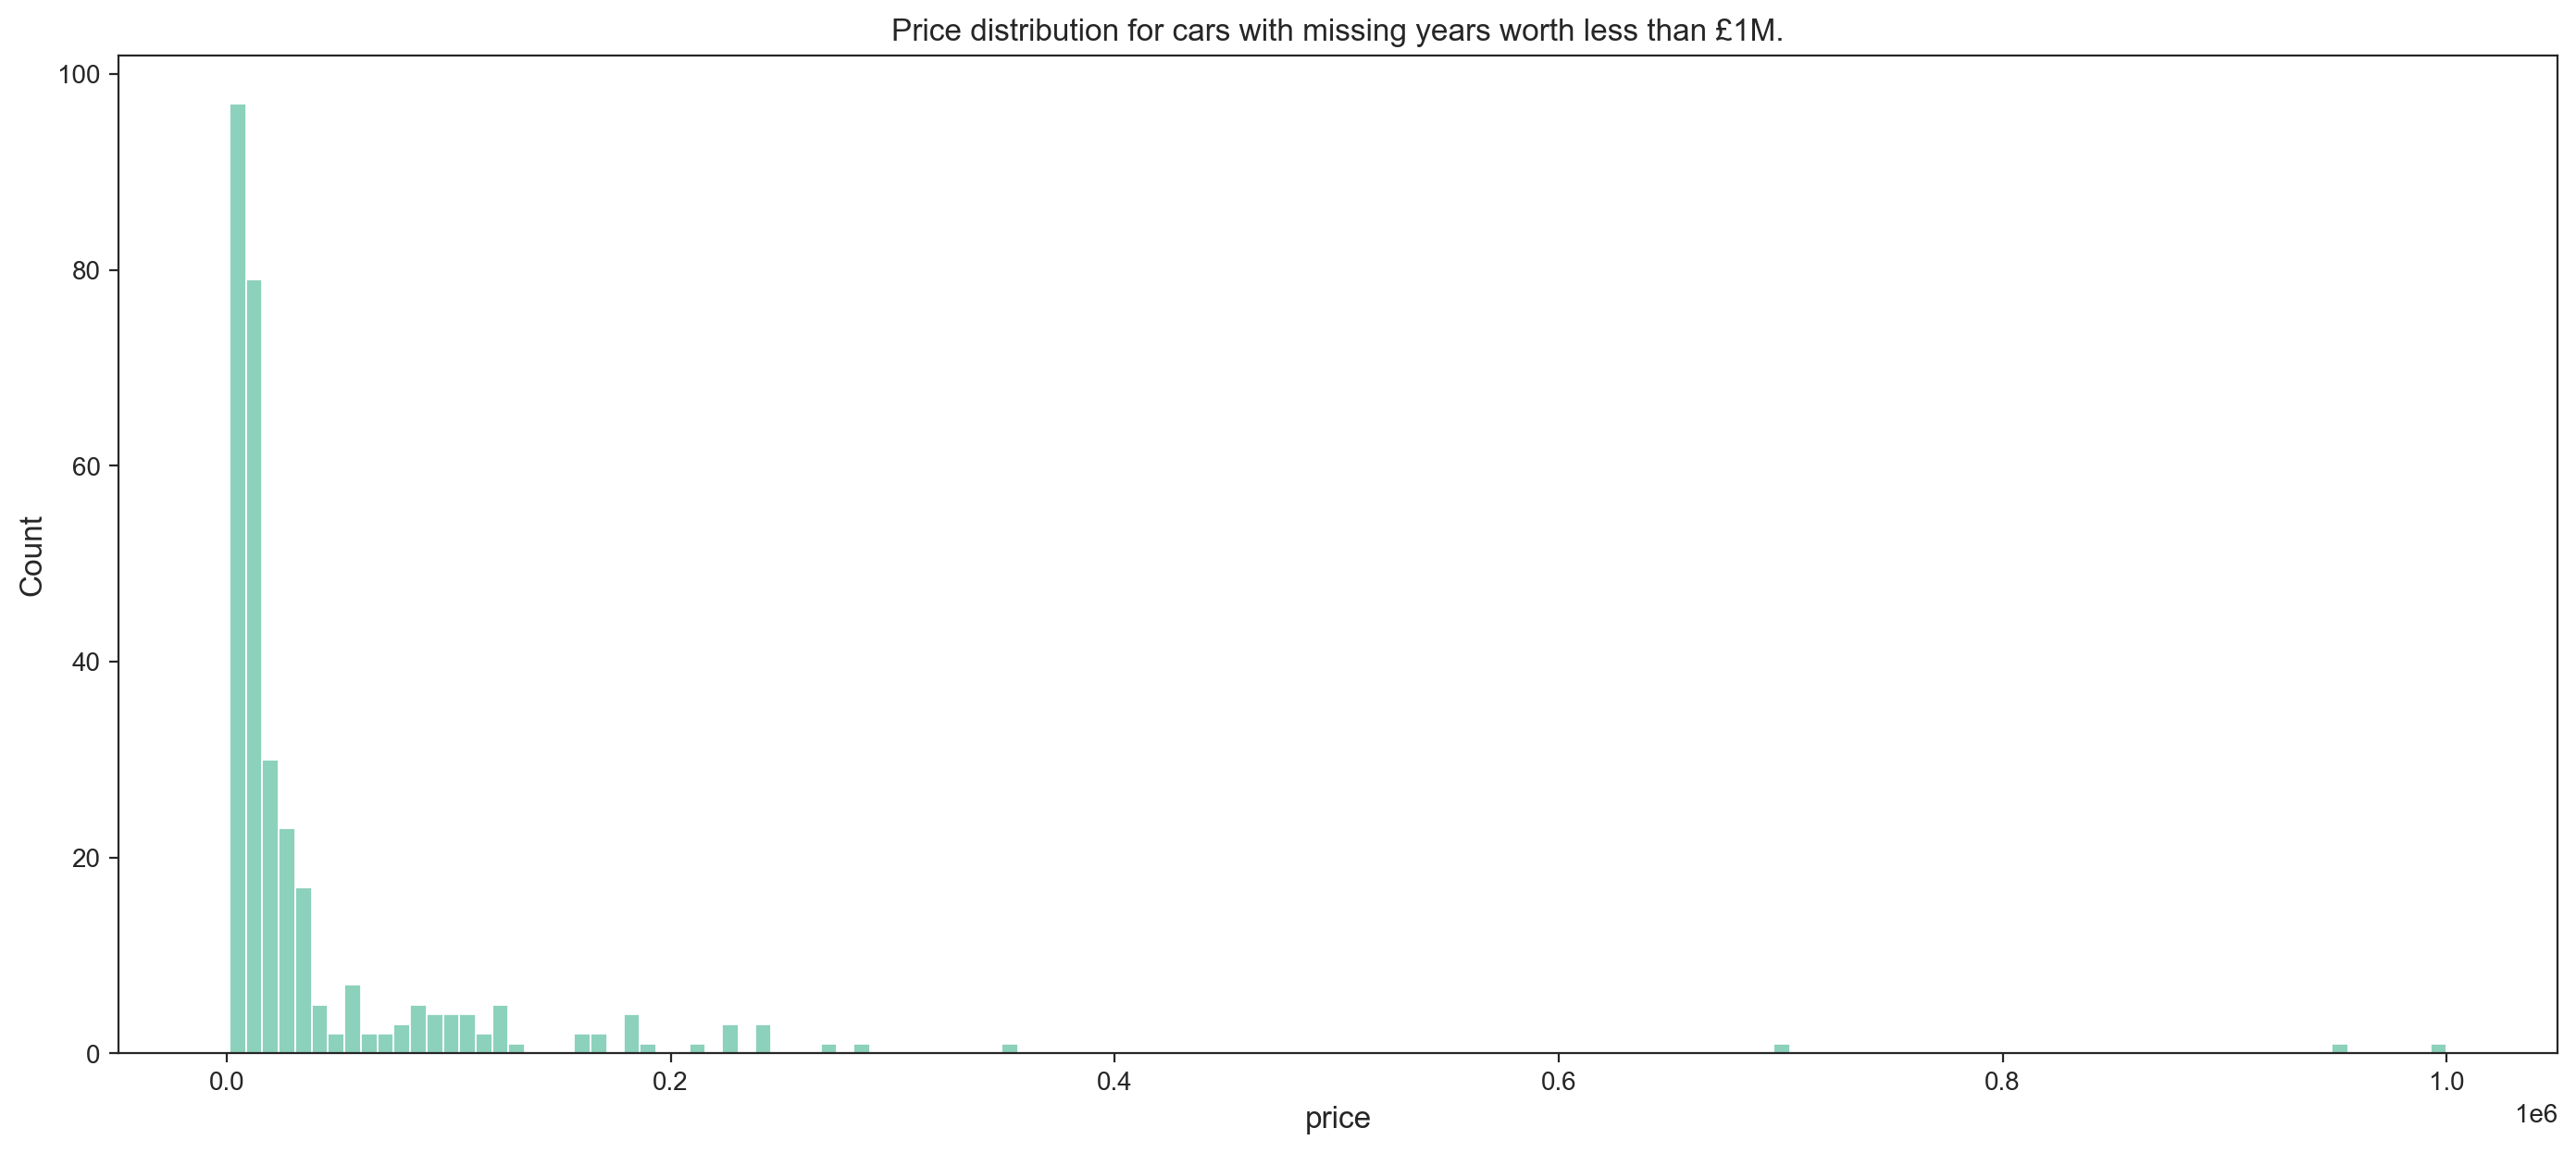

In [324]:
miss = auto.loc[(auto["year_of_registration"].isna()) & (auto["reg_code"].isna()) & (auto["vehicle_condition"] != "NEW")]
miss = miss.loc[miss["price"] < 1e6]
sns.histplot(miss, x="price")
plt.title("Price distribution for cars with missing years worth less than £1M.");

This leaves 321 entries which need to have their year of reg imputed.

---
&nbsp;

&nbsp;

# ==== Colour ====

In [42]:
print(f"Colour has {int(auto["standard_colour"].isnull().sum())} null values.")

Colour has 5378 null values.


In [118]:
auto["standard_colour"].value_counts()

standard_colour
Black          86287
White          70535
Grey           68227
Blue           59784
Silver         49323
Red            42024
Green           4534
Orange          4088
Yellow          2097
Brown           2014
Multicolour     1854
Beige           1539
Bronze          1330
Purple          1211
Gold             818
Pink             410
Turquoise        307
Maroon           159
Burgundy          63
Magenta           15
Navy               7
Indigo             1
Name: count, dtype: int64

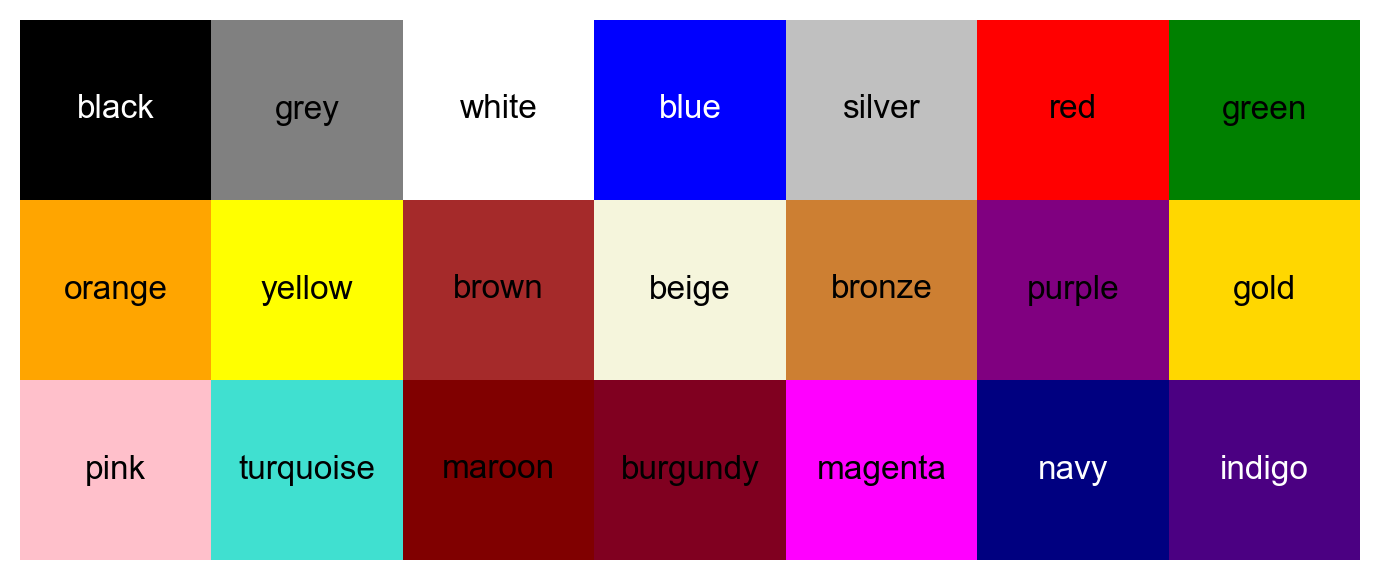

In [112]:
import matplotlib.patches as patches

# Define a 5x5 grid of colors (hex codes or named colors)
colors = [
    ["black", "grey", "white", "blue", "silver", "red", "green"],
    ["orange", "yellow", "brown", "beige", "#cd7f32", "purple", "gold"],
    ["pink", "turquoise", "maroon", "#800020", "magenta", "navy", "indigo"]
]

# Create a figure and axes
fig, ax = plt.subplots(figsize=(7, 3))

# Plot the squares
for i, row in enumerate(colors):
    for j, color in enumerate(row):
        rect = patches.Rectangle(
            (j, i), 1, 1, linewidth=0, edgecolor=None, facecolor=color
        )
        ax.add_patch(rect)
        # Add the color name in the center of the square
        if color != "#FFFFFF":
            label = color
            label_map = {"#800020": "burgundy", "#cd7f32": "bronze"}
            if color in label_map.keys():
                label = label_map[color]
            ax.text(
                j + 0.5,       # x-coordinate (center of square)
                i + 0.5,      # y-coordinate (center of square)
                label,         # Text to display
                ha="center",   # Horizontal alignment
                va="center",   # Vertical alignment
                fontsize=12,    # Font size
                color="black" if color not in ["black", "navy", "indigo", "blue"] else "white",  # Text color for contrast
            )

# Set axis limits and turn off axes
ax.set_xlim(0, 7)
ax.set_ylim(3, 0)
ax.axis("off")  # No axis lines or labels

# Show the plot
plt.tight_layout()
plt.savefig("/Users/hal/Documents/Essays/AutoML/colour_swatch.png", bbox_inches='tight', dpi=240)
plt.show()

In [156]:
auto.loc[auto["standard_colour"]=="Magenta"]

public_reference  mileage reg_code standard_colour vehicle_condition  \
27161    202010235339960  14997.0       67         Magenta              USED   
59262    202010245392634   4261.0       18         Magenta              USED   
118181   202010024504538  35868.0       18         Magenta              USED   
179561   202009143717661   7760.0       18         Magenta              USED   
226763   202010205226040   4749.0       18         Magenta              USED   
230331   202009103543496   9284.0       68         Magenta              USED   
236901   202010084770975  10083.0       19         Magenta              USED   
253766   202010285539763  21756.0       68         Magenta              USED   
257378   202010165060110  23151.0       67         Magenta              USED   
304937   202010024521738  16978.0       18         Magenta              USED   
309406   202010155041413  22320.0       67         Magenta              USED   
323809   202007181380838  18237.0       14         Magenta              USED   
331430   202010225309361   2330.0       19         Magenta              USED   
338846   202007171365647  52000.0       16         Magenta              USED   
349658   202009043320962   9694.0       68         Magenta              USED   

        year_of_registration  price    body_type  crossover_car_and_van  \
27161                 2017.0   8995    Hatchback                  False   
59262                 2018.0  10900    Hatchback                  False   
118181                2018.0   8990    Hatchback                  False   
179561                2018.0   8977    Hatchback                  False   
226763                2018.0   9250    Hatchback                  False   
230331                2018.0   9778    Hatchback                  False   
236901                2019.0   9495    Hatchback                  False   
253766                2018.0   9800    Hatchback                  False   
257378                2017.0   9689    Hatchback                  False   
304937                2018.0   8878    Hatchback                  False   
309406                2017.0   8985    Hatchback                  False   
323809                2014.0  77000  Convertible                  False   
331430                2019.0   9959    Hatchback                  False   
338846                2016.0   9990    Hatchback                  False   
349658                2018.0   9478    Hatchback                  False   

       fuel_type           make_model  
27161     Petrol           SEAT Ibiza  
59262     Petrol          Toyota AYGO  
118181    Petrol           SEAT Ibiza  
179561    Petrol          Toyota AYGO  
226763    Petrol          Toyota AYGO  
230331    Petrol          Toyota AYGO  
236901    Petrol          Toyota AYGO  
253766    Petrol          Toyota AYGO  
257378    Petrol           SEAT Ibiza  
304937    Petrol          Toyota AYGO  
309406    Petrol           Citroen C3  
323809    Petrol  Bentley Continental  
331430    Petrol          Toyota AYGO  
338846    Diesel              Audi A1  
349658    Petrol          Toyota AYGO

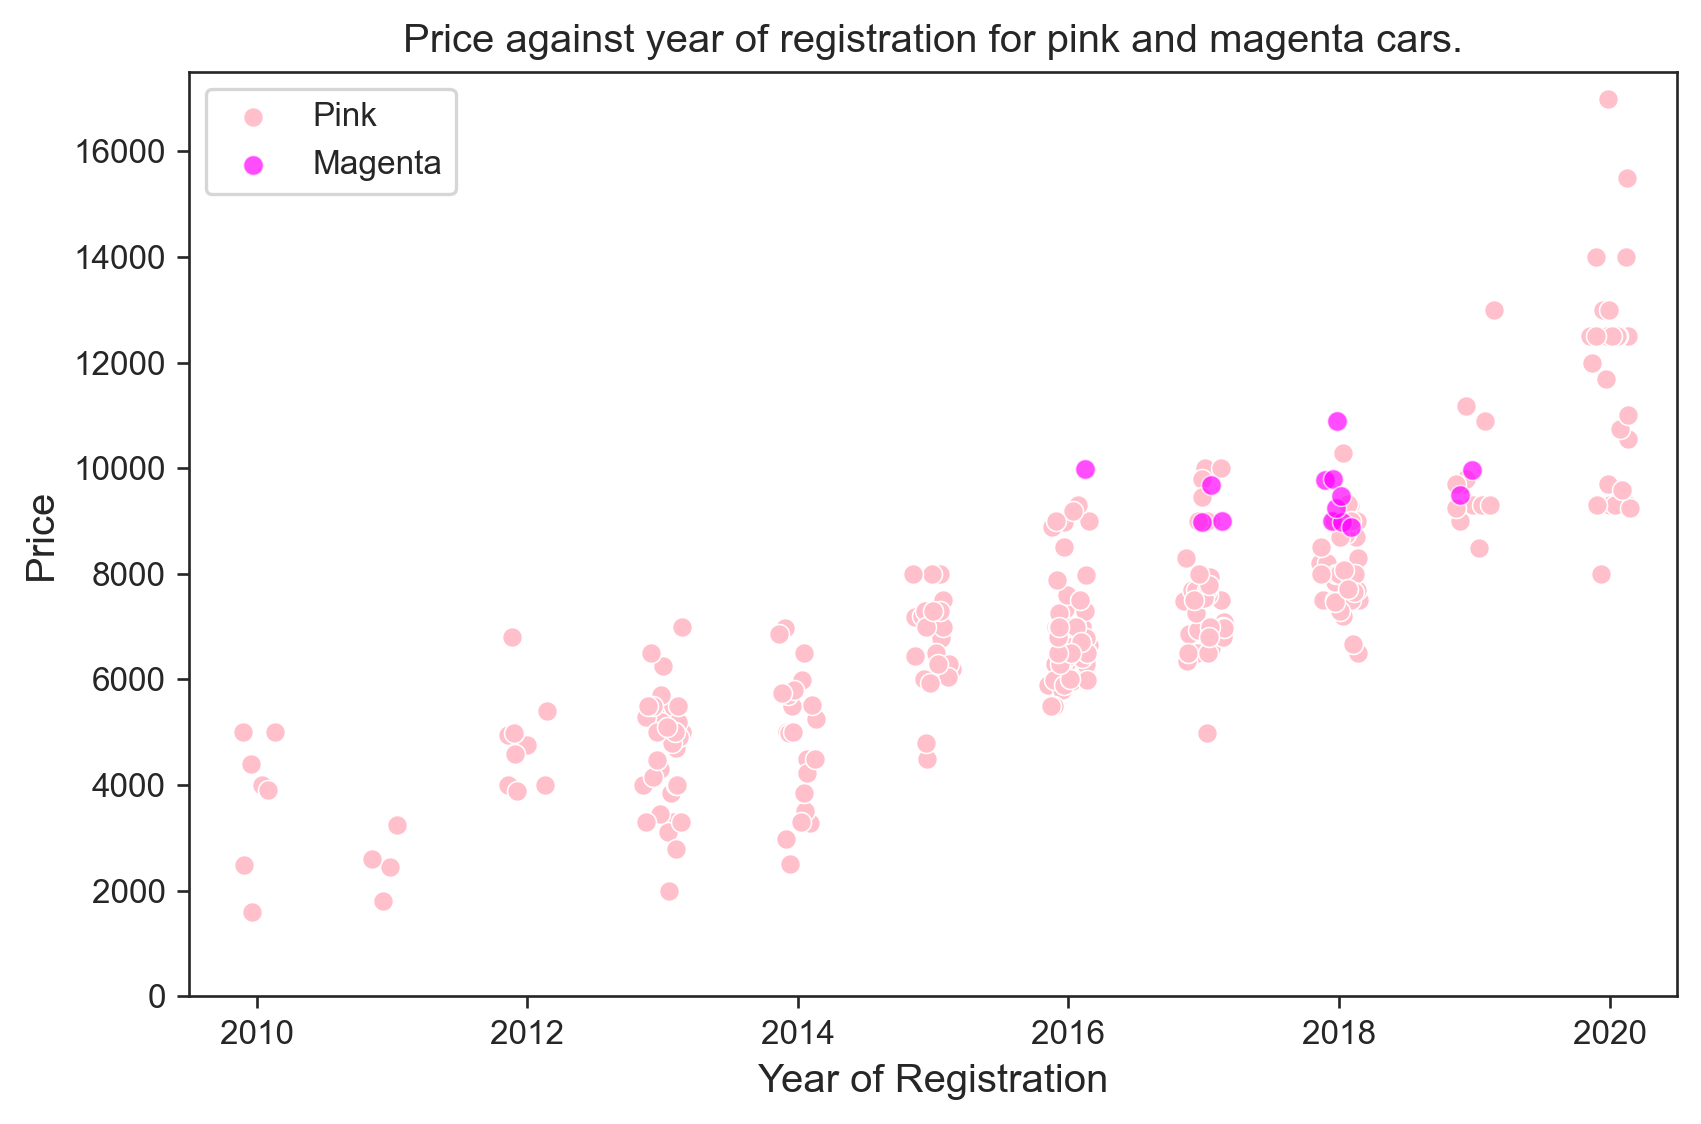

In [189]:

# Filter the data for Pink and Magenta
pink_data = auto.loc[auto["standard_colour"] == "Pink"]
magenta_data = auto.loc[auto["standard_colour"] == "Magenta"]

jitter_amount = 0.15
# Add jitter to x-values
pink_data["year_of_registration_jittered"] = pink_data["year_of_registration"] + np.random.uniform(-jitter_amount, jitter_amount, size=len(pink_data))
magenta_data["year_of_registration_jittered"] = magenta_data["year_of_registration"] + np.random.uniform(-jitter_amount, jitter_amount, size=len(magenta_data))

plt.figure(figsize=(8, 5), dpi=120)

# Create scatter plots with jittered x-values
sns.scatterplot(data=pink_data, x="year_of_registration_jittered", y="price", color="pink", label="Pink", alpha=1)
sns.scatterplot(data=magenta_data, x="year_of_registration_jittered", y="price", color="magenta", label="Magenta", alpha=0.7)

# Set limits and labels
plt.xlim(2009.5, 2020.5)
plt.ylim(0, 1.75e4)
plt.xlabel("Year of Registration")
plt.ylabel("Price")
plt.title("Price against year of registration for pink and magenta cars.")
plt.legend()

plt.savefig("/Users/hal/Documents/Essays/AutoML/price_scatter_pink_magenta.png", bbox_inches='tight', dpi=240)

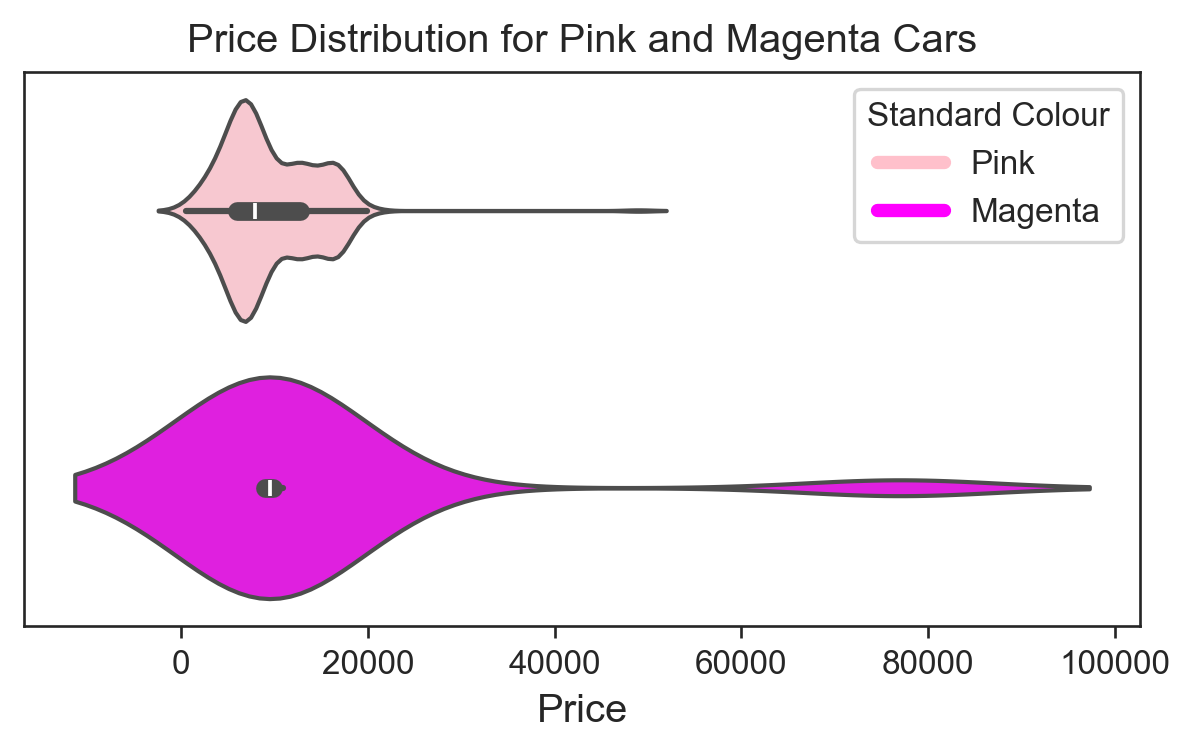

In [148]:
# Filter the data for Pink and Magenta
pink_magenta = auto[auto["standard_colour"].isin(["Pink", "Magenta"])]

plt.figure(figsize=(6, 3), dpi=120)

# Create a single boxplot, grouped by "standard_colour"
sns.violinplot(data=pink_magenta, y="standard_colour", x="price", palette={"Pink": "pink", "Magenta": "magenta"}, orient="h")

plt.yticks([])

# Add a legend
legend_elements = [
    plt.Line2D([0], [0], color="pink", lw=4, label="Pink"),
    plt.Line2D([0], [0], color="magenta", lw=4, label="Magenta")
]
plt.legend(handles=legend_elements, title="Standard Colour")

# Customize the plot
plt.title("Price Distribution for Pink and Magenta Cars")
plt.xlabel("Price")
plt.ylabel("")

plt.savefig("/Users/hal/Documents/Essays/AutoML/price_violin_pink_magenta.png", bbox_inches='tight', dpi=240)

All colours are reasonable however, some seem superfluous. For example, the 7 navy cars can be added to blue, burgundy and maroon are basically the same colour, bronze is just shiny brown so they can probably be combined, the 15 magenta ones can be added to pink and the one indigo can be added to purple.

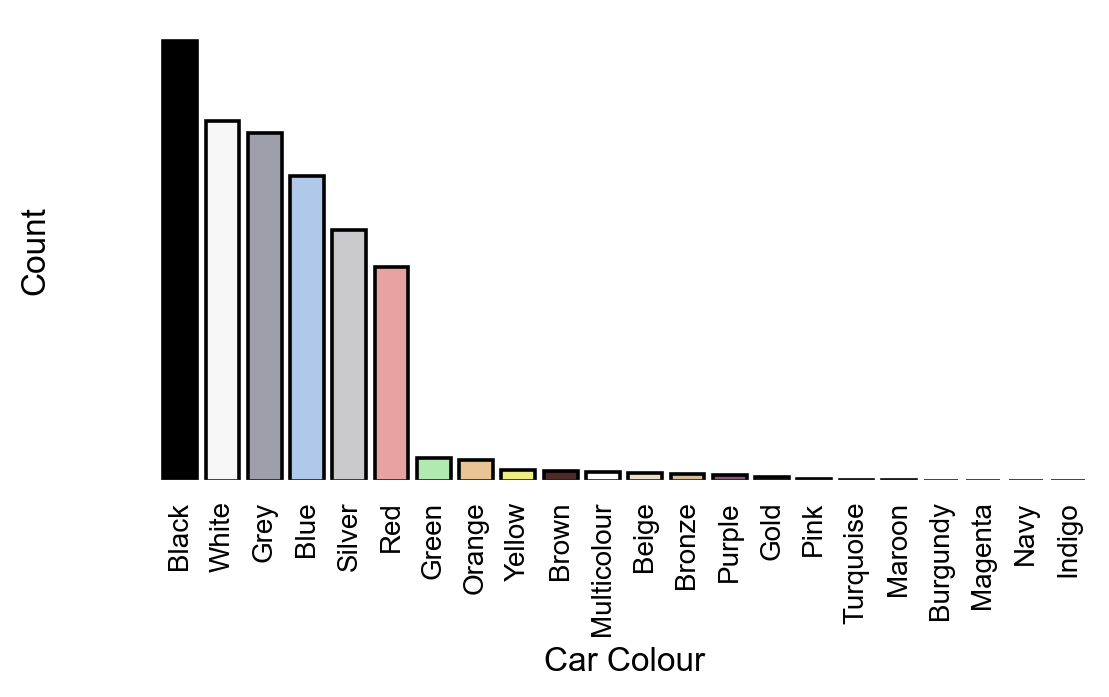

In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

# Map car colors to line colors
color_mapping = {
    "Red": "#F49696",      # Pastel red
    "Blue": "#A6C8F4",     # Pastel blue
    "Green": "#A6F4A6",    # Pastel green
    "White": "#F7F7F7",    # Light gray (near white)
    "Black": "#000000",    # Black
    "Silver": "#CACACC",   # Soft silver
    "Grey": "#9D9DAD",     # Pastel gray
    "Orange": "#F7C686",   # Pastel orange
    "Yellow": "#FFFF73", 
    "Brown": "#552222", 
    "Beige": "#EEE1C6", 
    "Bronze": "#E3BC8D",
    "Purple": "#8F5074",
    "Gold": "#593B00",
    "Pink": "#FFC1CC",
}

# Calculate counts of each color
colour_counts = auto['standard_colour'].value_counts(sort=True, ascending=False)

# Create a list of bar colors based on the `standard_colour` entries
bar_colors = [color_mapping.get(colour, "#FFFFFF") for colour in colour_counts.index]

# Create figure and axes
fig, ax = plt.subplots(figsize=(6, 3))


facecolour = "white"
# Set the face color of the figure and the axes
ax.set_facecolor(facecolour)
fig.set_facecolor(facecolour)

# Customize plot aesthetics
ax.spines['bottom'].set_color(facecolour)
ax.spines['left'].set_color(facecolour)
ax.spines['top'].set_color(facecolour)
ax.spines['right'].set_color(facecolour)
ax.xaxis.label.set_color(facecolour)
ax.yaxis.label.set_color(facecolour)
ax.tick_params(axis='both', colors=facecolour)

# Plot the bar chart with custom colors
sns.barplot(
    x=colour_counts.index, 
    y=colour_counts.values, 
    palette=bar_colors,  # Apply custom bar colors
    ax=ax,
    edgecolor=None
)

# Iterate through each bar and remove its edge color
for bar in ax.patches:
    bar.set_edgecolor("black")
    bar.set_linewidth(1.3)

# Customize labels and title
# ax.set_title("Bar Graph of Counts of Each Car Colour", color="black")
ax.set_xlabel("Car Colour", color="black")
ax.set_ylabel("Count", color="black")

# Rotate x-axis labels for better readability
plt.xticks(rotation=90, color="black")

# Save the plot
plt.savefig("/Users/hal/Documents/Essays/AutoML/colour_counts.png", bbox_inches='tight', dpi=240)
plt.show()

In [ ]:
# Calculate the total number of cars for each year
year_totals = color_year_counts.groupby('year_of_registration')['count'].sum()

# Calculate proportions
color_year_counts['proportion'] = color_year_counts.apply(
    lambda row: row['count'] / year_totals[row['year_of_registration']],
    axis=1
)

# Pivot the data to have colors as columns and years as rows
pivot_table = color_year_counts.pivot_table(
    index='year_of_registration', columns='standard_colour', values='proportion', fill_value=0
)



# Plot the data with lines colored by car color
fig, ax = plt.subplots(figsize=(12, 8))  # Create figure and axes

# Set the face color of the figure and the axes
ax.set_facecolor("#1F2225")
fig.set_facecolor("#1F2225")

ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

for color in pivot_table.columns:
    ax.plot(
        pivot_table.index, 
        pivot_table[color], 
        label=color, 
        color=color_mapping.get(color),
        linewidth=3,
    )

# Add titles and labels the plot
ax.set_title('Popularity of Top Car Colors Over Years (1995 Onward)', color="white", fontsize=16)
ax.set_xlabel('Year of Registration')
ax.set_ylabel('Proportion of Cars')
ax.legend(title='Car Color', labelcolor="white", facecolor="#1F2225", edgecolor="#1F2225");

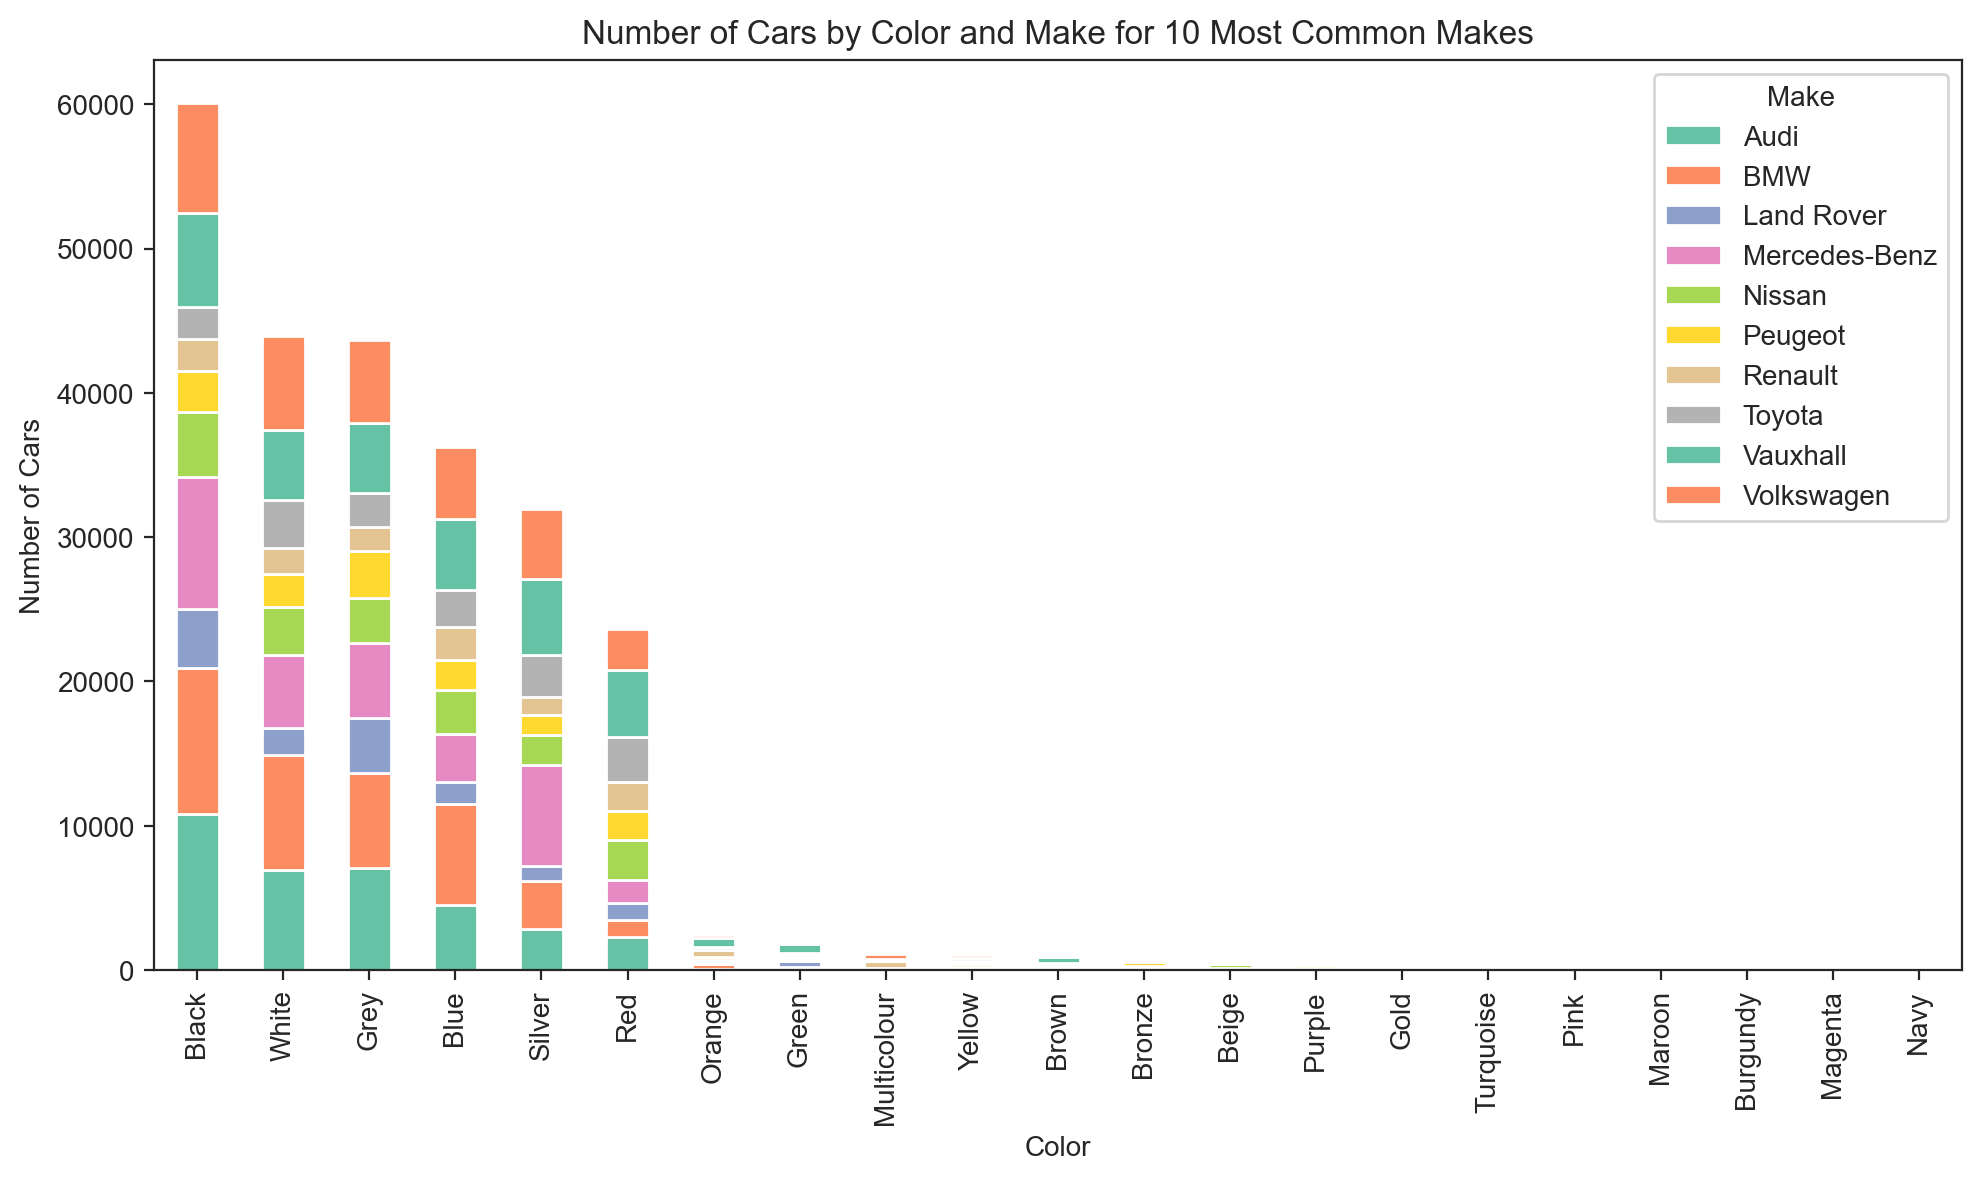

In [46]:
popular_brands = auto['standard_make'].value_counts(sort=True)[:10]

# Create a new column for only the most popular brans
auto['processed_make'] = auto['standard_make'].apply(lambda x: x if x in popular_brands else 'Other')

# Create a new dataframe with the counts of each colour for each make
counts = (
    auto.groupby(['standard_colour', 'processed_make'])
    .size()
    .reset_index(name='count')
)

# Pivot the data to get a table of counts by color and make
pivot_table = counts.pivot_table(index='standard_colour', columns='processed_make', values='count', fill_value=0)

# Calculate the total count for each processed make across all colors
column_totals = pivot_table.sum(axis=0)

# Sort columns by their total count in descending order
sorted_columns = column_totals.sort_values(ascending=False).index
pivot_table = pivot_table[sorted_columns]

# Calculate the total count for each color across all makes
row_totals = pivot_table.sum(axis=1)

# Filter out rows where the processed_make is "Other"
filtered_counts = counts[counts['processed_make'] != 'Other']

# Pivot the data to get a table of counts by color and make
pivot_table = filtered_counts.pivot_table(index='standard_colour', columns='processed_make', values='count', fill_value=0)

# Sort the rows (colors) by their total counts
row_totals = pivot_table.sum(axis=1)
sorted_rows = row_totals.sort_values(ascending=False).index
pivot_table = pivot_table.loc[sorted_rows]

# Plot the stacked bar graph without "Other" brands and sorted colors
pivot_table.plot(kind='bar', stacked=True, figsize=(10, 6))

# Customize the plot
plt.title('Number of Cars by Color and Make for 10 Most Common Makes')
plt.xlabel('Color')
plt.ylabel('Number of Cars')
plt.legend(title='Make')
plt.tight_layout()

# Show the plot
plt.show()

auto.drop(columns="processed_make")

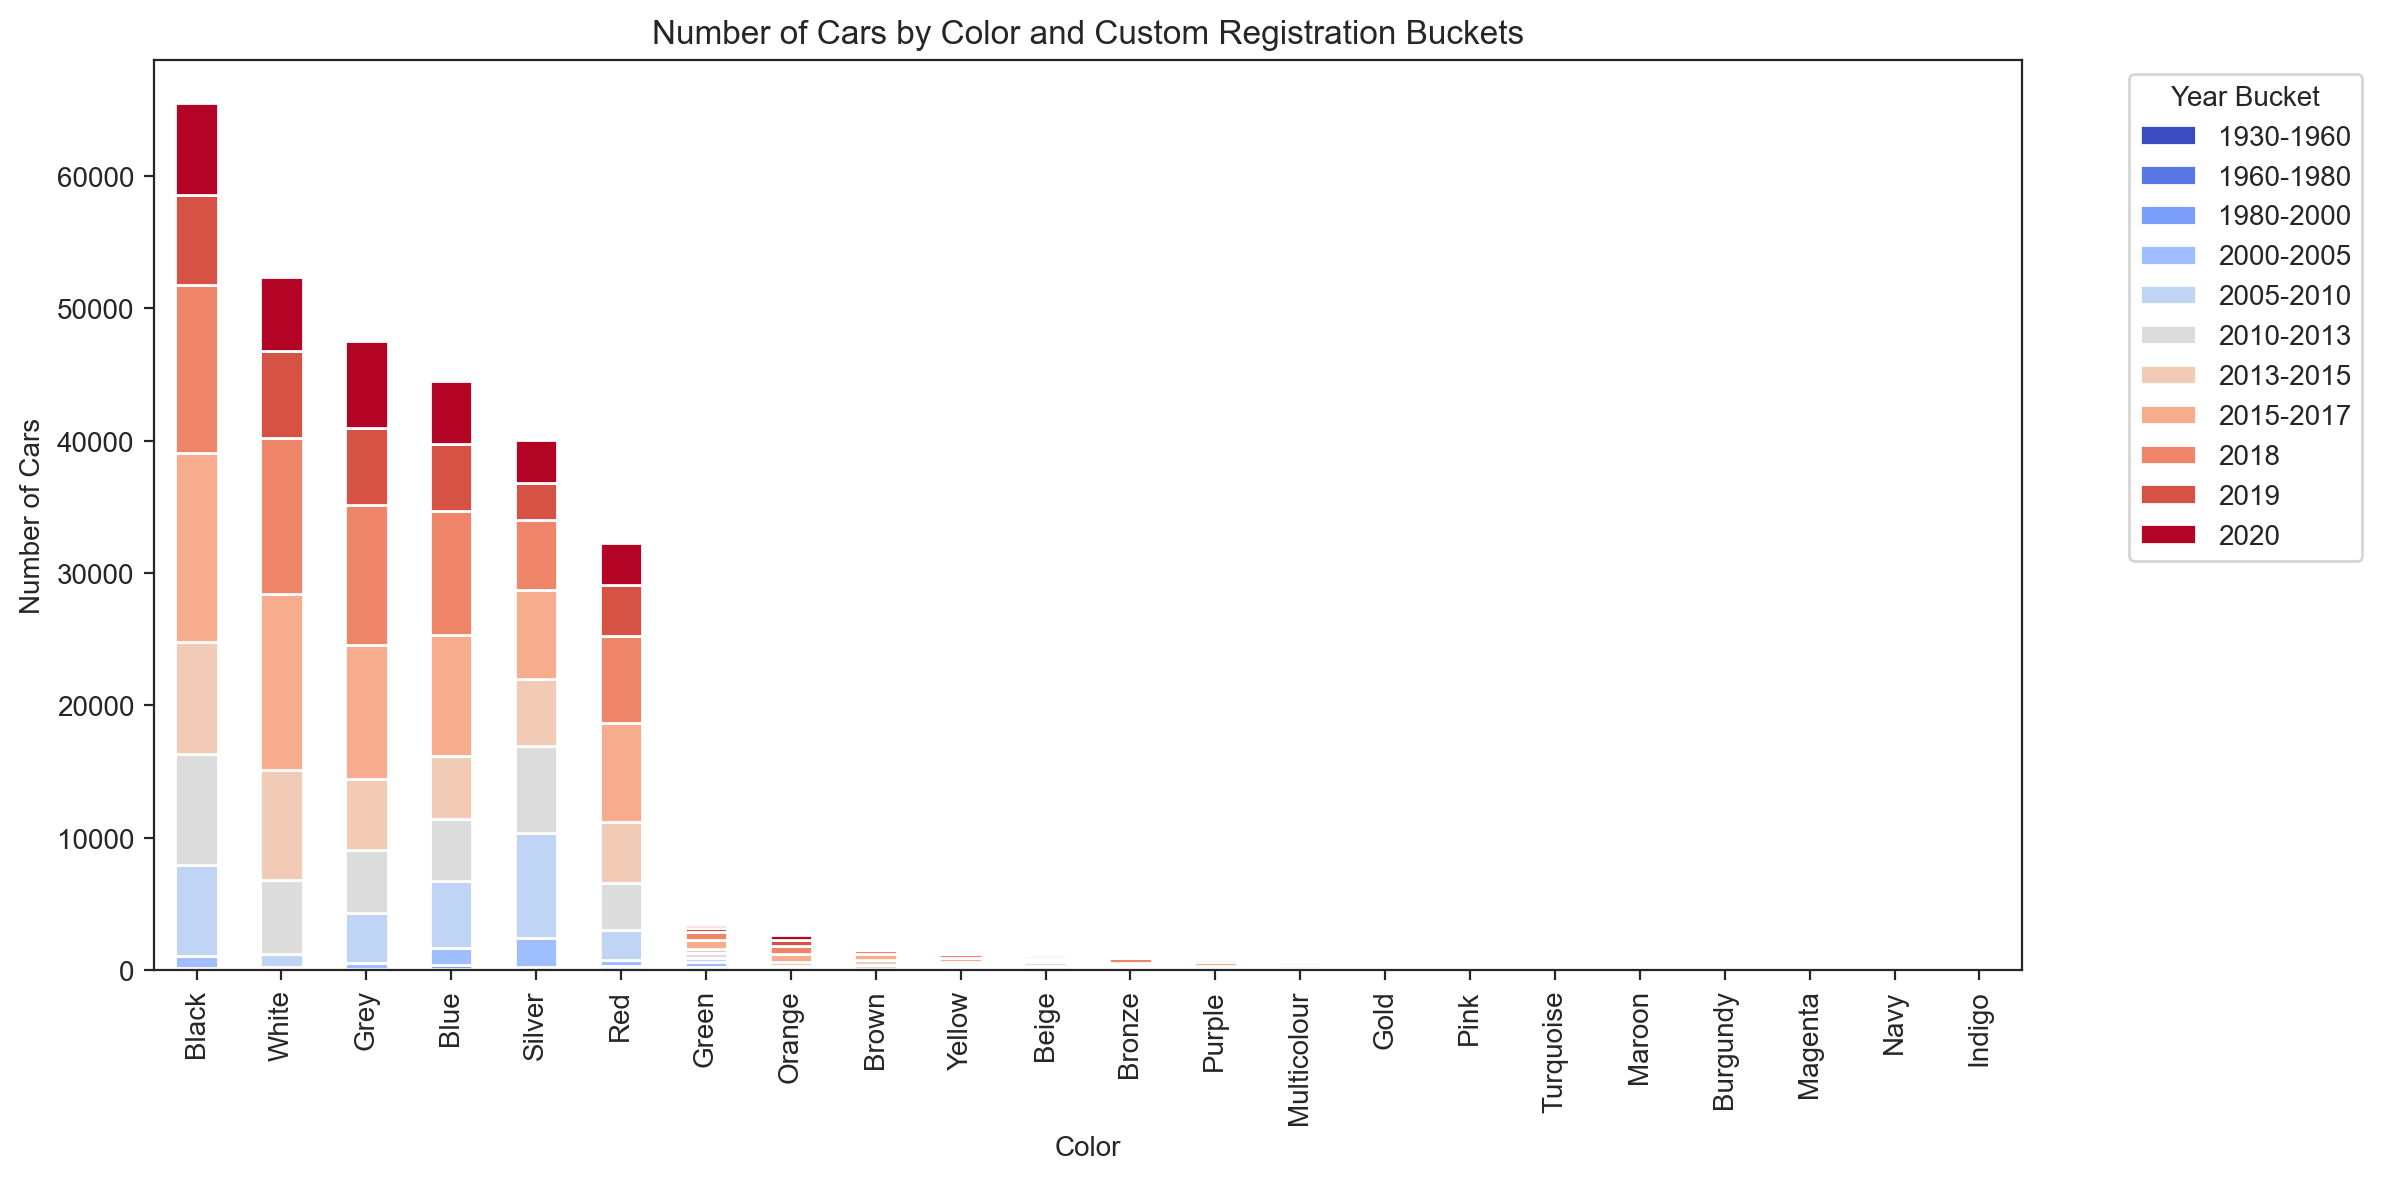

In [47]:
# Step 1: Define custom bins and labels
bins = [1930, 1960, 1980, 2000, 2005, 2010, 2013, 2015, 2017, 2018, 2019, 2020]
labels = [
    "1930-1960", "1960-1980", "1980-2000", "2000-2005", "2005-2010",
    "2010-2013", "2013-2015", "2015-2017", "2018", "2019", "2020"
]

# Assign each year to a bucket
auto['registration_bucket'] = pd.cut(auto['year_of_registration'], bins=bins, labels=labels, right=False)

# Group by color and bucket, then calculate counts
bucket_counts = (
    auto.groupby(['standard_colour', 'registration_bucket'])
    .size()
    .reset_index(name='count')
)

# Pivot the data
pivot_table_buckets = bucket_counts.pivot_table(index='standard_colour', columns='registration_bucket', values='count', fill_value=0)

# Sort rows (colors) by total counts
row_totals_buckets = pivot_table_buckets.sum(axis=1)
sorted_rows_buckets = row_totals_buckets.sort_values(ascending=False).index
pivot_table_buckets = pivot_table_buckets.loc[sorted_rows_buckets]

# Step 2: Map buckets to a red-to-blue colormap
cmap = plt.cm.coolwarm  # Choose a colormap
norm = mcolors.Normalize(vmin=0, vmax=len(labels) - 1)  # Normalize the bucket range

# Create a dictionary mapping each bucket to a color
bucket_colors = {label: cmap(norm(i)) for i, label in enumerate(labels)}

# Step 3: Plot with custom colors
ax = pivot_table_buckets.plot(kind='bar', stacked=True, figsize=(12, 6),
                              color=[bucket_colors[col] for col in pivot_table_buckets.columns])

# Customize the plot
plt.title('Number of Cars by Color and Custom Registration Buckets')
plt.xlabel('Color')
plt.ylabel('Number of Cars')
plt.legend(title='Year Bucket', bbox_to_anchor=(1.05, 1), loc='upper left', labels=labels)
plt.tight_layout()

# Show the plot
plt.show()

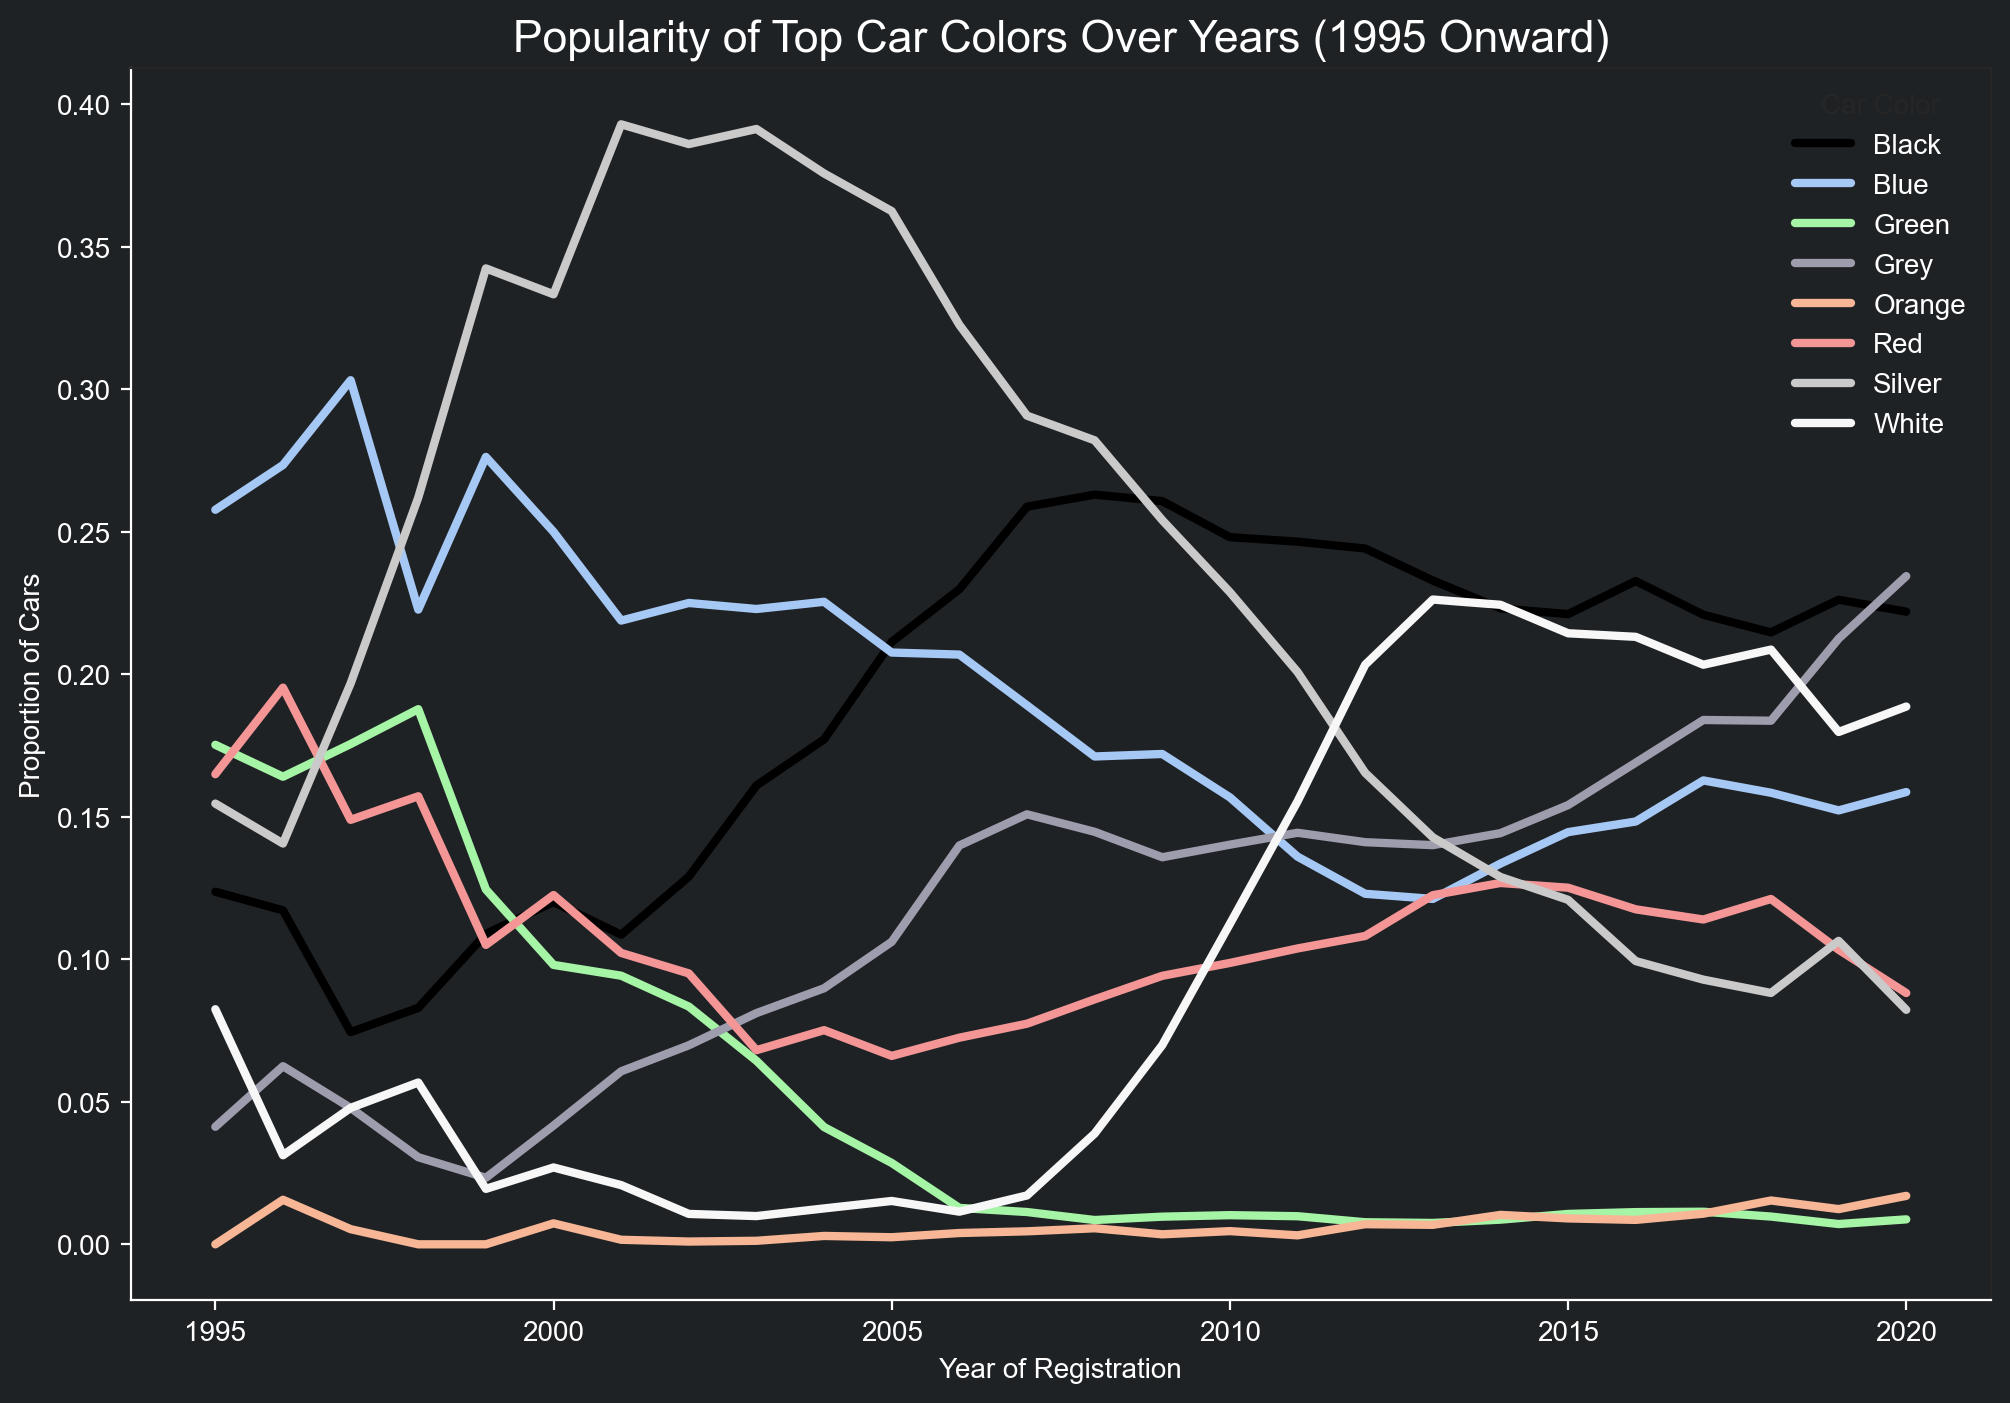

In [48]:
# Filter data for years >= 1980
filtered_auto = auto[auto['year_of_registration'] >= 1995]

# Find the 8 most popular colors 
top_colors = (
    filtered_auto['standard_colour']
    .value_counts()
    .nlargest(8)
    .index
)

# Filter data for only the top colors
filtered_auto = filtered_auto[filtered_auto['standard_colour'].isin(top_colors)]

# Group by year and color, then count
color_year_counts = (
    filtered_auto.groupby(['year_of_registration', 'standard_colour'])
    .size()
    .reset_index(name='count')
)

# Calculate the total number of cars for each year
year_totals = color_year_counts.groupby('year_of_registration')['count'].sum()

# Calculate proportions
color_year_counts['proportion'] = color_year_counts.apply(
    lambda row: row['count'] / year_totals[row['year_of_registration']],
    axis=1
)

# Pivot the data to have colors as columns and years as rows
pivot_table = color_year_counts.pivot_table(
    index='year_of_registration', columns='standard_colour', values='proportion', fill_value=0
)

# Map car colors to line colors
color_mapping = {
    "Red": "#F49696",      # Pastel red
    "Blue": "#A6C8F4",     # Pastel blue
    "Green": "#A6F4A6",    # Pastel green
    "White": "#F7F7F7",    # Light gray (near white)
    "Black": "#000000",    # Light gray for black
    "Silver": "#CACACA",   # Soft silver
    "Grey": "#9D9DAD",     # Pastel gray
    "Orange": "#F7B696",   # Pastel orange
}

# Plot the data with lines colored by car color
fig, ax = plt.subplots(figsize=(12, 8))  # Create figure and axes

# Set the face color of the figure and the axes
ax.set_facecolor("#1F2225")
fig.set_facecolor("#1F2225")

ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

for color in pivot_table.columns:
    ax.plot(
        pivot_table.index, 
        pivot_table[color], 
        label=color, 
        color=color_mapping.get(color),
        linewidth=3,
    )

# Add titles and labels the plot
ax.set_title('Popularity of Top Car Colors Over Years (1995 Onward)', color="white", fontsize=16)
ax.set_xlabel('Year of Registration')
ax.set_ylabel('Proportion of Cars')
ax.legend(title='Car Color', labelcolor="white", facecolor="#1F2225", edgecolor="#1F2225");

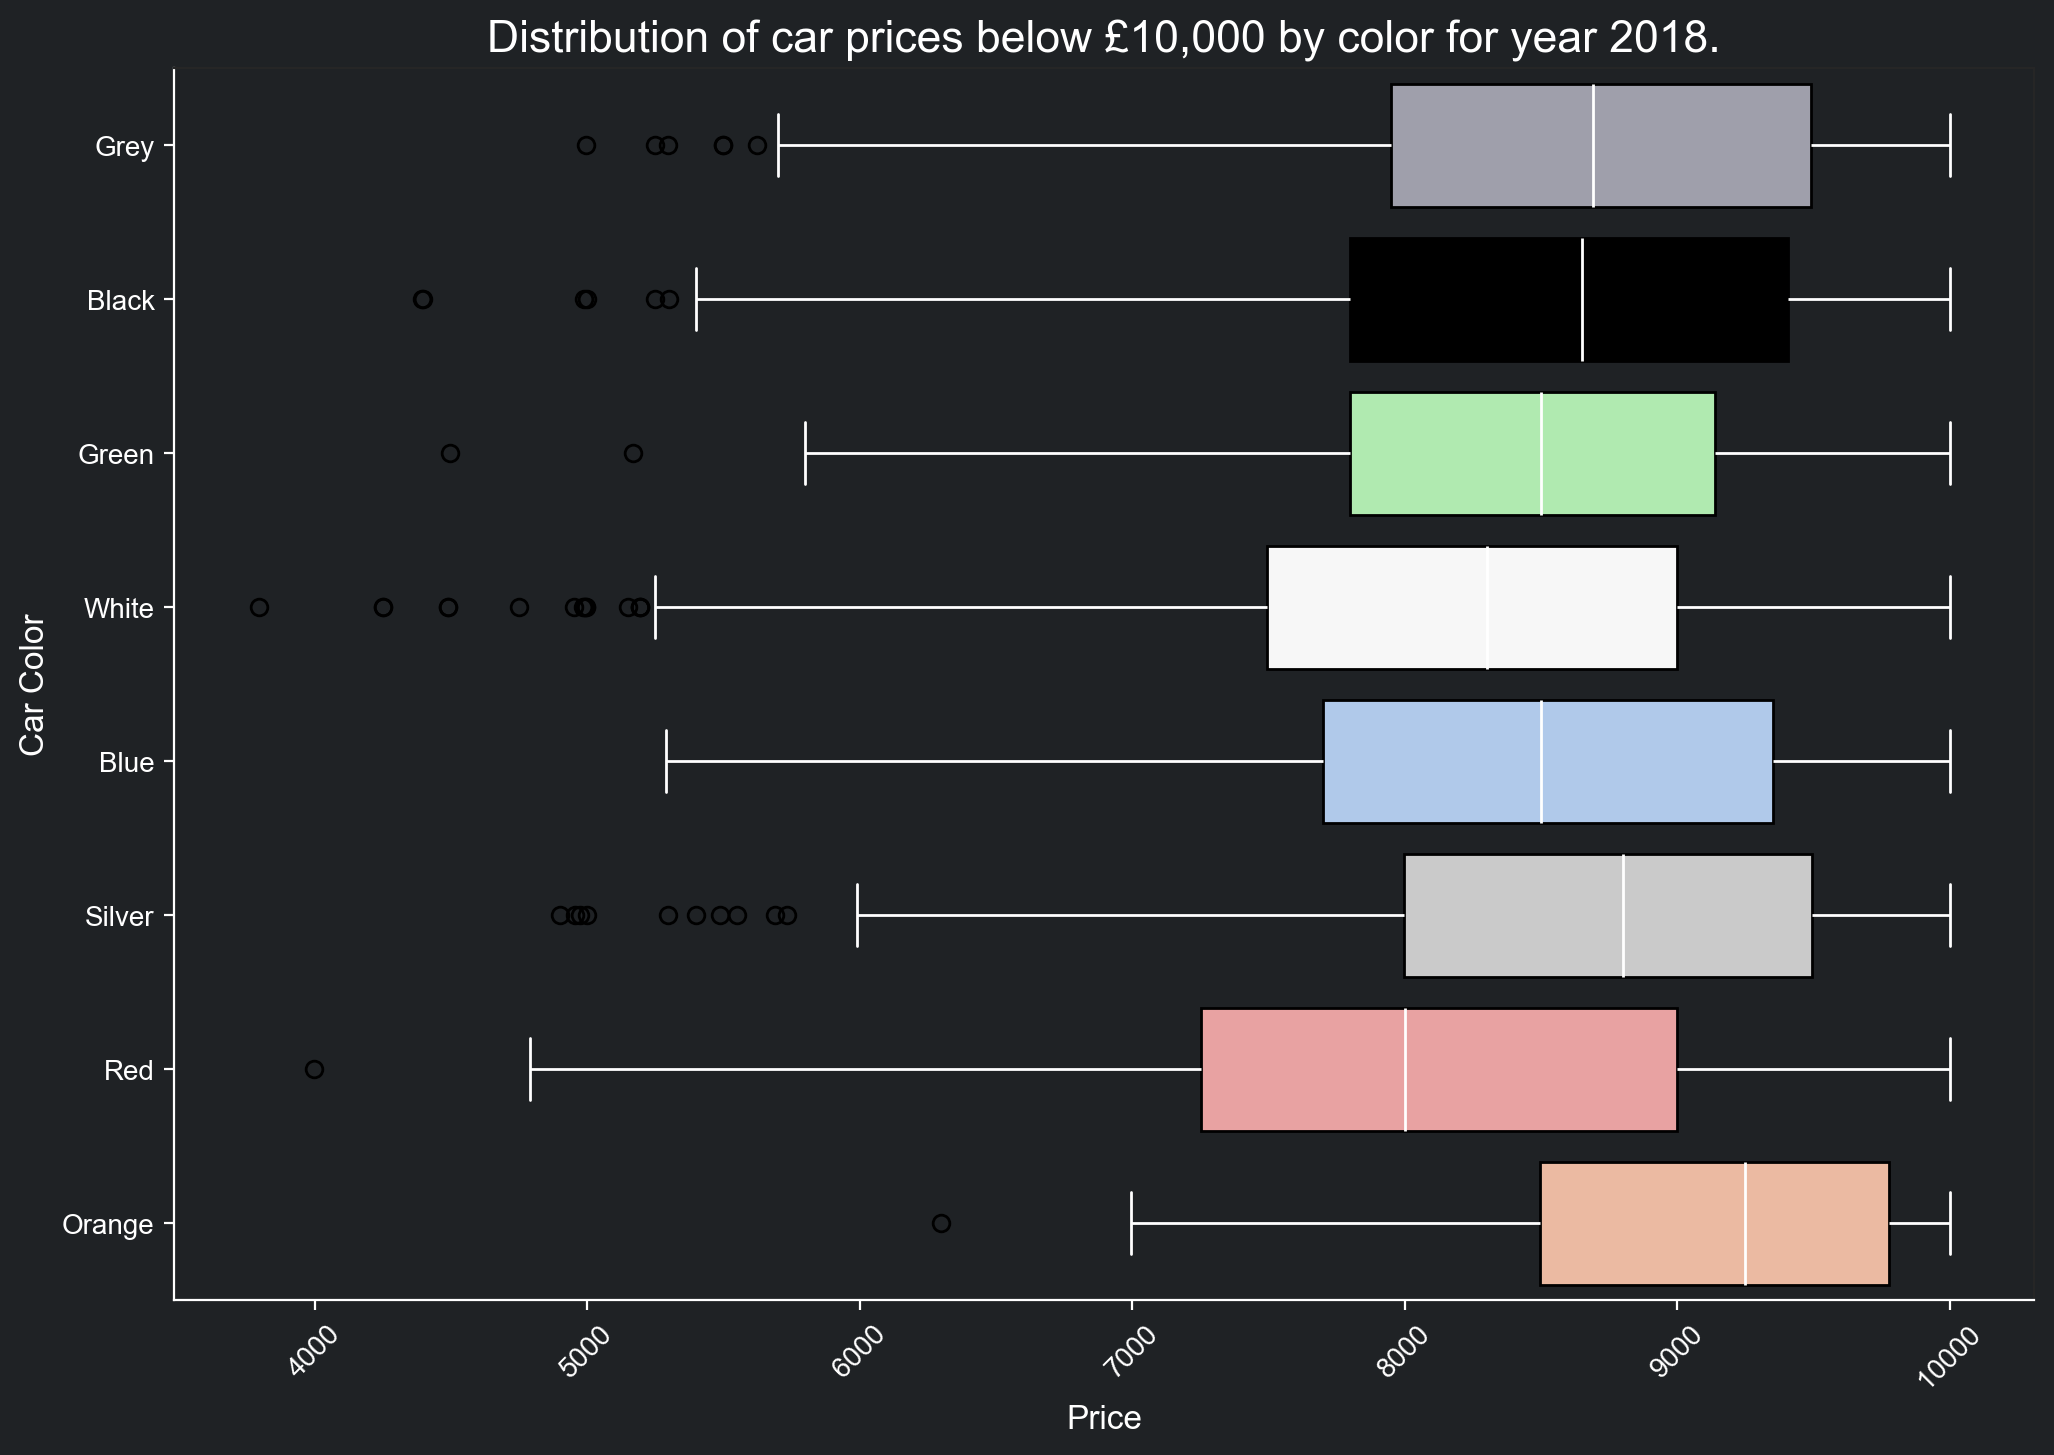

In [49]:
low_price = auto.loc[auto["price"] < 1e4]

low_price = low_price.loc[low_price["year_of_registration"] == 2018]

# Filter data for only the top colors
low_price = low_price[low_price['standard_colour'].isin(top_colors)]

# Update color_mapping for the top colors
box_palette = {color: color_mapping.get(color, "#D3D3D3") for color in top_colors}

# Plot boxplot for car prices by color
fig, ax = plt.subplots(figsize=(12, 8))  # Create figure and axes

# Set the face color of the figure and the axes
ax.set_facecolor("#1F2225")
fig.set_facecolor("#1F2225")
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')


sns.boxplot(data=low_price, y='standard_colour', x='price', palette=box_palette, orient="h")

# Customize whiskers
for line in ax.lines:  # Lines include whiskers, medians, caps, and fliers
    line.set_color('white')  # Set whisker and cap color to white
    
plt.title('Distribution of car prices below £10,000 by color for year 2018.', fontsize=16, color="white")
plt.xlabel('Price', fontsize=12)
plt.ylabel('Car Color', fontsize=12)
plt.xticks(rotation=45)
plt.show()

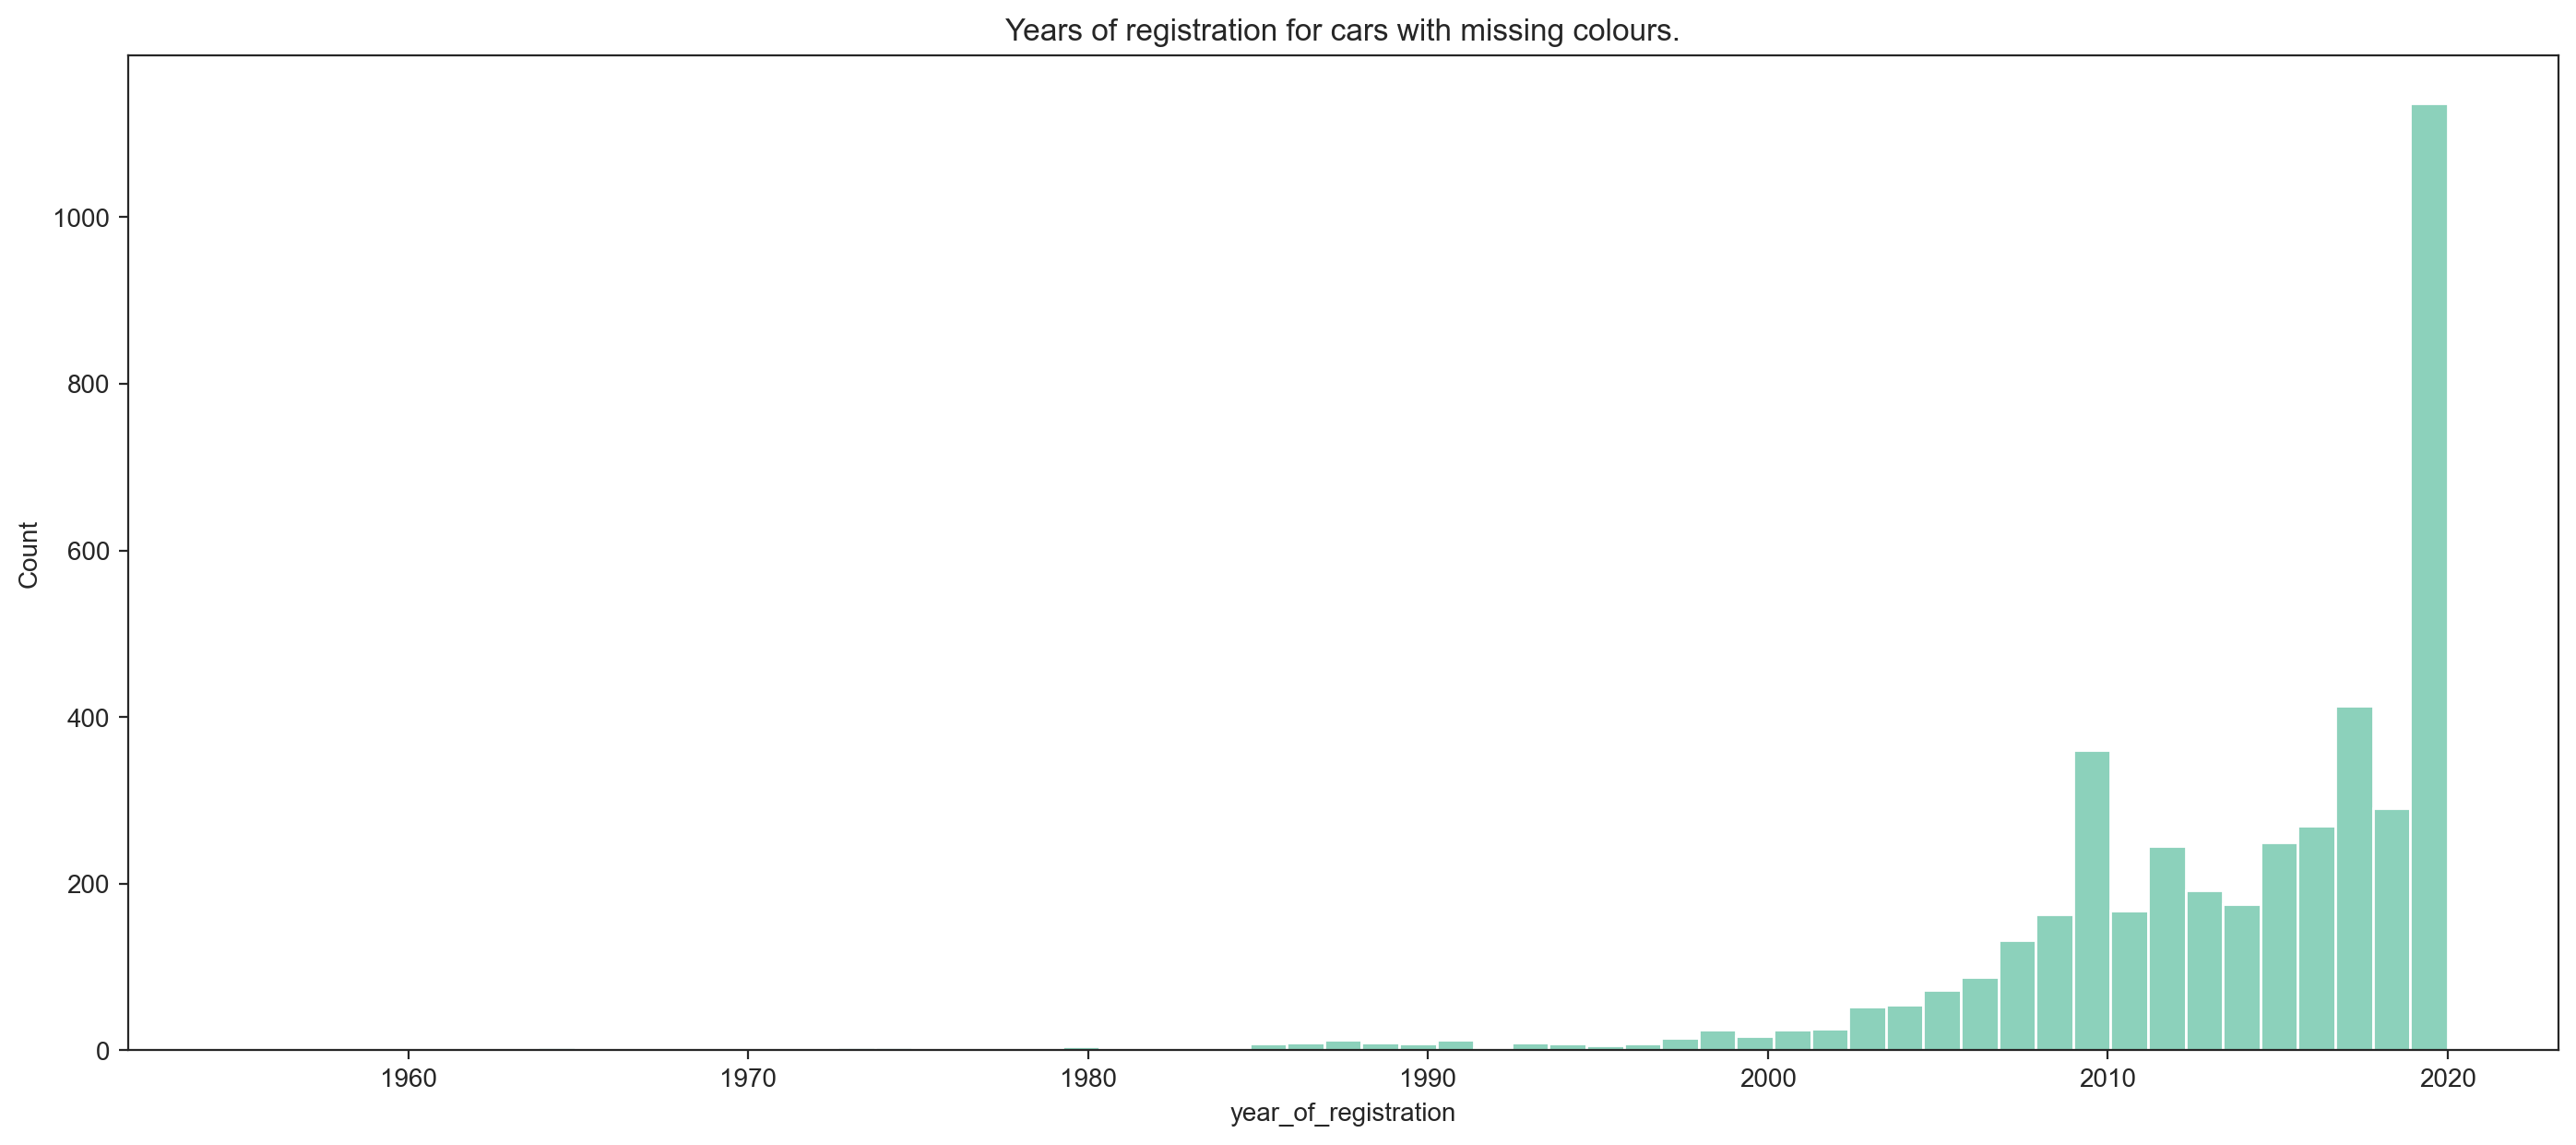

In [50]:
missing_colours = auto.loc[auto["standard_colour"].isnull()]
sns.histplot(missing_colours, x="year_of_registration");
plt.title("Years of registration for cars with missing colours.");

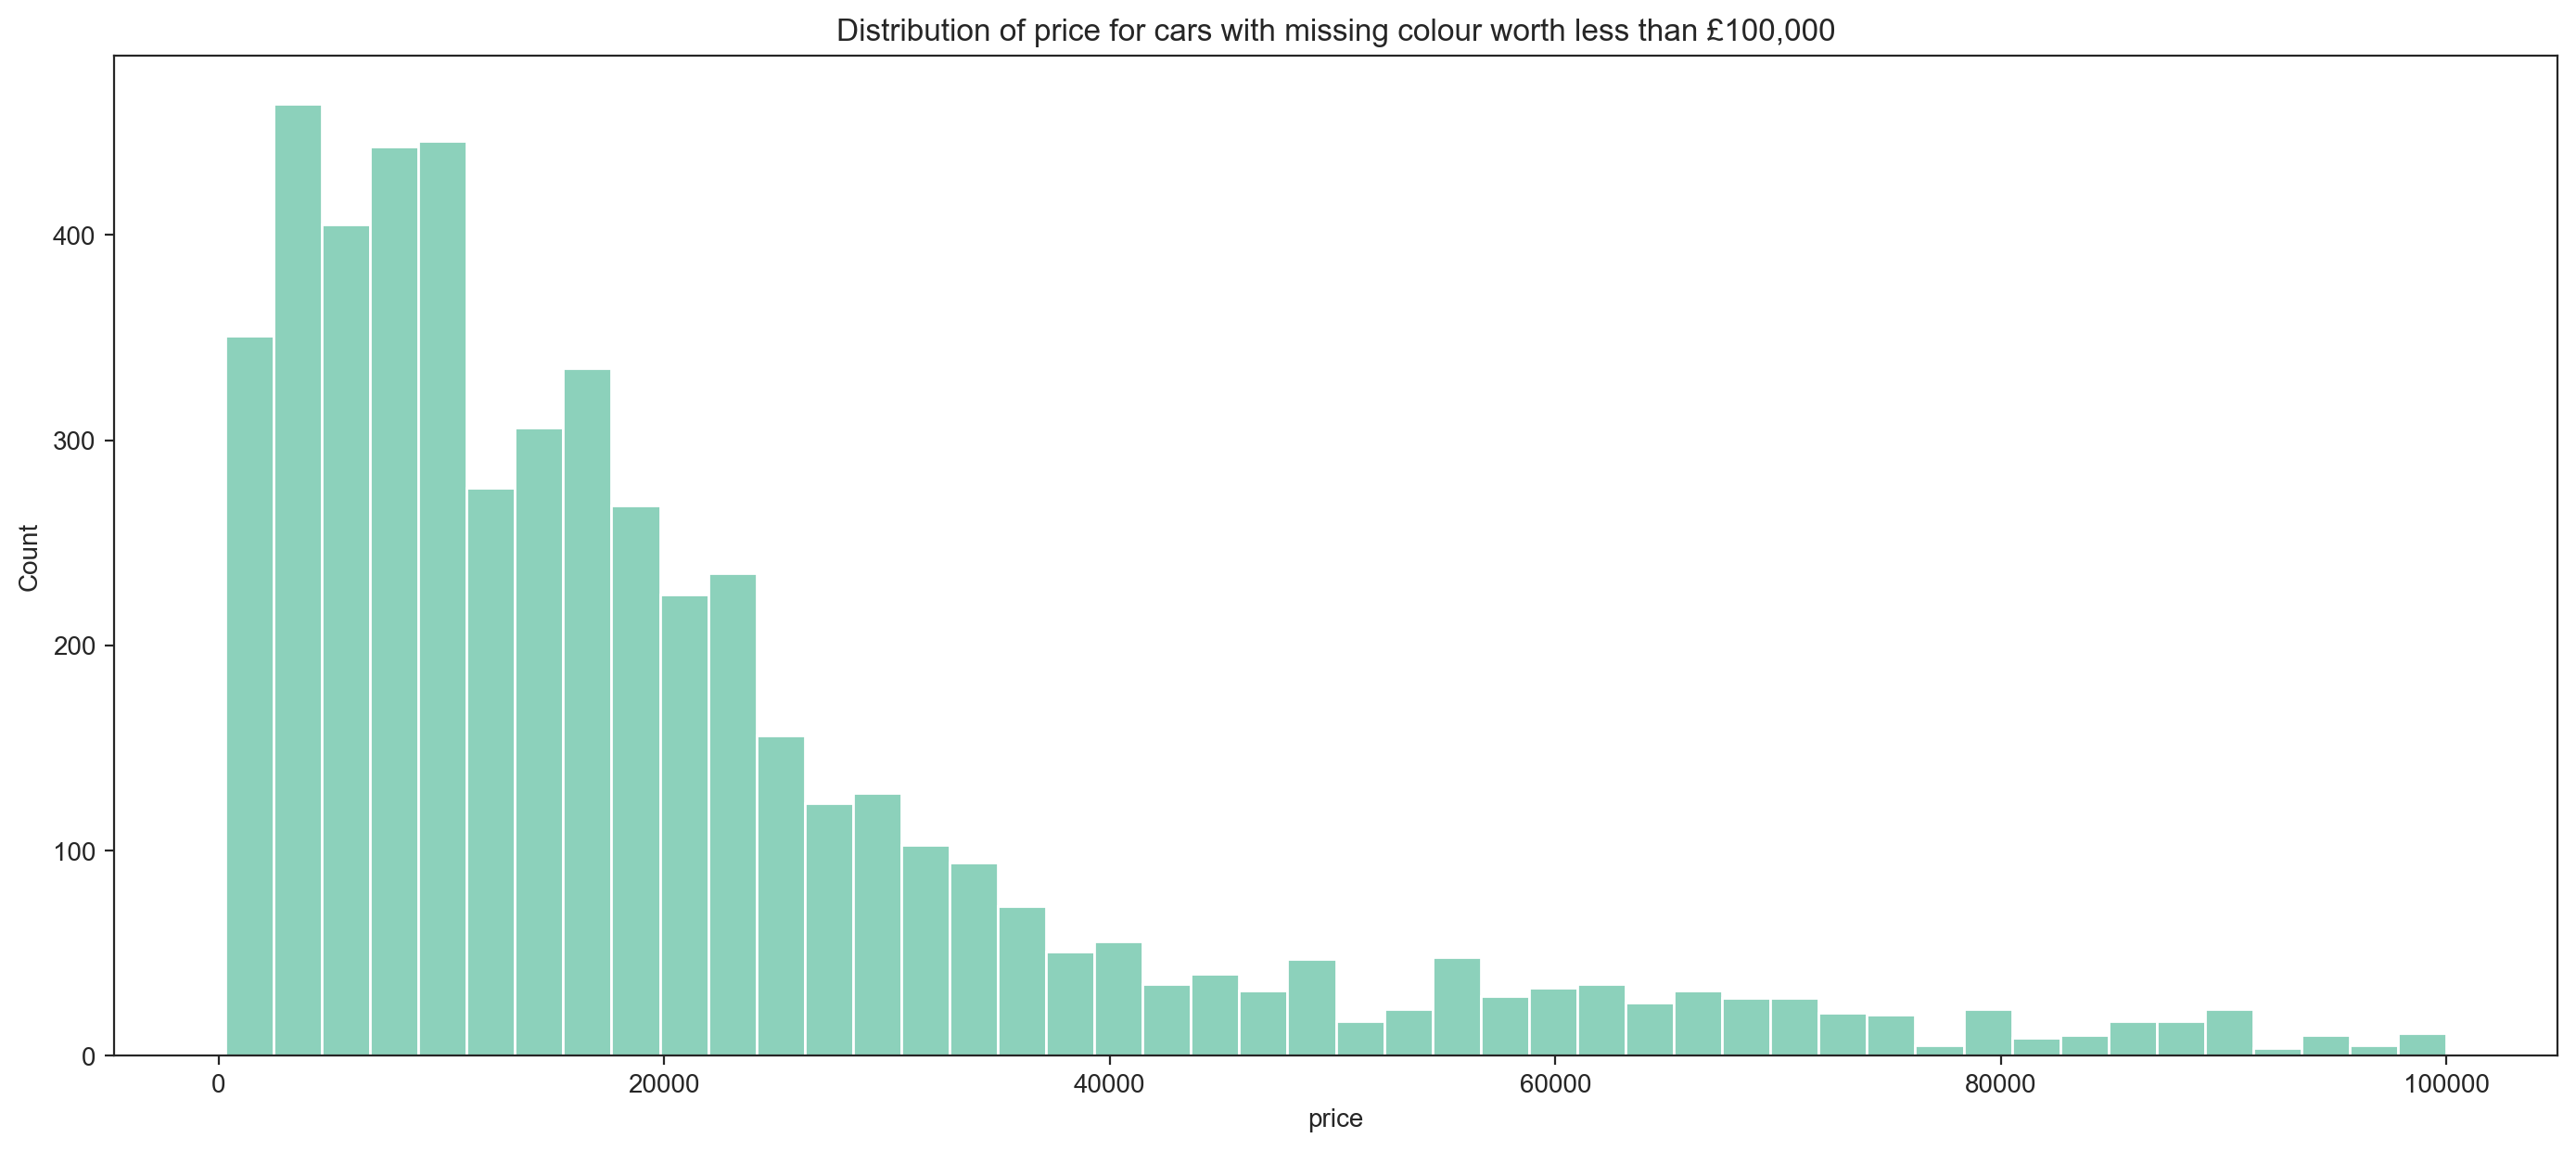

In [51]:
sns.histplot(missing_colours.loc[missing_colours["price"] < 1e5], x="price");
plt.title("Distribution of price for cars with missing colour worth less than £100,000");

## Colour Summary

All colours are reasonable however, some seem superfluous. For example, the 7 navy cars can be added to blue, burgundy and maroon are basically the same colour, bronze is just shiny brown so they can probably be combined, the 15 magenta ones can be added to pink and the one indigo can be added to purple.

The 5378 null colours need to be imputed.

---
&nbsp;

&nbsp;

# ==== Make and Model ====

In [43]:
len(auto['standard_model'].unique())

1168

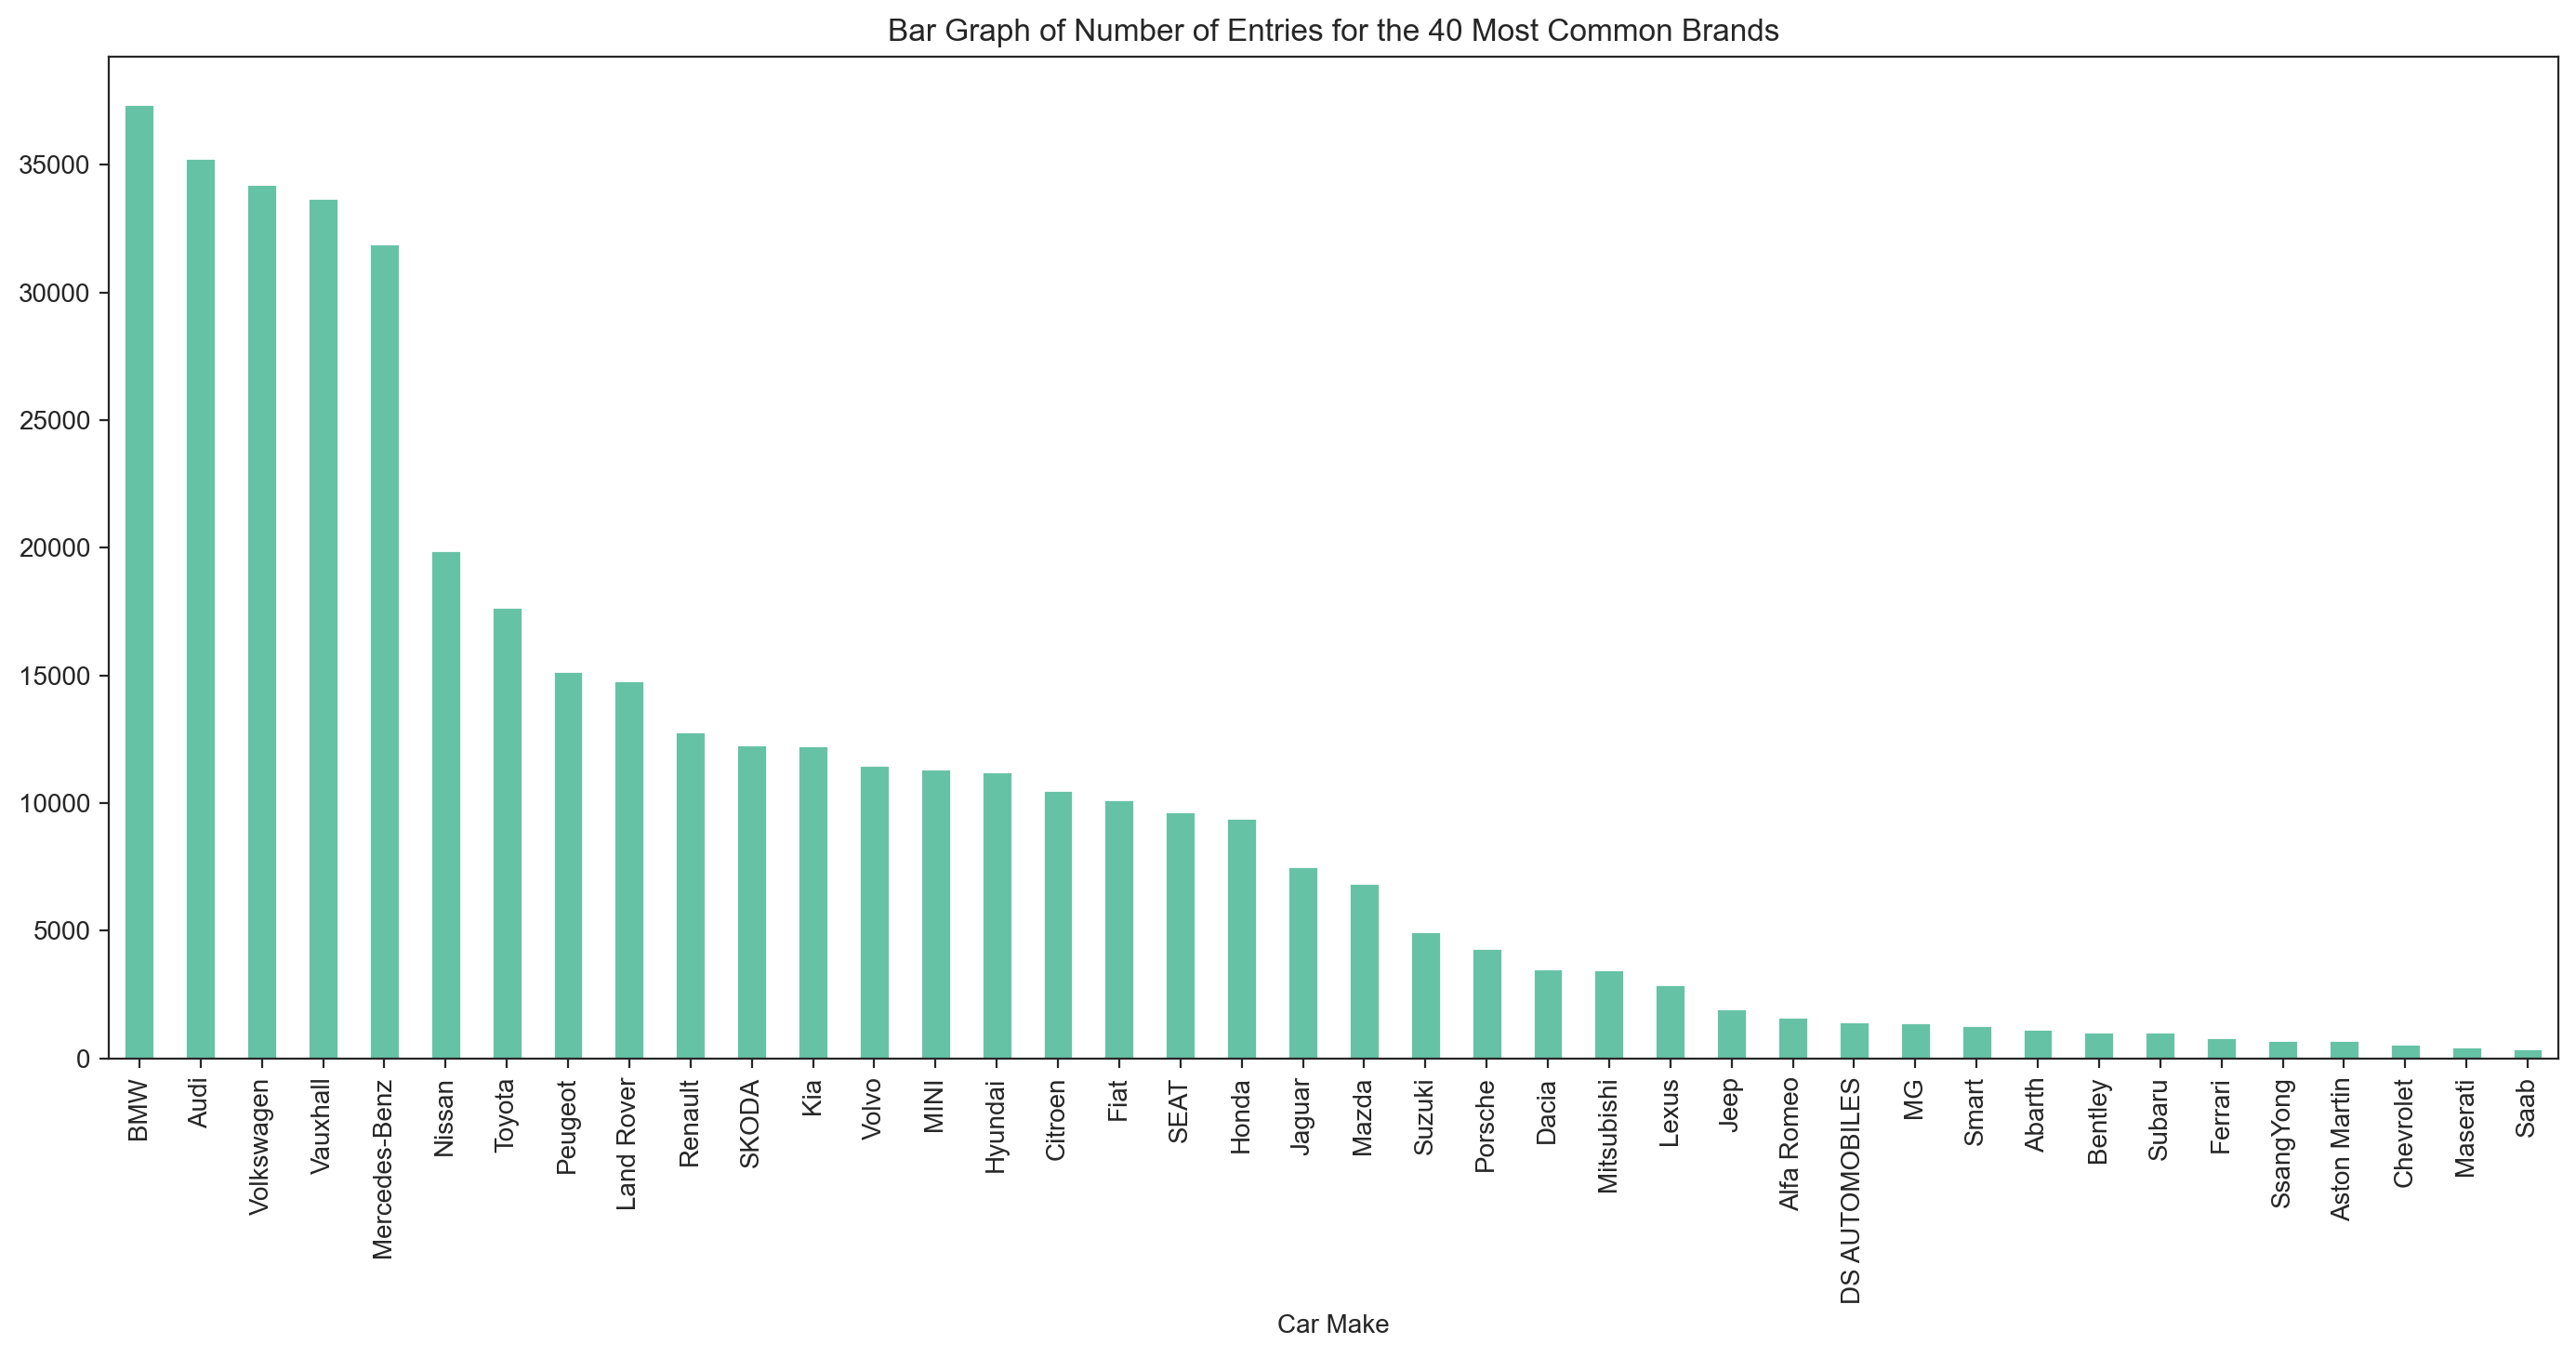

In [52]:
axes = auto['standard_make'].value_counts(sort=True)[:40].plot.bar()
axes.set_title("Bar Graph of Number of Entries for the 40 Most Common Brands");
axes.set_xlabel("Car Make");

In [16]:
# Check if any makes have the same model

# Group by 'standard_model' and count unique 'standard_make' values
model_make_counts = auto.groupby('standard_model')['standard_make'].nunique()

# Filter for models associated with more than one make
models_with_multiple_makes = model_make_counts[model_make_counts > 1].index
for model in models_with_multiple_makes:
    print(auto.loc[auto["standard_model"] == model, "standard_make"].unique(), model)


['Rover' 'Audi'] 100
['Land Rover' 'Rover'] 110
['Abarth' 'Fiat'] 124 Spider
['Mercedes-Benz' 'Volvo'] 240
['Mercedes-Benz' 'Ferrari'] 250
['Mercedes-Benz' 'Nissan'] 300
['Ferrari' 'Peugeot'] 308
['Fiat' 'Abarth' 'Mercedes-Benz'] 500
['Fiat' 'Abarth'] 500C
['Rover' 'Mercedes-Benz' 'Fiat'] 600
['Vauxhall' 'Opel'] Astra
['SEAT' 'CUPRA'] Ateca
['Citroen' 'Corvette'] C5
['Ferrari' 'Volkswagen'] California
['Replica' 'AC' 'AK'] Cobra
['Vauxhall' 'Opel'] Corsa
['Hyundai' 'MINI' 'Fiat' 'Audi' 'Maserati' 'Rover'] Coupe
['Chrysler' 'Lancia'] Delta
['Alfa Romeo' 'McLaren'] GT
['Fiat' 'Abarth'] Grande Punto
['Chevrolet' 'Daewoo'] Kalos
['Chevrolet' 'Daewoo'] Lacetti
['Chevrolet' 'Daewoo'] Matiz
['MG' 'Rover' 'Austin'] Metro
['Rover' 'Austin' 'Leyland' 'Morris'] Mini
['Fiat' 'Abarth'] Punto Evo
['MINI' 'Morgan' 'Smart' 'Westfield' 'Tesla'] Roadster
['Jaguar' 'Holden'] SS
['Land Rover' 'Bentley'] Series II
['Austin' 'Caterham'] Seven
['Alfa Romeo' 'Fiat'] Spider
['MG' 'Isuzu' 'Gentry'] TF
['Chevrol

In [18]:
# Combine make and model into one column
auto['make_model'] = auto['standard_make'] + ' ' + auto['standard_model']
auto.drop(columns=["standard_make", "standard_model"], inplace=True)

In [47]:
counts_df = pd.DataFrame(auto["make_model"].value_counts())
counts_df.loc[counts_df["count"]==1]

count
make_model               
Sebring MXR             1
Fiat 127                1
Porsche 917             1
Daewoo Tacuma           1
Alfa Romeo 146          1
...                   ...
Aixam Crossline         1
Daimler SP              1
Lotus 340R              1
Mitsubishi Airtrek      1
Volvo 480               1

[217 rows x 1 columns]

# Fuel Type

In [61]:
auto.loc[(auto["fuel_type"]=="Electric") & (auto["crossover_car_and_van"]==1)]

public_reference  mileage reg_code standard_colour standard_make  \
15393    201910163376428     12.0      NaN           Black        Nissan   
37100    202010064647201  39500.0       18           Black          LEVC   
44587    201909262647527     12.0      NaN           White        Nissan   
55410    202007030828603    750.0       15           Black       Renault   
62085    202009153766168  14800.0       15           White       Renault   
89871    202008262948789     50.0      NaN             Red        Nissan   
103757   202001306771208     10.0      NaN           White        Nissan   
106497   202002207529293     28.0       69           White          LEVC   
146476   202007111113481   3026.0       20           Black        Nissan   
159330   202001306771219     10.0      NaN           White        Nissan   
165440   201909262647526     12.0      NaN           White        Nissan   
192791   202009203974809   2700.0       14           White       Renault   
201212   202009224057491  28500.0       68           Black          LEVC   
237704   202002147316082     25.0      NaN           White        Nissan   
281591   202009033262030  25000.0       68           Black          LEVC   
286293   201909262647524     12.0      NaN           White        Nissan   
309772   202010165063555  90000.0       66           White        Nissan   
320747   202008172594079   3675.0       69             NaN          LEVC   

       standard_model vehicle_condition  year_of_registration    price  \
15393         e-NV200               NEW                   NaN  32990.0   
37100              TX              USED                2018.0  38000.0   
44587         e-NV200               NEW                   NaN  31490.0   
55410           Twizy              USED                2015.0   8911.0   
62085           Twizy              USED                2015.0   5994.0   
89871         e-NV200               NEW                   NaN  24499.0   
103757  eNV200 Evalia               NEW                   NaN  32599.0   
106497             TX              USED                2019.0  45000.0   
146476  eNV200 Evalia              USED                2020.0  30995.0   
159330        e-NV200               NEW                   NaN  30899.0   
165440        e-NV200               NEW                   NaN  30990.0   
192791          Twizy              USED                2014.0   8911.0   
201212             TX              USED                2018.0  40500.0   
237704  eNV200 Evalia               NEW                   NaN  32475.0   
281591             TX              USED                2018.0  42500.0   
286293        e-NV200               NEW                   NaN  29995.0   
309772        e-NV200              USED                2016.0  13440.0   
320747             TX              USED                2019.0  46995.0   

        body_type  crossover_car_and_van fuel_type  
15393   Combi Van                   True  Electric  
37100         MPV                   True  Electric  
44587   Combi Van                   True  Electric  
55410       Coupe                   True  Electric  
62085       Coupe                   True  Electric  
89871   Combi Van                   True  Electric  
103757        MPV                   True  Electric  
106497        MPV                   True  Electric  
146476        MPV                   True  Electric  
159330  Combi Van                   True  Electric  
165440  Combi Van                   True  Electric  
192791      Coupe                   True  Electric  
201212        MPV                   True  Electric  
237704        MPV                   True  Electric  
281591        MPV                   True  Electric  
286293  Combi Van                   True  Electric  
309772  Combi Van                   True  Electric  
320747        MPV                   True  Electric

<Axes: xlabel='fuel_type', ylabel='count'>

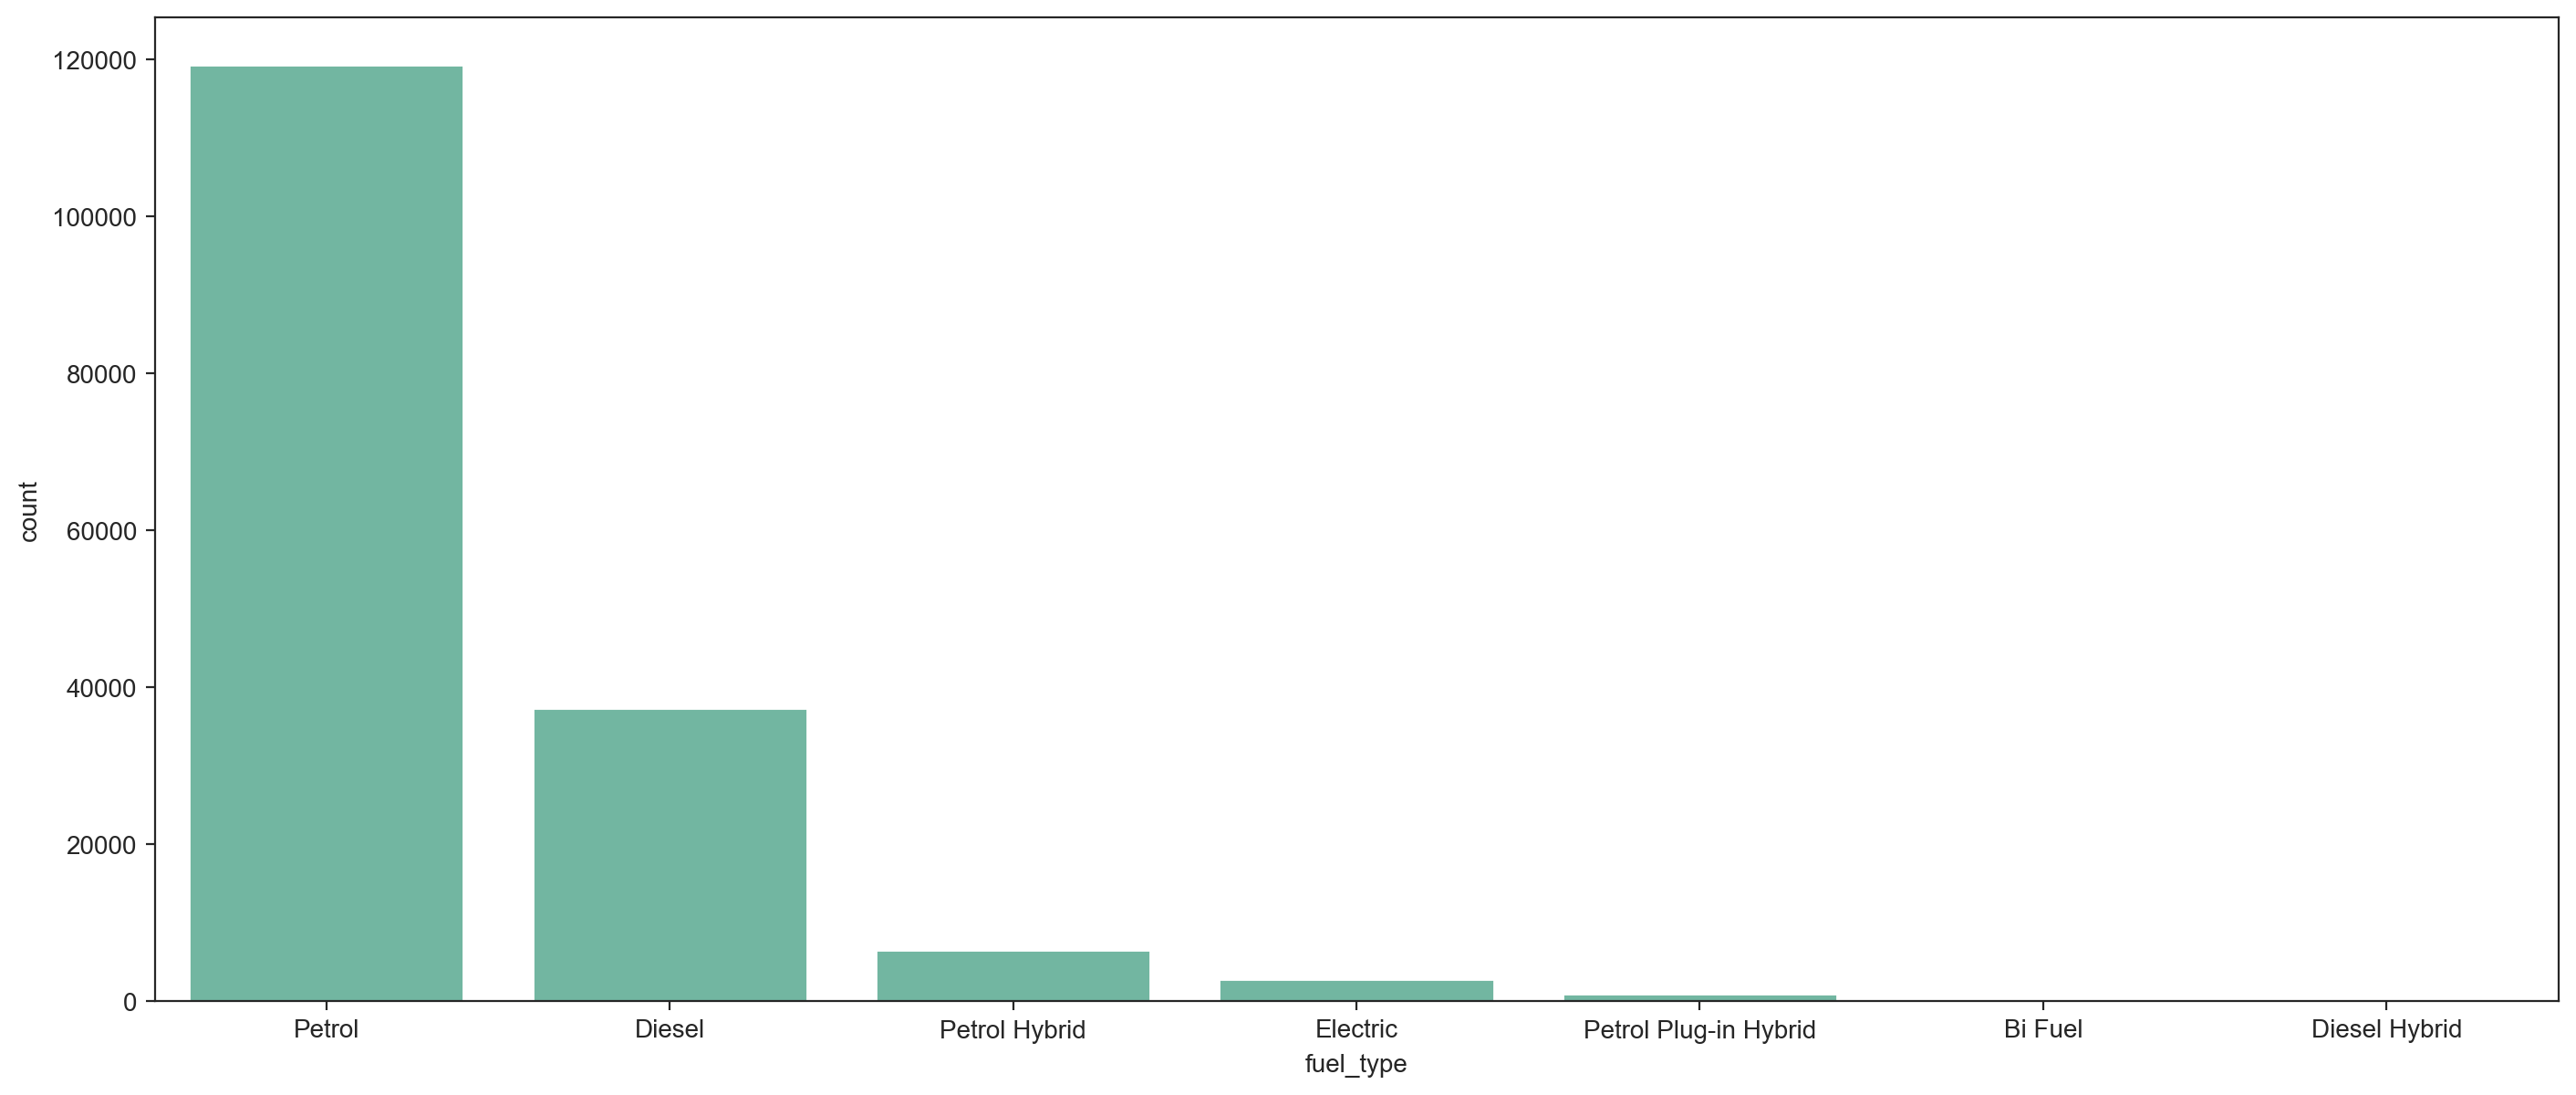

In [56]:
sns.barplot(auto.loc[auto["body_type"]=="Hatchback","fuel_type"].value_counts())

In [63]:
auto["fuel_type"].unique()

array(['Petrol Plug-in Hybrid', 'Diesel', 'Petrol', 'Diesel Hybrid',
       'Petrol Hybrid', 'Electric', 'Diesel Plug-in Hybrid', nan,
       'Bi Fuel', 'Natural Gas'], dtype=object)